# Import Libraries

In [ ]:
#!pip install --upgrade pandas
#!pip install --upgrade pandas-datareader
!pip install yfinance
!pip install PyPortfolioOpt
!poetry add PyPortfolioOpt
!apt-get install python3.11

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 7.2 MB/s eta 0:00:00
/bin/bash: poetry: command not found
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libpython3.11-minimal libpython3.11-stdlib python3.11-minimal
Suggested packages:
  python3.11-venv binfmt-support
The following NEW packages will be installed:
  libpython3.11-minimal libpython3.11-stdlib python3.11 python3.11-minimal
0 upgraded, 4 newly installed, 0 to remove and 34 not upgraded.
Need to get 5,553 kB of archives.
After this operation, 21.9 MB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal/main amd64 libpython3.11-minimal amd64 3.11.3-1+focal1 [849 kB]
Get:2 ht

In [ ]:
import yfinance as yf
from scipy.stats import *
import statsmodels.api as sm

# Importing numpy, pandas and Series + DataFrame:
import numpy as np
import numpy.linalg
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Imports for plotly:
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# To keep graph within the nobebook:
%matplotlib inline

# To hide warnings
import warnings
warnings.filterwarnings('ignore')

# Import for datareading:
import pandas_datareader as web
from pandas_datareader import data, wb
import requests
import datetime as dt
import dateutil.relativedelta

# Efficient frontier
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting
from pypfopt import EfficientFrontier, objective_functions

# LSTM
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

# Structured Warrant Portfolio

## Warrant Price Array

In [ ]:
# Creating array for warrant's price
ANTM_Call_Warrant = [0 for i in range (7)]
BBCA_Call_Warrant = [0 for i in range (7)]
BMRI_Call_Warrant = [0 for i in range (7)]
MDKA_Call_Warrant = [0 for i in range (7)]
PGAS_Call_Warrant = [0 for i in range (7)]

ANTM_Put_Warrant = [0 for i in range (7)]
BBCA_Put_Warrant = [0 for i in range (7)]
BMRI_Put_Warrant = [0 for i in range (7)]
MDKA_Put_Warrant = [0 for i in range (7)]
PGAS_Put_Warrant = [0 for i in range (7)]

In [ ]:
# Initial call warrant prices
ANTMW_initial = 196
BBCAW_initial = 550
BMRIW_initial = 645
MDKAW_initial = 300
PGASW_initial = 116
call_initial = [ANTMW_initial, BBCAW_initial, BMRIW_initial, MDKAW_initial, PGASW_initial]

In [ ]:
df_fair_call = pd.DataFrame(np.array(ANTM_Call_Warrant).astype('f'))
df_fair_call = df_fair_call.rename(columns={0:'ANTMDRCK3A'})
df_fair_call.insert(1,"BBCADRCK3A", np.array(BBCA_Call_Warrant).astype('f'))
df_fair_call.insert(2,"BMRIDRCK3A", np.array(BMRI_Call_Warrant).astype('f'))
df_fair_call.insert(3,"MDKADRCK3A", np.array(MDKA_Call_Warrant).astype('f'))
df_fair_call.insert(4,"PGASDRCK3A", np.array(PGAS_Call_Warrant).astype('f'))
df_fair_call.T

0    1    2    3    4    5    6
ANTMDRCK3A  0.0  0.0  0.0  0.0  0.0  0.0  0.0
BBCADRCK3A  0.0  0.0  0.0  0.0  0.0  0.0  0.0
BMRIDRCK3A  0.0  0.0  0.0  0.0  0.0  0.0  0.0
MDKADRCK3A  0.0  0.0  0.0  0.0  0.0  0.0  0.0
PGASDRCK3A  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [ ]:
df_fair_put = pd.DataFrame(np.array(ANTM_Put_Warrant).astype('f'))
df_fair_put = df_fair_put.rename(columns={0:'ANTMDRPK3A'})
df_fair_put.insert(1,"BBCADRPK3A", np.array(BBCA_Put_Warrant).astype('f'))
df_fair_put.insert(2,"BMRIDRPK3A", np.array(BMRI_Put_Warrant).astype('f'))
df_fair_put.insert(3,"MDKADRPK3A", np.array(MDKA_Put_Warrant).astype('f'))
df_fair_put.insert(4,"PGASDRPK3A", np.array(PGAS_Put_Warrant).astype('f'))
df_fair_put.T

0    1    2    3    4    5    6
ANTMDRPK3A  0.0  0.0  0.0  0.0  0.0  0.0  0.0
BBCADRPK3A  0.0  0.0  0.0  0.0  0.0  0.0  0.0
BMRIDRPK3A  0.0  0.0  0.0  0.0  0.0  0.0  0.0
MDKADRPK3A  0.0  0.0  0.0  0.0  0.0  0.0  0.0
PGASDRPK3A  0.0  0.0  0.0  0.0  0.0  0.0  0.0

## Comparison

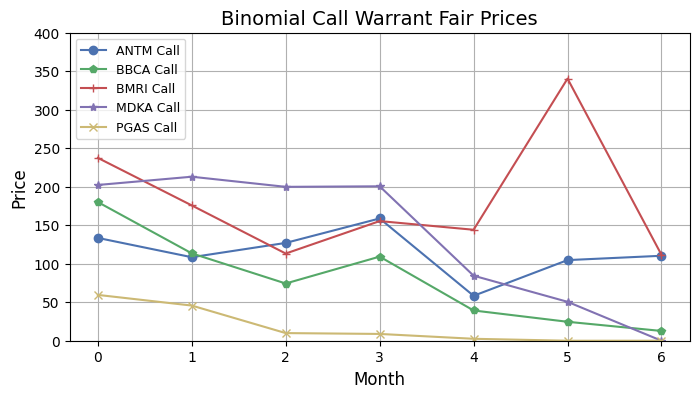

In [ ]:
# Binomial Method
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)
plt.plot(ANTM_Call_Warrant, '-o', label="ANTM Call")
plt.plot(BBCA_Call_Warrant, '-p', label="BBCA Call")
plt.plot(BMRI_Call_Warrant, '-+', label="BMRI Call")
plt.plot(MDKA_Call_Warrant, '-*', label="MDKA Call")
plt.plot(PGAS_Call_Warrant, '-x', label="PGAS Call")
plt.title('Binomial Call Warrant Fair Prices', size=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.ylim([0, 400])
plt.legend(loc='upper left', fontsize=9)
plt.grid()
plt.show()

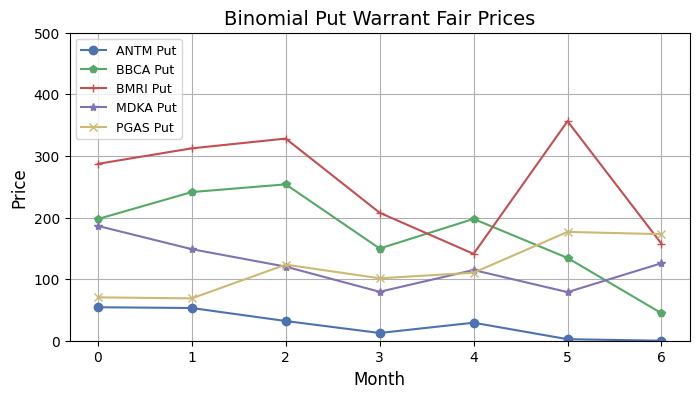

In [ ]:
# Binomial Method
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(4)
plt.plot(ANTM_Put_Warrant, '-o', label="ANTM Put")
plt.plot(BBCA_Put_Warrant, '-p', label="BBCA Put")
plt.plot(BMRI_Put_Warrant, '-+', label="BMRI Put")
plt.plot(MDKA_Put_Warrant, '-*', label="MDKA Put")
plt.plot(PGAS_Put_Warrant, '-x', label="PGAS Put")
plt.title('Binomial Put Warrant Fair Prices', size=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.ylim([0, 500])
plt.legend(loc='upper left', fontsize=9)
plt.grid()
plt.show()

## Warrant Period 0
1st of January 2018 - 9th of November 2022

### Parameters

In [ ]:
# Exercise and Ratio
Exercise_ANTM = 1800
Ratio_ANTM = 3
Exercise_BBCA = 9100
Ratio_BBCA = 3
Exercise_BMRI = 5250
Ratio_BMRI = 1.5
Exercise_MDKA = 4260
Ratio_MDKA = 3
Exercise_PGAS = 1900
Ratio_PGAS = 3

part = 1
days = 120
# Risk Free Rate
rf = 0.04/(252*part)
v = np.exp(-rf)

### Download Data

In [ ]:
stock_list = ['ANTM.JK', 'BBCA.JK', 'BMRI.JK', 'MDKA.JK', 'PGAS.JK']
data_stock = yf.download(stock_list, start="2022-01-01", end="2022-11-10")

[*********************100%***********************]  5 of 5 completed


In [ ]:
data_stock.index = pd.to_datetime(data_stock.index).date
data_stock = pd.concat([data_stock],axis=1,sort=False).reset_index()
data_stock.rename(columns={'index':'Date'}, inplace=True)
data_stock.index = data_stock['Date']
data_stock = data_stock.drop(['Date'],axis=1, inplace=False)
data_stock = data_stock.dropna()

# ANTM
ANTM = pd.DataFrame(data_stock['Open']['ANTM.JK'])
ANTM = ANTM.rename(columns={'ANTM.JK':'Open'})
ANTM.insert(1,"High",data_stock['High']['ANTM.JK'])
ANTM.insert(2,"Low",data_stock['Low']['ANTM.JK'])
ANTM.insert(3,"Close",data_stock['Close']['ANTM.JK'])
ANTM.insert(4,"Return",ANTM['Close'].pct_change())
ANTM.fillna(0, inplace=True)

# BBCA
BBCA = pd.DataFrame(data_stock['Open']['BBCA.JK'])
BBCA = BBCA.rename(columns={'BBCA.JK':'Open'})
BBCA.insert(1,"High",data_stock['High']['BBCA.JK'])
BBCA.insert(2,"Low",data_stock['Low']['BBCA.JK'])
BBCA.insert(3,"Close",data_stock['Close']['BBCA.JK'])
BBCA.insert(4,"Return",BBCA['Close'].pct_change())
BBCA.fillna(0, inplace=True)

# BMRI
BMRI = pd.DataFrame(data_stock['Open']['BMRI.JK'])
BMRI = BMRI.rename(columns={'BMRI.JK':'Open'})
BMRI.insert(1,"High",data_stock['High']['BMRI.JK'])
BMRI.insert(2,"Low",data_stock['Low']['BMRI.JK'])
BMRI.insert(3,"Close",data_stock['Close']['BMRI.JK'])
BMRI.insert(4,"Return",BMRI['Close'].pct_change())
BMRI.fillna(0, inplace=True)

# MDKA
MDKA = pd.DataFrame(data_stock['Open']['MDKA.JK'])
MDKA = MDKA.rename(columns={'MDKA.JK':'Open'})
MDKA.insert(1,"High",data_stock['High']['MDKA.JK'])
MDKA.insert(2,"Low",data_stock['Low']['MDKA.JK'])
MDKA.insert(3,"Close",data_stock['Close']['MDKA.JK'])
MDKA.insert(4,"Return",MDKA['Close'].pct_change())
MDKA.fillna(0, inplace=True)

# PGAS
PGAS = pd.DataFrame(data_stock['Open']['PGAS.JK'])
PGAS = PGAS.rename(columns={'PGAS.JK':'Open'})
PGAS.insert(1,"High",data_stock['High']['PGAS.JK'])
PGAS.insert(2,"Low",data_stock['Low']['PGAS.JK'])
PGAS.insert(3,"Close",data_stock['Close']['PGAS.JK'])
PGAS.insert(4,"Return",PGAS['Close'].pct_change())
PGAS.fillna(0, inplace=True)

In [ ]:
# Mean and Standard Deviation of Return
mean_return_ANTM = np.mean(ANTM['Return']) / part
mean_return_BBCA = np.mean(BBCA['Return']) / part
mean_return_BMRI = np.mean(BMRI['Return']) / part
mean_return_MDKA = np.mean(MDKA['Return']) / part
mean_return_PGAS = np.mean(PGAS['Return']) / part
std_return_ANTM = np.std(ANTM['Return']) / part**0.5
std_return_BBCA = np.std(BBCA['Return']) / part**0.5
std_return_BMRI = np.std(BMRI['Return']) / part**0.5
std_return_MDKA = np.std(MDKA['Return']) / part**0.5
std_return_PGAS = np.std(PGAS['Return']) / part**0.5

# Cox-Ross-Rubenstein
u_ANTM = np.exp(std_return_ANTM)
u_BBCA = np.exp(std_return_BBCA)
u_BMRI = np.exp(std_return_BMRI)
u_MDKA = np.exp(std_return_MDKA)
u_PGAS = np.exp(std_return_PGAS)
d_ANTM = 1/u_ANTM
d_BBCA = 1/u_BBCA
d_BMRI = 1/u_BMRI
d_MDKA = 1/u_MDKA
d_PGAS = 1/u_PGAS

# Probability prices will increase
p_ANTM = (np.exp(rf)-d_ANTM)/(u_ANTM-d_ANTM)
p_BBCA = (np.exp(rf)-d_BBCA)/(u_BBCA-d_BBCA)
p_BMRI = (np.exp(rf)-d_BMRI)/(u_BMRI-d_BMRI)
p_MDKA = (np.exp(rf)-d_MDKA)/(u_MDKA-d_MDKA)
p_PGAS = (np.exp(rf)-d_PGAS)/(u_PGAS-d_PGAS)

### Binomial

#### ANTM Warrant

In [ ]:
# ANTM
u         = u_ANTM
d         = d_ANTM
S0        = ANTM['Close'][len(ANTM)-1]
prob_up   = p_ANTM
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_ANTM = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_ANTM = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_ANTM[i][j] = S0 * u**j * d**(i-j)
    P_ANTM[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_ANTM[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# ANTM
Call_ANTM = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_ANTM = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_ANTM[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_ANTM)/Ratio_ANTM, 0)
            Warrant_put_price = max((Exercise_ANTM-Mean_price[k][l])/Ratio_ANTM, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_ANTM[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_ANTM[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_ANTM[i][j] = v * (prob_up*Call_ANTM[i+1][j+1]+prob_down*Call_ANTM[i+1][j])
      Put_ANTM[i][j] = v * (prob_up*Put_ANTM[i+1][j+1]+prob_down*Put_ANTM[i+1][j])

# Fair value of ANTM Call and Put Warrant
ANTM_Call_Warrant[0] = Call_ANTM[0][0]
ANTM_Put_Warrant[0] = Put_ANTM[0][0]

# Binomial Call Warrant Pricing ANTM
# pd.DataFrame(Call_ANTM)

In [ ]:
# Expected price for ANTM with binomial
ANTM_binom_price0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_ANTM[k][l]*P_ANTM[k][l]
        total_prob = total_prob + P_ANTM[k][l]
    ANTM_binom_price0[i][j] = total_price_prob/total_prob

# Return array for ANTM warrant
ANTMW_Call_binom_value0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Put_binom_value0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Call_binom_prev0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Put_binom_prev0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Call_binom_payoff0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Put_binom_payoff0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Call_binom_return0 = [0 for i in range ((days+1)*part)]
ANTMW_Put_binom_return0 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    ANTMW_Call_binom_value0[i][j] = max(ANTM_binom_price0[i][j]-Exercise_ANTM,0)/Ratio_ANTM
    ANTMW_Put_binom_value0[i][j] = max(Exercise_ANTM-ANTM_binom_price0[i][j],0)/Ratio_ANTM
    ANTMW_Call_binom_prev0[i][j] = (ANTMW_Call_binom_value0[max(i-1,0)][j] * P_ANTM[max(i-1,0)][j]
    + ANTMW_Call_binom_value0[max(i-1,0)][max(j-1,0)] * P_ANTM[max(i-1,0)][max(j-1,0)]) / (P_ANTM[max(i-1,0)][j]+P_ANTM[max(i-1,0)][max(j-1,0)])
    ANTMW_Put_binom_prev0[i][j] = (ANTMW_Put_binom_value0[max(i-1,0)][j] * P_ANTM[max(i-1,0)][j]
    + ANTMW_Put_binom_value0[max(i-1,0)][max(j-1,0)] * P_ANTM[max(i-1,0)][max(j-1,0)]) / (P_ANTM[max(i-1,0)][j]+P_ANTM[max(i-1,0)][max(j-1,0)])
    if i == 0:
      ANTMW_Call_binom_payoff0[i][j] = ANTMW_Call_binom_value0[i][j] - ANTM_Call_Warrant[0]
      ANTMW_Put_binom_payoff0[i][j] = ANTMW_Put_binom_value0[i][j] - ANTM_Put_Warrant[0]
    else:
      ANTMW_Call_binom_payoff0[i][j] = ANTMW_Call_binom_value0[i][j] - ANTMW_Call_binom_prev0[i][j]
      ANTMW_Put_binom_payoff0[i][j] = ANTMW_Put_binom_value0[i][j] - ANTMW_Put_binom_prev0[i][j]
  if i == 0:
    ANTMW_Call_binom_return0[i] = np.dot(ANTMW_Call_binom_payoff0[i][:], P_ANTM[i][:])/ANTM_Call_Warrant[0]
    ANTMW_Put_binom_return0[i] = np.dot(ANTMW_Put_binom_payoff0[i][:], P_ANTM[i][:])/ANTM_Put_Warrant[0]
  else:
    if np.mean(ANTMW_Call_binom_value0[i-1][:]) == 0:
      ANTMW_Call_binom_return0[i] = 0
    else:
      ANTMW_Call_binom_return0[i] = np.dot(ANTMW_Call_binom_payoff0[i][:], P_ANTM[i][:])/np.dot(ANTMW_Call_binom_value0[i-1][:], P_ANTM[i][:])
    if np.mean(ANTMW_Put_binom_value0[i-1][:]) == 0:
      ANTMW_Put_binom_return0[i] = 0
    else:
      ANTMW_Put_binom_return0[i] = np.dot(ANTMW_Put_binom_payoff0[i][:], P_ANTM[i][:])/np.dot(ANTMW_Put_binom_value0[i-1][:], P_ANTM[i][:])

#### BBCA Warrant

In [ ]:
# BBCA
u         = u_BBCA
d         = d_BBCA
S0        = BBCA['Close'][len(BBCA)-1]
prob_up   = p_BBCA
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_BBCA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_BBCA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_BBCA[i][j] = S0 * u**j * d**(i-j)
    P_BBCA[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_BBCA[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# BBCA
Call_BBCA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_BBCA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_BBCA[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_BBCA)/Ratio_BBCA, 0)
            Warrant_put_price = max((Exercise_BBCA-Mean_price[k][l])/Ratio_BBCA, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_BBCA[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_BBCA[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_BBCA[i][j] = v * (prob_up*Call_BBCA[i+1][j+1]+prob_down*Call_BBCA[i+1][j])
      Put_BBCA[i][j] = v * (prob_up*Put_BBCA[i+1][j+1]+prob_down*Put_BBCA[i+1][j])

# Fair value of BBCA Call and Put Warrant
BBCA_Call_Warrant[0] = Call_BBCA[0][0]
BBCA_Put_Warrant[0] = Put_BBCA[0][0]

# Binomial Call Warrant Pricing BBCA
# pd.DataFrame(Call_BBCA)

In [ ]:
# Expected price for BBCA with binomial
BBCA_binom_price0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_BBCA[k][l]*P_BBCA[k][l]
        total_prob = total_prob + P_BBCA[k][l]
    BBCA_binom_price0[i][j] = total_price_prob/total_prob

# Return array for BBCA warrant
BBCAW_Call_binom_value0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Put_binom_value0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Call_binom_prev0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Put_binom_prev0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Call_binom_payoff0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Put_binom_payoff0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Call_binom_return0 = [0 for i in range ((days+1)*part)]
BBCAW_Put_binom_return0 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    BBCAW_Call_binom_value0[i][j] = max(BBCA_binom_price0[i][j]-Exercise_BBCA,0)/Ratio_BBCA
    BBCAW_Put_binom_value0[i][j] = max(Exercise_BBCA-BBCA_binom_price0[i][j],0)/Ratio_BBCA
    BBCAW_Call_binom_prev0[i][j] = (BBCAW_Call_binom_value0[max(i-1,0)][j] * P_BBCA[max(i-1,0)][j]
    + BBCAW_Call_binom_value0[max(i-1,0)][max(j-1,0)] * P_BBCA[max(i-1,0)][max(j-1,0)]) / (P_BBCA[max(i-1,0)][j]+P_BBCA[max(i-1,0)][max(j-1,0)])
    BBCAW_Put_binom_prev0[i][j] = (BBCAW_Put_binom_value0[max(i-1,0)][j] * P_BBCA[max(i-1,0)][j]
    + BBCAW_Put_binom_value0[max(i-1,0)][max(j-1,0)] * P_BBCA[max(i-1,0)][max(j-1,0)]) / (P_BBCA[max(i-1,0)][j]+P_BBCA[max(i-1,0)][max(j-1,0)])
    if i == 0:
      BBCAW_Call_binom_payoff0[i][j] = BBCAW_Call_binom_value0[i][j] - BBCA_Call_Warrant[0]
      BBCAW_Put_binom_payoff0[i][j] = BBCAW_Put_binom_value0[i][j] - BBCA_Put_Warrant[0]
    else:
      BBCAW_Call_binom_payoff0[i][j] = BBCAW_Call_binom_value0[i][j] - BBCAW_Call_binom_prev0[i][j]
      BBCAW_Put_binom_payoff0[i][j] = BBCAW_Put_binom_value0[i][j] - BBCAW_Put_binom_prev0[i][j]
  if i == 0:
    BBCAW_Call_binom_return0[i] = np.dot(BBCAW_Call_binom_payoff0[i][:], P_BBCA[i][:])/BBCA_Call_Warrant[0]
    BBCAW_Put_binom_return0[i] = np.dot(BBCAW_Put_binom_payoff0[i][:], P_BBCA[i][:])/BBCA_Put_Warrant[0]
  else:
    if np.mean(BBCAW_Call_binom_value0[i-1][:]) == 0:
      BBCAW_Call_binom_return0[i] = 0
    else:
      BBCAW_Call_binom_return0[i] = np.dot(BBCAW_Call_binom_payoff0[i][:], P_BBCA[i][:])/np.dot(BBCAW_Call_binom_value0[i-1][:], P_BBCA[i][:])
    if np.mean(BBCAW_Put_binom_value0[i-1][:]) == 0:
      BBCAW_Put_binom_return0[i] = 0
    else:
      BBCAW_Put_binom_return0[i] = np.dot(BBCAW_Put_binom_payoff0[i][:], P_BBCA[i][:])/np.dot(BBCAW_Put_binom_value0[i-1][:], P_BBCA[i][:])

#### BMRI Warrant

In [ ]:
# BMRI
u         = u_BMRI
d         = d_BMRI
S0        = BMRI['Close'][len(BMRI)-1]
prob_up   = p_BMRI
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_BMRI = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_BMRI = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_BMRI[i][j] = S0 * u**j * d**(i-j)
    P_BMRI[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_BMRI[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# BMRI
Call_BMRI = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_BMRI = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_BMRI[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_BMRI)/Ratio_BMRI, 0)
            Warrant_put_price = max((Exercise_BMRI-Mean_price[k][l])/Ratio_BMRI, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_BMRI[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_BMRI[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_BMRI[i][j] = v * (prob_up*Call_BMRI[i+1][j+1]+prob_down*Call_BMRI[i+1][j])
      Put_BMRI[i][j] = v * (prob_up*Put_BMRI[i+1][j+1]+prob_down*Put_BMRI[i+1][j])

# Fair value of BMRI Call and Put Warrant
BMRI_Call_Warrant[0] = Call_BMRI[0][0]
BMRI_Put_Warrant[0] = Put_BMRI[0][0]

# Binomial Call Warrant Pricing BMRI
# pd.DataFrame(Call_BMRI)

In [ ]:
# Expected price for BMRI with binomial
BMRI_binom_price0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_BMRI[k][l]*P_BMRI[k][l]
        total_prob = total_prob + P_BMRI[k][l]
    BMRI_binom_price0[i][j] = total_price_prob/total_prob

# Return array for BMRI warrant
BMRIW_Call_binom_value0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Put_binom_value0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Call_binom_prev0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Put_binom_prev0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Call_binom_payoff0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Put_binom_payoff0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Call_binom_return0 = [0 for i in range ((days+1)*part)]
BMRIW_Put_binom_return0 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    BMRIW_Call_binom_value0[i][j] = max(BMRI_binom_price0[i][j]-Exercise_BMRI,0)/Ratio_BMRI
    BMRIW_Put_binom_value0[i][j] = max(Exercise_BMRI-BMRI_binom_price0[i][j],0)/Ratio_BMRI
    BMRIW_Call_binom_prev0[i][j] = (BMRIW_Call_binom_value0[max(i-1,0)][j] * P_BMRI[max(i-1,0)][j]
    + BMRIW_Call_binom_value0[max(i-1,0)][max(j-1,0)] * P_BMRI[max(i-1,0)][max(j-1,0)]) / (P_BMRI[max(i-1,0)][j]+P_BMRI[max(i-1,0)][max(j-1,0)])
    BMRIW_Put_binom_prev0[i][j] = (BMRIW_Put_binom_value0[max(i-1,0)][j] * P_BMRI[max(i-1,0)][j]
    + BMRIW_Put_binom_value0[max(i-1,0)][max(j-1,0)] * P_BMRI[max(i-1,0)][max(j-1,0)]) / (P_BMRI[max(i-1,0)][j]+P_BMRI[max(i-1,0)][max(j-1,0)])
    if i == 0:
      BMRIW_Call_binom_payoff0[i][j] = BMRIW_Call_binom_value0[i][j] - BMRI_Call_Warrant[0]
      BMRIW_Put_binom_payoff0[i][j] = BMRIW_Put_binom_value0[i][j] - BMRI_Put_Warrant[0]
    else:
      BMRIW_Call_binom_payoff0[i][j] = BMRIW_Call_binom_value0[i][j] - BMRIW_Call_binom_prev0[i][j]
      BMRIW_Put_binom_payoff0[i][j] = BMRIW_Put_binom_value0[i][j] - BMRIW_Put_binom_prev0[i][j]
  if i == 0:
    BMRIW_Call_binom_return0[i] = np.dot(BMRIW_Call_binom_payoff0[i][:], P_BMRI[i][:])/BMRI_Call_Warrant[0]
    BMRIW_Put_binom_return0[i] = np.dot(BMRIW_Put_binom_payoff0[i][:], P_BMRI[i][:])/BMRI_Put_Warrant[0]
  else:
    if np.mean(BMRIW_Call_binom_value0[i-1][:]) == 0:
      BMRIW_Call_binom_return0[i] = 0
    else:
      BMRIW_Call_binom_return0[i] = np.dot(BMRIW_Call_binom_payoff0[i][:], P_BMRI[i][:])/np.dot(BMRIW_Call_binom_value0[i-1][:], P_BMRI[i][:])
    if np.mean(BMRIW_Put_binom_value0[i-1][:]) == 0:
      BMRIW_Put_binom_return0[i] = 0
    else:
      BMRIW_Put_binom_return0[i] = np.dot(BMRIW_Put_binom_payoff0[i][:], P_BMRI[i][:])/np.dot(BMRIW_Put_binom_value0[i-1][:], P_BMRI[i][:])

#### MDKA Warrant

In [ ]:
# MDKA
u         = u_MDKA
d         = d_MDKA
S0        = MDKA['Close'][len(MDKA)-1]
prob_up   = p_MDKA
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_MDKA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_MDKA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_MDKA[i][j] = S0 * u**j * d**(i-j)
    P_MDKA[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_MDKA[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# MDKA
Call_MDKA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_MDKA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_MDKA[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_MDKA)/Ratio_MDKA, 0)
            Warrant_put_price = max((Exercise_MDKA-Mean_price[k][l])/Ratio_MDKA, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_MDKA[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_MDKA[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_MDKA[i][j] = v * (prob_up*Call_MDKA[i+1][j+1]+prob_down*Call_MDKA[i+1][j])
      Put_MDKA[i][j] = v * (prob_up*Put_MDKA[i+1][j+1]+prob_down*Put_MDKA[i+1][j])

# Fair value of MDKA Call and Put Warrant
MDKA_Call_Warrant[0] = Call_MDKA[0][0]
MDKA_Put_Warrant[0] = Put_MDKA[0][0]

# Binomial Call Warrant Pricing MDKA
# pd.DataFrame(Call_MDKA)

In [ ]:
# Expected price for MDKA with binomial
MDKA_binom_price0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_MDKA[k][l]*P_MDKA[k][l]
        total_prob = total_prob + P_MDKA[k][l]
    MDKA_binom_price0[i][j] = total_price_prob/total_prob

# Return array for MDKA warrant
MDKAW_Call_binom_value0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Put_binom_value0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Call_binom_prev0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Put_binom_prev0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Call_binom_payoff0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Put_binom_payoff0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Call_binom_return0 = [0 for i in range ((days+1)*part)]
MDKAW_Put_binom_return0 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    MDKAW_Call_binom_value0[i][j] = max(MDKA_binom_price0[i][j]-Exercise_MDKA,0)/Ratio_MDKA
    MDKAW_Put_binom_value0[i][j] = max(Exercise_MDKA-MDKA_binom_price0[i][j],0)/Ratio_MDKA
    MDKAW_Call_binom_prev0[i][j] = (MDKAW_Call_binom_value0[max(i-1,0)][j] * P_MDKA[max(i-1,0)][j]
    + MDKAW_Call_binom_value0[max(i-1,0)][max(j-1,0)] * P_MDKA[max(i-1,0)][max(j-1,0)]) / (P_MDKA[max(i-1,0)][j]+P_MDKA[max(i-1,0)][max(j-1,0)])
    MDKAW_Put_binom_prev0[i][j] = (MDKAW_Put_binom_value0[max(i-1,0)][j] * P_MDKA[max(i-1,0)][j]
    + MDKAW_Put_binom_value0[max(i-1,0)][max(j-1,0)] * P_MDKA[max(i-1,0)][max(j-1,0)]) / (P_MDKA[max(i-1,0)][j]+P_MDKA[max(i-1,0)][max(j-1,0)])
    if i == 0:
      MDKAW_Call_binom_payoff0[i][j] = MDKAW_Call_binom_value0[i][j] - MDKA_Call_Warrant[0]
      MDKAW_Put_binom_payoff0[i][j] = MDKAW_Put_binom_value0[i][j] - MDKA_Put_Warrant[0]
    else:
      MDKAW_Call_binom_payoff0[i][j] = MDKAW_Call_binom_value0[i][j] - MDKAW_Call_binom_prev0[i][j]
      MDKAW_Put_binom_payoff0[i][j] = MDKAW_Put_binom_value0[i][j] - MDKAW_Put_binom_prev0[i][j]
  if i == 0:
    MDKAW_Call_binom_return0[i] = np.dot(MDKAW_Call_binom_payoff0[i][:], P_MDKA[i][:])/MDKA_Call_Warrant[0]
    MDKAW_Put_binom_return0[i] = np.dot(MDKAW_Put_binom_payoff0[i][:], P_MDKA[i][:])/MDKA_Put_Warrant[0]
  else:
    if np.mean(MDKAW_Call_binom_value0[i-1][:]) == 0:
      MDKAW_Call_binom_return0[i] = 0
    else:
      MDKAW_Call_binom_return0[i] = np.dot(MDKAW_Call_binom_payoff0[i][:], P_MDKA[i][:])/np.dot(MDKAW_Call_binom_value0[i-1][:], P_MDKA[i][:])
    if np.mean(MDKAW_Put_binom_value0[i-1][:]) == 0:
      MDKAW_Put_binom_return0[i] = 0
    else:
      MDKAW_Put_binom_return0[i] = np.dot(MDKAW_Put_binom_payoff0[i][:], P_MDKA[i][:])/np.dot(MDKAW_Put_binom_value0[i-1][:], P_MDKA[i][:])

#### PGAS Warrant

In [ ]:
# PGAS
u         = u_PGAS
d         = d_PGAS
S0        = PGAS['Close'][len(PGAS)-1]
prob_up   = p_PGAS
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_PGAS = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_PGAS = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_PGAS[i][j] = S0 * u**j * d**(i-j)
    P_PGAS[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_PGAS[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# PGAS
Call_PGAS = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_PGAS = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_PGAS[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_PGAS)/Ratio_PGAS, 0)
            Warrant_put_price = max((Exercise_PGAS-Mean_price[k][l])/Ratio_PGAS, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_PGAS[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_PGAS[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_PGAS[i][j] = v * (prob_up*Call_PGAS[i+1][j+1]+prob_down*Call_PGAS[i+1][j])
      Put_PGAS[i][j] = v * (prob_up*Put_PGAS[i+1][j+1]+prob_down*Put_PGAS[i+1][j])

# Fair value of PGAS Call and Put Warrant
PGAS_Call_Warrant[0] = Call_PGAS[0][0]
PGAS_Put_Warrant[0] = Put_PGAS[0][0]

# Binomial Call Warrant Pricing PGAS
# pd.DataFrame(Call_PGAS)

In [ ]:
# Expected price for PGAS with binomial
PGAS_binom_price0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_PGAS[k][l]*P_PGAS[k][l]
        total_prob = total_prob + P_PGAS[k][l]
    PGAS_binom_price0[i][j] = total_price_prob/total_prob

# Return array for PGAS warrant
PGASW_Call_binom_value0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Put_binom_value0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Call_binom_prev0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Put_binom_prev0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Call_binom_payoff0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Put_binom_payoff0 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Call_binom_return0 = [0 for i in range ((days+1)*part)]
PGASW_Put_binom_return0 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    PGASW_Call_binom_value0[i][j] = max(PGAS_binom_price0[i][j]-Exercise_PGAS,0)/Ratio_PGAS
    PGASW_Put_binom_value0[i][j] = max(Exercise_PGAS-PGAS_binom_price0[i][j],0)/Ratio_PGAS
    PGASW_Call_binom_prev0[i][j] = (PGASW_Call_binom_value0[max(i-1,0)][j] * P_PGAS[max(i-1,0)][j]
    + PGASW_Call_binom_value0[max(i-1,0)][max(j-1,0)] * P_PGAS[max(i-1,0)][max(j-1,0)]) / (P_PGAS[max(i-1,0)][j]+P_PGAS[max(i-1,0)][max(j-1,0)])
    PGASW_Put_binom_prev0[i][j] = (PGASW_Put_binom_value0[max(i-1,0)][j] * P_PGAS[max(i-1,0)][j]
    + PGASW_Put_binom_value0[max(i-1,0)][max(j-1,0)] * P_PGAS[max(i-1,0)][max(j-1,0)]) / (P_PGAS[max(i-1,0)][j]+P_PGAS[max(i-1,0)][max(j-1,0)])
    if i == 0:
      PGASW_Call_binom_payoff0[i][j] = PGASW_Call_binom_value0[i][j] - PGAS_Call_Warrant[0]
      PGASW_Put_binom_payoff0[i][j] = PGASW_Put_binom_value0[i][j] - PGAS_Put_Warrant[0]
    else:
      PGASW_Call_binom_payoff0[i][j] = PGASW_Call_binom_value0[i][j] - PGASW_Call_binom_prev0[i][j]
      PGASW_Put_binom_payoff0[i][j] = PGASW_Put_binom_value0[i][j] - PGASW_Put_binom_prev0[i][j]
  if i == 0:
    PGASW_Call_binom_return0[i] = np.dot(PGASW_Call_binom_payoff0[i][:], P_PGAS[i][:])/PGAS_Call_Warrant[0]
    PGASW_Put_binom_return0[i] = np.dot(PGASW_Put_binom_payoff0[i][:], P_PGAS[i][:])/PGAS_Put_Warrant[0]
  else:
    if np.mean(PGASW_Call_binom_value0[i-1][:]) == 0:
      PGASW_Call_binom_return0[i] = 0
    else:
      PGASW_Call_binom_return0[i] = np.dot(PGASW_Call_binom_payoff0[i][:], P_PGAS[i][:])/np.dot(PGASW_Call_binom_value0[i-1][:], P_PGAS[i][:])
    if np.mean(PGASW_Put_binom_value0[i-1][:]) == 0:
      PGASW_Put_binom_return0[i] = 0
    else:
      PGASW_Put_binom_return0[i] = np.dot(PGASW_Put_binom_payoff0[i][:], P_PGAS[i][:])/np.dot(PGASW_Put_binom_value0[i-1][:], P_PGAS[i][:])

## Warrant Period 1
1st of January 2018 - 9th of December 2022

### Parameters

In [ ]:
# Exercise and Ratio
Exercise_ANTM = 1800
Ratio_ANTM = 3
Exercise_BBCA = 9100
Ratio_BBCA = 3
Exercise_BMRI = 5250
Ratio_BMRI = 1.5
Exercise_MDKA = 4260
Ratio_MDKA = 3
Exercise_PGAS = 1900
Ratio_PGAS = 3

part = 1
days = 98
# Risk Free Rate
rf = 0.04/(252*part)
v = np.exp(-rf)

### Download Data

In [ ]:
stock_list = ['ANTM.JK', 'BBCA.JK', 'BMRI.JK', 'MDKA.JK', 'PGAS.JK']
data_stock = yf.download(stock_list, start="2022-01-01", end="2022-12-10")

[*********************100%***********************]  5 of 5 completed


In [ ]:
data_stock.index = pd.to_datetime(data_stock.index).date
data_stock = pd.concat([data_stock],axis=1,sort=False).reset_index()
data_stock.rename(columns={'index':'Date'}, inplace=True)
data_stock.index = data_stock['Date']
data_stock = data_stock.drop(['Date'],axis=1, inplace=False)
data_stock = data_stock.dropna()

# ANTM
ANTM = pd.DataFrame(data_stock['Open']['ANTM.JK'])
ANTM = ANTM.rename(columns={'ANTM.JK':'Open'})
ANTM.insert(1,"High",data_stock['High']['ANTM.JK'])
ANTM.insert(2,"Low",data_stock['Low']['ANTM.JK'])
ANTM.insert(3,"Close",data_stock['Close']['ANTM.JK'])
ANTM.insert(4,"Return",ANTM['Close'].pct_change())
ANTM.fillna(0, inplace=True)

# BBCA
BBCA = pd.DataFrame(data_stock['Open']['BBCA.JK'])
BBCA = BBCA.rename(columns={'BBCA.JK':'Open'})
BBCA.insert(1,"High",data_stock['High']['BBCA.JK'])
BBCA.insert(2,"Low",data_stock['Low']['BBCA.JK'])
BBCA.insert(3,"Close",data_stock['Close']['BBCA.JK'])
BBCA.insert(4,"Return",BBCA['Close'].pct_change())
BBCA.fillna(0, inplace=True)

# BMRI
BMRI = pd.DataFrame(data_stock['Open']['BMRI.JK'])
BMRI = BMRI.rename(columns={'BMRI.JK':'Open'})
BMRI.insert(1,"High",data_stock['High']['BMRI.JK'])
BMRI.insert(2,"Low",data_stock['Low']['BMRI.JK'])
BMRI.insert(3,"Close",data_stock['Close']['BMRI.JK'])
BMRI.insert(4,"Return",BMRI['Close'].pct_change())
BMRI.fillna(0, inplace=True)

# MDKA
MDKA = pd.DataFrame(data_stock['Open']['MDKA.JK'])
MDKA = MDKA.rename(columns={'MDKA.JK':'Open'})
MDKA.insert(1,"High",data_stock['High']['MDKA.JK'])
MDKA.insert(2,"Low",data_stock['Low']['MDKA.JK'])
MDKA.insert(3,"Close",data_stock['Close']['MDKA.JK'])
MDKA.insert(4,"Return",MDKA['Close'].pct_change())
MDKA.fillna(0, inplace=True)

# PGAS
PGAS = pd.DataFrame(data_stock['Open']['PGAS.JK'])
PGAS = PGAS.rename(columns={'PGAS.JK':'Open'})
PGAS.insert(1,"High",data_stock['High']['PGAS.JK'])
PGAS.insert(2,"Low",data_stock['Low']['PGAS.JK'])
PGAS.insert(3,"Close",data_stock['Close']['PGAS.JK'])
PGAS.insert(4,"Return",PGAS['Close'].pct_change())
PGAS.fillna(0, inplace=True)

In [ ]:
# Mean and Standard Deviation of Return
mean_return_ANTM = np.mean(ANTM['Return']) / part
mean_return_BBCA = np.mean(BBCA['Return']) / part
mean_return_BMRI = np.mean(BMRI['Return']) / part
mean_return_MDKA = np.mean(MDKA['Return']) / part
mean_return_PGAS = np.mean(PGAS['Return']) / part
std_return_ANTM = np.std(ANTM['Return']) / part**0.5
std_return_BBCA = np.std(BBCA['Return']) / part**0.5
std_return_BMRI = np.std(BMRI['Return']) / part**0.5
std_return_MDKA = np.std(MDKA['Return']) / part**0.5
std_return_PGAS = np.std(PGAS['Return']) / part**0.5

# Cox-Ross-Rubenstein
u_ANTM = np.exp(std_return_ANTM)
u_BBCA = np.exp(std_return_BBCA)
u_BMRI = np.exp(std_return_BMRI)
u_MDKA = np.exp(std_return_MDKA)
u_PGAS = np.exp(std_return_PGAS)
d_ANTM = 1/u_ANTM
d_BBCA = 1/u_BBCA
d_BMRI = 1/u_BMRI
d_MDKA = 1/u_MDKA
d_PGAS = 1/u_PGAS

# Probability prices will increase
p_ANTM = (np.exp(rf)-d_ANTM)/(u_ANTM-d_ANTM)
p_BBCA = (np.exp(rf)-d_BBCA)/(u_BBCA-d_BBCA)
p_BMRI = (np.exp(rf)-d_BMRI)/(u_BMRI-d_BMRI)
p_MDKA = (np.exp(rf)-d_MDKA)/(u_MDKA-d_MDKA)
p_PGAS = (np.exp(rf)-d_PGAS)/(u_PGAS-d_PGAS)

### Binomial

#### ANTM Warrant

In [ ]:
# ANTM
u         = u_ANTM
d         = d_ANTM
S0        = ANTM['Close'][len(ANTM)-1]
prob_up   = p_ANTM
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_ANTM = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_ANTM = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_ANTM[i][j] = S0 * u**j * d**(i-j)
    P_ANTM[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_ANTM[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# ANTM
Call_ANTM = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_ANTM = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_ANTM[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_ANTM)/Ratio_ANTM, 0)
            Warrant_put_price = max((Exercise_ANTM-Mean_price[k][l])/Ratio_ANTM, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_ANTM[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_ANTM[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_ANTM[i][j] = v * (prob_up*Call_ANTM[i+1][j+1]+prob_down*Call_ANTM[i+1][j])
      Put_ANTM[i][j] = v * (prob_up*Put_ANTM[i+1][j+1]+prob_down*Put_ANTM[i+1][j])

# Fair value of ANTM Call and Put Warrant
ANTM_Call_Warrant[1] = Call_ANTM[0][0]
ANTM_Put_Warrant[1] = Put_ANTM[0][0]

# Binomial Call Warrant Pricing ANTM
# pd.DataFrame(Call_ANTM)

In [ ]:
# Expected price for ANTM with binomial
ANTM_binom_price1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_ANTM[k][l]*P_ANTM[k][l]
        total_prob = total_prob + P_ANTM[k][l]
    ANTM_binom_price1[i][j] = total_price_prob/total_prob

# Return array for ANTM warrant
ANTMW_Call_binom_value1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Put_binom_value1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Call_binom_prev1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Put_binom_prev1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Call_binom_payoff1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Put_binom_payoff1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Call_binom_return1 = [0 for i in range ((days+1)*part)]
ANTMW_Put_binom_return1 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    ANTMW_Call_binom_value1[i][j] = max(ANTM_binom_price1[i][j]-Exercise_ANTM,0)/Ratio_ANTM
    ANTMW_Put_binom_value1[i][j] = max(Exercise_ANTM-ANTM_binom_price1[i][j],0)/Ratio_ANTM
    ANTMW_Call_binom_prev1[i][j] = (ANTMW_Call_binom_value1[max(i-1,0)][j] * P_ANTM[max(i-1,0)][j]
    + ANTMW_Call_binom_value1[max(i-1,0)][max(j-1,0)] * P_ANTM[max(i-1,0)][max(j-1,0)]) / (P_ANTM[max(i-1,0)][j]+P_ANTM[max(i-1,0)][max(j-1,0)])
    ANTMW_Put_binom_prev1[i][j] = (ANTMW_Put_binom_value1[max(i-1,0)][j] * P_ANTM[max(i-1,0)][j]
    + ANTMW_Put_binom_value1[max(i-1,0)][max(j-1,0)] * P_ANTM[max(i-1,0)][max(j-1,0)]) / (P_ANTM[max(i-1,0)][j]+P_ANTM[max(i-1,0)][max(j-1,0)])
    if i == 0:
      ANTMW_Call_binom_payoff1[i][j] = ANTMW_Call_binom_value1[i][j] - ANTM_Call_Warrant[1]
      ANTMW_Put_binom_payoff1[i][j] = ANTMW_Put_binom_value1[i][j] - ANTM_Put_Warrant[1]
    else:
      ANTMW_Call_binom_payoff1[i][j] = ANTMW_Call_binom_value1[i][j] - ANTMW_Call_binom_prev1[i][j]
      ANTMW_Put_binom_payoff1[i][j] = ANTMW_Put_binom_value1[i][j] - ANTMW_Put_binom_prev1[i][j]
  if i == 0:
    ANTMW_Call_binom_return1[i] = np.dot(ANTMW_Call_binom_payoff1[i][:], P_ANTM[i][:])/ANTM_Call_Warrant[1]
    ANTMW_Put_binom_return1[i] = np.dot(ANTMW_Put_binom_payoff1[i][:], P_ANTM[i][:])/ANTM_Put_Warrant[1]
  else:
    if np.mean(ANTMW_Call_binom_value1[i-1][:]) == 0:
      ANTMW_Call_binom_return1[i] = 0
    else:
      ANTMW_Call_binom_return1[i] = np.dot(ANTMW_Call_binom_payoff1[i][:], P_ANTM[i][:])/np.dot(ANTMW_Call_binom_value1[i-1][:], P_ANTM[i][:])
    if np.mean(ANTMW_Put_binom_value1[i-1][:]) == 0:
      ANTMW_Put_binom_return1[i] = 0
    else:
      ANTMW_Put_binom_return1[i] = np.dot(ANTMW_Put_binom_payoff1[i][:], P_ANTM[i][:])/np.dot(ANTMW_Put_binom_value1[i-1][:], P_ANTM[i][:])

#### BBCA Warrant

In [ ]:
# BBCA
u         = u_BBCA
d         = d_BBCA
S0        = BBCA['Close'][len(BBCA)-1]
prob_up   = p_BBCA
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_BBCA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_BBCA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_BBCA[i][j] = S0 * u**j * d**(i-j)
    P_BBCA[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_BBCA[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# BBCA
Call_BBCA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_BBCA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_BBCA[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_BBCA)/Ratio_BBCA, 0)
            Warrant_put_price = max((Exercise_BBCA-Mean_price[k][l])/Ratio_BBCA, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_BBCA[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_BBCA[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_BBCA[i][j] = v * (prob_up*Call_BBCA[i+1][j+1]+prob_down*Call_BBCA[i+1][j])
      Put_BBCA[i][j] = v * (prob_up*Put_BBCA[i+1][j+1]+prob_down*Put_BBCA[i+1][j])

# Fair value of BBCA Call and Put Warrant
BBCA_Call_Warrant[1] = Call_BBCA[0][0]
BBCA_Put_Warrant[1] = Put_BBCA[0][0]

# Binomial Call Warrant Pricing BBCA
# pd.DataFrame(Call_BBCA)

In [ ]:
# Expected price for BBCA with binomial
BBCA_binom_price1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_BBCA[k][l]*P_BBCA[k][l]
        total_prob = total_prob + P_BBCA[k][l]
    BBCA_binom_price1[i][j] = total_price_prob/total_prob

# Return array for BBCA warrant
BBCAW_Call_binom_value1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Put_binom_value1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Call_binom_prev1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Put_binom_prev1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Call_binom_payoff1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Put_binom_payoff1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Call_binom_return1 = [0 for i in range ((days+1)*part)]
BBCAW_Put_binom_return1 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    BBCAW_Call_binom_value1[i][j] = max(BBCA_binom_price1[i][j]-Exercise_BBCA,0)/Ratio_BBCA
    BBCAW_Put_binom_value1[i][j] = max(Exercise_BBCA-BBCA_binom_price1[i][j],0)/Ratio_BBCA
    BBCAW_Call_binom_prev1[i][j] = (BBCAW_Call_binom_value1[max(i-1,0)][j] * P_BBCA[max(i-1,0)][j]
    + BBCAW_Call_binom_value1[max(i-1,0)][max(j-1,0)] * P_BBCA[max(i-1,0)][max(j-1,0)]) / (P_BBCA[max(i-1,0)][j]+P_BBCA[max(i-1,0)][max(j-1,0)])
    BBCAW_Put_binom_prev1[i][j] = (BBCAW_Put_binom_value1[max(i-1,0)][j] * P_BBCA[max(i-1,0)][j]
    + BBCAW_Put_binom_value1[max(i-1,0)][max(j-1,0)] * P_BBCA[max(i-1,0)][max(j-1,0)]) / (P_BBCA[max(i-1,0)][j]+P_BBCA[max(i-1,0)][max(j-1,0)])
    if i == 0:
      BBCAW_Call_binom_payoff1[i][j] = BBCAW_Call_binom_value1[i][j] - BBCA_Call_Warrant[1]
      BBCAW_Put_binom_payoff1[i][j] = BBCAW_Put_binom_value1[i][j] - BBCA_Put_Warrant[1]
    else:
      BBCAW_Call_binom_payoff1[i][j] = BBCAW_Call_binom_value1[i][j] - BBCAW_Call_binom_prev1[i][j]
      BBCAW_Put_binom_payoff1[i][j] = BBCAW_Put_binom_value1[i][j] - BBCAW_Put_binom_prev1[i][j]
  if i == 0:
    BBCAW_Call_binom_return1[i] = np.dot(BBCAW_Call_binom_payoff1[i][:], P_BBCA[i][:])/BBCA_Call_Warrant[1]
    BBCAW_Put_binom_return1[i] = np.dot(BBCAW_Put_binom_payoff1[i][:], P_BBCA[i][:])/BBCA_Put_Warrant[1]
  else:
    if np.mean(BBCAW_Call_binom_value1[i-1][:]) == 0:
      BBCAW_Call_binom_return1[i] = 0
    else:
      BBCAW_Call_binom_return1[i] = np.dot(BBCAW_Call_binom_payoff1[i][:], P_BBCA[i][:])/np.dot(BBCAW_Call_binom_value1[i-1][:], P_BBCA[i][:])
    if np.mean(BBCAW_Put_binom_value1[i-1][:]) == 0:
      BBCAW_Put_binom_return1[i] = 0
    else:
      BBCAW_Put_binom_return1[i] = np.dot(BBCAW_Put_binom_payoff1[i][:], P_BBCA[i][:])/np.dot(BBCAW_Put_binom_value1[i-1][:], P_BBCA[i][:])

#### BMRI Warrant

In [ ]:
# BMRI
u         = u_BMRI
d         = d_BMRI
S0        = BMRI['Close'][len(BMRI)-1]
prob_up   = p_BMRI
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_BMRI = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_BMRI = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_BMRI[i][j] = S0 * u**j * d**(i-j)
    P_BMRI[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_BMRI[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# BMRI
Call_BMRI = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_BMRI = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_BMRI[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_BMRI)/Ratio_BMRI, 0)
            Warrant_put_price = max((Exercise_BMRI-Mean_price[k][l])/Ratio_BMRI, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_BMRI[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_BMRI[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_BMRI[i][j] = v * (prob_up*Call_BMRI[i+1][j+1]+prob_down*Call_BMRI[i+1][j])
      Put_BMRI[i][j] = v * (prob_up*Put_BMRI[i+1][j+1]+prob_down*Put_BMRI[i+1][j])

# Fair value of BMRI Call and Put Warrant
BMRI_Call_Warrant[1] = Call_BMRI[0][0]
BMRI_Put_Warrant[1] = Put_BMRI[0][0]

# Binomial Call Warrant Pricing BMRI
# pd.DataFrame(Call_BMRI)

In [ ]:
# Expected price for BMRI with binomial
BMRI_binom_price1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_BMRI[k][l]*P_BMRI[k][l]
        total_prob = total_prob + P_BMRI[k][l]
    BMRI_binom_price1[i][j] = total_price_prob/total_prob

# Return array for BMRI warrant
BMRIW_Call_binom_value1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Put_binom_value1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Call_binom_prev1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Put_binom_prev1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Call_binom_payoff1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Put_binom_payoff1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Call_binom_return1 = [0 for i in range ((days+1)*part)]
BMRIW_Put_binom_return1 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    BMRIW_Call_binom_value1[i][j] = max(BMRI_binom_price1[i][j]-Exercise_BMRI,0)/Ratio_BMRI
    BMRIW_Put_binom_value1[i][j] = max(Exercise_BMRI-BMRI_binom_price1[i][j],0)/Ratio_BMRI
    BMRIW_Call_binom_prev1[i][j] = (BMRIW_Call_binom_value1[max(i-1,0)][j] * P_BMRI[max(i-1,0)][j]
    + BMRIW_Call_binom_value1[max(i-1,0)][max(j-1,0)] * P_BMRI[max(i-1,0)][max(j-1,0)]) / (P_BMRI[max(i-1,0)][j]+P_BMRI[max(i-1,0)][max(j-1,0)])
    BMRIW_Put_binom_prev1[i][j] = (BMRIW_Put_binom_value1[max(i-1,0)][j] * P_BMRI[max(i-1,0)][j]
    + BMRIW_Put_binom_value1[max(i-1,0)][max(j-1,0)] * P_BMRI[max(i-1,0)][max(j-1,0)]) / (P_BMRI[max(i-1,0)][j]+P_BMRI[max(i-1,0)][max(j-1,0)])
    if i == 0:
      BMRIW_Call_binom_payoff1[i][j] = BMRIW_Call_binom_value1[i][j] - BMRI_Call_Warrant[1]
      BMRIW_Put_binom_payoff1[i][j] = BMRIW_Put_binom_value1[i][j] - BMRI_Put_Warrant[1]
    else:
      BMRIW_Call_binom_payoff1[i][j] = BMRIW_Call_binom_value1[i][j] - BMRIW_Call_binom_prev1[i][j]
      BMRIW_Put_binom_payoff1[i][j] = BMRIW_Put_binom_value1[i][j] - BMRIW_Put_binom_prev1[i][j]
  if i == 0:
    BMRIW_Call_binom_return1[i] = np.dot(BMRIW_Call_binom_payoff1[i][:], P_BMRI[i][:])/BMRI_Call_Warrant[1]
    BMRIW_Put_binom_return1[i] = np.dot(BMRIW_Put_binom_payoff1[i][:], P_BMRI[i][:])/BMRI_Put_Warrant[1]
  else:
    if np.mean(BMRIW_Call_binom_value1[i-1][:]) == 0:
      BMRIW_Call_binom_return1[i] = 0
    else:
      BMRIW_Call_binom_return1[i] = np.dot(BMRIW_Call_binom_payoff1[i][:], P_BMRI[i][:])/np.dot(BMRIW_Call_binom_value1[i-1][:], P_BMRI[i][:])
    if np.mean(BMRIW_Put_binom_value1[i-1][:]) == 0:
      BMRIW_Put_binom_return1[i] = 0
    else:
      BMRIW_Put_binom_return1[i] = np.dot(BMRIW_Put_binom_payoff1[i][:], P_BMRI[i][:])/np.dot(BMRIW_Put_binom_value1[i-1][:], P_BMRI[i][:])

#### MDKA Warrant

In [ ]:
# MDKA
u         = u_MDKA
d         = d_MDKA
S0        = MDKA['Close'][len(MDKA)-1]
prob_up   = p_MDKA
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_MDKA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_MDKA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_MDKA[i][j] = S0 * u**j * d**(i-j)
    P_MDKA[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_MDKA[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# MDKA
Call_MDKA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_MDKA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_MDKA[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_MDKA)/Ratio_MDKA, 0)
            Warrant_put_price = max((Exercise_MDKA-Mean_price[k][l])/Ratio_MDKA, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_MDKA[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_MDKA[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_MDKA[i][j] = v * (prob_up*Call_MDKA[i+1][j+1]+prob_down*Call_MDKA[i+1][j])
      Put_MDKA[i][j] = v * (prob_up*Put_MDKA[i+1][j+1]+prob_down*Put_MDKA[i+1][j])

# Fair value of MDKA Call and Put Warrant
MDKA_Call_Warrant[1] = Call_MDKA[0][0]
MDKA_Put_Warrant[1] = Put_MDKA[0][0]

# Binomial Call Warrant Pricing MDKA
# pd.DataFrame(Call_MDKA)

In [ ]:
# Expected price for MDKA with binomial
MDKA_binom_price1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_MDKA[k][l]*P_MDKA[k][l]
        total_prob = total_prob + P_MDKA[k][l]
    MDKA_binom_price1[i][j] = total_price_prob/total_prob

# Return array for MDKA warrant
MDKAW_Call_binom_value1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Put_binom_value1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Call_binom_prev1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Put_binom_prev1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Call_binom_payoff1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Put_binom_payoff1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Call_binom_return1 = [0 for i in range ((days+1)*part)]
MDKAW_Put_binom_return1 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    MDKAW_Call_binom_value1[i][j] = max(MDKA_binom_price1[i][j]-Exercise_MDKA,0)/Ratio_MDKA
    MDKAW_Put_binom_value1[i][j] = max(Exercise_MDKA-MDKA_binom_price1[i][j],0)/Ratio_MDKA
    MDKAW_Call_binom_prev1[i][j] = (MDKAW_Call_binom_value1[max(i-1,0)][j] * P_MDKA[max(i-1,0)][j]
    + MDKAW_Call_binom_value1[max(i-1,0)][max(j-1,0)] * P_MDKA[max(i-1,0)][max(j-1,0)]) / (P_MDKA[max(i-1,0)][j]+P_MDKA[max(i-1,0)][max(j-1,0)])
    MDKAW_Put_binom_prev1[i][j] = (MDKAW_Put_binom_value1[max(i-1,0)][j] * P_MDKA[max(i-1,0)][j]
    + MDKAW_Put_binom_value1[max(i-1,0)][max(j-1,0)] * P_MDKA[max(i-1,0)][max(j-1,0)]) / (P_MDKA[max(i-1,0)][j]+P_MDKA[max(i-1,0)][max(j-1,0)])
    if i == 0:
      MDKAW_Call_binom_payoff1[i][j] = MDKAW_Call_binom_value1[i][j] - MDKA_Call_Warrant[1]
      MDKAW_Put_binom_payoff1[i][j] = MDKAW_Put_binom_value1[i][j] - MDKA_Put_Warrant[1]
    else:
      MDKAW_Call_binom_payoff1[i][j] = MDKAW_Call_binom_value1[i][j] - MDKAW_Call_binom_prev1[i][j]
      MDKAW_Put_binom_payoff1[i][j] = MDKAW_Put_binom_value1[i][j] - MDKAW_Put_binom_prev1[i][j]
  if i == 0:
    MDKAW_Call_binom_return1[i] = np.dot(MDKAW_Call_binom_payoff1[i][:], P_MDKA[i][:])/MDKA_Call_Warrant[1]
    MDKAW_Put_binom_return1[i] = np.dot(MDKAW_Put_binom_payoff1[i][:], P_MDKA[i][:])/MDKA_Put_Warrant[1]
  else:
    if np.mean(MDKAW_Call_binom_value1[i-1][:]) == 0:
      MDKAW_Call_binom_return1[i] = 0
    else:
      MDKAW_Call_binom_return1[i] = np.dot(MDKAW_Call_binom_payoff1[i][:], P_MDKA[i][:])/np.dot(MDKAW_Call_binom_value1[i-1][:], P_MDKA[i][:])
    if np.mean(MDKAW_Put_binom_value1[i-1][:]) == 0:
      MDKAW_Put_binom_return1[i] = 0
    else:
      MDKAW_Put_binom_return1[i] = np.dot(MDKAW_Put_binom_payoff1[i][:], P_MDKA[i][:])/np.dot(MDKAW_Put_binom_value1[i-1][:], P_MDKA[i][:])

#### PGAS Warrant

In [ ]:
# PGAS
u         = u_PGAS
d         = d_PGAS
S0        = PGAS['Close'][len(PGAS)-1]
prob_up   = p_PGAS
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_PGAS = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_PGAS = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_PGAS[i][j] = S0 * u**j * d**(i-j)
    P_PGAS[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_PGAS[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# PGAS
Call_PGAS = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_PGAS = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_PGAS[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_PGAS)/Ratio_PGAS, 0)
            Warrant_put_price = max((Exercise_PGAS-Mean_price[k][l])/Ratio_PGAS, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_PGAS[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_PGAS[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_PGAS[i][j] = v * (prob_up*Call_PGAS[i+1][j+1]+prob_down*Call_PGAS[i+1][j])
      Put_PGAS[i][j] = v * (prob_up*Put_PGAS[i+1][j+1]+prob_down*Put_PGAS[i+1][j])

# Fair value of PGAS Call and Put Warrant
PGAS_Call_Warrant[1] = Call_PGAS[0][0]
PGAS_Put_Warrant[1] = Put_PGAS[0][0]

# Binomial Call Warrant Pricing PGAS
# pd.DataFrame(Call_PGAS)

In [ ]:
# Expected price for PGAS with binomial
PGAS_binom_price1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_PGAS[k][l]*P_PGAS[k][l]
        total_prob = total_prob + P_PGAS[k][l]
    PGAS_binom_price1[i][j] = total_price_prob/total_prob

# Return array for PGAS warrant
PGASW_Call_binom_value1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Put_binom_value1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Call_binom_prev1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Put_binom_prev1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Call_binom_payoff1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Put_binom_payoff1 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Call_binom_return1 = [0 for i in range ((days+1)*part)]
PGASW_Put_binom_return1 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    PGASW_Call_binom_value1[i][j] = max(PGAS_binom_price1[i][j]-Exercise_PGAS,0)/Ratio_PGAS
    PGASW_Put_binom_value1[i][j] = max(Exercise_PGAS-PGAS_binom_price1[i][j],0)/Ratio_PGAS
    PGASW_Call_binom_prev1[i][j] = (PGASW_Call_binom_value1[max(i-1,0)][j] * P_PGAS[max(i-1,0)][j]
    + PGASW_Call_binom_value1[max(i-1,0)][max(j-1,0)] * P_PGAS[max(i-1,0)][max(j-1,0)]) / (P_PGAS[max(i-1,0)][j]+P_PGAS[max(i-1,0)][max(j-1,0)])
    PGASW_Put_binom_prev1[i][j] = (PGASW_Put_binom_value1[max(i-1,0)][j] * P_PGAS[max(i-1,0)][j]
    + PGASW_Put_binom_value1[max(i-1,0)][max(j-1,0)] * P_PGAS[max(i-1,0)][max(j-1,0)]) / (P_PGAS[max(i-1,0)][j]+P_PGAS[max(i-1,0)][max(j-1,0)])
    if i == 0:
      PGASW_Call_binom_payoff1[i][j] = PGASW_Call_binom_value1[i][j] - PGAS_Call_Warrant[1]
      PGASW_Put_binom_payoff1[i][j] = PGASW_Put_binom_value1[i][j] - PGAS_Put_Warrant[1]
    else:
      PGASW_Call_binom_payoff1[i][j] = PGASW_Call_binom_value1[i][j] - PGASW_Call_binom_prev1[i][j]
      PGASW_Put_binom_payoff1[i][j] = PGASW_Put_binom_value1[i][j] - PGASW_Put_binom_prev1[i][j]
  if i == 0:
    PGASW_Call_binom_return1[i] = np.dot(PGASW_Call_binom_payoff1[i][:], P_PGAS[i][:])/PGAS_Call_Warrant[1]
    PGASW_Put_binom_return1[i] = np.dot(PGASW_Put_binom_payoff1[i][:], P_PGAS[i][:])/PGAS_Put_Warrant[1]
  else:
    if np.mean(PGASW_Call_binom_value1[i-1][:]) == 0:
      PGASW_Call_binom_return1[i] = 0
    else:
      PGASW_Call_binom_return1[i] = np.dot(PGASW_Call_binom_payoff1[i][:], P_PGAS[i][:])/np.dot(PGASW_Call_binom_value1[i-1][:], P_PGAS[i][:])
    if np.mean(PGASW_Put_binom_value1[i-1][:]) == 0:
      PGASW_Put_binom_return1[i] = 0
    else:
      PGASW_Put_binom_return1[i] = np.dot(PGASW_Put_binom_payoff1[i][:], P_PGAS[i][:])/np.dot(PGASW_Put_binom_value1[i-1][:], P_PGAS[i][:])

## Warrant Period 2
1st of January 2018 - 9th of January 2023

### Parameters

In [ ]:
# Exercise and Ratio
Exercise_ANTM = 1800
Ratio_ANTM = 3
Exercise_BBCA = 9100
Ratio_BBCA = 3
Exercise_BMRI = 5250
Ratio_BMRI = 1.5
Exercise_MDKA = 4260
Ratio_MDKA = 3
Exercise_PGAS = 1900
Ratio_PGAS = 3

part = 1
days = 77
# Risk Free Rate
rf = 0.04/(252*part)
v = np.exp(-rf)

### Download Data

In [ ]:
stock_list = ['ANTM.JK', 'BBCA.JK', 'BMRI.JK', 'MDKA.JK', 'PGAS.JK']
data_stock = yf.download(stock_list, start="2022-01-01", end="2023-01-10")

[*********************100%***********************]  5 of 5 completed


In [ ]:
data_stock.index = pd.to_datetime(data_stock.index).date
data_stock = pd.concat([data_stock],axis=1,sort=False).reset_index()
data_stock.rename(columns={'index':'Date'}, inplace=True)
data_stock.index = data_stock['Date']
data_stock = data_stock.drop(['Date'],axis=1, inplace=False)
data_stock = data_stock.dropna()

# ANTM
ANTM = pd.DataFrame(data_stock['Open']['ANTM.JK'])
ANTM = ANTM.rename(columns={'ANTM.JK':'Open'})
ANTM.insert(1,"High",data_stock['High']['ANTM.JK'])
ANTM.insert(2,"Low",data_stock['Low']['ANTM.JK'])
ANTM.insert(3,"Close",data_stock['Close']['ANTM.JK'])
ANTM.insert(4,"Return",ANTM['Close'].pct_change())
ANTM.fillna(0, inplace=True)

# BBCA
BBCA = pd.DataFrame(data_stock['Open']['BBCA.JK'])
BBCA = BBCA.rename(columns={'BBCA.JK':'Open'})
BBCA.insert(1,"High",data_stock['High']['BBCA.JK'])
BBCA.insert(2,"Low",data_stock['Low']['BBCA.JK'])
BBCA.insert(3,"Close",data_stock['Close']['BBCA.JK'])
BBCA.insert(4,"Return",BBCA['Close'].pct_change())
BBCA.fillna(0, inplace=True)

# BMRI
BMRI = pd.DataFrame(data_stock['Open']['BMRI.JK'])
BMRI = BMRI.rename(columns={'BMRI.JK':'Open'})
BMRI.insert(1,"High",data_stock['High']['BMRI.JK'])
BMRI.insert(2,"Low",data_stock['Low']['BMRI.JK'])
BMRI.insert(3,"Close",data_stock['Close']['BMRI.JK'])
BMRI.insert(4,"Return",BMRI['Close'].pct_change())
BMRI.fillna(0, inplace=True)

# MDKA
MDKA = pd.DataFrame(data_stock['Open']['MDKA.JK'])
MDKA = MDKA.rename(columns={'MDKA.JK':'Open'})
MDKA.insert(1,"High",data_stock['High']['MDKA.JK'])
MDKA.insert(2,"Low",data_stock['Low']['MDKA.JK'])
MDKA.insert(3,"Close",data_stock['Close']['MDKA.JK'])
MDKA.insert(4,"Return",MDKA['Close'].pct_change())
MDKA.fillna(0, inplace=True)

# PGAS
PGAS = pd.DataFrame(data_stock['Open']['PGAS.JK'])
PGAS = PGAS.rename(columns={'PGAS.JK':'Open'})
PGAS.insert(1,"High",data_stock['High']['PGAS.JK'])
PGAS.insert(2,"Low",data_stock['Low']['PGAS.JK'])
PGAS.insert(3,"Close",data_stock['Close']['PGAS.JK'])
PGAS.insert(4,"Return",PGAS['Close'].pct_change())
PGAS.fillna(0, inplace=True)

In [ ]:
# Mean and Standard Deviation of Return
mean_return_ANTM = np.mean(ANTM['Return']) / part
mean_return_BBCA = np.mean(BBCA['Return']) / part
mean_return_BMRI = np.mean(BMRI['Return']) / part
mean_return_MDKA = np.mean(MDKA['Return']) / part
mean_return_PGAS = np.mean(PGAS['Return']) / part
std_return_ANTM = np.std(ANTM['Return']) / part**0.5
std_return_BBCA = np.std(BBCA['Return']) / part**0.5
std_return_BMRI = np.std(BMRI['Return']) / part**0.5
std_return_MDKA = np.std(MDKA['Return']) / part**0.5
std_return_PGAS = np.std(PGAS['Return']) / part**0.5

# Cox-Ross-Rubenstein
u_ANTM = np.exp(std_return_ANTM)
u_BBCA = np.exp(std_return_BBCA)
u_BMRI = np.exp(std_return_BMRI)
u_MDKA = np.exp(std_return_MDKA)
u_PGAS = np.exp(std_return_PGAS)
d_ANTM = 1/u_ANTM
d_BBCA = 1/u_BBCA
d_BMRI = 1/u_BMRI
d_MDKA = 1/u_MDKA
d_PGAS = 1/u_PGAS

# Probability prices will increase
p_ANTM = (np.exp(rf)-d_ANTM)/(u_ANTM-d_ANTM)
p_BBCA = (np.exp(rf)-d_BBCA)/(u_BBCA-d_BBCA)
p_BMRI = (np.exp(rf)-d_BMRI)/(u_BMRI-d_BMRI)
p_MDKA = (np.exp(rf)-d_MDKA)/(u_MDKA-d_MDKA)
p_PGAS = (np.exp(rf)-d_PGAS)/(u_PGAS-d_PGAS)

### Binomial

#### ANTM Warrant

In [ ]:
# ANTM
u         = u_ANTM
d         = d_ANTM
S0        = ANTM['Close'][len(ANTM)-1]
prob_up   = p_ANTM
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_ANTM = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_ANTM = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_ANTM[i][j] = S0 * u**j * d**(i-j)
    P_ANTM[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_ANTM[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# ANTM
Call_ANTM = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_ANTM = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_ANTM[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_ANTM)/Ratio_ANTM, 0)
            Warrant_put_price = max((Exercise_ANTM-Mean_price[k][l])/Ratio_ANTM, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_ANTM[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_ANTM[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_ANTM[i][j] = v * (prob_up*Call_ANTM[i+1][j+1]+prob_down*Call_ANTM[i+1][j])
      Put_ANTM[i][j] = v * (prob_up*Put_ANTM[i+1][j+1]+prob_down*Put_ANTM[i+1][j])

# Fair value of ANTM Call and Put Warrant
ANTM_Call_Warrant[2] = Call_ANTM[0][0]
ANTM_Put_Warrant[2] = Put_ANTM[0][0]

# Binomial Call Warrant Pricing ANTM
# pd.DataFrame(Call_ANTM)

In [ ]:
# Expected price for ANTM with binomial
ANTM_binom_price2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_ANTM[k][l]*P_ANTM[k][l]
        total_prob = total_prob + P_ANTM[k][l]
    ANTM_binom_price2[i][j] = total_price_prob/total_prob

# Return array for ANTM warrant
ANTMW_Call_binom_value2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Put_binom_value2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Call_binom_prev2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Put_binom_prev2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Call_binom_payoff2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Put_binom_payoff2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Call_binom_return2 = [0 for i in range ((days+1)*part)]
ANTMW_Put_binom_return2 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    ANTMW_Call_binom_value2[i][j] = max(ANTM_binom_price2[i][j]-Exercise_ANTM,0)/Ratio_ANTM
    ANTMW_Put_binom_value2[i][j] = max(Exercise_ANTM-ANTM_binom_price2[i][j],0)/Ratio_ANTM
    ANTMW_Call_binom_prev2[i][j] = (ANTMW_Call_binom_value2[max(i-1,0)][j] * P_ANTM[max(i-1,0)][j]
    + ANTMW_Call_binom_value2[max(i-1,0)][max(j-1,0)] * P_ANTM[max(i-1,0)][max(j-1,0)]) / (P_ANTM[max(i-1,0)][j]+P_ANTM[max(i-1,0)][max(j-1,0)])
    ANTMW_Put_binom_prev2[i][j] = (ANTMW_Put_binom_value2[max(i-1,0)][j] * P_ANTM[max(i-1,0)][j]
    + ANTMW_Put_binom_value2[max(i-1,0)][max(j-1,0)] * P_ANTM[max(i-1,0)][max(j-1,0)]) / (P_ANTM[max(i-1,0)][j]+P_ANTM[max(i-1,0)][max(j-1,0)])
    if i == 0:
      ANTMW_Call_binom_payoff2[i][j] = ANTMW_Call_binom_value2[i][j] - ANTM_Call_Warrant[2]
      ANTMW_Put_binom_payoff2[i][j] = ANTMW_Put_binom_value2[i][j] - ANTM_Put_Warrant[2]
    else:
      ANTMW_Call_binom_payoff2[i][j] = ANTMW_Call_binom_value2[i][j] - ANTMW_Call_binom_prev2[i][j]
      ANTMW_Put_binom_payoff2[i][j] = ANTMW_Put_binom_value2[i][j] - ANTMW_Put_binom_prev2[i][j]
  if i == 0:
    ANTMW_Call_binom_return2[i] = np.dot(ANTMW_Call_binom_payoff2[i][:], P_ANTM[i][:])/ANTM_Call_Warrant[2]
    ANTMW_Put_binom_return2[i] = np.dot(ANTMW_Put_binom_payoff2[i][:], P_ANTM[i][:])/ANTM_Put_Warrant[2]
  else:
    if np.mean(ANTMW_Call_binom_value2[i-1][:]) == 0:
      ANTMW_Call_binom_return2[i] = 0
    else:
      ANTMW_Call_binom_return2[i] = np.dot(ANTMW_Call_binom_payoff2[i][:], P_ANTM[i][:])/np.dot(ANTMW_Call_binom_value2[i-1][:], P_ANTM[i][:])
    if np.mean(ANTMW_Put_binom_value2[i-1][:]) == 0:
      ANTMW_Put_binom_return2[i] = 0
    else:
      ANTMW_Put_binom_return2[i] = np.dot(ANTMW_Put_binom_payoff2[i][:], P_ANTM[i][:])/np.dot(ANTMW_Put_binom_value2[i-1][:], P_ANTM[i][:])

#### BBCA Warrant

In [ ]:
# BBCA
u         = u_BBCA
d         = d_BBCA
S0        = BBCA['Close'][len(BBCA)-1]
prob_up   = p_BBCA
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_BBCA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_BBCA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_BBCA[i][j] = S0 * u**j * d**(i-j)
    P_BBCA[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_BBCA[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# BBCA
Call_BBCA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_BBCA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_BBCA[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_BBCA)/Ratio_BBCA, 0)
            Warrant_put_price = max((Exercise_BBCA-Mean_price[k][l])/Ratio_BBCA, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_BBCA[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_BBCA[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_BBCA[i][j] = v * (prob_up*Call_BBCA[i+1][j+1]+prob_down*Call_BBCA[i+1][j])
      Put_BBCA[i][j] = v * (prob_up*Put_BBCA[i+1][j+1]+prob_down*Put_BBCA[i+1][j])

# Fair value of BBCA Call and Put Warrant
BBCA_Call_Warrant[2] = Call_BBCA[0][0]
BBCA_Put_Warrant[2] = Put_BBCA[0][0]

# Binomial Call Warrant Pricing BBCA
# pd.DataFrame(Call_BBCA)

In [ ]:
# Expected price for BBCA with binomial
BBCA_binom_price2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_BBCA[k][l]*P_BBCA[k][l]
        total_prob = total_prob + P_BBCA[k][l]
    BBCA_binom_price2[i][j] = total_price_prob/total_prob

# Return array for BBCA warrant
BBCAW_Call_binom_value2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Put_binom_value2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Call_binom_prev2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Put_binom_prev2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Call_binom_payoff2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Put_binom_payoff2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Call_binom_return2 = [0 for i in range ((days+1)*part)]
BBCAW_Put_binom_return2 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    BBCAW_Call_binom_value2[i][j] = max(BBCA_binom_price2[i][j]-Exercise_BBCA,0)/Ratio_BBCA
    BBCAW_Put_binom_value2[i][j] = max(Exercise_BBCA-BBCA_binom_price2[i][j],0)/Ratio_BBCA
    BBCAW_Call_binom_prev2[i][j] = (BBCAW_Call_binom_value2[max(i-1,0)][j] * P_BBCA[max(i-1,0)][j]
    + BBCAW_Call_binom_value2[max(i-1,0)][max(j-1,0)] * P_BBCA[max(i-1,0)][max(j-1,0)]) / (P_BBCA[max(i-1,0)][j]+P_BBCA[max(i-1,0)][max(j-1,0)])
    BBCAW_Put_binom_prev2[i][j] = (BBCAW_Put_binom_value2[max(i-1,0)][j] * P_BBCA[max(i-1,0)][j]
    + BBCAW_Put_binom_value2[max(i-1,0)][max(j-1,0)] * P_BBCA[max(i-1,0)][max(j-1,0)]) / (P_BBCA[max(i-1,0)][j]+P_BBCA[max(i-1,0)][max(j-1,0)])
    if i == 0:
      BBCAW_Call_binom_payoff2[i][j] = BBCAW_Call_binom_value2[i][j] - BBCA_Call_Warrant[2]
      BBCAW_Put_binom_payoff2[i][j] = BBCAW_Put_binom_value2[i][j] - BBCA_Put_Warrant[2]
    else:
      BBCAW_Call_binom_payoff2[i][j] = BBCAW_Call_binom_value2[i][j] - BBCAW_Call_binom_prev2[i][j]
      BBCAW_Put_binom_payoff2[i][j] = BBCAW_Put_binom_value2[i][j] - BBCAW_Put_binom_prev2[i][j]
  if i == 0:
    BBCAW_Call_binom_return2[i] = np.dot(BBCAW_Call_binom_payoff2[i][:], P_BBCA[i][:])/BBCA_Call_Warrant[2]
    BBCAW_Put_binom_return2[i] = np.dot(BBCAW_Put_binom_payoff2[i][:], P_BBCA[i][:])/BBCA_Put_Warrant[2]
  else:
    if np.mean(BBCAW_Call_binom_value2[i-1][:]) == 0:
      BBCAW_Call_binom_return2[i] = 0
    else:
      BBCAW_Call_binom_return2[i] = np.dot(BBCAW_Call_binom_payoff2[i][:], P_BBCA[i][:])/np.dot(BBCAW_Call_binom_value2[i-1][:], P_BBCA[i][:])
    if np.mean(BBCAW_Put_binom_value2[i-1][:]) == 0:
      BBCAW_Put_binom_return2[i] = 0
    else:
      BBCAW_Put_binom_return2[i] = np.dot(BBCAW_Put_binom_payoff2[i][:], P_BBCA[i][:])/np.dot(BBCAW_Put_binom_value2[i-1][:], P_BBCA[i][:])

#### BMRI Warrant

In [ ]:
# BMRI
u         = u_BMRI
d         = d_BMRI
S0        = BMRI['Close'][len(BMRI)-1]
prob_up   = p_BMRI
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_BMRI = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_BMRI = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_BMRI[i][j] = S0 * u**j * d**(i-j)
    P_BMRI[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_BMRI[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# BMRI
Call_BMRI = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_BMRI = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_BMRI[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_BMRI)/Ratio_BMRI, 0)
            Warrant_put_price = max((Exercise_BMRI-Mean_price[k][l])/Ratio_BMRI, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_BMRI[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_BMRI[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_BMRI[i][j] = v * (prob_up*Call_BMRI[i+1][j+1]+prob_down*Call_BMRI[i+1][j])
      Put_BMRI[i][j] = v * (prob_up*Put_BMRI[i+1][j+1]+prob_down*Put_BMRI[i+1][j])

# Fair value of BMRI Call and Put Warrant
BMRI_Call_Warrant[2] = Call_BMRI[0][0]
BMRI_Put_Warrant[2] = Put_BMRI[0][0]

# Binomial Call Warrant Pricing BMRI
# pd.DataFrame(Call_BMRI)

In [ ]:
# Expected price for BMRI with binomial
BMRI_binom_price2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_BMRI[k][l]*P_BMRI[k][l]
        total_prob = total_prob + P_BMRI[k][l]
    BMRI_binom_price2[i][j] = total_price_prob/total_prob

# Return array for BMRI warrant
BMRIW_Call_binom_value2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Put_binom_value2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Call_binom_prev2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Put_binom_prev2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Call_binom_payoff2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Put_binom_payoff2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Call_binom_return2 = [0 for i in range ((days+1)*part)]
BMRIW_Put_binom_return2 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    BMRIW_Call_binom_value2[i][j] = max(BMRI_binom_price2[i][j]-Exercise_BMRI,0)/Ratio_BMRI
    BMRIW_Put_binom_value2[i][j] = max(Exercise_BMRI-BMRI_binom_price2[i][j],0)/Ratio_BMRI
    BMRIW_Call_binom_prev2[i][j] = (BMRIW_Call_binom_value2[max(i-1,0)][j] * P_BMRI[max(i-1,0)][j]
    + BMRIW_Call_binom_value2[max(i-1,0)][max(j-1,0)] * P_BMRI[max(i-1,0)][max(j-1,0)]) / (P_BMRI[max(i-1,0)][j]+P_BMRI[max(i-1,0)][max(j-1,0)])
    BMRIW_Put_binom_prev2[i][j] = (BMRIW_Put_binom_value2[max(i-1,0)][j] * P_BMRI[max(i-1,0)][j]
    + BMRIW_Put_binom_value2[max(i-1,0)][max(j-1,0)] * P_BMRI[max(i-1,0)][max(j-1,0)]) / (P_BMRI[max(i-1,0)][j]+P_BMRI[max(i-1,0)][max(j-1,0)])
    if i == 0:
      BMRIW_Call_binom_payoff2[i][j] = BMRIW_Call_binom_value2[i][j] - BMRI_Call_Warrant[2]
      BMRIW_Put_binom_payoff2[i][j] = BMRIW_Put_binom_value2[i][j] - BMRI_Put_Warrant[2]
    else:
      BMRIW_Call_binom_payoff2[i][j] = BMRIW_Call_binom_value2[i][j] - BMRIW_Call_binom_prev2[i][j]
      BMRIW_Put_binom_payoff2[i][j] = BMRIW_Put_binom_value2[i][j] - BMRIW_Put_binom_prev2[i][j]
  if i == 0:
    BMRIW_Call_binom_return2[i] = np.dot(BMRIW_Call_binom_payoff2[i][:], P_BMRI[i][:])/BMRI_Call_Warrant[2]
    BMRIW_Put_binom_return2[i] = np.dot(BMRIW_Put_binom_payoff2[i][:], P_BMRI[i][:])/BMRI_Put_Warrant[2]
  else:
    if np.mean(BMRIW_Call_binom_value2[i-1][:]) == 0:
      BMRIW_Call_binom_return2[i] = 0
    else:
      BMRIW_Call_binom_return2[i] = np.dot(BMRIW_Call_binom_payoff2[i][:], P_BMRI[i][:])/np.dot(BMRIW_Call_binom_value2[i-1][:], P_BMRI[i][:])
    if np.mean(BMRIW_Put_binom_value2[i-1][:]) == 0:
      BMRIW_Put_binom_return2[i] = 0
    else:
      BMRIW_Put_binom_return2[i] = np.dot(BMRIW_Put_binom_payoff2[i][:], P_BMRI[i][:])/np.dot(BMRIW_Put_binom_value2[i-1][:], P_BMRI[i][:])

#### MDKA Warrant

In [ ]:
# MDKA
u         = u_MDKA
d         = d_MDKA
S0        = MDKA['Close'][len(MDKA)-1]
prob_up   = p_MDKA
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_MDKA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_MDKA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_MDKA[i][j] = S0 * u**j * d**(i-j)
    P_MDKA[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_MDKA[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# MDKA
Call_MDKA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_MDKA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_MDKA[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_MDKA)/Ratio_MDKA, 0)
            Warrant_put_price = max((Exercise_MDKA-Mean_price[k][l])/Ratio_MDKA, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_MDKA[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_MDKA[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_MDKA[i][j] = v * (prob_up*Call_MDKA[i+1][j+1]+prob_down*Call_MDKA[i+1][j])
      Put_MDKA[i][j] = v * (prob_up*Put_MDKA[i+1][j+1]+prob_down*Put_MDKA[i+1][j])

# Fair value of MDKA Call and Put Warrant
MDKA_Call_Warrant[2] = Call_MDKA[0][0]
MDKA_Put_Warrant[2] = Put_MDKA[0][0]

# Binomial Call Warrant Pricing MDKA
# pd.DataFrame(Call_MDKA)

In [ ]:
# Expected price for MDKA with binomial
MDKA_binom_price2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_MDKA[k][l]*P_MDKA[k][l]
        total_prob = total_prob + P_MDKA[k][l]
    MDKA_binom_price2[i][j] = total_price_prob/total_prob

# Return array for MDKA warrant
MDKAW_Call_binom_value2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Put_binom_value2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Call_binom_prev2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Put_binom_prev2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Call_binom_payoff2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Put_binom_payoff2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Call_binom_return2 = [0 for i in range ((days+1)*part)]
MDKAW_Put_binom_return2 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    MDKAW_Call_binom_value2[i][j] = max(MDKA_binom_price2[i][j]-Exercise_MDKA,0)/Ratio_MDKA
    MDKAW_Put_binom_value2[i][j] = max(Exercise_MDKA-MDKA_binom_price2[i][j],0)/Ratio_MDKA
    MDKAW_Call_binom_prev2[i][j] = (MDKAW_Call_binom_value2[max(i-1,0)][j] * P_MDKA[max(i-1,0)][j]
    + MDKAW_Call_binom_value2[max(i-1,0)][max(j-1,0)] * P_MDKA[max(i-1,0)][max(j-1,0)]) / (P_MDKA[max(i-1,0)][j]+P_MDKA[max(i-1,0)][max(j-1,0)])
    MDKAW_Put_binom_prev2[i][j] = (MDKAW_Put_binom_value2[max(i-1,0)][j] * P_MDKA[max(i-1,0)][j]
    + MDKAW_Put_binom_value2[max(i-1,0)][max(j-1,0)] * P_MDKA[max(i-1,0)][max(j-1,0)]) / (P_MDKA[max(i-1,0)][j]+P_MDKA[max(i-1,0)][max(j-1,0)])
    if i == 0:
      MDKAW_Call_binom_payoff2[i][j] = MDKAW_Call_binom_value2[i][j] - MDKA_Call_Warrant[2]
      MDKAW_Put_binom_payoff2[i][j] = MDKAW_Put_binom_value2[i][j] - MDKA_Put_Warrant[2]
    else:
      MDKAW_Call_binom_payoff2[i][j] = MDKAW_Call_binom_value2[i][j] - MDKAW_Call_binom_prev2[i][j]
      MDKAW_Put_binom_payoff2[i][j] = MDKAW_Put_binom_value2[i][j] - MDKAW_Put_binom_prev2[i][j]
  if i == 0:
    MDKAW_Call_binom_return2[i] = np.dot(MDKAW_Call_binom_payoff2[i][:], P_MDKA[i][:])/MDKA_Call_Warrant[2]
    MDKAW_Put_binom_return2[i] = np.dot(MDKAW_Put_binom_payoff2[i][:], P_MDKA[i][:])/MDKA_Put_Warrant[2]
  else:
    if np.mean(MDKAW_Call_binom_value2[i-1][:]) == 0:
      MDKAW_Call_binom_return2[i] = 0
    else:
      MDKAW_Call_binom_return2[i] = np.dot(MDKAW_Call_binom_payoff2[i][:], P_MDKA[i][:])/np.dot(MDKAW_Call_binom_value2[i-1][:], P_MDKA[i][:])
    if np.mean(MDKAW_Put_binom_value2[i-1][:]) == 0:
      MDKAW_Put_binom_return2[i] = 0
    else:
      MDKAW_Put_binom_return2[i] = np.dot(MDKAW_Put_binom_payoff2[i][:], P_MDKA[i][:])/np.dot(MDKAW_Put_binom_value2[i-1][:], P_MDKA[i][:])

#### PGAS Warrant

In [ ]:
# PGAS
u         = u_PGAS
d         = d_PGAS
S0        = PGAS['Close'][len(PGAS)-1]
prob_up   = p_PGAS
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_PGAS = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_PGAS = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_PGAS[i][j] = S0 * u**j * d**(i-j)
    P_PGAS[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_PGAS[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# PGAS
Call_PGAS = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_PGAS = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_PGAS[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_PGAS)/Ratio_PGAS, 0)
            Warrant_put_price = max((Exercise_PGAS-Mean_price[k][l])/Ratio_PGAS, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_PGAS[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_PGAS[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_PGAS[i][j] = v * (prob_up*Call_PGAS[i+1][j+1]+prob_down*Call_PGAS[i+1][j])
      Put_PGAS[i][j] = v * (prob_up*Put_PGAS[i+1][j+1]+prob_down*Put_PGAS[i+1][j])

# Fair value of PGAS Call and Put Warrant
PGAS_Call_Warrant[2] = Call_PGAS[0][0]
PGAS_Put_Warrant[2] = Put_PGAS[0][0]

# Binomial Call Warrant Pricing PGAS
# pd.DataFrame(Call_PGAS)

In [ ]:
# Expected price for PGAS with binomial
PGAS_binom_price2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_PGAS[k][l]*P_PGAS[k][l]
        total_prob = total_prob + P_PGAS[k][l]
    PGAS_binom_price2[i][j] = total_price_prob/total_prob

# Return array for PGAS warrant
PGASW_Call_binom_value2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Put_binom_value2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Call_binom_prev2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Put_binom_prev2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Call_binom_payoff2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Put_binom_payoff2 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Call_binom_return2 = [0 for i in range ((days+1)*part)]
PGASW_Put_binom_return2 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    PGASW_Call_binom_value2[i][j] = max(PGAS_binom_price2[i][j]-Exercise_PGAS,0)/Ratio_PGAS
    PGASW_Put_binom_value2[i][j] = max(Exercise_PGAS-PGAS_binom_price2[i][j],0)/Ratio_PGAS
    PGASW_Call_binom_prev2[i][j] = (PGASW_Call_binom_value2[max(i-1,0)][j] * P_PGAS[max(i-1,0)][j]
    + PGASW_Call_binom_value2[max(i-1,0)][max(j-1,0)] * P_PGAS[max(i-1,0)][max(j-1,0)]) / (P_PGAS[max(i-1,0)][j]+P_PGAS[max(i-1,0)][max(j-1,0)])
    PGASW_Put_binom_prev2[i][j] = (PGASW_Put_binom_value2[max(i-1,0)][j] * P_PGAS[max(i-1,0)][j]
    + PGASW_Put_binom_value2[max(i-1,0)][max(j-1,0)] * P_PGAS[max(i-1,0)][max(j-1,0)]) / (P_PGAS[max(i-1,0)][j]+P_PGAS[max(i-1,0)][max(j-1,0)])
    if i == 0:
      PGASW_Call_binom_payoff2[i][j] = PGASW_Call_binom_value2[i][j] - PGAS_Call_Warrant[2]
      PGASW_Put_binom_payoff2[i][j] = PGASW_Put_binom_value2[i][j] - PGAS_Put_Warrant[2]
    else:
      PGASW_Call_binom_payoff2[i][j] = PGASW_Call_binom_value2[i][j] - PGASW_Call_binom_prev2[i][j]
      PGASW_Put_binom_payoff2[i][j] = PGASW_Put_binom_value2[i][j] - PGASW_Put_binom_prev2[i][j]
  if i == 0:
    PGASW_Call_binom_return2[i] = np.dot(PGASW_Call_binom_payoff2[i][:], P_PGAS[i][:])/PGAS_Call_Warrant[2]
    PGASW_Put_binom_return2[i] = np.dot(PGASW_Put_binom_payoff2[i][:], P_PGAS[i][:])/PGAS_Put_Warrant[2]
  else:
    if np.mean(PGASW_Call_binom_value2[i-1][:]) == 0:
      PGASW_Call_binom_return2[i] = 0
    else:
      PGASW_Call_binom_return2[i] = np.dot(PGASW_Call_binom_payoff2[i][:], P_PGAS[i][:])/np.dot(PGASW_Call_binom_value2[i-1][:], P_PGAS[i][:])
    if np.mean(PGASW_Put_binom_value2[i-1][:]) == 0:
      PGASW_Put_binom_return2[i] = 0
    else:
      PGASW_Put_binom_return2[i] = np.dot(PGASW_Put_binom_payoff2[i][:], P_PGAS[i][:])/np.dot(PGASW_Put_binom_value2[i-1][:], P_PGAS[i][:])

## Warrant Period 3
1st of January 2018 - 9th of February 2023

### Parameters

In [ ]:
# Exercise and Ratio
Exercise_ANTM = 1800
Ratio_ANTM = 3
Exercise_BBCA = 9100
Ratio_BBCA = 3
Exercise_BMRI = 5250
Ratio_BMRI = 1.5
Exercise_MDKA = 4260
Ratio_MDKA = 3
Exercise_PGAS = 1900
Ratio_PGAS = 3

part = 1
days = 54
# Risk Free Rate
rf = 0.04/(252*part)
v = np.exp(-rf)

### Download Data

In [ ]:
stock_list = ['ANTM.JK', 'BBCA.JK', 'BMRI.JK', 'MDKA.JK', 'PGAS.JK']
data_stock = yf.download(stock_list, start="2022-01-01", end="2023-02-10")

[*********************100%***********************]  5 of 5 completed


In [ ]:
data_stock.index = pd.to_datetime(data_stock.index).date
data_stock = pd.concat([data_stock],axis=1,sort=False).reset_index()
data_stock.rename(columns={'index':'Date'}, inplace=True)
data_stock.index = data_stock['Date']
data_stock = data_stock.drop(['Date'],axis=1, inplace=False)
data_stock = data_stock.dropna()

# ANTM
ANTM = pd.DataFrame(data_stock['Open']['ANTM.JK'])
ANTM = ANTM.rename(columns={'ANTM.JK':'Open'})
ANTM.insert(1,"High",data_stock['High']['ANTM.JK'])
ANTM.insert(2,"Low",data_stock['Low']['ANTM.JK'])
ANTM.insert(3,"Close",data_stock['Close']['ANTM.JK'])
ANTM.insert(4,"Return",ANTM['Close'].pct_change())
ANTM.fillna(0, inplace=True)

# BBCA
BBCA = pd.DataFrame(data_stock['Open']['BBCA.JK'])
BBCA = BBCA.rename(columns={'BBCA.JK':'Open'})
BBCA.insert(1,"High",data_stock['High']['BBCA.JK'])
BBCA.insert(2,"Low",data_stock['Low']['BBCA.JK'])
BBCA.insert(3,"Close",data_stock['Close']['BBCA.JK'])
BBCA.insert(4,"Return",BBCA['Close'].pct_change())
BBCA.fillna(0, inplace=True)

# BMRI
BMRI = pd.DataFrame(data_stock['Open']['BMRI.JK'])
BMRI = BMRI.rename(columns={'BMRI.JK':'Open'})
BMRI.insert(1,"High",data_stock['High']['BMRI.JK'])
BMRI.insert(2,"Low",data_stock['Low']['BMRI.JK'])
BMRI.insert(3,"Close",data_stock['Close']['BMRI.JK'])
BMRI.insert(4,"Return",BMRI['Close'].pct_change())
BMRI.fillna(0, inplace=True)

# MDKA
MDKA = pd.DataFrame(data_stock['Open']['MDKA.JK'])
MDKA = MDKA.rename(columns={'MDKA.JK':'Open'})
MDKA.insert(1,"High",data_stock['High']['MDKA.JK'])
MDKA.insert(2,"Low",data_stock['Low']['MDKA.JK'])
MDKA.insert(3,"Close",data_stock['Close']['MDKA.JK'])
MDKA.insert(4,"Return",MDKA['Close'].pct_change())
MDKA.fillna(0, inplace=True)

# PGAS
PGAS = pd.DataFrame(data_stock['Open']['PGAS.JK'])
PGAS = PGAS.rename(columns={'PGAS.JK':'Open'})
PGAS.insert(1,"High",data_stock['High']['PGAS.JK'])
PGAS.insert(2,"Low",data_stock['Low']['PGAS.JK'])
PGAS.insert(3,"Close",data_stock['Close']['PGAS.JK'])
PGAS.insert(4,"Return",PGAS['Close'].pct_change())
PGAS.fillna(0, inplace=True)

In [ ]:
# Mean and Standard Deviation of Return
mean_return_ANTM = np.mean(ANTM['Return']) / part
mean_return_BBCA = np.mean(BBCA['Return']) / part
mean_return_BMRI = np.mean(BMRI['Return']) / part
mean_return_MDKA = np.mean(MDKA['Return']) / part
mean_return_PGAS = np.mean(PGAS['Return']) / part
std_return_ANTM = np.std(ANTM['Return']) / part**0.5
std_return_BBCA = np.std(BBCA['Return']) / part**0.5
std_return_BMRI = np.std(BMRI['Return']) / part**0.5
std_return_MDKA = np.std(MDKA['Return']) / part**0.5
std_return_PGAS = np.std(PGAS['Return']) / part**0.5

# Cox-Ross-Rubenstein
u_ANTM = np.exp(std_return_ANTM)
u_BBCA = np.exp(std_return_BBCA)
u_BMRI = np.exp(std_return_BMRI)
u_MDKA = np.exp(std_return_MDKA)
u_PGAS = np.exp(std_return_PGAS)
d_ANTM = 1/u_ANTM
d_BBCA = 1/u_BBCA
d_BMRI = 1/u_BMRI
d_MDKA = 1/u_MDKA
d_PGAS = 1/u_PGAS

# Probability prices will increase
p_ANTM = (np.exp(rf)-d_ANTM)/(u_ANTM-d_ANTM)
p_BBCA = (np.exp(rf)-d_BBCA)/(u_BBCA-d_BBCA)
p_BMRI = (np.exp(rf)-d_BMRI)/(u_BMRI-d_BMRI)
p_MDKA = (np.exp(rf)-d_MDKA)/(u_MDKA-d_MDKA)
p_PGAS = (np.exp(rf)-d_PGAS)/(u_PGAS-d_PGAS)

### Binomial

#### ANTM Warrant

In [ ]:
# ANTM
u         = u_ANTM
d         = d_ANTM
S0        = ANTM['Close'][len(ANTM)-1]
prob_up   = p_ANTM
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_ANTM = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_ANTM = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_ANTM[i][j] = S0 * u**j * d**(i-j)
    P_ANTM[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_ANTM[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# ANTM
Call_ANTM = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_ANTM = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_ANTM[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_ANTM)/Ratio_ANTM, 0)
            Warrant_put_price = max((Exercise_ANTM-Mean_price[k][l])/Ratio_ANTM, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_ANTM[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_ANTM[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_ANTM[i][j] = v * (prob_up*Call_ANTM[i+1][j+1]+prob_down*Call_ANTM[i+1][j])
      Put_ANTM[i][j] = v * (prob_up*Put_ANTM[i+1][j+1]+prob_down*Put_ANTM[i+1][j])

# Fair value of ANTM Call and Put Warrant
ANTM_Call_Warrant[3] = Call_ANTM[0][0]
ANTM_Put_Warrant[3] = Put_ANTM[0][0]

# Binomial Call Warrant Pricing ANTM
# pd.DataFrame(Call_ANTM)

In [ ]:
# Expected price for ANTM with binomial
ANTM_binom_price3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_ANTM[k][l]*P_ANTM[k][l]
        total_prob = total_prob + P_ANTM[k][l]
    ANTM_binom_price3[i][j] = total_price_prob/total_prob

# Return array for ANTM warrant
ANTMW_Call_binom_value3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Put_binom_value3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Call_binom_prev3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Put_binom_prev3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Call_binom_payoff3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Put_binom_payoff3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Call_binom_return3 = [0 for i in range ((days+1)*part)]
ANTMW_Put_binom_return3 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    ANTMW_Call_binom_value3[i][j] = max(ANTM_binom_price3[i][j]-Exercise_ANTM,0)/Ratio_ANTM
    ANTMW_Put_binom_value3[i][j] = max(Exercise_ANTM-ANTM_binom_price3[i][j],0)/Ratio_ANTM
    ANTMW_Call_binom_prev3[i][j] = (ANTMW_Call_binom_value3[max(i-1,0)][j] * P_ANTM[max(i-1,0)][j]
    + ANTMW_Call_binom_value3[max(i-1,0)][max(j-1,0)] * P_ANTM[max(i-1,0)][max(j-1,0)]) / (P_ANTM[max(i-1,0)][j]+P_ANTM[max(i-1,0)][max(j-1,0)])
    ANTMW_Put_binom_prev3[i][j] = (ANTMW_Put_binom_value3[max(i-1,0)][j] * P_ANTM[max(i-1,0)][j]
    + ANTMW_Put_binom_value3[max(i-1,0)][max(j-1,0)] * P_ANTM[max(i-1,0)][max(j-1,0)]) / (P_ANTM[max(i-1,0)][j]+P_ANTM[max(i-1,0)][max(j-1,0)])
    if i == 0:
      ANTMW_Call_binom_payoff3[i][j] = ANTMW_Call_binom_value3[i][j] - ANTM_Call_Warrant[3]
      ANTMW_Put_binom_payoff3[i][j] = ANTMW_Put_binom_value3[i][j] - ANTM_Put_Warrant[3]
    else:
      ANTMW_Call_binom_payoff3[i][j] = ANTMW_Call_binom_value3[i][j] - ANTMW_Call_binom_prev3[i][j]
      ANTMW_Put_binom_payoff3[i][j] = ANTMW_Put_binom_value3[i][j] - ANTMW_Put_binom_prev3[i][j]
  if i == 0:
    ANTMW_Call_binom_return3[i] = np.dot(ANTMW_Call_binom_payoff3[i][:], P_ANTM[i][:])/ANTM_Call_Warrant[3]
    ANTMW_Put_binom_return3[i] = np.dot(ANTMW_Put_binom_payoff3[i][:], P_ANTM[i][:])/ANTM_Put_Warrant[3]
  else:
    if np.mean(ANTMW_Call_binom_value3[i-1][:]) == 0:
      ANTMW_Call_binom_return3[i] = 0
    else:
      ANTMW_Call_binom_return3[i] = np.dot(ANTMW_Call_binom_payoff3[i][:], P_ANTM[i][:])/np.dot(ANTMW_Call_binom_value3[i-1][:], P_ANTM[i][:])
    if np.mean(ANTMW_Put_binom_value3[i-1][:]) == 0:
      ANTMW_Put_binom_return3[i] = 0
    else:
      ANTMW_Put_binom_return3[i] = np.dot(ANTMW_Put_binom_payoff3[i][:], P_ANTM[i][:])/np.dot(ANTMW_Put_binom_value3[i-1][:], P_ANTM[i][:])

#### BBCA Warrant

In [ ]:
# BBCA
u         = u_BBCA
d         = d_BBCA
S0        = BBCA['Close'][len(BBCA)-1]
prob_up   = p_BBCA
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_BBCA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_BBCA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_BBCA[i][j] = S0 * u**j * d**(i-j)
    P_BBCA[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_BBCA[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# BBCA
Call_BBCA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_BBCA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_BBCA[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_BBCA)/Ratio_BBCA, 0)
            Warrant_put_price = max((Exercise_BBCA-Mean_price[k][l])/Ratio_BBCA, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_BBCA[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_BBCA[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_BBCA[i][j] = v * (prob_up*Call_BBCA[i+1][j+1]+prob_down*Call_BBCA[i+1][j])
      Put_BBCA[i][j] = v * (prob_up*Put_BBCA[i+1][j+1]+prob_down*Put_BBCA[i+1][j])

# Fair value of BBCA Call and Put Warrant
BBCA_Call_Warrant[3] = Call_BBCA[0][0]
BBCA_Put_Warrant[3] = Put_BBCA[0][0]

# Binomial Call Warrant Pricing BBCA
# pd.DataFrame(Call_BBCA)

In [ ]:
# Expected price for BBCA with binomial
BBCA_binom_price3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_BBCA[k][l]*P_BBCA[k][l]
        total_prob = total_prob + P_BBCA[k][l]
    BBCA_binom_price3[i][j] = total_price_prob/total_prob

# Return array for BBCA warrant
BBCAW_Call_binom_value3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Put_binom_value3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Call_binom_prev3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Put_binom_prev3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Call_binom_payoff3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Put_binom_payoff3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Call_binom_return3 = [0 for i in range ((days+1)*part)]
BBCAW_Put_binom_return3 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    BBCAW_Call_binom_value3[i][j] = max(BBCA_binom_price3[i][j]-Exercise_BBCA,0)/Ratio_BBCA
    BBCAW_Put_binom_value3[i][j] = max(Exercise_BBCA-BBCA_binom_price3[i][j],0)/Ratio_BBCA
    BBCAW_Call_binom_prev3[i][j] = (BBCAW_Call_binom_value3[max(i-1,0)][j] * P_BBCA[max(i-1,0)][j]
    + BBCAW_Call_binom_value3[max(i-1,0)][max(j-1,0)] * P_BBCA[max(i-1,0)][max(j-1,0)]) / (P_BBCA[max(i-1,0)][j]+P_BBCA[max(i-1,0)][max(j-1,0)])
    BBCAW_Put_binom_prev3[i][j] = (BBCAW_Put_binom_value3[max(i-1,0)][j] * P_BBCA[max(i-1,0)][j]
    + BBCAW_Put_binom_value3[max(i-1,0)][max(j-1,0)] * P_BBCA[max(i-1,0)][max(j-1,0)]) / (P_BBCA[max(i-1,0)][j]+P_BBCA[max(i-1,0)][max(j-1,0)])
    if i == 0:
      BBCAW_Call_binom_payoff3[i][j] = BBCAW_Call_binom_value3[i][j] - BBCA_Call_Warrant[3]
      BBCAW_Put_binom_payoff3[i][j] = BBCAW_Put_binom_value3[i][j] - BBCA_Put_Warrant[3]
    else:
      BBCAW_Call_binom_payoff3[i][j] = BBCAW_Call_binom_value3[i][j] - BBCAW_Call_binom_prev3[i][j]
      BBCAW_Put_binom_payoff3[i][j] = BBCAW_Put_binom_value3[i][j] - BBCAW_Put_binom_prev3[i][j]
  if i == 0:
    BBCAW_Call_binom_return3[i] = np.dot(BBCAW_Call_binom_payoff3[i][:], P_BBCA[i][:])/BBCA_Call_Warrant[3]
    BBCAW_Put_binom_return3[i] = np.dot(BBCAW_Put_binom_payoff3[i][:], P_BBCA[i][:])/BBCA_Put_Warrant[3]
  else:
    if np.mean(BBCAW_Call_binom_value3[i-1][:]) == 0:
      BBCAW_Call_binom_return3[i] = 0
    else:
      BBCAW_Call_binom_return3[i] = np.dot(BBCAW_Call_binom_payoff3[i][:], P_BBCA[i][:])/np.dot(BBCAW_Call_binom_value3[i-1][:], P_BBCA[i][:])
    if np.mean(BBCAW_Put_binom_value3[i-1][:]) == 0:
      BBCAW_Put_binom_return3[i] = 0
    else:
      BBCAW_Put_binom_return3[i] = np.dot(BBCAW_Put_binom_payoff3[i][:], P_BBCA[i][:])/np.dot(BBCAW_Put_binom_value3[i-1][:], P_BBCA[i][:])

#### BMRI Warrant

In [ ]:
# BMRI
u         = u_BMRI
d         = d_BMRI
S0        = BMRI['Close'][len(BMRI)-1]
prob_up   = p_BMRI
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_BMRI = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_BMRI = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_BMRI[i][j] = S0 * u**j * d**(i-j)
    P_BMRI[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_BMRI[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# BMRI
Call_BMRI = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_BMRI = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_BMRI[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_BMRI)/Ratio_BMRI, 0)
            Warrant_put_price = max((Exercise_BMRI-Mean_price[k][l])/Ratio_BMRI, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_BMRI[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_BMRI[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_BMRI[i][j] = v * (prob_up*Call_BMRI[i+1][j+1]+prob_down*Call_BMRI[i+1][j])
      Put_BMRI[i][j] = v * (prob_up*Put_BMRI[i+1][j+1]+prob_down*Put_BMRI[i+1][j])

# Fair value of BMRI Call and Put Warrant
BMRI_Call_Warrant[3] = Call_BMRI[0][0]
BMRI_Put_Warrant[3] = Put_BMRI[0][0]

# Binomial Call Warrant Pricing BMRI
# pd.DataFrame(Call_BMRI)

In [ ]:
# Expected price for BMRI with binomial
BMRI_binom_price3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_BMRI[k][l]*P_BMRI[k][l]
        total_prob = total_prob + P_BMRI[k][l]
    BMRI_binom_price3[i][j] = total_price_prob/total_prob

# Return array for BMRI warrant
BMRIW_Call_binom_value3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Put_binom_value3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Call_binom_prev3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Put_binom_prev3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Call_binom_payoff3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Put_binom_payoff3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Call_binom_return3 = [0 for i in range ((days+1)*part)]
BMRIW_Put_binom_return3 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    BMRIW_Call_binom_value3[i][j] = max(BMRI_binom_price3[i][j]-Exercise_BMRI,0)/Ratio_BMRI
    BMRIW_Put_binom_value3[i][j] = max(Exercise_BMRI-BMRI_binom_price3[i][j],0)/Ratio_BMRI
    BMRIW_Call_binom_prev3[i][j] = (BMRIW_Call_binom_value3[max(i-1,0)][j] * P_BMRI[max(i-1,0)][j]
    + BMRIW_Call_binom_value3[max(i-1,0)][max(j-1,0)] * P_BMRI[max(i-1,0)][max(j-1,0)]) / (P_BMRI[max(i-1,0)][j]+P_BMRI[max(i-1,0)][max(j-1,0)])
    BMRIW_Put_binom_prev3[i][j] = (BMRIW_Put_binom_value3[max(i-1,0)][j] * P_BMRI[max(i-1,0)][j]
    + BMRIW_Put_binom_value3[max(i-1,0)][max(j-1,0)] * P_BMRI[max(i-1,0)][max(j-1,0)]) / (P_BMRI[max(i-1,0)][j]+P_BMRI[max(i-1,0)][max(j-1,0)])
    if i == 0:
      BMRIW_Call_binom_payoff3[i][j] = BMRIW_Call_binom_value3[i][j] - BMRI_Call_Warrant[3]
      BMRIW_Put_binom_payoff3[i][j] = BMRIW_Put_binom_value3[i][j] - BMRI_Put_Warrant[3]
    else:
      BMRIW_Call_binom_payoff3[i][j] = BMRIW_Call_binom_value3[i][j] - BMRIW_Call_binom_prev3[i][j]
      BMRIW_Put_binom_payoff3[i][j] = BMRIW_Put_binom_value3[i][j] - BMRIW_Put_binom_prev3[i][j]
  if i == 0:
    BMRIW_Call_binom_return3[i] = np.dot(BMRIW_Call_binom_payoff3[i][:], P_BMRI[i][:])/BMRI_Call_Warrant[3]
    BMRIW_Put_binom_return3[i] = np.dot(BMRIW_Put_binom_payoff3[i][:], P_BMRI[i][:])/BMRI_Put_Warrant[3]
  else:
    if np.mean(BMRIW_Call_binom_value3[i-1][:]) == 0:
      BMRIW_Call_binom_return3[i] = 0
    else:
      BMRIW_Call_binom_return3[i] = np.dot(BMRIW_Call_binom_payoff3[i][:], P_BMRI[i][:])/np.dot(BMRIW_Call_binom_value3[i-1][:], P_BMRI[i][:])
    if np.mean(BMRIW_Put_binom_value3[i-1][:]) == 0:
      BMRIW_Put_binom_return3[i] = 0
    else:
      BMRIW_Put_binom_return3[i] = np.dot(BMRIW_Put_binom_payoff3[i][:], P_BMRI[i][:])/np.dot(BMRIW_Put_binom_value3[i-1][:], P_BMRI[i][:])

#### MDKA Warrant

In [ ]:
# MDKA
u         = u_MDKA
d         = d_MDKA
S0        = MDKA['Close'][len(MDKA)-1]
prob_up   = p_MDKA
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_MDKA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_MDKA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_MDKA[i][j] = S0 * u**j * d**(i-j)
    P_MDKA[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_MDKA[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# MDKA
Call_MDKA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_MDKA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_MDKA[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_MDKA)/Ratio_MDKA, 0)
            Warrant_put_price = max((Exercise_MDKA-Mean_price[k][l])/Ratio_MDKA, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_MDKA[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_MDKA[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_MDKA[i][j] = v * (prob_up*Call_MDKA[i+1][j+1]+prob_down*Call_MDKA[i+1][j])
      Put_MDKA[i][j] = v * (prob_up*Put_MDKA[i+1][j+1]+prob_down*Put_MDKA[i+1][j])

# Fair value of MDKA Call and Put Warrant
MDKA_Call_Warrant[3] = Call_MDKA[0][0]
MDKA_Put_Warrant[3] = Put_MDKA[0][0]

# Binomial Call Warrant Pricing MDKA
# pd.DataFrame(Call_MDKA)

In [ ]:
# Expected price for MDKA with binomial
MDKA_binom_price3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_MDKA[k][l]*P_MDKA[k][l]
        total_prob = total_prob + P_MDKA[k][l]
    MDKA_binom_price3[i][j] = total_price_prob/total_prob

# Return array for MDKA warrant
MDKAW_Call_binom_value3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Put_binom_value3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Call_binom_prev3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Put_binom_prev3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Call_binom_payoff3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Put_binom_payoff3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Call_binom_return3 = [0 for i in range ((days+1)*part)]
MDKAW_Put_binom_return3 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    MDKAW_Call_binom_value3[i][j] = max(MDKA_binom_price3[i][j]-Exercise_MDKA,0)/Ratio_MDKA
    MDKAW_Put_binom_value3[i][j] = max(Exercise_MDKA-MDKA_binom_price3[i][j],0)/Ratio_MDKA
    MDKAW_Call_binom_prev3[i][j] = (MDKAW_Call_binom_value3[max(i-1,0)][j] * P_MDKA[max(i-1,0)][j]
    + MDKAW_Call_binom_value3[max(i-1,0)][max(j-1,0)] * P_MDKA[max(i-1,0)][max(j-1,0)]) / (P_MDKA[max(i-1,0)][j]+P_MDKA[max(i-1,0)][max(j-1,0)])
    MDKAW_Put_binom_prev3[i][j] = (MDKAW_Put_binom_value3[max(i-1,0)][j] * P_MDKA[max(i-1,0)][j]
    + MDKAW_Put_binom_value3[max(i-1,0)][max(j-1,0)] * P_MDKA[max(i-1,0)][max(j-1,0)]) / (P_MDKA[max(i-1,0)][j]+P_MDKA[max(i-1,0)][max(j-1,0)])
    if i == 0:
      MDKAW_Call_binom_payoff3[i][j] = MDKAW_Call_binom_value3[i][j] - MDKA_Call_Warrant[3]
      MDKAW_Put_binom_payoff3[i][j] = MDKAW_Put_binom_value3[i][j] - MDKA_Put_Warrant[3]
    else:
      MDKAW_Call_binom_payoff3[i][j] = MDKAW_Call_binom_value3[i][j] - MDKAW_Call_binom_prev3[i][j]
      MDKAW_Put_binom_payoff3[i][j] = MDKAW_Put_binom_value3[i][j] - MDKAW_Put_binom_prev3[i][j]
  if i == 0:
    MDKAW_Call_binom_return3[i] = np.dot(MDKAW_Call_binom_payoff3[i][:], P_MDKA[i][:])/MDKA_Call_Warrant[3]
    MDKAW_Put_binom_return3[i] = np.dot(MDKAW_Put_binom_payoff3[i][:], P_MDKA[i][:])/MDKA_Put_Warrant[3]
  else:
    if np.mean(MDKAW_Call_binom_value3[i-1][:]) == 0:
      MDKAW_Call_binom_return3[i] = 0
    else:
      MDKAW_Call_binom_return3[i] = np.dot(MDKAW_Call_binom_payoff3[i][:], P_MDKA[i][:])/np.dot(MDKAW_Call_binom_value3[i-1][:], P_MDKA[i][:])
    if np.mean(MDKAW_Put_binom_value3[i-1][:]) == 0:
      MDKAW_Put_binom_return3[i] = 0
    else:
      MDKAW_Put_binom_return3[i] = np.dot(MDKAW_Put_binom_payoff3[i][:], P_MDKA[i][:])/np.dot(MDKAW_Put_binom_value3[i-1][:], P_MDKA[i][:])

#### PGAS Warrant

In [ ]:
# PGAS
u         = u_PGAS
d         = d_PGAS
S0        = PGAS['Close'][len(PGAS)-1]
prob_up   = p_PGAS
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_PGAS = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_PGAS = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_PGAS[i][j] = S0 * u**j * d**(i-j)
    P_PGAS[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_PGAS[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# PGAS
Call_PGAS = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_PGAS = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_PGAS[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_PGAS)/Ratio_PGAS, 0)
            Warrant_put_price = max((Exercise_PGAS-Mean_price[k][l])/Ratio_PGAS, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_PGAS[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_PGAS[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_PGAS[i][j] = v * (prob_up*Call_PGAS[i+1][j+1]+prob_down*Call_PGAS[i+1][j])
      Put_PGAS[i][j] = v * (prob_up*Put_PGAS[i+1][j+1]+prob_down*Put_PGAS[i+1][j])

# Fair value of PGAS Call and Put Warrant
PGAS_Call_Warrant[3] = Call_PGAS[0][0]
PGAS_Put_Warrant[3] = Put_PGAS[0][0]

# Binomial Call Warrant Pricing PGAS
# pd.DataFrame(Call_PGAS)

In [ ]:
# Expected price for PGAS with binomial
PGAS_binom_price3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_PGAS[k][l]*P_PGAS[k][l]
        total_prob = total_prob + P_PGAS[k][l]
    PGAS_binom_price3[i][j] = total_price_prob/total_prob

# Return array for PGAS warrant
PGASW_Call_binom_value3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Put_binom_value3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Call_binom_prev3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Put_binom_prev3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Call_binom_payoff3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Put_binom_payoff3 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Call_binom_return3 = [0 for i in range ((days+1)*part)]
PGASW_Put_binom_return3 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    PGASW_Call_binom_value3[i][j] = max(PGAS_binom_price3[i][j]-Exercise_PGAS,0)/Ratio_PGAS
    PGASW_Put_binom_value3[i][j] = max(Exercise_PGAS-PGAS_binom_price3[i][j],0)/Ratio_PGAS
    PGASW_Call_binom_prev3[i][j] = (PGASW_Call_binom_value3[max(i-1,0)][j] * P_PGAS[max(i-1,0)][j]
    + PGASW_Call_binom_value3[max(i-1,0)][max(j-1,0)] * P_PGAS[max(i-1,0)][max(j-1,0)]) / (P_PGAS[max(i-1,0)][j]+P_PGAS[max(i-1,0)][max(j-1,0)])
    PGASW_Put_binom_prev3[i][j] = (PGASW_Put_binom_value3[max(i-1,0)][j] * P_PGAS[max(i-1,0)][j]
    + PGASW_Put_binom_value3[max(i-1,0)][max(j-1,0)] * P_PGAS[max(i-1,0)][max(j-1,0)]) / (P_PGAS[max(i-1,0)][j]+P_PGAS[max(i-1,0)][max(j-1,0)])
    if i == 0:
      PGASW_Call_binom_payoff3[i][j] = PGASW_Call_binom_value3[i][j] - PGAS_Call_Warrant[3]
      PGASW_Put_binom_payoff3[i][j] = PGASW_Put_binom_value3[i][j] - PGAS_Put_Warrant[3]
    else:
      PGASW_Call_binom_payoff3[i][j] = PGASW_Call_binom_value3[i][j] - PGASW_Call_binom_prev3[i][j]
      PGASW_Put_binom_payoff3[i][j] = PGASW_Put_binom_value3[i][j] - PGASW_Put_binom_prev3[i][j]
  if i == 0:
    PGASW_Call_binom_return3[i] = np.dot(PGASW_Call_binom_payoff3[i][:], P_PGAS[i][:])/PGAS_Call_Warrant[3]
    PGASW_Put_binom_return3[i] = np.dot(PGASW_Put_binom_payoff3[i][:], P_PGAS[i][:])/PGAS_Put_Warrant[3]
  else:
    if np.mean(PGASW_Call_binom_value3[i-1][:]) == 0:
      PGASW_Call_binom_return3[i] = 0
    else:
      PGASW_Call_binom_return3[i] = np.dot(PGASW_Call_binom_payoff3[i][:], P_PGAS[i][:])/np.dot(PGASW_Call_binom_value3[i-1][:], P_PGAS[i][:])
    if np.mean(PGASW_Put_binom_value3[i-1][:]) == 0:
      PGASW_Put_binom_return3[i] = 0
    else:
      PGASW_Put_binom_return3[i] = np.dot(PGASW_Put_binom_payoff3[i][:], P_PGAS[i][:])/np.dot(PGASW_Put_binom_value3[i-1][:], P_PGAS[i][:])

## Warrant Period 4
1st of January 2018 - 9th of March 2023

### Parameters

In [ ]:
# Exercise and Ratio
Exercise_ANTM = 1800
Ratio_ANTM = 3
Exercise_BBCA = 9100
Ratio_BBCA = 3
Exercise_BMRI = 5250
Ratio_BMRI = 1.5
Exercise_MDKA = 4260
Ratio_MDKA = 3
Exercise_PGAS = 1900
Ratio_PGAS = 3

part = 1
days = 34
# Risk Free Rate
rf = 0.04/(252*part)
v = np.exp(-rf)

### Download Data

In [ ]:
stock_list = ['ANTM.JK', 'BBCA.JK', 'BMRI.JK', 'MDKA.JK', 'PGAS.JK']
data_stock = yf.download(stock_list, start="2022-01-01", end="2023-03-10")

[*********************100%***********************]  5 of 5 completed


In [ ]:
data_stock.index = pd.to_datetime(data_stock.index).date
data_stock = pd.concat([data_stock],axis=1,sort=False).reset_index()
data_stock.rename(columns={'index':'Date'}, inplace=True)
data_stock.index = data_stock['Date']
data_stock = data_stock.drop(['Date'],axis=1, inplace=False)
data_stock = data_stock.dropna()

# ANTM
ANTM = pd.DataFrame(data_stock['Open']['ANTM.JK'])
ANTM = ANTM.rename(columns={'ANTM.JK':'Open'})
ANTM.insert(1,"High",data_stock['High']['ANTM.JK'])
ANTM.insert(2,"Low",data_stock['Low']['ANTM.JK'])
ANTM.insert(3,"Close",data_stock['Close']['ANTM.JK'])
ANTM.insert(4,"Return",ANTM['Close'].pct_change())
ANTM.fillna(0, inplace=True)

# BBCA
BBCA = pd.DataFrame(data_stock['Open']['BBCA.JK'])
BBCA = BBCA.rename(columns={'BBCA.JK':'Open'})
BBCA.insert(1,"High",data_stock['High']['BBCA.JK'])
BBCA.insert(2,"Low",data_stock['Low']['BBCA.JK'])
BBCA.insert(3,"Close",data_stock['Close']['BBCA.JK'])
BBCA.insert(4,"Return",BBCA['Close'].pct_change())
BBCA.fillna(0, inplace=True)

# BMRI
BMRI = pd.DataFrame(data_stock['Open']['BMRI.JK'])
BMRI = BMRI.rename(columns={'BMRI.JK':'Open'})
BMRI.insert(1,"High",data_stock['High']['BMRI.JK'])
BMRI.insert(2,"Low",data_stock['Low']['BMRI.JK'])
BMRI.insert(3,"Close",data_stock['Close']['BMRI.JK'])
BMRI.insert(4,"Return",BMRI['Close'].pct_change())
BMRI.fillna(0, inplace=True)

# MDKA
MDKA = pd.DataFrame(data_stock['Open']['MDKA.JK'])
MDKA = MDKA.rename(columns={'MDKA.JK':'Open'})
MDKA.insert(1,"High",data_stock['High']['MDKA.JK'])
MDKA.insert(2,"Low",data_stock['Low']['MDKA.JK'])
MDKA.insert(3,"Close",data_stock['Close']['MDKA.JK'])
MDKA.insert(4,"Return",MDKA['Close'].pct_change())
MDKA.fillna(0, inplace=True)

# PGAS
PGAS = pd.DataFrame(data_stock['Open']['PGAS.JK'])
PGAS = PGAS.rename(columns={'PGAS.JK':'Open'})
PGAS.insert(1,"High",data_stock['High']['PGAS.JK'])
PGAS.insert(2,"Low",data_stock['Low']['PGAS.JK'])
PGAS.insert(3,"Close",data_stock['Close']['PGAS.JK'])
PGAS.insert(4,"Return",PGAS['Close'].pct_change())
PGAS.fillna(0, inplace=True)

In [ ]:
# Mean and Standard Deviation of Return
mean_return_ANTM = np.mean(ANTM['Return']) / part
mean_return_BBCA = np.mean(BBCA['Return']) / part
mean_return_BMRI = np.mean(BMRI['Return']) / part
mean_return_MDKA = np.mean(MDKA['Return']) / part
mean_return_PGAS = np.mean(PGAS['Return']) / part
std_return_ANTM = np.std(ANTM['Return']) / part**0.5
std_return_BBCA = np.std(BBCA['Return']) / part**0.5
std_return_BMRI = np.std(BMRI['Return']) / part**0.5
std_return_MDKA = np.std(MDKA['Return']) / part**0.5
std_return_PGAS = np.std(PGAS['Return']) / part**0.5

# Cox-Ross-Rubenstein
u_ANTM = np.exp(std_return_ANTM)
u_BBCA = np.exp(std_return_BBCA)
u_BMRI = np.exp(std_return_BMRI)
u_MDKA = np.exp(std_return_MDKA)
u_PGAS = np.exp(std_return_PGAS)
d_ANTM = 1/u_ANTM
d_BBCA = 1/u_BBCA
d_BMRI = 1/u_BMRI
d_MDKA = 1/u_MDKA
d_PGAS = 1/u_PGAS

# Probability prices will increase
p_ANTM = (np.exp(rf)-d_ANTM)/(u_ANTM-d_ANTM)
p_BBCA = (np.exp(rf)-d_BBCA)/(u_BBCA-d_BBCA)
p_BMRI = (np.exp(rf)-d_BMRI)/(u_BMRI-d_BMRI)
p_MDKA = (np.exp(rf)-d_MDKA)/(u_MDKA-d_MDKA)
p_PGAS = (np.exp(rf)-d_PGAS)/(u_PGAS-d_PGAS)

### Binomial

#### ANTM Warrant

In [ ]:
# ANTM
u         = u_ANTM
d         = d_ANTM
S0        = ANTM['Close'][len(ANTM)-1]
prob_up   = p_ANTM
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_ANTM = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_ANTM = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_ANTM[i][j] = S0 * u**j * d**(i-j)
    P_ANTM[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_ANTM[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# ANTM
Call_ANTM = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_ANTM = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_ANTM[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_ANTM)/Ratio_ANTM, 0)
            Warrant_put_price = max((Exercise_ANTM-Mean_price[k][l])/Ratio_ANTM, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_ANTM[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_ANTM[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_ANTM[i][j] = v * (prob_up*Call_ANTM[i+1][j+1]+prob_down*Call_ANTM[i+1][j])
      Put_ANTM[i][j] = v * (prob_up*Put_ANTM[i+1][j+1]+prob_down*Put_ANTM[i+1][j])

# Fair value of ANTM Call and Put Warrant
ANTM_Call_Warrant[4] = Call_ANTM[0][0]
ANTM_Put_Warrant[4] = Put_ANTM[0][0]

# Binomial Call Warrant Pricing ANTM
# pd.DataFrame(Call_ANTM)

In [ ]:
# Expected price for ANTM with binomial
ANTM_binom_price4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_ANTM[k][l]*P_ANTM[k][l]
        total_prob = total_prob + P_ANTM[k][l]
    ANTM_binom_price4[i][j] = total_price_prob/total_prob

# Return array for ANTM warrant
ANTMW_Call_binom_value4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Put_binom_value4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Call_binom_prev4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Put_binom_prev4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Call_binom_payoff4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Put_binom_payoff4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Call_binom_return4 = [0 for i in range ((days+1)*part)]
ANTMW_Put_binom_return4 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    ANTMW_Call_binom_value4[i][j] = max(ANTM_binom_price4[i][j]-Exercise_ANTM,0)/Ratio_ANTM
    ANTMW_Put_binom_value4[i][j] = max(Exercise_ANTM-ANTM_binom_price4[i][j],0)/Ratio_ANTM
    ANTMW_Call_binom_prev4[i][j] = (ANTMW_Call_binom_value4[max(i-1,0)][j] * P_ANTM[max(i-1,0)][j]
    + ANTMW_Call_binom_value4[max(i-1,0)][max(j-1,0)] * P_ANTM[max(i-1,0)][max(j-1,0)]) / (P_ANTM[max(i-1,0)][j]+P_ANTM[max(i-1,0)][max(j-1,0)])
    ANTMW_Put_binom_prev4[i][j] = (ANTMW_Put_binom_value4[max(i-1,0)][j] * P_ANTM[max(i-1,0)][j]
    + ANTMW_Put_binom_value4[max(i-1,0)][max(j-1,0)] * P_ANTM[max(i-1,0)][max(j-1,0)]) / (P_ANTM[max(i-1,0)][j]+P_ANTM[max(i-1,0)][max(j-1,0)])
    if i == 0:
      ANTMW_Call_binom_payoff4[i][j] = ANTMW_Call_binom_value4[i][j] - ANTM_Call_Warrant[4]
      ANTMW_Put_binom_payoff4[i][j] = ANTMW_Put_binom_value4[i][j] - ANTM_Put_Warrant[4]
    else:
      ANTMW_Call_binom_payoff4[i][j] = ANTMW_Call_binom_value4[i][j] - ANTMW_Call_binom_prev4[i][j]
      ANTMW_Put_binom_payoff4[i][j] = ANTMW_Put_binom_value4[i][j] - ANTMW_Put_binom_prev4[i][j]
  if i == 0:
    ANTMW_Call_binom_return4[i] = np.dot(ANTMW_Call_binom_payoff4[i][:], P_ANTM[i][:])/ANTM_Call_Warrant[4]
    ANTMW_Put_binom_return4[i] = np.dot(ANTMW_Put_binom_payoff4[i][:], P_ANTM[i][:])/ANTM_Put_Warrant[4]
  else:
    if np.mean(ANTMW_Call_binom_value4[i-1][:]) == 0:
      ANTMW_Call_binom_return4[i] = 0
    else:
      ANTMW_Call_binom_return4[i] = np.dot(ANTMW_Call_binom_payoff4[i][:], P_ANTM[i][:])/np.dot(ANTMW_Call_binom_value4[i-1][:], P_ANTM[i][:])
    if np.mean(ANTMW_Put_binom_value4[i-1][:]) == 0:
      ANTMW_Put_binom_return4[i] = 0
    else:
      ANTMW_Put_binom_return4[i] = np.dot(ANTMW_Put_binom_payoff4[i][:], P_ANTM[i][:])/np.dot(ANTMW_Put_binom_value4[i-1][:], P_ANTM[i][:])

#### BBCA Warrant

In [ ]:
# BBCA
u         = u_BBCA
d         = d_BBCA
S0        = BBCA['Close'][len(BBCA)-1]
prob_up   = p_BBCA
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_BBCA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_BBCA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_BBCA[i][j] = S0 * u**j * d**(i-j)
    P_BBCA[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_BBCA[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# BBCA
Call_BBCA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_BBCA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_BBCA[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_BBCA)/Ratio_BBCA, 0)
            Warrant_put_price = max((Exercise_BBCA-Mean_price[k][l])/Ratio_BBCA, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_BBCA[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_BBCA[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_BBCA[i][j] = v * (prob_up*Call_BBCA[i+1][j+1]+prob_down*Call_BBCA[i+1][j])
      Put_BBCA[i][j] = v * (prob_up*Put_BBCA[i+1][j+1]+prob_down*Put_BBCA[i+1][j])

# Fair value of BBCA Call and Put Warrant
BBCA_Call_Warrant[4] = Call_BBCA[0][0]
BBCA_Put_Warrant[4] = Put_BBCA[0][0]

# Binomial Call Warrant Pricing BBCA
# pd.DataFrame(Call_BBCA)

In [ ]:
# Expected price for BBCA with binomial
BBCA_binom_price4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_BBCA[k][l]*P_BBCA[k][l]
        total_prob = total_prob + P_BBCA[k][l]
    BBCA_binom_price4[i][j] = total_price_prob/total_prob

# Return array for BBCA warrant
BBCAW_Call_binom_value4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Put_binom_value4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Call_binom_prev4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Put_binom_prev4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Call_binom_payoff4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Put_binom_payoff4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Call_binom_return4 = [0 for i in range ((days+1)*part)]
BBCAW_Put_binom_return4 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    BBCAW_Call_binom_value4[i][j] = max(BBCA_binom_price4[i][j]-Exercise_BBCA,0)/Ratio_BBCA
    BBCAW_Put_binom_value4[i][j] = max(Exercise_BBCA-BBCA_binom_price4[i][j],0)/Ratio_BBCA
    BBCAW_Call_binom_prev4[i][j] = (BBCAW_Call_binom_value4[max(i-1,0)][j] * P_BBCA[max(i-1,0)][j]
    + BBCAW_Call_binom_value4[max(i-1,0)][max(j-1,0)] * P_BBCA[max(i-1,0)][max(j-1,0)]) / (P_BBCA[max(i-1,0)][j]+P_BBCA[max(i-1,0)][max(j-1,0)])
    BBCAW_Put_binom_prev4[i][j] = (BBCAW_Put_binom_value4[max(i-1,0)][j] * P_BBCA[max(i-1,0)][j]
    + BBCAW_Put_binom_value4[max(i-1,0)][max(j-1,0)] * P_BBCA[max(i-1,0)][max(j-1,0)]) / (P_BBCA[max(i-1,0)][j]+P_BBCA[max(i-1,0)][max(j-1,0)])
    if i == 0:
      BBCAW_Call_binom_payoff4[i][j] = BBCAW_Call_binom_value4[i][j] - BBCA_Call_Warrant[4]
      BBCAW_Put_binom_payoff4[i][j] = BBCAW_Put_binom_value4[i][j] - BBCA_Put_Warrant[4]
    else:
      BBCAW_Call_binom_payoff4[i][j] = BBCAW_Call_binom_value4[i][j] - BBCAW_Call_binom_prev4[i][j]
      BBCAW_Put_binom_payoff4[i][j] = BBCAW_Put_binom_value4[i][j] - BBCAW_Put_binom_prev4[i][j]
  if i == 0:
    BBCAW_Call_binom_return4[i] = np.dot(BBCAW_Call_binom_payoff4[i][:], P_BBCA[i][:])/BBCA_Call_Warrant[4]
    BBCAW_Put_binom_return4[i] = np.dot(BBCAW_Put_binom_payoff4[i][:], P_BBCA[i][:])/BBCA_Put_Warrant[4]
  else:
    if np.mean(BBCAW_Call_binom_value4[i-1][:]) == 0:
      BBCAW_Call_binom_return4[i] = 0
    else:
      BBCAW_Call_binom_return4[i] = np.dot(BBCAW_Call_binom_payoff4[i][:], P_BBCA[i][:])/np.dot(BBCAW_Call_binom_value4[i-1][:], P_BBCA[i][:])
    if np.mean(BBCAW_Put_binom_value4[i-1][:]) == 0:
      BBCAW_Put_binom_return4[i] = 0
    else:
      BBCAW_Put_binom_return4[i] = np.dot(BBCAW_Put_binom_payoff4[i][:], P_BBCA[i][:])/np.dot(BBCAW_Put_binom_value4[i-1][:], P_BBCA[i][:])

#### BMRI Warrant

In [ ]:
# BMRI
u         = u_BMRI
d         = d_BMRI
S0        = BMRI['Close'][len(BMRI)-1]
prob_up   = p_BMRI
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_BMRI = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_BMRI = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_BMRI[i][j] = S0 * u**j * d**(i-j)
    P_BMRI[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_BMRI[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# BMRI
Call_BMRI = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_BMRI = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_BMRI[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_BMRI)/Ratio_BMRI, 0)
            Warrant_put_price = max((Exercise_BMRI-Mean_price[k][l])/Ratio_BMRI, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_BMRI[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_BMRI[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_BMRI[i][j] = v * (prob_up*Call_BMRI[i+1][j+1]+prob_down*Call_BMRI[i+1][j])
      Put_BMRI[i][j] = v * (prob_up*Put_BMRI[i+1][j+1]+prob_down*Put_BMRI[i+1][j])

# Fair value of BMRI Call and Put Warrant
BMRI_Call_Warrant[4] = Call_BMRI[0][0]
BMRI_Put_Warrant[4] = Put_BMRI[0][0]

# Binomial Call Warrant Pricing BMRI
# pd.DataFrame(Call_BMRI)

In [ ]:
# Expected price for BMRI with binomial
BMRI_binom_price4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_BMRI[k][l]*P_BMRI[k][l]
        total_prob = total_prob + P_BMRI[k][l]
    BMRI_binom_price4[i][j] = total_price_prob/total_prob

# Return array for BMRI warrant
BMRIW_Call_binom_value4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Put_binom_value4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Call_binom_prev4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Put_binom_prev4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Call_binom_payoff4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Put_binom_payoff4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Call_binom_return4 = [0 for i in range ((days+1)*part)]
BMRIW_Put_binom_return4 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    BMRIW_Call_binom_value4[i][j] = max(BMRI_binom_price4[i][j]-Exercise_BMRI,0)/Ratio_BMRI
    BMRIW_Put_binom_value4[i][j] = max(Exercise_BMRI-BMRI_binom_price4[i][j],0)/Ratio_BMRI
    BMRIW_Call_binom_prev4[i][j] = (BMRIW_Call_binom_value4[max(i-1,0)][j] * P_BMRI[max(i-1,0)][j]
    + BMRIW_Call_binom_value4[max(i-1,0)][max(j-1,0)] * P_BMRI[max(i-1,0)][max(j-1,0)]) / (P_BMRI[max(i-1,0)][j]+P_BMRI[max(i-1,0)][max(j-1,0)])
    BMRIW_Put_binom_prev4[i][j] = (BMRIW_Put_binom_value4[max(i-1,0)][j] * P_BMRI[max(i-1,0)][j]
    + BMRIW_Put_binom_value4[max(i-1,0)][max(j-1,0)] * P_BMRI[max(i-1,0)][max(j-1,0)]) / (P_BMRI[max(i-1,0)][j]+P_BMRI[max(i-1,0)][max(j-1,0)])
    if i == 0:
      BMRIW_Call_binom_payoff4[i][j] = BMRIW_Call_binom_value4[i][j] - BMRI_Call_Warrant[4]
      BMRIW_Put_binom_payoff4[i][j] = BMRIW_Put_binom_value4[i][j] - BMRI_Put_Warrant[4]
    else:
      BMRIW_Call_binom_payoff4[i][j] = BMRIW_Call_binom_value4[i][j] - BMRIW_Call_binom_prev4[i][j]
      BMRIW_Put_binom_payoff4[i][j] = BMRIW_Put_binom_value4[i][j] - BMRIW_Put_binom_prev4[i][j]
  if i == 0:
    BMRIW_Call_binom_return4[i] = np.dot(BMRIW_Call_binom_payoff4[i][:], P_BMRI[i][:])/BMRI_Call_Warrant[4]
    BMRIW_Put_binom_return4[i] = np.dot(BMRIW_Put_binom_payoff4[i][:], P_BMRI[i][:])/BMRI_Put_Warrant[4]
  else:
    if np.mean(BMRIW_Call_binom_value4[i-1][:]) == 0:
      BMRIW_Call_binom_return4[i] = 0
    else:
      BMRIW_Call_binom_return4[i] = np.dot(BMRIW_Call_binom_payoff4[i][:], P_BMRI[i][:])/np.dot(BMRIW_Call_binom_value4[i-1][:], P_BMRI[i][:])
    if np.mean(BMRIW_Put_binom_value4[i-1][:]) == 0:
      BMRIW_Put_binom_return4[i] = 0
    else:
      BMRIW_Put_binom_return4[i] = np.dot(BMRIW_Put_binom_payoff4[i][:], P_BMRI[i][:])/np.dot(BMRIW_Put_binom_value4[i-1][:], P_BMRI[i][:])

#### MDKA Warrant

In [ ]:
# MDKA
u         = u_MDKA
d         = d_MDKA
S0        = MDKA['Close'][len(MDKA)-1]
prob_up   = p_MDKA
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_MDKA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_MDKA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_MDKA[i][j] = S0 * u**j * d**(i-j)
    P_MDKA[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_MDKA[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# MDKA
Call_MDKA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_MDKA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_MDKA[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_MDKA)/Ratio_MDKA, 0)
            Warrant_put_price = max((Exercise_MDKA-Mean_price[k][l])/Ratio_MDKA, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_MDKA[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_MDKA[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_MDKA[i][j] = v * (prob_up*Call_MDKA[i+1][j+1]+prob_down*Call_MDKA[i+1][j])
      Put_MDKA[i][j] = v * (prob_up*Put_MDKA[i+1][j+1]+prob_down*Put_MDKA[i+1][j])

# Fair value of MDKA Call and Put Warrant
MDKA_Call_Warrant[4] = Call_MDKA[0][0]
MDKA_Put_Warrant[4] = Put_MDKA[0][0]

# Binomial Call Warrant Pricing MDKA
# pd.DataFrame(Call_MDKA)

In [ ]:
# Expected price for MDKA with binomial
MDKA_binom_price4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_MDKA[k][l]*P_MDKA[k][l]
        total_prob = total_prob + P_MDKA[k][l]
    MDKA_binom_price4[i][j] = total_price_prob/total_prob

# Return array for MDKA warrant
MDKAW_Call_binom_value4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Put_binom_value4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Call_binom_prev4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Put_binom_prev4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Call_binom_payoff4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Put_binom_payoff4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Call_binom_return4 = [0 for i in range ((days+1)*part)]
MDKAW_Put_binom_return4 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    MDKAW_Call_binom_value4[i][j] = max(MDKA_binom_price4[i][j]-Exercise_MDKA,0)/Ratio_MDKA
    MDKAW_Put_binom_value4[i][j] = max(Exercise_MDKA-MDKA_binom_price4[i][j],0)/Ratio_MDKA
    MDKAW_Call_binom_prev4[i][j] = (MDKAW_Call_binom_value4[max(i-1,0)][j] * P_MDKA[max(i-1,0)][j]
    + MDKAW_Call_binom_value4[max(i-1,0)][max(j-1,0)] * P_MDKA[max(i-1,0)][max(j-1,0)]) / (P_MDKA[max(i-1,0)][j]+P_MDKA[max(i-1,0)][max(j-1,0)])
    MDKAW_Put_binom_prev4[i][j] = (MDKAW_Put_binom_value4[max(i-1,0)][j] * P_MDKA[max(i-1,0)][j]
    + MDKAW_Put_binom_value4[max(i-1,0)][max(j-1,0)] * P_MDKA[max(i-1,0)][max(j-1,0)]) / (P_MDKA[max(i-1,0)][j]+P_MDKA[max(i-1,0)][max(j-1,0)])
    if i == 0:
      MDKAW_Call_binom_payoff4[i][j] = MDKAW_Call_binom_value4[i][j] - MDKA_Call_Warrant[4]
      MDKAW_Put_binom_payoff4[i][j] = MDKAW_Put_binom_value4[i][j] - MDKA_Put_Warrant[4]
    else:
      MDKAW_Call_binom_payoff4[i][j] = MDKAW_Call_binom_value4[i][j] - MDKAW_Call_binom_prev4[i][j]
      MDKAW_Put_binom_payoff4[i][j] = MDKAW_Put_binom_value4[i][j] - MDKAW_Put_binom_prev4[i][j]
  if i == 0:
    MDKAW_Call_binom_return4[i] = np.dot(MDKAW_Call_binom_payoff4[i][:], P_MDKA[i][:])/MDKA_Call_Warrant[4]
    MDKAW_Put_binom_return4[i] = np.dot(MDKAW_Put_binom_payoff4[i][:], P_MDKA[i][:])/MDKA_Put_Warrant[4]
  else:
    if np.mean(MDKAW_Call_binom_value4[i-1][:]) == 0:
      MDKAW_Call_binom_return4[i] = 0
    else:
      MDKAW_Call_binom_return4[i] = np.dot(MDKAW_Call_binom_payoff4[i][:], P_MDKA[i][:])/np.dot(MDKAW_Call_binom_value4[i-1][:], P_MDKA[i][:])
    if np.mean(MDKAW_Put_binom_value4[i-1][:]) == 0:
      MDKAW_Put_binom_return4[i] = 0
    else:
      MDKAW_Put_binom_return4[i] = np.dot(MDKAW_Put_binom_payoff4[i][:], P_MDKA[i][:])/np.dot(MDKAW_Put_binom_value4[i-1][:], P_MDKA[i][:])

#### PGAS Warrant

In [ ]:
# PGAS
u         = u_PGAS
d         = d_PGAS
S0        = PGAS['Close'][len(PGAS)-1]
prob_up   = p_PGAS
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_PGAS = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_PGAS = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_PGAS[i][j] = S0 * u**j * d**(i-j)
    P_PGAS[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_PGAS[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# PGAS
Call_PGAS = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_PGAS = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_PGAS[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_PGAS)/Ratio_PGAS, 0)
            Warrant_put_price = max((Exercise_PGAS-Mean_price[k][l])/Ratio_PGAS, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_PGAS[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_PGAS[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_PGAS[i][j] = v * (prob_up*Call_PGAS[i+1][j+1]+prob_down*Call_PGAS[i+1][j])
      Put_PGAS[i][j] = v * (prob_up*Put_PGAS[i+1][j+1]+prob_down*Put_PGAS[i+1][j])

# Fair value of PGAS Call and Put Warrant
PGAS_Call_Warrant[4] = Call_PGAS[0][0]
PGAS_Put_Warrant[4] = Put_PGAS[0][0]

# Binomial Call Warrant Pricing PGAS
# pd.DataFrame(Call_PGAS)

In [ ]:
# Expected price for PGAS with binomial
PGAS_binom_price4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_PGAS[k][l]*P_PGAS[k][l]
        total_prob = total_prob + P_PGAS[k][l]
    PGAS_binom_price4[i][j] = total_price_prob/total_prob

# Return array for PGAS warrant
PGASW_Call_binom_value4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Put_binom_value4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Call_binom_prev4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Put_binom_prev4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Call_binom_payoff4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Put_binom_payoff4 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Call_binom_return4 = [0 for i in range ((days+1)*part)]
PGASW_Put_binom_return4 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    PGASW_Call_binom_value4[i][j] = max(PGAS_binom_price4[i][j]-Exercise_PGAS,0)/Ratio_PGAS
    PGASW_Put_binom_value4[i][j] = max(Exercise_PGAS-PGAS_binom_price4[i][j],0)/Ratio_PGAS
    PGASW_Call_binom_prev4[i][j] = (PGASW_Call_binom_value4[max(i-1,0)][j] * P_PGAS[max(i-1,0)][j]
    + PGASW_Call_binom_value4[max(i-1,0)][max(j-1,0)] * P_PGAS[max(i-1,0)][max(j-1,0)]) / (P_PGAS[max(i-1,0)][j]+P_PGAS[max(i-1,0)][max(j-1,0)])
    PGASW_Put_binom_prev4[i][j] = (PGASW_Put_binom_value4[max(i-1,0)][j] * P_PGAS[max(i-1,0)][j]
    + PGASW_Put_binom_value4[max(i-1,0)][max(j-1,0)] * P_PGAS[max(i-1,0)][max(j-1,0)]) / (P_PGAS[max(i-1,0)][j]+P_PGAS[max(i-1,0)][max(j-1,0)])
    if i == 0:
      PGASW_Call_binom_payoff4[i][j] = PGASW_Call_binom_value4[i][j] - PGAS_Call_Warrant[4]
      PGASW_Put_binom_payoff4[i][j] = PGASW_Put_binom_value4[i][j] - PGAS_Put_Warrant[4]
    else:
      PGASW_Call_binom_payoff4[i][j] = PGASW_Call_binom_value4[i][j] - PGASW_Call_binom_prev4[i][j]
      PGASW_Put_binom_payoff4[i][j] = PGASW_Put_binom_value4[i][j] - PGASW_Put_binom_prev4[i][j]
  if i == 0:
    PGASW_Call_binom_return4[i] = np.dot(PGASW_Call_binom_payoff4[i][:], P_PGAS[i][:])/PGAS_Call_Warrant[4]
    PGASW_Put_binom_return4[i] = np.dot(PGASW_Put_binom_payoff4[i][:], P_PGAS[i][:])/PGAS_Put_Warrant[4]
  else:
    if np.mean(PGASW_Call_binom_value4[i-1][:]) == 0:
      PGASW_Call_binom_return4[i] = 0
    else:
      PGASW_Call_binom_return4[i] = np.dot(PGASW_Call_binom_payoff4[i][:], P_PGAS[i][:])/np.dot(PGASW_Call_binom_value4[i-1][:], P_PGAS[i][:])
    if np.mean(PGASW_Put_binom_value4[i-1][:]) == 0:
      PGASW_Put_binom_return4[i] = 0
    else:
      PGASW_Put_binom_return4[i] = np.dot(PGASW_Put_binom_payoff4[i][:], P_PGAS[i][:])/np.dot(PGASW_Put_binom_value4[i-1][:], P_PGAS[i][:])

## Warrant Period 5
1st of January 2018 - 9th of April 2023

### Parameters

In [ ]:
# Exercise and Ratio
Exercise_ANTM = 1800
Ratio_ANTM = 3
Exercise_BBCA = 9100
Ratio_BBCA = 3
Exercise_BMRI = 5250
Ratio_BMRI = 1.5
Exercise_MDKA = 4260
Ratio_MDKA = 3
Exercise_PGAS = 1900
Ratio_PGAS = 3

part = 1
days = 14
# Risk Free Rate
rf = 0.04/(252*part)
v = np.exp(-rf)

### Download Data

In [ ]:
stock_list = ['ANTM.JK', 'BBCA.JK', 'BMRI.JK', 'MDKA.JK', 'PGAS.JK']
data_stock = yf.download(stock_list, start="2022-01-01", end="2023-04-10")

[*********************100%***********************]  5 of 5 completed


In [ ]:
data_stock.index = pd.to_datetime(data_stock.index).date
data_stock = pd.concat([data_stock],axis=1,sort=False).reset_index()
data_stock.rename(columns={'index':'Date'}, inplace=True)
data_stock.index = data_stock['Date']
data_stock = data_stock.drop(['Date'],axis=1, inplace=False)
data_stock = data_stock.dropna()

# ANTM
ANTM = pd.DataFrame(data_stock['Open']['ANTM.JK'])
ANTM = ANTM.rename(columns={'ANTM.JK':'Open'})
ANTM.insert(1,"High",data_stock['High']['ANTM.JK'])
ANTM.insert(2,"Low",data_stock['Low']['ANTM.JK'])
ANTM.insert(3,"Close",data_stock['Close']['ANTM.JK'])
ANTM.insert(4,"Return",ANTM['Close'].pct_change())
ANTM.fillna(0, inplace=True)

# BBCA
BBCA = pd.DataFrame(data_stock['Open']['BBCA.JK'])
BBCA = BBCA.rename(columns={'BBCA.JK':'Open'})
BBCA.insert(1,"High",data_stock['High']['BBCA.JK'])
BBCA.insert(2,"Low",data_stock['Low']['BBCA.JK'])
BBCA.insert(3,"Close",data_stock['Close']['BBCA.JK'])
BBCA.insert(4,"Return",BBCA['Close'].pct_change())
BBCA.fillna(0, inplace=True)

# BMRI
BMRI = pd.DataFrame(data_stock['Open']['BMRI.JK'])
BMRI = BMRI.rename(columns={'BMRI.JK':'Open'})
BMRI.insert(1,"High",data_stock['High']['BMRI.JK'])
BMRI.insert(2,"Low",data_stock['Low']['BMRI.JK'])
BMRI.insert(3,"Close",data_stock['Close']['BMRI.JK'])
BMRI.insert(4,"Return",BMRI['Close'].pct_change())
BMRI.fillna(0, inplace=True)

# MDKA
MDKA = pd.DataFrame(data_stock['Open']['MDKA.JK'])
MDKA = MDKA.rename(columns={'MDKA.JK':'Open'})
MDKA.insert(1,"High",data_stock['High']['MDKA.JK'])
MDKA.insert(2,"Low",data_stock['Low']['MDKA.JK'])
MDKA.insert(3,"Close",data_stock['Close']['MDKA.JK'])
MDKA.insert(4,"Return",MDKA['Close'].pct_change())
MDKA.fillna(0, inplace=True)

# PGAS
PGAS = pd.DataFrame(data_stock['Open']['PGAS.JK'])
PGAS = PGAS.rename(columns={'PGAS.JK':'Open'})
PGAS.insert(1,"High",data_stock['High']['PGAS.JK'])
PGAS.insert(2,"Low",data_stock['Low']['PGAS.JK'])
PGAS.insert(3,"Close",data_stock['Close']['PGAS.JK'])
PGAS.insert(4,"Return",PGAS['Close'].pct_change())
PGAS.fillna(0, inplace=True)

In [ ]:
# Mean and Standard Deviation of Return
mean_return_ANTM = np.mean(ANTM['Return']) / part
mean_return_BBCA = np.mean(BBCA['Return']) / part
mean_return_BMRI = np.mean(BMRI['Return']) / part
mean_return_MDKA = np.mean(MDKA['Return']) / part
mean_return_PGAS = np.mean(PGAS['Return']) / part
std_return_ANTM = np.std(ANTM['Return']) / part**0.5
std_return_BBCA = np.std(BBCA['Return']) / part**0.5
std_return_BMRI = np.std(BMRI['Return']) / part**0.5
std_return_MDKA = np.std(MDKA['Return']) / part**0.5
std_return_PGAS = np.std(PGAS['Return']) / part**0.5

# Cox-Ross-Rubenstein
u_ANTM = np.exp(std_return_ANTM)
u_BBCA = np.exp(std_return_BBCA)
u_BMRI = np.exp(std_return_BMRI)
u_MDKA = np.exp(std_return_MDKA)
u_PGAS = np.exp(std_return_PGAS)
d_ANTM = 1/u_ANTM
d_BBCA = 1/u_BBCA
d_BMRI = 1/u_BMRI
d_MDKA = 1/u_MDKA
d_PGAS = 1/u_PGAS

# Probability prices will increase
p_ANTM = (np.exp(rf)-d_ANTM)/(u_ANTM-d_ANTM)
p_BBCA = (np.exp(rf)-d_BBCA)/(u_BBCA-d_BBCA)
p_BMRI = (np.exp(rf)-d_BMRI)/(u_BMRI-d_BMRI)
p_MDKA = (np.exp(rf)-d_MDKA)/(u_MDKA-d_MDKA)
p_PGAS = (np.exp(rf)-d_PGAS)/(u_PGAS-d_PGAS)

In [ ]:
u_ANTM, d_ANTM

(1.029248624874215, 0.9715825465612942)

### Binomial

#### ANTM Warrant

In [ ]:
# ANTM
u         = u_ANTM
d         = d_ANTM
S0        = ANTM['Close'][len(ANTM)-1]
prob_up   = p_ANTM
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_ANTM = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_ANTM = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_ANTM[i][j] = S0 * u**j * d**(i-j)
    P_ANTM[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_ANTM[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# ANTM
Call_ANTM = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_ANTM = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_ANTM[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_ANTM)/Ratio_ANTM, 0)
            Warrant_put_price = max((Exercise_ANTM-Mean_price[k][l])/Ratio_ANTM, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_ANTM[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_ANTM[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_ANTM[i][j] = v * (prob_up*Call_ANTM[i+1][j+1]+prob_down*Call_ANTM[i+1][j])
      Put_ANTM[i][j] = v * (prob_up*Put_ANTM[i+1][j+1]+prob_down*Put_ANTM[i+1][j])

# Fair value of ANTM Call and Put Warrant
ANTM_Call_Warrant[5] = Call_ANTM[0][0]
ANTM_Put_Warrant[5] = Put_ANTM[0][0]

# Binomial Call Warrant Pricing ANTM
# pd.DataFrame(Call_ANTM)

In [ ]:
# Expected price for ANTM with binomial
ANTM_binom_price5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_ANTM[k][l]*P_ANTM[k][l]
        total_prob = total_prob + P_ANTM[k][l]
    ANTM_binom_price5[i][j] = total_price_prob/total_prob

# Return array for ANTM warrant
ANTMW_Call_binom_value5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Put_binom_value5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Call_binom_prev5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Put_binom_prev5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Call_binom_payoff5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Put_binom_payoff5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
ANTMW_Call_binom_return5 = [0 for i in range ((days+1)*part)]
ANTMW_Put_binom_return5 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    ANTMW_Call_binom_value5[i][j] = max(ANTM_binom_price5[i][j]-Exercise_ANTM,0)/Ratio_ANTM
    ANTMW_Put_binom_value5[i][j] = max(Exercise_ANTM-ANTM_binom_price5[i][j],0)/Ratio_ANTM
    ANTMW_Call_binom_prev5[i][j] = (ANTMW_Call_binom_value5[max(i-1,0)][j] * P_ANTM[max(i-1,0)][j]
    + ANTMW_Call_binom_value5[max(i-1,0)][max(j-1,0)] * P_ANTM[max(i-1,0)][max(j-1,0)]) / (P_ANTM[max(i-1,0)][j]+P_ANTM[max(i-1,0)][max(j-1,0)])
    ANTMW_Put_binom_prev5[i][j] = (ANTMW_Put_binom_value5[max(i-1,0)][j] * P_ANTM[max(i-1,0)][j]
    + ANTMW_Put_binom_value5[max(i-1,0)][max(j-1,0)] * P_ANTM[max(i-1,0)][max(j-1,0)]) / (P_ANTM[max(i-1,0)][j]+P_ANTM[max(i-1,0)][max(j-1,0)])
    if i == 0:
      ANTMW_Call_binom_payoff5[i][j] = ANTMW_Call_binom_value5[i][j] - ANTM_Call_Warrant[5]
      ANTMW_Put_binom_payoff5[i][j] = ANTMW_Put_binom_value5[i][j] - ANTM_Put_Warrant[5]
    else:
      ANTMW_Call_binom_payoff5[i][j] = ANTMW_Call_binom_value5[i][j] - ANTMW_Call_binom_prev5[i][j]
      ANTMW_Put_binom_payoff5[i][j] = ANTMW_Put_binom_value5[i][j] - ANTMW_Put_binom_prev5[i][j]
  if i == 0:
    ANTMW_Call_binom_return5[i] = np.dot(ANTMW_Call_binom_payoff5[i][:], P_ANTM[i][:])/ANTM_Call_Warrant[5]
    ANTMW_Put_binom_return5[i] = np.dot(ANTMW_Put_binom_payoff5[i][:], P_ANTM[i][:])/ANTM_Put_Warrant[5]
  else:
    if np.mean(ANTMW_Call_binom_value5[i-1][:]) == 0:
      ANTMW_Call_binom_return5[i] = 0
    else:
      ANTMW_Call_binom_return5[i] = np.dot(ANTMW_Call_binom_payoff5[i][:], P_ANTM[i][:])/np.dot(ANTMW_Call_binom_value5[i-1][:], P_ANTM[i][:])
    if np.mean(ANTMW_Put_binom_value5[i-1][:]) == 0:
      ANTMW_Put_binom_return5[i] = 0
    else:
      ANTMW_Put_binom_return5[i] = np.dot(ANTMW_Put_binom_payoff5[i][:], P_ANTM[i][:])/np.dot(ANTMW_Put_binom_value5[i-1][:], P_ANTM[i][:])

#### BBCA Warrant

In [ ]:
# BBCA
u         = u_BBCA
d         = d_BBCA
S0        = BBCA['Close'][len(BBCA)-1]
prob_up   = p_BBCA
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_BBCA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_BBCA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_BBCA[i][j] = S0 * u**j * d**(i-j)
    P_BBCA[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_BBCA[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# BBCA
Call_BBCA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_BBCA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_BBCA[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_BBCA)/Ratio_BBCA, 0)
            Warrant_put_price = max((Exercise_BBCA-Mean_price[k][l])/Ratio_BBCA, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_BBCA[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_BBCA[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_BBCA[i][j] = v * (prob_up*Call_BBCA[i+1][j+1]+prob_down*Call_BBCA[i+1][j])
      Put_BBCA[i][j] = v * (prob_up*Put_BBCA[i+1][j+1]+prob_down*Put_BBCA[i+1][j])

# Fair value of BBCA Call and Put Warrant
BBCA_Call_Warrant[5] = Call_BBCA[0][0]
BBCA_Put_Warrant[5] = Put_BBCA[0][0]

# Binomial Call Warrant Pricing BBCA
# pd.DataFrame(Call_BBCA)

In [ ]:
# Expected price for BBCA with binomial
BBCA_binom_price5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_BBCA[k][l]*P_BBCA[k][l]
        total_prob = total_prob + P_BBCA[k][l]
    BBCA_binom_price5[i][j] = total_price_prob/total_prob

# Return array for BBCA warrant
BBCAW_Call_binom_value5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Put_binom_value5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Call_binom_prev5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Put_binom_prev5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Call_binom_payoff5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Put_binom_payoff5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BBCAW_Call_binom_return5 = [0 for i in range ((days+1)*part)]
BBCAW_Put_binom_return5 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    BBCAW_Call_binom_value5[i][j] = max(BBCA_binom_price5[i][j]-Exercise_BBCA,0)/Ratio_BBCA
    BBCAW_Put_binom_value5[i][j] = max(Exercise_BBCA-BBCA_binom_price5[i][j],0)/Ratio_BBCA
    BBCAW_Call_binom_prev5[i][j] = (BBCAW_Call_binom_value5[max(i-1,0)][j] * P_BBCA[max(i-1,0)][j]
    + BBCAW_Call_binom_value5[max(i-1,0)][max(j-1,0)] * P_BBCA[max(i-1,0)][max(j-1,0)]) / (P_BBCA[max(i-1,0)][j]+P_BBCA[max(i-1,0)][max(j-1,0)])
    BBCAW_Put_binom_prev5[i][j] = (BBCAW_Put_binom_value5[max(i-1,0)][j] * P_BBCA[max(i-1,0)][j]
    + BBCAW_Put_binom_value5[max(i-1,0)][max(j-1,0)] * P_BBCA[max(i-1,0)][max(j-1,0)]) / (P_BBCA[max(i-1,0)][j]+P_BBCA[max(i-1,0)][max(j-1,0)])
    if i == 0:
      BBCAW_Call_binom_payoff5[i][j] = BBCAW_Call_binom_value5[i][j] - BBCA_Call_Warrant[5]
      BBCAW_Put_binom_payoff5[i][j] = BBCAW_Put_binom_value5[i][j] - BBCA_Put_Warrant[5]
    else:
      BBCAW_Call_binom_payoff5[i][j] = BBCAW_Call_binom_value5[i][j] - BBCAW_Call_binom_prev5[i][j]
      BBCAW_Put_binom_payoff5[i][j] = BBCAW_Put_binom_value5[i][j] - BBCAW_Put_binom_prev5[i][j]
  if i == 0:
    BBCAW_Call_binom_return5[i] = np.dot(BBCAW_Call_binom_payoff5[i][:], P_BBCA[i][:])/BBCA_Call_Warrant[5]
    BBCAW_Put_binom_return5[i] = np.dot(BBCAW_Put_binom_payoff5[i][:], P_BBCA[i][:])/BBCA_Put_Warrant[5]
  else:
    if np.mean(BBCAW_Call_binom_value5[i-1][:]) == 0:
      BBCAW_Call_binom_return5[i] = 0
    else:
      BBCAW_Call_binom_return5[i] = np.dot(BBCAW_Call_binom_payoff5[i][:], P_BBCA[i][:])/np.dot(BBCAW_Call_binom_value5[i-1][:], P_BBCA[i][:])
    if np.mean(BBCAW_Put_binom_value5[i-1][:]) == 0:
      BBCAW_Put_binom_return5[i] = 0
    else:
      BBCAW_Put_binom_return5[i] = np.dot(BBCAW_Put_binom_payoff5[i][:], P_BBCA[i][:])/np.dot(BBCAW_Put_binom_value5[i-1][:], P_BBCA[i][:])

#### BMRI Warrant

In [ ]:
# BMRI
u         = u_BMRI
d         = d_BMRI
S0        = BMRI['Close'][len(BMRI)-1]
prob_up   = p_BMRI
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_BMRI = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_BMRI = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_BMRI[i][j] = S0 * u**j * d**(i-j)
    P_BMRI[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_BMRI[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# BMRI
Call_BMRI = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_BMRI = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_BMRI[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_BMRI)/Ratio_BMRI, 0)
            Warrant_put_price = max((Exercise_BMRI-Mean_price[k][l])/Ratio_BMRI, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_BMRI[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_BMRI[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_BMRI[i][j] = v * (prob_up*Call_BMRI[i+1][j+1]+prob_down*Call_BMRI[i+1][j])
      Put_BMRI[i][j] = v * (prob_up*Put_BMRI[i+1][j+1]+prob_down*Put_BMRI[i+1][j])

# Fair value of BMRI Call and Put Warrant
BMRI_Call_Warrant[5] = Call_BMRI[0][0]
BMRI_Put_Warrant[5] = Put_BMRI[0][0]

# Binomial Call Warrant Pricing BMRI
# pd.DataFrame(Call_BMRI)

In [ ]:
# Expected price for BMRI with binomial
BMRI_binom_price5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_BMRI[k][l]*P_BMRI[k][l]
        total_prob = total_prob + P_BMRI[k][l]
    BMRI_binom_price5[i][j] = total_price_prob/total_prob

# Return array for BMRI warrant
BMRIW_Call_binom_value5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Put_binom_value5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Call_binom_prev5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Put_binom_prev5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Call_binom_payoff5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Put_binom_payoff5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
BMRIW_Call_binom_return5 = [0 for i in range ((days+1)*part)]
BMRIW_Put_binom_return5 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    BMRIW_Call_binom_value5[i][j] = max(BMRI_binom_price5[i][j]-Exercise_BMRI,0)/Ratio_BMRI
    BMRIW_Put_binom_value5[i][j] = max(Exercise_BMRI-BMRI_binom_price5[i][j],0)/Ratio_BMRI
    BMRIW_Call_binom_prev5[i][j] = (BMRIW_Call_binom_value5[max(i-1,0)][j] * P_BMRI[max(i-1,0)][j]
    + BMRIW_Call_binom_value5[max(i-1,0)][max(j-1,0)] * P_BMRI[max(i-1,0)][max(j-1,0)]) / (P_BMRI[max(i-1,0)][j]+P_BMRI[max(i-1,0)][max(j-1,0)])
    BMRIW_Put_binom_prev5[i][j] = (BMRIW_Put_binom_value5[max(i-1,0)][j] * P_BMRI[max(i-1,0)][j]
    + BMRIW_Put_binom_value5[max(i-1,0)][max(j-1,0)] * P_BMRI[max(i-1,0)][max(j-1,0)]) / (P_BMRI[max(i-1,0)][j]+P_BMRI[max(i-1,0)][max(j-1,0)])
    if i == 0:
      BMRIW_Call_binom_payoff5[i][j] = BMRIW_Call_binom_value5[i][j] - BMRI_Call_Warrant[5]
      BMRIW_Put_binom_payoff5[i][j] = BMRIW_Put_binom_value5[i][j] - BMRI_Put_Warrant[5]
    else:
      BMRIW_Call_binom_payoff5[i][j] = BMRIW_Call_binom_value5[i][j] - BMRIW_Call_binom_prev5[i][j]
      BMRIW_Put_binom_payoff5[i][j] = BMRIW_Put_binom_value5[i][j] - BMRIW_Put_binom_prev5[i][j]
  if i == 0:
    BMRIW_Call_binom_return5[i] = np.dot(BMRIW_Call_binom_payoff5[i][:], P_BMRI[i][:])/BMRI_Call_Warrant[5]
    BMRIW_Put_binom_return5[i] = np.dot(BMRIW_Put_binom_payoff5[i][:], P_BMRI[i][:])/BMRI_Put_Warrant[5]
  else:
    if np.mean(BMRIW_Call_binom_value5[i-1][:]) == 0:
      BMRIW_Call_binom_return5[i] = 0
    else:
      BMRIW_Call_binom_return5[i] = np.dot(BMRIW_Call_binom_payoff5[i][:], P_BMRI[i][:])/np.dot(BMRIW_Call_binom_value5[i-1][:], P_BMRI[i][:])
    if np.mean(BMRIW_Put_binom_value5[i-1][:]) == 0:
      BMRIW_Put_binom_return5[i] = 0
    else:
      BMRIW_Put_binom_return5[i] = np.dot(BMRIW_Put_binom_payoff5[i][:], P_BMRI[i][:])/np.dot(BMRIW_Put_binom_value5[i-1][:], P_BMRI[i][:])

#### MDKA Warrant

In [ ]:
# MDKA
u         = u_MDKA
d         = d_MDKA
S0        = MDKA['Close'][len(MDKA)-1]
prob_up   = p_MDKA
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_MDKA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_MDKA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_MDKA[i][j] = S0 * u**j * d**(i-j)
    P_MDKA[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_MDKA[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# MDKA
Call_MDKA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_MDKA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_MDKA[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_MDKA)/Ratio_MDKA, 0)
            Warrant_put_price = max((Exercise_MDKA-Mean_price[k][l])/Ratio_MDKA, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_MDKA[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_MDKA[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_MDKA[i][j] = v * (prob_up*Call_MDKA[i+1][j+1]+prob_down*Call_MDKA[i+1][j])
      Put_MDKA[i][j] = v * (prob_up*Put_MDKA[i+1][j+1]+prob_down*Put_MDKA[i+1][j])

# Fair value of MDKA Call and Put Warrant
MDKA_Call_Warrant[5] = Call_MDKA[0][0]
MDKA_Put_Warrant[5] = Put_MDKA[0][0]

# Binomial Call Warrant Pricing MDKA
# pd.DataFrame(Call_MDKA)

In [ ]:
# Expected price for MDKA with binomial
MDKA_binom_price5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_MDKA[k][l]*P_MDKA[k][l]
        total_prob = total_prob + P_MDKA[k][l]
    MDKA_binom_price5[i][j] = total_price_prob/total_prob

# Return array for MDKA warrant
MDKAW_Call_binom_value5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Put_binom_value5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Call_binom_prev5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Put_binom_prev5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Call_binom_payoff5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Put_binom_payoff5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
MDKAW_Call_binom_return5 = [0 for i in range ((days+1)*part)]
MDKAW_Put_binom_return5 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    MDKAW_Call_binom_value5[i][j] = max(MDKA_binom_price5[i][j]-Exercise_MDKA,0)/Ratio_MDKA
    MDKAW_Put_binom_value5[i][j] = max(Exercise_MDKA-MDKA_binom_price5[i][j],0)/Ratio_MDKA
    MDKAW_Call_binom_prev5[i][j] = (MDKAW_Call_binom_value5[max(i-1,0)][j] * P_MDKA[max(i-1,0)][j]
    + MDKAW_Call_binom_value5[max(i-1,0)][max(j-1,0)] * P_MDKA[max(i-1,0)][max(j-1,0)]) / (P_MDKA[max(i-1,0)][j]+P_MDKA[max(i-1,0)][max(j-1,0)])
    MDKAW_Put_binom_prev5[i][j] = (MDKAW_Put_binom_value5[max(i-1,0)][j] * P_MDKA[max(i-1,0)][j]
    + MDKAW_Put_binom_value5[max(i-1,0)][max(j-1,0)] * P_MDKA[max(i-1,0)][max(j-1,0)]) / (P_MDKA[max(i-1,0)][j]+P_MDKA[max(i-1,0)][max(j-1,0)])
    if i == 0:
      MDKAW_Call_binom_payoff5[i][j] = MDKAW_Call_binom_value5[i][j] - MDKA_Call_Warrant[5]
      MDKAW_Put_binom_payoff5[i][j] = MDKAW_Put_binom_value5[i][j] - MDKA_Put_Warrant[5]
    else:
      MDKAW_Call_binom_payoff5[i][j] = MDKAW_Call_binom_value5[i][j] - MDKAW_Call_binom_prev5[i][j]
      MDKAW_Put_binom_payoff5[i][j] = MDKAW_Put_binom_value5[i][j] - MDKAW_Put_binom_prev5[i][j]
  if i == 0:
    MDKAW_Call_binom_return5[i] = np.dot(MDKAW_Call_binom_payoff5[i][:], P_MDKA[i][:])/MDKA_Call_Warrant[5]
    MDKAW_Put_binom_return5[i] = np.dot(MDKAW_Put_binom_payoff5[i][:], P_MDKA[i][:])/MDKA_Put_Warrant[5]
  else:
    if np.mean(MDKAW_Call_binom_value5[i-1][:]) == 0:
      MDKAW_Call_binom_return5[i] = 0
    else:
      MDKAW_Call_binom_return5[i] = np.dot(MDKAW_Call_binom_payoff5[i][:], P_MDKA[i][:])/np.dot(MDKAW_Call_binom_value5[i-1][:], P_MDKA[i][:])
    if np.mean(MDKAW_Put_binom_value5[i-1][:]) == 0:
      MDKAW_Put_binom_return5[i] = 0
    else:
      MDKAW_Put_binom_return5[i] = np.dot(MDKAW_Put_binom_payoff5[i][:], P_MDKA[i][:])/np.dot(MDKAW_Put_binom_value5[i-1][:], P_MDKA[i][:])

#### PGAS Warrant

In [ ]:
# PGAS
u         = u_PGAS
d         = d_PGAS
S0        = PGAS['Close'][len(PGAS)-1]
prob_up   = p_PGAS
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_PGAS = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_PGAS = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_PGAS[i][j] = S0 * u**j * d**(i-j)
    P_PGAS[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_PGAS[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# PGAS
Call_PGAS = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_PGAS = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_PGAS[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_PGAS)/Ratio_PGAS, 0)
            Warrant_put_price = max((Exercise_PGAS-Mean_price[k][l])/Ratio_PGAS, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_PGAS[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_PGAS[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_PGAS[i][j] = v * (prob_up*Call_PGAS[i+1][j+1]+prob_down*Call_PGAS[i+1][j])
      Put_PGAS[i][j] = v * (prob_up*Put_PGAS[i+1][j+1]+prob_down*Put_PGAS[i+1][j])

# Fair value of PGAS Call and Put Warrant
PGAS_Call_Warrant[5] = Call_PGAS[0][0]
PGAS_Put_Warrant[5] = Put_PGAS[0][0]

# Binomial Call Warrant Pricing PGAS
# pd.DataFrame(Call_PGAS)

In [ ]:
# Expected price for PGAS with binomial
PGAS_binom_price5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    total_price_prob = 0
    total_prob = 0
    for k in range (max(0,i-4*part),i+1):
      for l in range (max(0,j-i+k),j+1):
        total_price_prob = total_price_prob + S_PGAS[k][l]*P_PGAS[k][l]
        total_prob = total_prob + P_PGAS[k][l]
    PGAS_binom_price5[i][j] = total_price_prob/total_prob

# Return array for PGAS warrant
PGASW_Call_binom_value5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Put_binom_value5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Call_binom_prev5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Put_binom_prev5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Call_binom_payoff5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Put_binom_payoff5 = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
PGASW_Call_binom_return5 = [0 for i in range ((days+1)*part)]
PGASW_Put_binom_return5 = [0 for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    PGASW_Call_binom_value5[i][j] = max(PGAS_binom_price5[i][j]-Exercise_PGAS,0)/Ratio_PGAS
    PGASW_Put_binom_value5[i][j] = max(Exercise_PGAS-PGAS_binom_price5[i][j],0)/Ratio_PGAS
    PGASW_Call_binom_prev5[i][j] = (PGASW_Call_binom_value5[max(i-1,0)][j] * P_PGAS[max(i-1,0)][j]
    + PGASW_Call_binom_value5[max(i-1,0)][max(j-1,0)] * P_PGAS[max(i-1,0)][max(j-1,0)]) / (P_PGAS[max(i-1,0)][j]+P_PGAS[max(i-1,0)][max(j-1,0)])
    PGASW_Put_binom_prev5[i][j] = (PGASW_Put_binom_value5[max(i-1,0)][j] * P_PGAS[max(i-1,0)][j]
    + PGASW_Put_binom_value5[max(i-1,0)][max(j-1,0)] * P_PGAS[max(i-1,0)][max(j-1,0)]) / (P_PGAS[max(i-1,0)][j]+P_PGAS[max(i-1,0)][max(j-1,0)])
    if i == 0:
      PGASW_Call_binom_payoff5[i][j] = PGASW_Call_binom_value5[i][j] - PGAS_Call_Warrant[5]
      PGASW_Put_binom_payoff5[i][j] = PGASW_Put_binom_value5[i][j] - PGAS_Put_Warrant[5]
    else:
      PGASW_Call_binom_payoff5[i][j] = PGASW_Call_binom_value5[i][j] - PGASW_Call_binom_prev5[i][j]
      PGASW_Put_binom_payoff5[i][j] = PGASW_Put_binom_value5[i][j] - PGASW_Put_binom_prev5[i][j]
  if i == 0:
    PGASW_Call_binom_return5[i] = np.dot(PGASW_Call_binom_payoff5[i][:], P_PGAS[i][:])/PGAS_Call_Warrant[5]
    PGASW_Put_binom_return5[i] = np.dot(PGASW_Put_binom_payoff5[i][:], P_PGAS[i][:])/PGAS_Put_Warrant[5]
  else:
    if np.mean(PGASW_Call_binom_value5[i-1][:]) == 0:
      PGASW_Call_binom_return5[i] = 0
    else:
      PGASW_Call_binom_return5[i] = np.dot(PGASW_Call_binom_payoff5[i][:], P_PGAS[i][:])/np.dot(PGASW_Call_binom_value5[i-1][:], P_PGAS[i][:])
    if np.mean(PGASW_Put_binom_value5[i-1][:]) == 0:
      PGASW_Put_binom_return5[i] = 0
    else:
      PGASW_Put_binom_return5[i] = np.dot(PGASW_Put_binom_payoff5[i][:], P_PGAS[i][:])/np.dot(PGASW_Put_binom_value5[i-1][:], P_PGAS[i][:])

In [ ]:
PGASW_Call_binom_return5

[nan, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## Warrant Final Period
5th of May 2023

### Parameters

In [ ]:
# Exercise and Ratio
Exercise_ANTM = 1800
Ratio_ANTM = 3
Exercise_BBCA = 9100
Ratio_BBCA = 3
Exercise_BMRI = 5250
Ratio_BMRI = 1.5
Exercise_MDKA = 4260
Ratio_MDKA = 3
Exercise_PGAS = 1900
Ratio_PGAS = 3

part = 1
days = 5
# Risk Free Rate
rf = 0.04/(252*part)
v = np.exp(-rf)

### Download Data

In [ ]:
stock_list = ['ANTM.JK', 'BBCA.JK', 'BMRI.JK', 'MDKA.JK', 'PGAS.JK']
data_stock = yf.download(stock_list, start="2022-01-01", end="2023-05-05")

[*********************100%***********************]  5 of 5 completed


In [ ]:
data_stock.index = pd.to_datetime(data_stock.index).date
data_stock = pd.concat([data_stock],axis=1,sort=False).reset_index()
data_stock.rename(columns={'index':'Date'}, inplace=True)
data_stock.index = data_stock['Date']
data_stock = data_stock.drop(['Date'],axis=1, inplace=False)
data_stock = data_stock.dropna()

# ANTM
ANTM = pd.DataFrame(data_stock['Open']['ANTM.JK'])
ANTM = ANTM.rename(columns={'ANTM.JK':'Open'})
ANTM.insert(1,"High",data_stock['High']['ANTM.JK'])
ANTM.insert(2,"Low",data_stock['Low']['ANTM.JK'])
ANTM.insert(3,"Close",data_stock['Close']['ANTM.JK'])
ANTM.insert(4,"Return",ANTM['Close'].pct_change())
ANTM.fillna(0, inplace=True)

# BBCA
BBCA = pd.DataFrame(data_stock['Open']['BBCA.JK'])
BBCA = BBCA.rename(columns={'BBCA.JK':'Open'})
BBCA.insert(1,"High",data_stock['High']['BBCA.JK'])
BBCA.insert(2,"Low",data_stock['Low']['BBCA.JK'])
BBCA.insert(3,"Close",data_stock['Close']['BBCA.JK'])
BBCA.insert(4,"Return",BBCA['Close'].pct_change())
BBCA.fillna(0, inplace=True)

# BMRI
BMRI = pd.DataFrame(data_stock['Open']['BMRI.JK'])
BMRI = BMRI.rename(columns={'BMRI.JK':'Open'})
BMRI.insert(1,"High",data_stock['High']['BMRI.JK'])
BMRI.insert(2,"Low",data_stock['Low']['BMRI.JK'])
BMRI.insert(3,"Close",data_stock['Close']['BMRI.JK'])
BMRI.insert(4,"Return",BMRI['Close'].pct_change())
BMRI.fillna(0, inplace=True)

# MDKA
MDKA = pd.DataFrame(data_stock['Open']['MDKA.JK'])
MDKA = MDKA.rename(columns={'MDKA.JK':'Open'})
MDKA.insert(1,"High",data_stock['High']['MDKA.JK'])
MDKA.insert(2,"Low",data_stock['Low']['MDKA.JK'])
MDKA.insert(3,"Close",data_stock['Close']['MDKA.JK'])
MDKA.insert(4,"Return",MDKA['Close'].pct_change())
MDKA.fillna(0, inplace=True)

# PGAS
PGAS = pd.DataFrame(data_stock['Open']['PGAS.JK'])
PGAS = PGAS.rename(columns={'PGAS.JK':'Open'})
PGAS.insert(1,"High",data_stock['High']['PGAS.JK'])
PGAS.insert(2,"Low",data_stock['Low']['PGAS.JK'])
PGAS.insert(3,"Close",data_stock['Close']['PGAS.JK'])
PGAS.insert(4,"Return",PGAS['Close'].pct_change())
PGAS.fillna(0, inplace=True)

In [ ]:
# Mean and Standard Deviation of Return
mean_return_ANTM = np.mean(ANTM['Return']) / part
mean_return_BBCA = np.mean(BBCA['Return']) / part
mean_return_BMRI = np.mean(BMRI['Return']) / part
mean_return_MDKA = np.mean(MDKA['Return']) / part
mean_return_PGAS = np.mean(PGAS['Return']) / part
std_return_ANTM = np.std(ANTM['Return']) / part**0.5
std_return_BBCA = np.std(BBCA['Return']) / part**0.5
std_return_BMRI = np.std(BMRI['Return']) / part**0.5
std_return_MDKA = np.std(MDKA['Return']) / part**0.5
std_return_PGAS = np.std(PGAS['Return']) / part**0.5

# Cox-Ross-Rubenstein
u_ANTM = np.exp(std_return_ANTM)
u_BBCA = np.exp(std_return_BBCA)
u_BMRI = np.exp(std_return_BMRI)
u_MDKA = np.exp(std_return_MDKA)
u_PGAS = np.exp(std_return_PGAS)
d_ANTM = 1/u_ANTM
d_BBCA = 1/u_BBCA
d_BMRI = 1/u_BMRI
d_MDKA = 1/u_MDKA
d_PGAS = 1/u_PGAS

# Probability prices will increase
p_ANTM = (np.exp(rf)-d_ANTM)/(u_ANTM-d_ANTM)
p_BBCA = (np.exp(rf)-d_BBCA)/(u_BBCA-d_BBCA)
p_BMRI = (np.exp(rf)-d_BMRI)/(u_BMRI-d_BMRI)
p_MDKA = (np.exp(rf)-d_MDKA)/(u_MDKA-d_MDKA)
p_PGAS = (np.exp(rf)-d_PGAS)/(u_PGAS-d_PGAS)

### Binomial

#### ANTM Warrant

In [ ]:
# ANTM
u         = u_ANTM
d         = d_ANTM
S0        = ANTM['Close'][len(ANTM)-1]
prob_up   = p_ANTM
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_ANTM = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_ANTM = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_ANTM[i][j] = S0 * u**j * d**(i-j)
    P_ANTM[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_ANTM[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# ANTM
Call_ANTM = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_ANTM = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_ANTM[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_ANTM)/Ratio_ANTM, 0)
            Warrant_put_price = max((Exercise_ANTM-Mean_price[k][l])/Ratio_ANTM, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_ANTM[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_ANTM[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_ANTM[i][j] = v * (prob_up*Call_ANTM[i+1][j+1]+prob_down*Call_ANTM[i+1][j])
      Put_ANTM[i][j] = v * (prob_up*Put_ANTM[i+1][j+1]+prob_down*Put_ANTM[i+1][j])

# Fair value of ANTM Call and Put Warrant
ANTM_Call_Warrant[6] = Call_ANTM[0][0]
ANTM_Put_Warrant[6] = Put_ANTM[0][0]

# Binomial Call Warrant Pricing ANTM
# pd.DataFrame(Call_ANTM)

#### BBCA Warrant

In [ ]:
# BBCA
u         = u_BBCA
d         = d_BBCA
S0        = BBCA['Close'][len(BBCA)-1]
prob_up   = p_BBCA
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_BBCA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_BBCA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_BBCA[i][j] = S0 * u**j * d**(i-j)
    P_BBCA[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_BBCA[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# BBCA
Call_BBCA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_BBCA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_BBCA[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_BBCA)/Ratio_BBCA, 0)
            Warrant_put_price = max((Exercise_BBCA-Mean_price[k][l])/Ratio_BBCA, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_BBCA[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_BBCA[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_BBCA[i][j] = v * (prob_up*Call_BBCA[i+1][j+1]+prob_down*Call_BBCA[i+1][j])
      Put_BBCA[i][j] = v * (prob_up*Put_BBCA[i+1][j+1]+prob_down*Put_BBCA[i+1][j])

# Fair value of BBCA Call and Put Warrant
BBCA_Call_Warrant[6] = Call_BBCA[0][0]
BBCA_Put_Warrant[6] = Put_BBCA[0][0]

# Binomial Call Warrant Pricing BBCA
# pd.DataFrame(Call_BBCA)

#### BMRI Warrant

In [ ]:
# BMRI
u         = u_BMRI
d         = d_BMRI
S0        = BMRI['Close'][len(BMRI)-1]
prob_up   = p_BMRI
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_BMRI = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_BMRI = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_BMRI[i][j] = S0 * u**j * d**(i-j)
    P_BMRI[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_BMRI[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# BMRI
Call_BMRI = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_BMRI = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_BMRI[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_BMRI)/Ratio_BMRI, 0)
            Warrant_put_price = max((Exercise_BMRI-Mean_price[k][l])/Ratio_BMRI, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_BMRI[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_BMRI[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_BMRI[i][j] = v * (prob_up*Call_BMRI[i+1][j+1]+prob_down*Call_BMRI[i+1][j])
      Put_BMRI[i][j] = v * (prob_up*Put_BMRI[i+1][j+1]+prob_down*Put_BMRI[i+1][j])

# Fair value of BMRI Call and Put Warrant
BMRI_Call_Warrant[6] = Call_BMRI[0][0]
BMRI_Put_Warrant[6] = Put_BMRI[0][0]

# Binomial Call Warrant Pricing BMRI
# pd.DataFrame(Call_BMRI)

#### MDKA Warrant

In [ ]:
# MDKA
u         = u_MDKA
d         = d_MDKA
S0        = MDKA['Close'][len(MDKA)-1]
prob_up   = p_MDKA
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_MDKA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_MDKA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_MDKA[i][j] = S0 * u**j * d**(i-j)
    P_MDKA[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_MDKA[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# MDKA
Call_MDKA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_MDKA = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_MDKA[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_MDKA)/Ratio_MDKA, 0)
            Warrant_put_price = max((Exercise_MDKA-Mean_price[k][l])/Ratio_MDKA, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_MDKA[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_MDKA[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_MDKA[i][j] = v * (prob_up*Call_MDKA[i+1][j+1]+prob_down*Call_MDKA[i+1][j])
      Put_MDKA[i][j] = v * (prob_up*Put_MDKA[i+1][j+1]+prob_down*Put_MDKA[i+1][j])

# Fair value of MDKA Call and Put Warrant
MDKA_Call_Warrant[6] = Call_MDKA[0][0]
MDKA_Put_Warrant[6] = Put_MDKA[0][0]

# Binomial Call Warrant Pricing MDKA
# pd.DataFrame(Call_MDKA)

#### PGAS Warrant

In [ ]:
# PGAS
u         = u_PGAS
d         = d_PGAS
S0        = PGAS['Close'][len(PGAS)-1]
prob_up   = p_PGAS
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_PGAS = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
P_PGAS = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part):
  for j in range (i+1):
    S_PGAS[i][j] = S0 * u**j * d**(i-j)
    P_PGAS[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# Factor and probability path
Fct_path = [[1 for j in range (5*part)] for i in range (2**(5*part-1))]
Prb_path = [1 for i in range (2**(5*part-1))]
for i in range (2**(5*part-1)):
  index = i
  for n in range (5*part-1,0,-1):
    if index < 2**(n-1):
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * u
      Prb_path[i] = Prb_path[i] * prob_up
    else:
      index = index - 2**(n-1)
      for j in range (5*part-n,5*part):
        Fct_path[i][j] = Fct_path[i][j] * d
      Prb_path[i] = Prb_path[i] * prob_down

# Settlement prices array
Set_price = [S_PGAS[(days-4)*part][i] for i in range ((days-4)*part+1)]
Mean_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
Final_price = [[0 for j in range (2**(5*part-1))] for i in range ((days-4)*part+1)]
for i in range ((days-4)*part+1):
  Set_price[i] = Set_price[i] * np.array(Fct_path)
  for j in range (2**(5*part-1)):
    Mean_price[i][j] = np.mean(Set_price[i][j])
    Final_price[i][j] = Set_price[i][j][5*part-1]

In [ ]:
# Warrant's price calculation
# Call and put warrant
# PGAS
Call_PGAS = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
Put_PGAS = [[0 for j in range ((days+1)*part)] for i in range ((days+1)*part)]
for i in range ((days+1)*part-1,-1,-1):
  for j in range (i,-1,-1):
    if i == (days+1)*part-1:
      Settlement_price = []
      Prob_array = []
      Warrant_array = []
      Warrant_put_array = []
      for k in range ((days-4)*part+1):
        for l in range (2**(5*part-1)):
          if abs(S_PGAS[i][j]-Final_price[k][l])<0.01:
            Settlement_price = np.append(Settlement_price, Mean_price[k][l])
            Prob_array = np.append(Prob_array, Prb_path[l])
            Warrant_price = max((Mean_price[k][l]-Exercise_PGAS)/Ratio_PGAS, 0)
            Warrant_put_price = max((Exercise_PGAS-Mean_price[k][l])/Ratio_PGAS, 0)
            Warrant_array = np.append(Warrant_array, Warrant_price)
            Warrant_put_array = np.append(Warrant_put_array, Warrant_put_price)
      Total_prob = np.sum(Prob_array)
      Call_PGAS[i][j] = (np.dot(Warrant_array, Prob_array)) / Total_prob
      Put_PGAS[i][j] = (np.dot(Warrant_put_array, Prob_array)) / Total_prob
    else:
      Call_PGAS[i][j] = v * (prob_up*Call_PGAS[i+1][j+1]+prob_down*Call_PGAS[i+1][j])
      Put_PGAS[i][j] = v * (prob_up*Put_PGAS[i+1][j+1]+prob_down*Put_PGAS[i+1][j])

# Fair value of PGAS Call and Put Warrant
PGAS_Call_Warrant[6] = Call_PGAS[0][0]
PGAS_Put_Warrant[6] = Put_PGAS[0][0]

# Binomial Call Warrant Pricing PGAS
# pd.DataFrame(Call_PGAS)

### Settlement - Predicted

In [ ]:
stock_list = ['ANTM.JK', 'BBCA.JK', 'BMRI.JK', 'MDKA.JK', 'PGAS.JK']
data_stock = yf.download(stock_list, start="2023-05-03", end="2023-05-06")

[*********************100%***********************]  5 of 5 completed


In [ ]:
data_stock.index = pd.to_datetime(data_stock.index).date
data_stock = pd.concat([data_stock],axis=1,sort=False).reset_index()
data_stock.rename(columns={'index':'Date'}, inplace=True)
data_stock.index = data_stock['Date']
data_stock = data_stock.drop(['Date'],axis=1, inplace=False)
data_stock = data_stock.dropna()

ANTM = pd.DataFrame(data_stock['Close']['ANTM.JK'])
ANTM = ANTM.rename(columns={'ANTM.JK':'Close'})
BBCA = pd.DataFrame(data_stock['Close']['BBCA.JK'])
BBCA = BBCA.rename(columns={'BBCA.JK':'Close'})
BMRI = pd.DataFrame(data_stock['Close']['BMRI.JK'])
BMRI = BMRI.rename(columns={'BMRI.JK':'Close'})
MDKA = pd.DataFrame(data_stock['Close']['MDKA.JK'])
MDKA = MDKA.rename(columns={'MDKA.JK':'Close'})
PGAS = pd.DataFrame(data_stock['Close']['PGAS.JK'])
PGAS = PGAS.rename(columns={'PGAS.JK':'Close'})

In [ ]:
# ANTM
u         = u_ANTM
d         = d_ANTM
S0        = ANTM['Close'][len(ANTM)-1]
prob_up   = p_ANTM
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_ANTM = [[0 for j in range (3*part)] for i in range (3*part)]
P_ANTM = [[0 for j in range (3*part)] for i in range (3*part)]
for i in range (3*part):
  for j in range (i+1):
    S_ANTM[i][j] = S0 * u**j * d**(i-j)
    P_ANTM[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# BBCA
u         = u_BBCA
d         = d_BBCA
S0        = BBCA['Close'][len(BBCA)-1]
prob_up   = p_BBCA
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_BBCA = [[0 for j in range (3*part)] for i in range (3*part)]
P_BBCA = [[0 for j in range (3*part)] for i in range (3*part)]
for i in range (3*part):
  for j in range (i+1):
    S_BBCA[i][j] = S0 * u**j * d**(i-j)
    P_BBCA[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# BMRI
u         = u_BMRI
d         = d_BMRI
S0        = BMRI['Close'][len(BMRI)-1]
prob_up   = p_BMRI
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_BMRI = [[0 for j in range (3*part)] for i in range (3*part)]
P_BMRI = [[0 for j in range (3*part)] for i in range (3*part)]
for i in range (3*part):
  for j in range (i+1):
    S_BMRI[i][j] = S0 * u**j * d**(i-j)
    P_BMRI[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# MDKA
u         = u_MDKA
d         = d_MDKA
S0        = MDKA['Close'][len(MDKA)-1]
prob_up   = p_MDKA
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_MDKA = [[0 for j in range (3*part)] for i in range (3*part)]
P_MDKA = [[0 for j in range (3*part)] for i in range (3*part)]
for i in range (3*part):
  for j in range (i+1):
    S_MDKA[i][j] = S0 * u**j * d**(i-j)
    P_MDKA[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
# PGAS
u         = u_PGAS
d         = d_PGAS
S0        = PGAS['Close'][len(PGAS)-1]
prob_up   = p_PGAS
prob_down = 1-prob_up

# Asset's price list and probability matrix
S_PGAS = [[0 for j in range (3*part)] for i in range (3*part)]
P_PGAS = [[0 for j in range (3*part)] for i in range (3*part)]
for i in range (3*part):
  for j in range (i+1):
    S_PGAS[i][j] = S0 * u**j * d**(i-j)
    P_PGAS[i][j] = math.comb(i,j) * (prob_up**j) * (prob_down)**(i-j)

In [ ]:
Settle_ANTM_arr = [np.array(ANTM).flatten()[i] for i in range (3)]
Settle_ANTM_arr.append(np.dot(S_ANTM[1], P_ANTM[1]))
Settle_ANTM_arr.append(np.dot(S_ANTM[2], P_ANTM[2]))
Settle_ANTM = np.mean(Settle_ANTM_arr)

Settle_BBCA_arr = [np.array(BBCA).flatten()[i] for i in range (3)]
Settle_BBCA_arr.append(np.dot(S_BBCA[1], P_BBCA[1]))
Settle_BBCA_arr.append(np.dot(S_BBCA[2], P_BBCA[2]))
Settle_BBCA = np.mean(Settle_BBCA_arr)

Settle_BMRI_arr = [np.array(BMRI).flatten()[i] for i in range (3)]
Settle_BMRI_arr.append(np.dot(S_BMRI[1], P_BMRI[1]))
Settle_BMRI_arr.append(np.dot(S_BMRI[2], P_BMRI[2]))
Settle_BMRI = np.mean(Settle_BMRI_arr)

Settle_MDKA_arr = [np.array(MDKA).flatten()[i] for i in range (3)]
Settle_MDKA_arr.append(np.dot(S_MDKA[1], P_MDKA[1]))
Settle_MDKA_arr.append(np.dot(S_MDKA[2], P_MDKA[2]))
Settle_MDKA = np.mean(Settle_MDKA_arr)

Settle_PGAS_arr = [np.array(PGAS).flatten()[i] for i in range (3)]
Settle_PGAS_arr.append(np.dot(S_PGAS[1], P_PGAS[1]))
Settle_PGAS_arr.append(np.dot(S_PGAS[2], P_PGAS[2]))
Settle_PGAS = np.mean(Settle_PGAS_arr)

In [ ]:
Settle_ANTM_pred_call = max((Settle_ANTM-Exercise_ANTM)/Ratio_ANTM,0)
Settle_BBCA_pred_call = max((Settle_BBCA-Exercise_BBCA)/Ratio_BBCA,0)
Settle_BMRI_pred_call = max((Settle_BMRI-Exercise_BMRI)/Ratio_BMRI,0)
Settle_MDKA_pred_call = max((Settle_MDKA-Exercise_MDKA)/Ratio_MDKA,0)
Settle_PGAS_pred_call = max((Settle_PGAS-Exercise_PGAS)/Ratio_PGAS,0)

In [ ]:
Settle_ANTM_pred_put = max((Exercise_ANTM-Settle_ANTM)/Ratio_ANTM,0)
Settle_BBCA_pred_put = max((Exercise_BBCA-Settle_BBCA)/Ratio_BBCA,0)
Settle_BMRI_pred_put = max((Exercise_BMRI-Settle_BMRI)/Ratio_BMRI,0)
Settle_MDKA_pred_put = max((Exercise_MDKA-Settle_MDKA)/Ratio_MDKA,0)
Settle_PGAS_pred_put = max((Exercise_PGAS-Settle_PGAS)/Ratio_PGAS,0)

### Settlement

In [ ]:
stock_list = ['ANTM.JK', 'BBCA.JK', 'BMRI.JK', 'MDKA.JK', 'PGAS.JK']
data_stock = yf.download(stock_list, start="2023-05-03", end="2023-05-10")

[*********************100%***********************]  5 of 5 completed


In [ ]:
data_stock.index = pd.to_datetime(data_stock.index).date
data_stock = pd.concat([data_stock],axis=1,sort=False).reset_index()
data_stock.rename(columns={'index':'Date'}, inplace=True)
data_stock.index = data_stock['Date']
data_stock = data_stock.drop(['Date'],axis=1, inplace=False)
data_stock = data_stock.dropna()


ANTM = pd.DataFrame(data_stock['Close']['ANTM.JK'])
ANTM = ANTM.rename(columns={'ANTM.JK':'Close'})
BBCA = pd.DataFrame(data_stock['Close']['BBCA.JK'])
BBCA = BBCA.rename(columns={'BBCA.JK':'Close'})
BMRI = pd.DataFrame(data_stock['Close']['BMRI.JK'])
BMRI = BMRI.rename(columns={'BMRI.JK':'Close'})
MDKA = pd.DataFrame(data_stock['Close']['MDKA.JK'])
MDKA = MDKA.rename(columns={'MDKA.JK':'Close'})
PGAS = pd.DataFrame(data_stock['Close']['PGAS.JK'])
PGAS = PGAS.rename(columns={'PGAS.JK':'Close'})

In [ ]:
Settlement_ANTMW = np.mean(ANTM['Close'])
Settlement_BBCAW = np.mean(BBCA['Close'])
Settlement_BMRIW = np.mean(BMRI['Close'])
Settlement_MDKAW = np.mean(MDKA['Close'])
Settlement_PGASW = np.mean(PGAS['Close'])

In [ ]:
Settle_ANTM_real_call = max((Settlement_ANTMW-Exercise_ANTM)/Ratio_ANTM,0)
Settle_BBCA_real_call = max((Settlement_BBCAW-Exercise_BBCA)/Ratio_BBCA,0)
Settle_BMRI_real_call = max((Settlement_BMRIW-Exercise_BMRI)/Ratio_BMRI,0)
Settle_MDKA_real_call = max((Settlement_MDKAW-Exercise_MDKA)/Ratio_MDKA,0)
Settle_PGAS_real_call = max((Settlement_PGASW-Exercise_PGAS)/Ratio_PGAS,0)

In [ ]:
Settle_ANTM_real_put = max((Exercise_ANTM-Settlement_ANTMW)/Ratio_ANTM,0)
Settle_BBCA_real_put = max((Exercise_BBCA-Settlement_BBCAW)/Ratio_BBCA,0)
Settle_BMRI_real_put = max((Exercise_BMRI-Settlement_BMRIW)/Ratio_BMRI,0)
Settle_MDKA_real_put = max((Exercise_MDKA-Settlement_MDKAW)/Ratio_MDKA,0)
Settle_PGAS_real_put = max((Exercise_PGAS-Settlement_PGASW)/Ratio_PGAS,0)

## Warrant Simulation (Monthly)

In [ ]:
# Minimum buying unit and initial balance
MBU_Warrant = 100
IB_Warrant  = 100000000
# Buying and selling fee
buy_fee  = 0.0015
sell_fee = 0.0025
# Interest (risk-free) rate
ir  = 0.04
Warrant_list = ['ANTMW', 'BBCAW', 'BMRIW', 'MDKAW', 'PGASW']

In [ ]:
# Upload warrant prices
from google.colab import files
uploaded = files.upload()

Saving Data Waran Final.xlsx to Data Waran Final.xlsx


### Period 0

#### Price List

In [ ]:
Call_warrant_price0 = pd.read_excel('Data Waran Final.xlsx', sheet_name='Price 0').squeeze('columns')
Call_warrant_price0

Dates  ANTMW  BBCAW  BMRIW  MDKAW  PGASW
0  2022-11-10    214    560    650    304    111
1  2022-11-11    230    575    680    358    120
2  2022-11-14    226    575    665    362    116
3  2022-11-15    232    560    645    358    114
4  2022-11-16    208    525    590    356    113
5  2022-11-17    193    555    590    338    117
6  2022-11-18    189    575    640    336    110
7  2022-11-21    185    555    610    332    110
8  2022-11-22    185    580    630    316    125
9  2022-11-23    186    580    635    316    128
10 2022-11-24    187    590    645    332    125
11 2022-11-25    180    585    620    310    123
12 2022-11-28    172    605    700    266    117
13 2022-11-29    181    570    645    266    123
14 2022-11-30    183    645    725    276    130
15 2022-12-01    196    585    690    322    125
16 2022-12-02    200    560    670    326    122
17 2022-12-05    200    540    765    334    117
18 2022-12-06    182    496    750    308    110
19 2022-12-07    170    470    660    286    109
20 2022-12-08    182    476    605    312    113
21 2022-12-09    172    466    535    320    107
22 2022-12-12    172    486    540    284    106

In [ ]:
# Binomial return array
Call_return0 = pd.DataFrame(ANTMW_Call_binom_return0)
Call_return0 = Call_return0.rename(columns={0:'ANTMW'})
Call_return0.insert(1,"BBCAW", pd.DataFrame(BBCAW_Call_binom_return0))
Call_return0.insert(2,"BMRIW", pd.DataFrame(BMRIW_Call_binom_return0))
Call_return0.insert(3,"MDKAW", pd.DataFrame(MDKAW_Call_binom_return0))
Call_return0.insert(4,"PGASW", pd.DataFrame(PGASW_Call_binom_return0))
Mean_Call_return0 = [part*np.mean(Call_return0['ANTMW']),
                           part*np.mean(Call_return0['BBCAW']),
                           part*np.mean(Call_return0['BMRIW']),
                           part*np.mean(Call_return0['MDKAW']),
                           part*np.mean(Call_return0['PGASW'])]
Put_return0 = pd.DataFrame(ANTMW_Put_binom_return0)
Put_return0 = Put_return0.rename(columns={0:'ANTMW'})
Put_return0.insert(1,"BBCAW", pd.DataFrame(BBCAW_Put_binom_return0))
Put_return0.insert(2,"BMRIW", pd.DataFrame(BMRIW_Put_binom_return0))
Put_return0.insert(3,"MDKAW", pd.DataFrame(MDKAW_Put_binom_return0))
Put_return0.insert(4,"PGASW", pd.DataFrame(PGASW_Put_binom_return0))
Mean_Put_return0 = [part*np.mean(Put_return0['ANTMW']),
                           part*np.mean(Put_return0['BBCAW']),
                           part*np.mean(Put_return0['BMRIW']),
                           part*np.mean(Put_return0['MDKAW']),
                           part*np.mean(Put_return0['PGASW'])]

In [ ]:
# Call Buy prices and Sell prices
call_buy_price0 = pd.DataFrame(call_initial).T
call_buy_price0 = call_buy_price0.rename({0:'ANTMW', 1:'BBCAW', 2:'BMRIW', 3:'MDKAW', 4:'PGASW'}, axis='columns')
call_buy_price0 = call_buy_price0.loc[call_buy_price0.index[0]]
call_sell_price0 = pd.DataFrame(Call_warrant_price0.loc[Call_warrant_price0.index[len(Call_warrant_price0)-1]]).T
call_sell_price0 = call_sell_price0.drop(columns=['Dates'])
call_sell_price0 = pd.DataFrame(call_sell_price0,dtype=int)

In [ ]:
# Put Buy prices and Sell prices
put_initial = [int(ANTM_Put_Warrant[0]), int(BBCA_Put_Warrant[0]), int(BMRI_Put_Warrant[0]), int(MDKA_Put_Warrant[0]), int(PGAS_Put_Warrant[0])]
put_sell = [int(ANTM_Put_Warrant[1]), int(BBCA_Put_Warrant[1]), int(BMRI_Put_Warrant[1]), int(MDKA_Put_Warrant[1]), int(PGAS_Put_Warrant[1])]
put_buy_price0 = pd.DataFrame(put_initial).T
put_buy_price0 = put_buy_price0.rename({0:'ANTMW', 1:'BBCAW', 2:'BMRIW', 3:'MDKAW', 4:'PGASW'}, axis='columns')
put_buy_price0 = put_buy_price0.loc[put_buy_price0.index[0]]
put_sell_price0 = pd.DataFrame(put_sell).T
put_sell_price0 = put_sell_price0.rename({0:'ANTMW', 1:'BBCAW', 2:'BMRIW', 3:'MDKAW', 4:'PGASW'}, axis='columns')

#### Raw Return Allocation

In [ ]:
# Allocation based on returns
Mean_Call_return0_adj = [max(Mean_Call_return0[i],0) for i in range (len(Mean_Call_return0))]
Mean_Put_return0_adj = [max(Mean_Put_return0[i],0) for i in range (len(Mean_Put_return0))]
Alloc_Raw_call0 = Mean_Call_return0_adj / sum(Mean_Call_return0_adj)
Alloc_Raw_put0 = Mean_Put_return0_adj / sum(Mean_Put_return0_adj)

Alloc_Raw0 = pd.DataFrame(Warrant_list)
Alloc_Raw0 = Alloc_Raw0.rename(columns={0:'Warrant'})
Alloc_Raw0.insert(1,"Call Binomial", Alloc_Raw_call0)
Alloc_Raw0.insert(2,"Put Binomial", Alloc_Raw_put0)
Alloc_Raw0

Warrant  Call Binomial  Put Binomial
0   ANTMW       0.016578      0.733850
1   BBCAW       0.253180      0.038458
2   BMRIW       0.175761      0.029855
3   MDKAW       0.344157      0.163347
4   PGASW       0.210325      0.034491

In [ ]:
Raw_call0_weights = {Warrant_list[0]:Alloc_Raw_call0[0], Warrant_list[1]:Alloc_Raw_call0[1],
                           Warrant_list[2]:Alloc_Raw_call0[2], Warrant_list[3]:Alloc_Raw_call0[3],
                           Warrant_list[4]:Alloc_Raw_call0[4]}

Raw_put0_weights = {Warrant_list[0]:Alloc_Raw_put0[0], Warrant_list[1]:Alloc_Raw_put0[1],
                           Warrant_list[2]:Alloc_Raw_put0[2], Warrant_list[3]:Alloc_Raw_put0[3],
                           Warrant_list[4]:Alloc_Raw_put0[4]}

In [ ]:
# Allocation for binomial call method
daw0a_call = DiscreteAllocation(Raw_call0_weights, MBU_Warrant*call_buy_price0*(1+buy_fee), total_portfolio_value=IB_Warrant)
allocationw0a_call, leftoverw0a_call = daw0a_call.greedy_portfolio()
print("Discrete allocation:", allocationw0a_call)
print("Funds remaining: IDR {:.2f}".format(leftoverw0a_call))

# Allocation for binomial put method
daw0a_put = DiscreteAllocation(Raw_put0_weights, MBU_Warrant*put_buy_price0*(1+buy_fee), total_portfolio_value=IB_Warrant)
allocationw0a_put, leftoverw0a_put = daw0a_put.greedy_portfolio()
print("Discrete allocation:", allocationw0a_put)
print("Funds remaining: IDR {:.2f}".format(leftoverw0a_put))

Discrete allocation: {'MDKAW': 1145, 'BBCAW': 460, 'PGASW': 1811, 'BMRIW': 272, 'ANTMW': 84}
Funds remaining: IDR 2228.00
Discrete allocation: {'ANTMW': 13569, 'MDKAW': 877, 'BBCAW': 195, 'PGASW': 491, 'BMRIW': 104}
Funds remaining: IDR 2127.85


In [ ]:
portionw0a_call = (pd.DataFrame.from_dict([allocationw0a_call]).T).sort_index()
columnw0a_call = [(portionw0a_call.T).columns[i] for i in range (len(portionw0a_call))]
portion_moneyw0a_call = (np.array(portionw0a_call)).reshape(-1,1)
networthw0a_call, NAVw0a_call = 0.0, 0.0
for i in range (len(columnw0a_call)):
  NAVw0a_call += MBU_Warrant*(np.dot(call_sell_price0[call_sell_price0.columns[call_sell_price0.columns.isin([columnw0a_call[i]])]],portion_moneyw0a_call[i]))
  networthw0a_call += (1-sell_fee)*MBU_Warrant*(np.dot(call_sell_price0[call_sell_price0.columns[call_sell_price0.columns.isin([columnw0a_call[i]])]],portion_moneyw0a_call[i]))
leftoverw0a_call = leftoverw0a_call*(1+ir)**(1/12)
NAVw0a_call += leftoverw0a_call
networthw0a_call += leftoverw0a_call
portw0a_call = pd.DataFrame(portion_moneyw0a_call, columns=['Quantity in MBU'])
portw0a_call.insert(0,'Asset Name',columnw0a_call)
portw0a_call = portw0a_call.sort_values(by=['Asset Name'])
portw0a_call = portw0a_call.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw0a_call}, ignore_index=True)
portw0a_call.index = portw0a_call.index+1

portionw0a_put = (pd.DataFrame.from_dict([allocationw0a_put]).T).sort_index()
columnw0a_put = [(portionw0a_put.T).columns[i] for i in range (len(portionw0a_put))]
portion_moneyw0a_put = (np.array(portionw0a_put)).reshape(-1,1)
networthw0a_put, NAVw0a_put = 0.0, 0.0
for i in range (len(columnw0a_put)):
  NAVw0a_put += MBU_Warrant*(np.dot(put_sell_price0[put_sell_price0.columns[put_sell_price0.columns.isin([columnw0a_put[i]])]],portion_moneyw0a_put[i]))
  networthw0a_put += (1-sell_fee)*MBU_Warrant*(np.dot(put_sell_price0[put_sell_price0.columns[put_sell_price0.columns.isin([columnw0a_put[i]])]],portion_moneyw0a_put[i]))
leftoverw0a_put = leftoverw0a_put*(1+ir)**(1/12)
NAVw0a_put += leftoverw0a_put
networthw0a_put += leftoverw0a_put
portw0a_put = pd.DataFrame(portion_moneyw0a_put, columns=['Quantity in MBU'])
portw0a_put.insert(0,'Asset Name',columnw0a_put)
portw0a_put = portw0a_put.sort_values(by=['Asset Name'])
portw0a_put = portw0a_put.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw0a_put}, ignore_index=True)
portw0a_put.index = portw0a_put.index+1

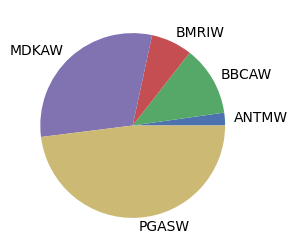

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw0a_call.flatten(), labels = columnw0a_call)
plt.show()

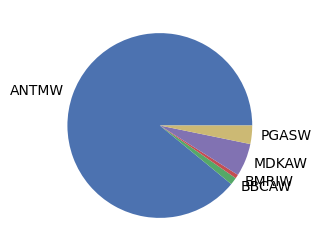

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw0a_put.flatten(), labels = columnw0a_put)
plt.show()

In [ ]:
# Net Asset Value
print (f'Net Asset Value (Call): {np.float(NAVw0a_call)}')
print (f'Net Asset Value (Put): {np.float(NAVw0a_put)}')

Net Asset Value (Call): 90205635.29389223
Net Asset Value (Put): 96180534.8160272


In [ ]:
# Networth if all were sold
print (f'Ending Balance (Call): {np.float(networthw0a_call)}')
print (f'Ending Balance (Put): {np.float(networthw0a_put)}')

Ending Balance (Call): 89980126.79389223
Ending Balance (Put): 95940088.8160272


In [ ]:
monthlya_call, monthlya_put = [IB_Warrant], [IB_Warrant]
monthlya_call.append(np.float(networthw0a_call))
monthlya_put.append(np.float(networthw0a_put))
Profit0a = [np.float(networthw0a_call)/IB_Warrant-1, np.float(networthw0a_put)/IB_Warrant-1]
Profit0a = (pd.DataFrame(Profit0a)).T
Profit0a.rename(columns={0:'Binomial call'}, inplace=True)
Profit0a.rename(columns={1:'Binomial put'}, inplace=True)
Profit0a

Binomial call  Binomial put
0      -0.100199     -0.040599

#### Scaled Return Allocation

In [ ]:
# Scaled mean returns
Mean_Call_return0s = (Mean_Call_return0-min(Mean_Call_return0))/(max(Mean_Call_return0)-min(Mean_Call_return0))
Mean_Put_return0s = (Mean_Put_return0-min(Mean_Put_return0))/(max(Mean_Put_return0)-min(Mean_Put_return0))

# Allocation based on returns
Alloc_Scaled_call0 = Mean_Call_return0s / sum(Mean_Call_return0s)
Alloc_Scaled_put0 = Mean_Put_return0s / sum(Mean_Put_return0s)

Alloc_Scaled0 = pd.DataFrame(Warrant_list)
Alloc_Scaled0 = Alloc_Scaled0.rename(columns={0:'Warrant'})
Alloc_Scaled0.insert(1,"Call Binomial", Alloc_Scaled_call0)
Alloc_Scaled0.insert(2,"Put Binomial", Alloc_Scaled_put0)
Alloc_Scaled0

Warrant  Call Binomial  Put Binomial
0   ANTMW       0.000000      0.827523
1   BBCAW       0.257986      0.010112
2   BMRIW       0.173570      0.000000
3   MDKAW       0.357186      0.156915
4   PGASW       0.211258      0.005449

In [ ]:
Scaled_call0_weights = {Warrant_list[0]:Alloc_Scaled_call0[0], Warrant_list[1]:Alloc_Scaled_call0[1],
                           Warrant_list[2]:Alloc_Scaled_call0[2], Warrant_list[3]:Alloc_Scaled_call0[3],
                           Warrant_list[4]:Alloc_Scaled_call0[4]}

Scaled_put0_weights = {Warrant_list[0]:Alloc_Scaled_put0[0], Warrant_list[1]:Alloc_Scaled_put0[1],
                           Warrant_list[2]:Alloc_Scaled_put0[2], Warrant_list[3]:Alloc_Scaled_put0[3],
                           Warrant_list[4]:Alloc_Scaled_put0[4]}

In [ ]:
# Allocation for binomial call method
daw0b_call = DiscreteAllocation(Scaled_call0_weights, MBU_Warrant*call_buy_price0*(1+buy_fee), total_portfolio_value=IB_Warrant)
allocationw0b_call, leftoverw0b_call = daw0b_call.greedy_portfolio()
print("Discrete allocation:", allocationw0b_call)
print("Funds remaining: IDR {:.2f}".format(leftoverw0b_call))

# Allocation for binomial put method
daw0b_put = DiscreteAllocation(Scaled_put0_weights, MBU_Warrant*put_buy_price0*(1+buy_fee), total_portfolio_value=IB_Warrant)
allocationw0b_put, leftoverw0b_put = daw0b_put.greedy_portfolio()
print("Discrete allocation:", allocationw0b_put)
print("Funds remaining: IDR {:.2f}".format(leftoverw0b_put))

Discrete allocation: {'MDKAW': 1189, 'BBCAW': 468, 'PGASW': 1818, 'BMRIW': 269}
Funds remaining: IDR 926.05
Discrete allocation: {'ANTMW': 15301, 'MDKAW': 842, 'BBCAW': 51, 'PGASW': 78}
Funds remaining: IDR 12944.05


In [ ]:
portionw0b_call = (pd.DataFrame.from_dict([allocationw0b_call]).T).sort_index()
columnw0b_call = [(portionw0b_call.T).columns[i] for i in range (len(portionw0b_call))]
portion_moneyw0b_call = (np.array(portionw0b_call)).reshape(-1,1)
networthw0b_call, NAVw0b_call = 0.0, 0.0
for i in range (len(columnw0b_call)):
  NAVw0b_call += MBU_Warrant*(np.dot(call_sell_price0[call_sell_price0.columns[call_sell_price0.columns.isin([columnw0b_call[i]])]],portion_moneyw0b_call[i]))
  networthw0b_call += (1-sell_fee)*MBU_Warrant*(np.dot(call_sell_price0[call_sell_price0.columns[call_sell_price0.columns.isin([columnw0b_call[i]])]],portion_moneyw0b_call[i]))
leftoverw0b_call= leftoverw0b_call*(1+ir)**(1/12)
NAVw0b_call += leftoverw0b_call
networthw0b_call += leftoverw0b_call
portw0b_call = pd.DataFrame(portion_moneyw0b_call, columns=['Quantity in MBU'])
portw0b_call.insert(0,'Asset Name',columnw0b_call)
portw0b_call = portw0b_call.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw0b_call}, ignore_index=True)
portw0b_call.index = portw0b_call.index+1

portionw0b_put = (pd.DataFrame.from_dict([allocationw0b_put]).T).sort_index()
columnw0b_put = [(portionw0b_put.T).columns[i] for i in range (len(portionw0b_put))]
portion_moneyw0b_put = (np.array(portionw0b_put)).reshape(-1,1)
networthw0b_put, NAVw0b_put = 0.0, 0.0
for i in range (len(columnw0b_put)):
  NAVw0b_put += MBU_Warrant*(np.dot(put_sell_price0[put_sell_price0.columns[put_sell_price0.columns.isin([columnw0b_put[i]])]],portion_moneyw0b_put[i]))
  networthw0b_put += (1-sell_fee)*MBU_Warrant*(np.dot(put_sell_price0[put_sell_price0.columns[put_sell_price0.columns.isin([columnw0b_put[i]])]],portion_moneyw0b_put[i]))
leftoverw0b_put = leftoverw0b_put*(1+ir)**(1/12)
NAVw0b_put += leftoverw0b_put
networthw0b_put += leftoverw0b_put
portw0b_put = pd.DataFrame(portion_moneyw0b_put, columns=['Quantity in MBU'])
portw0b_put.insert(0,'Asset Name',columnw0b_put)
portw0b_put = portw0b_put.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw0b_put}, ignore_index=True)
portw0b_put.index = portw0b_put.index+1

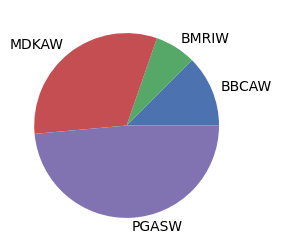

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw0b_call.flatten(), labels = columnw0b_call)
plt.show()

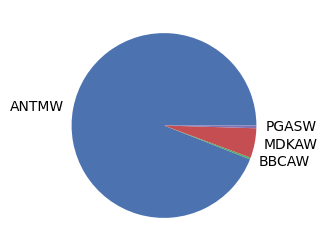

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw0b_put.flatten(), labels = columnw0b_put)
plt.show()

In [ ]:
# Net Asset Value
print (f'Net Asset Value (Call): {np.float(NAVw0b_call)}')
print (f'Net Asset Value (Put): {np.float(NAVw0b_put)}')

Net Asset Value (Call): 90310129.08164673
Net Asset Value (Put): 95329386.42545141


In [ ]:
# Networth if all were sold
print (f'Ending Balance (Call): {np.float(networthw0b_call)}')
print (f'Ending Balance (Put): {np.float(networthw0b_put)}')

Ending Balance (Call): 90084356.08164673
Ending Balance (Put): 95091095.42545141


In [ ]:
monthlyb_call, monthlyb_put = [IB_Warrant], [IB_Warrant]
monthlyb_call.append(np.float(networthw0b_call))
monthlyb_put.append(np.float(networthw0b_put))
Profit0b = [np.float(networthw0b_call)/IB_Warrant-1, np.float(networthw0b_put)/IB_Warrant-1]
Profit0b = (pd.DataFrame(Profit0b)).T
Profit0b.rename(columns={0:'Binomial call'}, inplace=True)
Profit0b.rename(columns={1:'Binomial put'}, inplace=True)
Profit0b

Binomial call  Binomial put
0      -0.099156     -0.049089

#### Uniform Allocation

In [ ]:
# Uniform allocation
Alloc_Uniform_call0 = [0.2, 0.2, 0.2, 0.2, 0.2]
Alloc_Uniform_put0 = [0.2, 0.2, 0.2, 0.2, 0.2]

Alloc_Uniform0 = pd.DataFrame(Warrant_list)
Alloc_Uniform0 = Alloc_Uniform0.rename(columns={0:'Warrant'})
Alloc_Uniform0.insert(1, "Call", Alloc_Uniform_call0)
Alloc_Uniform0.insert(2, "Put", Alloc_Uniform_put0)

Alloc_Uniform0

Warrant  Call  Put
0   ANTMW   0.2  0.2
1   BBCAW   0.2  0.2
2   BMRIW   0.2  0.2
3   MDKAW   0.2  0.2
4   PGASW   0.2  0.2

In [ ]:
Uniform0_call_weights = {Warrant_list[0]:Alloc_Uniform_call0[0], Warrant_list[1]:Alloc_Uniform_call0[1],
                           Warrant_list[2]:Alloc_Uniform_call0[2], Warrant_list[3]:Alloc_Uniform_call0[3],
                           Warrant_list[4]:Alloc_Uniform_call0[4]}

Uniform0_put_weights = {Warrant_list[0]:Alloc_Uniform_put0[0], Warrant_list[1]:Alloc_Uniform_put0[1],
                           Warrant_list[2]:Alloc_Uniform_put0[2], Warrant_list[3]:Alloc_Uniform_put0[3],
                           Warrant_list[4]:Alloc_Uniform_put0[4]}

In [ ]:
# Allocation for call
daw0c_call = DiscreteAllocation(Uniform0_call_weights, MBU_Warrant*call_buy_price0*(1+buy_fee), total_portfolio_value=IB_Warrant)
allocationw0c_call, leftoverw0c_call = daw0c_call.greedy_portfolio()
print("Discrete allocation:", allocationw0c_call)
print("Funds remaining: IDR {:.2f}".format(leftoverw0c_call))

# Allocation for put
daw0c_put = DiscreteAllocation(Uniform0_put_weights, MBU_Warrant*put_buy_price0*(1+buy_fee), total_portfolio_value=IB_Warrant)
allocationw0c_put, leftoverw0c_put = daw0c_put.greedy_portfolio()
print("Discrete allocation:", allocationw0c_put)
print("Funds remaining: IDR {:.2f}".format(leftoverw0c_put))

Discrete allocation: {'ANTMW': 1019, 'BBCAW': 363, 'BMRIW': 310, 'MDKAW': 665, 'PGASW': 1721}
Funds remaining: IDR 4231.00
Discrete allocation: {'ANTMW': 3698, 'BBCAW': 1014, 'BMRIW': 696, 'MDKAW': 1073, 'PGASW': 2853}
Funds remaining: IDR 1226.50


In [ ]:
portionw0c_call = (pd.DataFrame.from_dict([allocationw0c_call]).T).sort_index()
columnw0c_call = [(portionw0c_call.T).columns[i] for i in range (len(portionw0c_call))]
portion_moneyw0c_call = (np.array(portionw0c_call)).reshape(-1,1)
networthw0c_call, NAVw0c_call = 0.0, 0.0
for i in range (len(columnw0c_call)):
  NAVw0c_call += MBU_Warrant*(np.dot(call_sell_price0[call_sell_price0.columns[call_sell_price0.columns.isin([columnw0c_call[i]])]],portion_moneyw0c_call[i]))
  networthw0c_call += (1-sell_fee)*MBU_Warrant*(np.dot(call_sell_price0[call_sell_price0.columns[call_sell_price0.columns.isin([columnw0c_call[i]])]],portion_moneyw0c_call[i]))
leftoverw0c_call = leftoverw0c_call*(1+ir)**(1/12)
NAVw0c_call += leftoverw0c_call
networthw0c_call += leftoverw0c_call
portw0c_call = pd.DataFrame(portion_moneyw0c_call, columns=['Quantity in MBU'])
portw0c_call.insert(0,'Asset Name',columnw0c_call)
portw0c_call = portw0c_call.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw0c_call}, ignore_index=True)
portw0c_call.index = portw0c_call.index+1

portionw0c_put = (pd.DataFrame.from_dict([allocationw0c_put]).T).sort_index()
columnw0c_put = [(portionw0c_put.T).columns[i] for i in range (len(portionw0c_put))]
portion_moneyw0c_put = (np.array(portionw0c_put)).reshape(-1,1)
networthw0c_put, NAVw0c_put = 0.0, 0.0
for i in range (len(columnw0c_put)):
  NAVw0c_put += MBU_Warrant*(np.dot(put_sell_price0[put_sell_price0.columns[put_sell_price0.columns.isin([columnw0c_put[i]])]],portion_moneyw0c_put[i]))
  networthw0c_put += (1-sell_fee)*MBU_Warrant*(np.dot(put_sell_price0[put_sell_price0.columns[put_sell_price0.columns.isin([columnw0c_put[i]])]],portion_moneyw0c_put[i]))
leftoverw0c_put = leftoverw0c_put*(1+ir)**(1/12)
NAVw0c_put += leftoverw0c_put
networthw0c_put += leftoverw0c_put
portw0c_put = pd.DataFrame(portion_moneyw0c_put, columns=['Quantity in MBU'])
portw0c_put.insert(0,'Asset Name',columnw0c_put)
portw0c_put = portw0c_put.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw0c_put}, ignore_index=True)
portw0c_put.index = portw0c_put.index+1

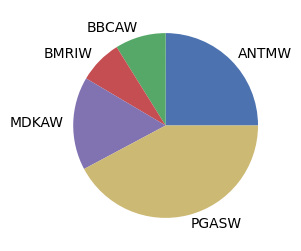

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw0c_call.flatten(), labels = columnw0c_call)
plt.show()

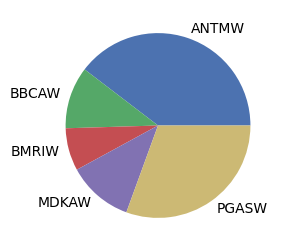

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw0c_put.flatten(), labels = columnw0c_put)
plt.show()

In [ ]:
# Net Asset Value
print (f'Net Asset Value (Call): {np.float(NAVw0c_call)}')
print (f'Net Asset Value (Put): {np.float(NAVw0c_put)}')

Net Asset Value (Call): 89041444.85119301
Net Asset Value (Put): 101034030.51524183


In [ ]:
# Networth if all were sold
print (f'Ending Balance (Call): {np.float(networthw0c_call)}')
print (f'Ending Balance (Put): {np.float(networthw0c_put)}')

Ending Balance (Call): 88818851.85119301
Ending Balance (Put): 100781448.51524183


In [ ]:
monthlyc_call, monthlyc_put = [IB_Warrant], [IB_Warrant]
monthlyc_call.append(np.float(networthw0c_call))
monthlyc_put.append(np.float(networthw0c_put))
Profit0c = [np.float(networthw0c_call)/IB_Warrant-1, np.float(networthw0c_put)/IB_Warrant-1]
Profit0c = (pd.DataFrame(Profit0c)).T
Profit0c.rename(columns={0:'Binomial call'}, inplace=True)
Profit0c.rename(columns={1:'Binomial put'}, inplace=True)
Profit0c

Binomial call  Binomial put
0      -0.111811      0.007814

#### Price Ratio Allocation

In [ ]:
# Allocation based on fair prices ratios
fair_ratios_call0 = call_sell_price0/call_buy_price0
fair_ratios_put0 = put_sell_price0/put_buy_price0
max_call0 = max(np.array(fair_ratios_call0).flatten())
min_call0 = min(np.array(fair_ratios_call0).flatten())
max_put0 = max(np.array(fair_ratios_put0).flatten())
min_put0 = min(np.array(fair_ratios_put0).flatten())
fair_ratios_call0s = (fair_ratios_call0-min_call0)/(max_call0-min_call0)
fair_ratios_put0s  = (fair_ratios_put0-min_put0)/(max_put0-min_put0)

# Allocation
Alloc_Fair_call0 = np.array(fair_ratios_call0s/sum(np.array(fair_ratios_call0s).flatten())).flatten()
Alloc_Fair_put0 = np.array(fair_ratios_put0s/sum(np.array(fair_ratios_put0s).flatten())).flatten()

Alloc_Fair0 = pd.DataFrame(Warrant_list)
Alloc_Fair0 = Alloc_Fair0.rename(columns={0:'Warrant'})
Alloc_Fair0.insert(1,"Call Binomial", Alloc_Fair_call0)
Alloc_Fair0.insert(2,"Put Binomial", Alloc_Fair_put0)
Alloc_Fair0

Warrant  Call Binomial  Put Binomial
0   ANTMW       0.147875      0.171930
1   BBCAW       0.170181      0.395764
2   BMRIW       0.000000      0.269680
3   MDKAW       0.401222      0.000000
4   PGASW       0.280722      0.162626

In [ ]:
Fair_call0_weights = {Warrant_list[0]:Alloc_Fair_call0[0], Warrant_list[1]:Alloc_Fair_call0[1],
                           Warrant_list[2]:Alloc_Fair_call0[2], Warrant_list[3]:Alloc_Fair_call0[3],
                           Warrant_list[4]:Alloc_Fair_call0[4]}

Fair_put0_weights = {Warrant_list[0]:Alloc_Fair_put0[0], Warrant_list[1]:Alloc_Fair_put0[1],
                           Warrant_list[2]:Alloc_Fair_put0[2], Warrant_list[3]:Alloc_Fair_put0[3],
                           Warrant_list[4]:Alloc_Fair_put0[4]}

In [ ]:
# Allocation for binomial call method
daw0d_call = DiscreteAllocation(Fair_call0_weights, MBU_Warrant*call_buy_price0*(1+buy_fee), total_portfolio_value=IB_Warrant)
allocationw0d_call, leftoverw0d_call = daw0d_call.greedy_portfolio()
print("Discrete allocation:", allocationw0d_call)
print("Funds remaining: IDR {:.2f}".format(leftoverw0d_call))

# Allocation for binomial put method
daw0d_put = DiscreteAllocation(Fair_put0_weights, MBU_Warrant*put_buy_price0*(1+buy_fee), total_portfolio_value=IB_Warrant)
allocationw0d_put, leftoverw0d_put = daw0d_put.greedy_portfolio()
print("Discrete allocation:", allocationw0d_put)
print("Funds remaining: IDR {:.2f}".format(leftoverw0d_put))

Discrete allocation: {'MDKAW': 1335, 'PGASW': 2416, 'BBCAW': 309, 'ANTMW': 754}
Funds remaining: IDR 1226.50
Discrete allocation: {'BBCAW': 2006, 'BMRIW': 938, 'ANTMW': 3179, 'PGASW': 2320}
Funds remaining: IDR 4831.90


In [ ]:
portionw0d_call = (pd.DataFrame.from_dict([allocationw0d_call]).T).sort_index()
columnw0d_call = [(portionw0d_call.T).columns[i] for i in range (len(portionw0d_call))]
portion_moneyw0d_call = (np.array(portionw0d_call)).reshape(-1,1)
networthw0d_call, NAVw0d_call = 0.0, 0.0
for i in range (len(columnw0d_call)):
  NAVw0d_call += MBU_Warrant*(np.dot(call_sell_price0[call_sell_price0.columns[call_sell_price0.columns.isin([columnw0d_call[i]])]],portion_moneyw0d_call[i]))
  networthw0d_call += (1-sell_fee)*MBU_Warrant*(np.dot(call_sell_price0[call_sell_price0.columns[call_sell_price0.columns.isin([columnw0d_call[i]])]],portion_moneyw0d_call[i]))
leftoverw0d_call = leftoverw0d_call*(1+ir)**(1/12)
NAVw0d_call += leftoverw0d_call
networthw0d_call += leftoverw0d_call
portw0d_call = pd.DataFrame(portion_moneyw0d_call, columns=['Quantity in MBU'])
portw0d_call.insert(0,'Asset Name',columnw0d_call)
portw0d_call = portw0d_call.sort_values(by=['Asset Name'])
portw0d_call = portw0d_call.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw0d_call}, ignore_index=True)
portw0d_call.index = portw0d_call.index+1

portionw0d_put = (pd.DataFrame.from_dict([allocationw0d_put]).T).sort_index()
columnw0d_put = [(portionw0d_put.T).columns[i] for i in range (len(portionw0d_put))]
portion_moneyw0d_put = (np.array(portionw0d_put)).reshape(-1,1)
networthw0d_put, NAVw0d_put = 0.0, 0.0
for i in range (len(columnw0d_put)):
  NAVw0d_put += MBU_Warrant*(np.dot(put_sell_price0[put_sell_price0.columns[put_sell_price0.columns.isin([columnw0d_put[i]])]],portion_moneyw0d_put[i]))
  networthw0d_put += (1-sell_fee)*MBU_Warrant*(np.dot(put_sell_price0[put_sell_price0.columns[put_sell_price0.columns.isin([columnw0d_put[i]])]],portion_moneyw0d_put[i]))
leftoverw0d_put = leftoverw0d_put*(1+ir)**(1/12)
NAVw0d_put += leftoverw0d_put
networthw0d_put += leftoverw0d_put
portw0d_put = pd.DataFrame(portion_moneyw0d_put, columns=['Quantity in MBU'])
portw0d_put.insert(0,'Asset Name',columnw0d_put)
portw0d_put = portw0d_put.sort_values(by=['Asset Name'])
portw0d_put = portw0d_put.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw0d_put}, ignore_index=True)
portw0d_put.index = portw0d_put.index+1

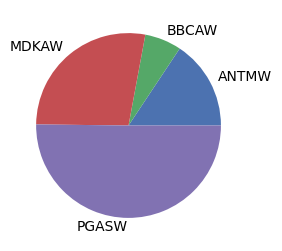

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw0d_call.flatten(), labels = columnw0d_call)
plt.show()

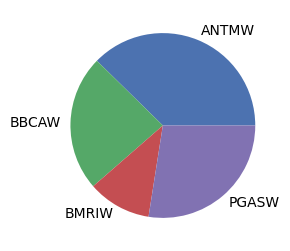

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw0d_put.flatten(), labels = columnw0d_put)
plt.show()

In [ ]:
# Net Asset Value
print (f'Net Asset Value (Call): {np.float(NAVw0d_call)}')
print (f'Net Asset Value (Put): {np.float(NAVw0d_put)}')

Net Asset Value (Call): 91511030.51524185
Net Asset Value (Put): 110239747.71838324


In [ ]:
# Networth if all were sold
print (f'Ending Balance (Call): {np.float(networthw0d_call)}')
print (f'Ending Balance (Put): {np.float(networthw0d_put)}')

Ending Balance (Call): 91282256.01524185
Ending Balance (Put): 109964160.46838324


In [ ]:
monthlyd_call, monthlyd_put = [IB_Warrant], [IB_Warrant]
monthlyd_call.append(np.float(networthw0d_call))
monthlyd_put.append(np.float(networthw0d_put))
Profit0d = [np.float(networthw0d_call)/IB_Warrant-1, np.float(networthw0d_put)/IB_Warrant-1]
Profit0d = (pd.DataFrame(Profit0d)).T
Profit0d.rename(columns={0:'Binomial call'}, inplace=True)
Profit0d.rename(columns={1:'Binomial put'}, inplace=True)
Profit0d

Binomial call  Binomial put
0      -0.087177      0.099642

### Period 1

#### Price List

In [ ]:
Call_warrant_price1 = pd.read_excel('Data Waran Final.xlsx', sheet_name='Price 1').squeeze('columns')
Call_warrant_price1

Dates  ANTMW  BBCAW  BMRIW  MDKAW  PGASW
0  2022-12-12    172    486    540    284    106
1  2022-12-13    169    482    535    298    106
2  2022-12-14    168    476    550    316    106
3  2022-12-15    165    466    535    298    105
4  2022-12-16    186    468    545    300    103
5  2022-12-19    190    466    520    278    104
6  2022-12-20    180    462    530    256    103
7  2022-12-21    188    470    540    238    102
8  2022-12-22    189    464    525    232    102
9  2022-12-23    197    456    525    230    100
10 2022-12-26    180    444    525    204     96
11 2022-12-27    179    450    505    230     89
12 2022-12-28    173    444    498    234     88
13 2022-12-29    172    438    498    236     89
14 2022-12-30    171    438    520    242     88
15 2023-01-02    171    420    482    238     84
16 2023-01-03    171    426    486    270     82
17 2023-01-04    184    398    510    274     68
18 2023-01-05    164    354    478    244     53
19 2023-01-06    168    366    452    256     55
20 2023-01-09    182    388    424    286     47
21 2023-01-10    175    342    356    274     51

In [ ]:
# Binomial return array
Call_return1 = pd.DataFrame(ANTMW_Call_binom_return1)
Call_return1 = Call_return1.rename(columns={0:'ANTMW'})
Call_return1.insert(1,"BBCAW", pd.DataFrame(BBCAW_Call_binom_return1))
Call_return1.insert(2,"BMRIW", pd.DataFrame(BMRIW_Call_binom_return1))
Call_return1.insert(3,"MDKAW", pd.DataFrame(MDKAW_Call_binom_return1))
Call_return1.insert(4,"PGASW", pd.DataFrame(PGASW_Call_binom_return1))
Mean_Call_return1 = [part*np.mean(Call_return1['ANTMW']),
                           part*np.mean(Call_return1['BBCAW']),
                           part*np.mean(Call_return1['BMRIW']),
                           part*np.mean(Call_return1['MDKAW']),
                           part*np.mean(Call_return1['PGASW'])]
Put_return1 = pd.DataFrame(ANTMW_Put_binom_return1)
Put_return1 = Put_return1.rename(columns={0:'ANTMW'})
Put_return1.insert(1,"BBCAW", pd.DataFrame(BBCAW_Put_binom_return1))
Put_return1.insert(2,"BMRIW", pd.DataFrame(BMRIW_Put_binom_return1))
Put_return1.insert(3,"MDKAW", pd.DataFrame(MDKAW_Put_binom_return1))
Put_return1.insert(4,"PGASW", pd.DataFrame(PGASW_Put_binom_return1))
Mean_Put_return1 = [part*np.mean(Put_return1['ANTMW']),
                           part*np.mean(Put_return1['BBCAW']),
                           part*np.mean(Put_return1['BMRIW']),
                           part*np.mean(Put_return1['MDKAW']),
                           part*np.mean(Put_return1['PGASW'])]

In [ ]:
# Call Buy prices and Sell prices
call_buy_price1 = pd.DataFrame(Call_warrant_price1.loc[Call_warrant_price1.index[0]]).T
call_buy_price1 = call_buy_price1.drop(columns=['Dates'])
call_buy_price1 = pd.DataFrame(call_buy_price1,dtype=int)
call_sell_price1 = pd.DataFrame(Call_warrant_price1.loc[Call_warrant_price1.index[len(Call_warrant_price1)-1]]).T
call_sell_price1 = call_sell_price1.drop(columns=['Dates'])
call_sell_price1 = pd.DataFrame(call_sell_price1,dtype=int)

In [ ]:
# Put Buy prices and Sell prices
put_initial = [int(ANTM_Put_Warrant[1]), int(BBCA_Put_Warrant[1]), int(BMRI_Put_Warrant[1]), int(MDKA_Put_Warrant[1]), int(PGAS_Put_Warrant[1])]
put_sell = [int(ANTM_Put_Warrant[2]), int(BBCA_Put_Warrant[2]), int(BMRI_Put_Warrant[2]), int(MDKA_Put_Warrant[2]), int(PGAS_Put_Warrant[2])]
put_buy_price1 = pd.DataFrame(put_initial).T
put_buy_price1 = put_buy_price1.rename({0:'ANTMW', 1:'BBCAW', 2:'BMRIW', 3:'MDKAW', 4:'PGASW'}, axis='columns')
put_buy_price1 = put_buy_price1.loc[put_buy_price1.index[0]]
put_sell_price1 = pd.DataFrame(put_sell).T
put_sell_price1 = put_sell_price1.rename({0:'ANTMW', 1:'BBCAW', 2:'BMRIW', 3:'MDKAW', 4:'PGASW'}, axis='columns')

#### Raw Return Allocation

In [ ]:
# Allocation based on returns
Mean_Call_return1_adj = [max(Mean_Call_return1[i],0) for i in range (len(Mean_Call_return1))]
Mean_Put_return1_adj = [max(Mean_Put_return1[i],0) for i in range (len(Mean_Put_return1))]
Alloc_Raw_call1 = Mean_Call_return1_adj / sum(Mean_Call_return1_adj)
Alloc_Raw_put1 = Mean_Put_return1_adj / sum(Mean_Put_return1_adj)

Alloc_Raw1 = pd.DataFrame(Warrant_list)
Alloc_Raw1 = Alloc_Raw1.rename(columns={0:'Warrant'})
Alloc_Raw1.insert(1,"Call Binomial", Alloc_Raw_call1)
Alloc_Raw1.insert(2,"Put Binomial", Alloc_Raw_put1)
Alloc_Raw1

Warrant  Call Binomial  Put Binomial
0   ANTMW       0.029969      0.540257
1   BBCAW       0.303716      0.006318
2   BMRIW       0.295658      0.008478
3   MDKAW       0.073921      0.432237
4   PGASW       0.296737      0.012710

In [ ]:
Raw_call1_weights = {Warrant_list[0]:Alloc_Raw_call1[0], Warrant_list[1]:Alloc_Raw_call1[1],
                           Warrant_list[2]:Alloc_Raw_call1[2], Warrant_list[3]:Alloc_Raw_call1[3],
                           Warrant_list[4]:Alloc_Raw_call1[4]}

Raw_put1_weights = {Warrant_list[0]:Alloc_Raw_put1[0], Warrant_list[1]:Alloc_Raw_put1[1],
                           Warrant_list[2]:Alloc_Raw_put1[2], Warrant_list[3]:Alloc_Raw_put1[3],
                           Warrant_list[4]:Alloc_Raw_put1[4]}

In [ ]:
call_buy_price1 = call_buy_price1.squeeze()
put_buy_price1 = put_buy_price1.squeeze()
# Allocation for binomial call method
daw1a_call = DiscreteAllocation(Raw_call1_weights, MBU_Warrant*call_buy_price1*(1+buy_fee), total_portfolio_value=np.float(networthw0a_call))
allocationw1a_call, leftoverw1a_call = daw1a_call.greedy_portfolio()
print("Discrete allocation:", allocationw1a_call)
print("Funds remaining: IDR {:.2f}".format(leftoverw1a_call))

# Allocation for binomial put method
daw1a_put = DiscreteAllocation(Raw_put1_weights, MBU_Warrant*put_buy_price1*(1+buy_fee), total_portfolio_value=np.float(networthw0a_put))
allocationw1a_put, leftoverw1a_put = daw1a_put.greedy_portfolio()
print("Discrete allocation:", allocationw1a_put)
print("Funds remaining: IDR {:.2f}".format(leftoverw1a_put))

Discrete allocation: {'BBCAW': 561, 'PGASW': 2515, 'BMRIW': 492, 'MDKAW': 234, 'ANTMW': 157}
Funds remaining: IDR 7770.39
Discrete allocation: {'ANTMW': 9765, 'MDKAW': 2798, 'PGASW': 179, 'BMRIW': 26, 'BBCAW': 25}
Funds remaining: IDR 595.12


In [ ]:
portionw1a_call = (pd.DataFrame.from_dict([allocationw1a_call]).T).sort_index()
columnw1a_call = [(portionw1a_call.T).columns[i] for i in range (len(portionw1a_call))]
portion_moneyw1a_call = (np.array(portionw1a_call)).reshape(-1,1)

portionw1a_put = (pd.DataFrame.from_dict([allocationw1a_put]).T).sort_index()
columnw1a_put = [(portionw1a_put.T).columns[i] for i in range (len(portionw1a_put))]
portion_moneyw1a_put = (np.array(portionw1a_put)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustmentsw_a_name_call = Warrant_list
Adjustmentsw_a_quant_call = []
initialw_a_name_call = np.array(portionw0a_call.index)
endingw_a_name_call = np.array(portionw1a_call.index)
for i in range (len(Adjustmentsw_a_name_call)):
  if Adjustmentsw_a_name_call[i] in endingw_a_name_call:
    index = int((np.where(endingw_a_name_call == Adjustmentsw_a_name_call[i]))[0])
    Adjustmentsw_a_quant_call.append(np.array(portion_moneyw1a_call.flatten())[index])
  else:
    Adjustmentsw_a_quant_call.append(0)
for i in range (len(Adjustmentsw_a_name_call)):
  if Adjustmentsw_a_name_call[i] in initialw_a_name_call:
    index = int((np.where(initialw_a_name_call == Adjustmentsw_a_name_call[i]))[0])
    Adjustmentsw_a_quant_call[i] -= np.array(portion_moneyw0a_call.flatten())[index]

Adjustmentsw_a_name_put = Warrant_list
Adjustmentsw_a_quant_put = []
initialw_a_name_put = np.array(portionw0a_put.index)
endingw_a_name_put = np.array(portionw1a_put.index)
for i in range (len(Adjustmentsw_a_name_put)):
  if Adjustmentsw_a_name_put[i] in endingw_a_name_put:
    index = int((np.where(endingw_a_name_put == Adjustmentsw_a_name_put[i]))[0])
    Adjustmentsw_a_quant_put.append(np.array(portion_moneyw1a_put.flatten())[index])
  else:
    Adjustmentsw_a_quant_put.append(0)
for i in range (len(Adjustmentsw_a_name_put)):
  if Adjustmentsw_a_name_put[i] in initialw_a_name_put:
    index = int((np.where(initialw_a_name_put == Adjustmentsw_a_name_put[i]))[0])
    Adjustmentsw_a_quant_put[i] -= np.array(portion_moneyw0a_put.flatten())[index]

In [ ]:
call_buy_price1 = pd.DataFrame(call_buy_price1).T
put_buy_price1 = pd.DataFrame(put_buy_price1).T

# Balance after selling assets (adjustments)
leftoverw1a_call = leftoverw0a_call
for i in range (len(Adjustmentsw_a_name_call)):
  if Adjustmentsw_a_quant_call[i] < 0:
    leftoverw1a_call -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_a_quant_call[i]*(np.array(call_sell_price0).reshape(-1,1))[i])
  elif Adjustmentsw_a_quant_call[i] > 0:
    leftoverw1a_call -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_a_quant_call[i]*(np.array(call_buy_price1).reshape(-1,1))[i])

leftoverw1a_put = leftoverw0a_put
for i in range (len(Adjustmentsw_a_name_put)):
  if Adjustmentsw_a_quant_put[i] < 0:
    leftoverw1a_put -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_a_quant_put[i]*(np.array(put_sell_price0).reshape(-1,1))[i])
  elif Adjustmentsw_a_quant_put[i] > 0:
    leftoverw1a_put -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_a_quant_put[i]*(np.array(put_buy_price1).reshape(-1,1))[i])

In [ ]:
networthw1a_call, NAVw1a_call = 0.0, 0.0
for i in range (len(columnw1a_call)):
  NAVw1a_call += MBU_Warrant*(np.dot(call_sell_price1[call_sell_price1.columns[call_sell_price1.columns.isin([columnw1a_call[i]])]],portion_moneyw1a_call[i]))
  networthw1a_call += (1-sell_fee)*MBU_Warrant*(np.dot(call_sell_price1[call_sell_price1.columns[call_sell_price1.columns.isin([columnw1a_call[i]])]],portion_moneyw1a_call[i]))
leftoverw1a_call = leftoverw1a_call*(1+ir)**(1/12)
NAVw1a_call += leftoverw1a_call
networthw1a_call += leftoverw1a_call
portw1a_call = pd.DataFrame(portion_moneyw1a_call, columns=['Quantity in MBU'])
portw1a_call.insert(0,'Asset Name',columnw1a_call)
portw1a_call = portw1a_call.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw1a_call}, ignore_index=True)
portw1a_call.index = portw1a_call.index+1

networthw1a_put, NAVw1a_put = 0.0, 0.0
for i in range (len(columnw1a_put)):
  NAVw1a_put += MBU_Warrant*(np.dot(put_sell_price1[put_sell_price1.columns[put_sell_price1.columns.isin([columnw1a_put[i]])]],portion_moneyw1a_put[i]))
  networthw1a_put += (1-sell_fee)*MBU_Warrant*(np.dot(put_sell_price1[put_sell_price1.columns[put_sell_price1.columns.isin([columnw1a_put[i]])]],portion_moneyw1a_put[i]))
leftoverw1a_put = leftoverw1a_put*(1+ir)**(1/12)
NAVw1a_put += leftoverw1a_put
networthw1a_put += leftoverw1a_put
portw1a_put = pd.DataFrame(portion_moneyw1a_put, columns=['Quantity in MBU'])
portw1a_put.insert(0,'Asset Name',columnw1a_put)
portw1a_put = portw1a_put.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw1a_put}, ignore_index=True)
portw1a_put.index = portw1a_put.index+1

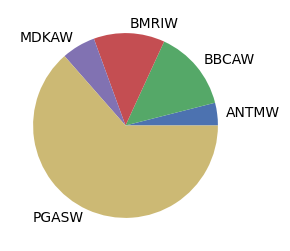

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw1a_call.flatten(), labels = columnw1a_call)
plt.show()

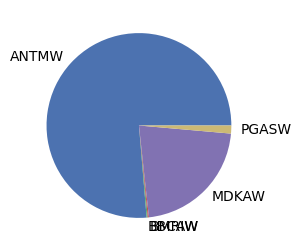

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw1a_put.flatten(), labels = columnw1a_put)
plt.show()

In [ ]:
# Net Asset Value
print (f'Net Asset Value (Call): {np.float(NAVw1a_call)}')
print (f'Net Asset Value (Put): {np.float(NAVw1a_put)}')

Net Asset Value (Call): 58952962.243955545
Net Asset Value (Put): 67805439.20620391


In [ ]:
# Networth if all were sold
print (f'Ending Balance (Call): {np.float(networthw1a_call)}')
print (f'Ending Balance (Put): {np.float(networthw1a_put)}')

Ending Balance (Call): 58806244.743955545
Ending Balance (Put): 67636602.95620391


In [ ]:
monthlya_call.append(np.float(networthw1a_call))
monthlya_put.append(np.float(networthw1a_put))
Profit1a = [np.float(networthw1a_call)/monthlya_call[1]-1, np.float(networthw1a_put)/monthlya_put[1]-1]
Profit1a = (pd.DataFrame(Profit1a)).T
Profit1a.rename(columns={0:'Binomial call'}, inplace=True)
Profit1a.rename(columns={1:'Binomial put'}, inplace=True)
Profit1a

Binomial call  Binomial put
0      -0.346453     -0.295012

#### Scaled Return Allocation

In [ ]:
# Scaled mean returns
Mean_Call_return1s = (Mean_Call_return1-min(Mean_Call_return1))/(max(Mean_Call_return1)-min(Mean_Call_return1))
Mean_Put_return1s = (Mean_Put_return1-min(Mean_Put_return1))/(max(Mean_Put_return1)-min(Mean_Put_return1))

# Allocation based on returns
Alloc_Scaled_call1 = Mean_Call_return1s / sum(Mean_Call_return1s)
Alloc_Scaled_put1 = Mean_Put_return1s / sum(Mean_Put_return1s)

Alloc_Scaled1 = pd.DataFrame(Warrant_list)
Alloc_Scaled1 = Alloc_Scaled1.rename(columns={0:'Warrant'})
Alloc_Scaled1.insert(1,"Call Binomial", Alloc_Scaled_call1)
Alloc_Scaled1.insert(2,"Put Binomial", Alloc_Scaled_put1)
Alloc_Scaled1

Warrant  Call Binomial  Put Binomial
0   ANTMW       0.000000      0.551356
1   BBCAW       0.321996      0.000000
2   BMRIW       0.312518      0.002231
3   MDKAW       0.051699      0.439812
4   PGASW       0.313787      0.006601

In [ ]:
Scaled_call1_weights = {Warrant_list[0]:Alloc_Scaled_call1[0], Warrant_list[1]:Alloc_Scaled_call1[1],
                           Warrant_list[2]:Alloc_Scaled_call1[2], Warrant_list[3]:Alloc_Scaled_call1[3],
                           Warrant_list[4]:Alloc_Scaled_call1[4]}

Scaled_put1_weights = {Warrant_list[0]:Alloc_Scaled_put1[0], Warrant_list[1]:Alloc_Scaled_put1[1],
                           Warrant_list[2]:Alloc_Scaled_put1[2], Warrant_list[3]:Alloc_Scaled_put1[3],
                           Warrant_list[4]:Alloc_Scaled_put1[4]}

In [ ]:
call_buy_price1 = call_buy_price1.squeeze()
put_buy_price1 = put_buy_price1.squeeze()
# Allocation for binomial call method
daw1b_call = DiscreteAllocation(Scaled_call1_weights, MBU_Warrant*call_buy_price1*(1+buy_fee), total_portfolio_value=np.float(networthw0b_call))
allocationw1b_call, leftoverw1b_call = daw1b_call.greedy_portfolio()
print("Discrete allocation:", allocationw1b_call)
print("Funds remaining: IDR {:.2f}".format(leftoverw1b_call))

# Allocation for binomial put method
daw1b_put = DiscreteAllocation(Scaled_put1_weights, MBU_Warrant*put_buy_price1*(1+buy_fee), total_portfolio_value=np.float(networthw0b_put))
allocationw1b_put, leftoverw1b_put = daw1b_put.greedy_portfolio()
print("Discrete allocation:", allocationw1b_put)
print("Funds remaining: IDR {:.2f}".format(leftoverw1b_put))

Discrete allocation: {'BBCAW': 596, 'PGASW': 2662, 'BMRIW': 520, 'MDKAW': 164}
Funds remaining: IDR 29075.48
Discrete allocation: {'ANTMW': 9877, 'MDKAW': 2821, 'PGASW': 92, 'BMRIW': 7}
Funds remaining: IDR 5781.08


In [ ]:
portionw1b_call = (pd.DataFrame.from_dict([allocationw1b_call]).T).sort_index()
columnw1b_call = [(portionw1b_call.T).columns[i] for i in range (len(portionw1b_call))]
portion_moneyw1b_call = (np.array(portionw1b_call)).reshape(-1,1)

portionw1b_put = (pd.DataFrame.from_dict([allocationw1b_put]).T).sort_index()
columnw1b_put = [(portionw1b_put.T).columns[i] for i in range (len(portionw1b_put))]
portion_moneyw1b_put = (np.array(portionw1b_put)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustmentsw_b_name_call = Warrant_list
Adjustmentsw_b_quant_call = []
initialw_b_name_call = np.array(portionw0b_call.index)
endingw_b_name_call = np.array(portionw1b_call.index)
for i in range (len(Adjustmentsw_b_name_call)):
  if Adjustmentsw_b_name_call[i] in endingw_b_name_call:
    index = int((np.where(endingw_b_name_call == Adjustmentsw_b_name_call[i]))[0])
    Adjustmentsw_b_quant_call.append(np.array(portion_moneyw1b_call.flatten())[index])
  else:
    Adjustmentsw_b_quant_call.append(0)
for i in range (len(Adjustmentsw_b_name_call)):
  if Adjustmentsw_b_name_call[i] in initialw_b_name_call:
    index = int((np.where(initialw_b_name_call == Adjustmentsw_b_name_call[i]))[0])
    Adjustmentsw_b_quant_call[i] -= np.array(portion_moneyw0b_call.flatten())[index]

Adjustmentsw_b_name_put = Warrant_list
Adjustmentsw_b_quant_put = []
initialw_b_name_put = np.array(portionw0b_put.index)
endingw_b_name_put = np.array(portionw1b_put.index)
for i in range (len(Adjustmentsw_b_name_put)):
  if Adjustmentsw_b_name_put[i] in endingw_b_name_put:
    index = int((np.where(endingw_b_name_put == Adjustmentsw_b_name_put[i]))[0])
    Adjustmentsw_b_quant_put.append(np.array(portion_moneyw1b_put.flatten())[index])
  else:
    Adjustmentsw_b_quant_put.append(0)
for i in range (len(Adjustmentsw_b_name_put)):
  if Adjustmentsw_b_name_put[i] in initialw_b_name_put:
    index = int((np.where(initialw_b_name_put == Adjustmentsw_b_name_put[i]))[0])
    Adjustmentsw_b_quant_put[i] -= np.array(portion_moneyw0b_put.flatten())[index]

In [ ]:
call_buy_price1 = pd.DataFrame(call_buy_price1).T
put_buy_price1 = pd.DataFrame(put_buy_price1).T

# Balance after selling assets (adjustments)
leftoverw1b_call = leftoverw0b_call
for i in range (len(Adjustmentsw_b_name_call)):
  if Adjustmentsw_b_quant_call[i] < 0:
    leftoverw1b_call -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_b_quant_call[i]*(np.array(call_sell_price0).reshape(-1,1))[i])
  elif Adjustmentsw_b_quant_call[i] > 0:
    leftoverw1b_call -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_b_quant_call[i]*(np.array(call_buy_price1).reshape(-1,1))[i])

leftoverw1b_put = leftoverw0b_put
for i in range (len(Adjustmentsw_b_name_put)):
  if Adjustmentsw_b_quant_put[i] < 0:
    leftoverw1b_put -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_b_quant_put[i]*(np.array(put_sell_price0).reshape(-1,1))[i])
  elif Adjustmentsw_b_quant_put[i] > 0:
    leftoverw1b_put -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_b_quant_put[i]*(np.array(put_buy_price1).reshape(-1,1))[i])

In [ ]:
portion_moneyw1b_call = (np.array(portion_moneyw1b_call)).reshape(-1,1)
networthw1b_call, NAVw1b_call = 0.0, 0.0
for i in range (len(columnw1b_call)):
  NAVw1b_call += MBU_Warrant*(np.dot(call_sell_price1[call_sell_price1.columns[call_sell_price1.columns.isin([columnw1b_call[i]])]],portion_moneyw1b_call[i]))
  networthw1b_call += (1-sell_fee)*MBU_Warrant*(np.dot(call_sell_price1[call_sell_price1.columns[call_sell_price1.columns.isin([columnw1b_call[i]])]],portion_moneyw1b_call[i]))
leftoverw1b_call = leftoverw1b_call*(1+ir)**(1/12)
NAVw1b_call += leftoverw1b_call
networthw1b_call += leftoverw1b_call
portw1b_call = pd.DataFrame(portion_moneyw1b_call, columns=['Quantity in MBU'])
portw1b_call.insert(0,'Asset Name',columnw1b_call)
portw1b_call = portw1b_call.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw1b_call}, ignore_index=True)
portw1b_call.index = portw1b_call.index+1

portion_moneyw1b_put = (np.array(portion_moneyw1b_put)).reshape(-1,1)
networthw1b_put, NAVw1b_put = 0.0, 0.0
for i in range (len(columnw1b_put)):
  NAVw1b_put += MBU_Warrant*(np.dot(put_sell_price1[put_sell_price1.columns[put_sell_price1.columns.isin([columnw1b_put[i]])]],portion_moneyw1b_put[i]))
  networthw1b_put += (1-sell_fee)*MBU_Warrant*(np.dot(put_sell_price1[put_sell_price1.columns[put_sell_price1.columns.isin([columnw1b_put[i]])]],portion_moneyw1b_put[i]))
leftoverw1b_put = leftoverw1b_put*(1+ir)**(1/12)
NAVw1b_put += leftoverw1b_put
networthw1b_put += leftoverw1b_put
portw1b_put = pd.DataFrame(portion_moneyw1b_put, columns=['Quantity in MBU'])
portw1b_put.insert(0,'Asset Name',columnw1b_put)
portw1b_put = portw1b_put.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw1b_put}, ignore_index=True)
portw1b_put.index = portw1b_put.index+1

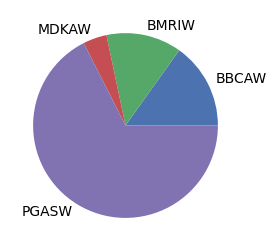

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw1b_call.flatten(), labels = columnw1b_call)
plt.show()

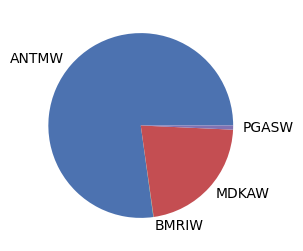

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw1b_put.flatten(), labels = columnw1b_put)
plt.show()

In [ ]:
# Net Asset Value
print (f'Net Asset Value (Call): {np.float(NAVw1b_call)}')
print (f'Net Asset Value (Put): {np.float(NAVw1b_put)}')

Net Asset Value (Call): 57239768.86823039
Net Asset Value (Put): 66099916.02712707


In [ ]:
# Networth if all were sold
print (f'Ending Balance (Call): {np.float(networthw1b_call)}')
print (f'Ending Balance (Put): {np.float(networthw1b_put)}')

Ending Balance (Call): 57097356.36823039
Ending Balance (Put): 65935336.27712707


In [ ]:
monthlyb_call.append(np.float(networthw1b_call))
monthlyb_put.append(np.float(networthw1b_put))
Profit1b = [np.float(networthw1b_call)/monthlyb_call[1]-1, np.float(networthw1b_put)/monthlyb_put[1]-1]
Profit1b = (pd.DataFrame(Profit1b)).T
Profit1b.rename(columns={0:'Binomial call'}, inplace=True)
Profit1b.rename(columns={1:'Binomial put'}, inplace=True)
Profit1b

Binomial call  Binomial put
0      -0.366179     -0.306609

#### Uniform Allocation

In [ ]:
# Uniform allocation
Alloc_Uniform_call1 = [0.2, 0.2, 0.2, 0.2, 0.2]
Alloc_Uniform_put1 = [0.2, 0.2, 0.2, 0.2, 0.2]

Alloc_Uniform1 = pd.DataFrame(Warrant_list)
Alloc_Uniform1 = Alloc_Uniform1.rename(columns={0:'Warrant'})
Alloc_Uniform1.insert(1, "Call", Alloc_Uniform_call1)
Alloc_Uniform1.insert(2, "Put", Alloc_Uniform_put1)

Alloc_Uniform1

Warrant  Call  Put
0   ANTMW   0.2  0.2
1   BBCAW   0.2  0.2
2   BMRIW   0.2  0.2
3   MDKAW   0.2  0.2
4   PGASW   0.2  0.2

In [ ]:
Uniform1_call_weights = {Warrant_list[0]:Alloc_Uniform_call1[0], Warrant_list[1]:Alloc_Uniform_call1[1],
                           Warrant_list[2]:Alloc_Uniform_call1[2], Warrant_list[3]:Alloc_Uniform_call1[3],
                           Warrant_list[4]:Alloc_Uniform_call1[4]}

Uniform1_put_weights = {Warrant_list[0]:Alloc_Uniform_put1[0], Warrant_list[1]:Alloc_Uniform_put1[1],
                           Warrant_list[2]:Alloc_Uniform_put1[2], Warrant_list[3]:Alloc_Uniform_put1[3],
                           Warrant_list[4]:Alloc_Uniform_put1[4]}

In [ ]:
call_buy_price1 = call_buy_price1.squeeze()
put_buy_price1 = put_buy_price1.squeeze()
# Allocation for binomial call method
daw1c_call = DiscreteAllocation(Uniform1_call_weights, MBU_Warrant*call_buy_price1*(1+buy_fee), total_portfolio_value=np.float(networthw0c_call))
allocationw1c_call, leftoverw1c_call = daw1c_call.greedy_portfolio()
print("Discrete allocation:", allocationw1c_call)
print("Funds remaining: IDR {:.2f}".format(leftoverw1c_call))

# Allocation for binomial put method
daw1c_put = DiscreteAllocation(Uniform1_put_weights, MBU_Warrant*put_buy_price1*(1+buy_fee), total_portfolio_value=np.float(networthw0c_put))
allocationw1c_put, leftoverw1c_put = daw1c_put.greedy_portfolio()
print("Discrete allocation:", allocationw1c_put)
print("Funds remaining: IDR {:.2f}".format(leftoverw1c_put))

Discrete allocation: {'ANTMW': 1032, 'BBCAW': 365, 'BMRIW': 328, 'MDKAW': 625, 'PGASW': 1673}
Funds remaining: IDR 624.05
Discrete allocation: {'ANTMW': 3797, 'BBCAW': 835, 'BMRIW': 645, 'MDKAW': 1360, 'PGASW': 2960}
Funds remaining: IDR 2907.12


In [ ]:
portionw1c_call = (pd.DataFrame.from_dict([allocationw1c_call]).T).sort_index()
columnw1c_call = [(portionw1c_call.T).columns[i] for i in range (len(portionw1c_call))]
portion_moneyw1c_call = (np.array(portionw1c_call)).reshape(-1,1)

portionw1c_put = (pd.DataFrame.from_dict([allocationw1c_put]).T).sort_index()
columnw1c_put = [(portionw1c_put.T).columns[i] for i in range (len(portionw1c_put))]
portion_moneyw1c_put = (np.array(portionw1c_put)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustmentsw_c_name_call = Warrant_list
Adjustmentsw_c_quant_call = []
initialw_c_name_call = np.array(portionw0c_call.index)
endingw_c_name_call = np.array(portionw1c_call.index)
for i in range (len(Adjustmentsw_c_name_call)):
  if Adjustmentsw_c_name_call[i] in endingw_c_name_call:
    index = int((np.where(endingw_c_name_call == Adjustmentsw_c_name_call[i]))[0])
    Adjustmentsw_c_quant_call.append(np.array(portion_moneyw1c_call.flatten())[index])
  else:
    Adjustmentsw_c_quant_call.append(0)
for i in range (len(Adjustmentsw_c_name_call)):
  if Adjustmentsw_c_name_call[i] in initialw_c_name_call:
    index = int((np.where(initialw_c_name_call == Adjustmentsw_c_name_call[i]))[0])
    Adjustmentsw_c_quant_call[i] -= np.array(portion_moneyw0c_call.flatten())[index]

Adjustmentsw_c_name_put = Warrant_list
Adjustmentsw_c_quant_put = []
initialw_c_name_put = np.array(portionw0c_put.index)
endingw_c_name_put = np.array(portionw1c_put.index)
for i in range (len(Adjustmentsw_c_name_put)):
  if Adjustmentsw_c_name_put[i] in endingw_c_name_put:
    index = int((np.where(endingw_c_name_put == Adjustmentsw_c_name_put[i]))[0])
    Adjustmentsw_c_quant_put.append(np.array(portion_moneyw1c_put.flatten())[index])
  else:
    Adjustmentsw_c_quant_put.append(0)
for i in range (len(Adjustmentsw_c_name_put)):
  if Adjustmentsw_c_name_put[i] in initialw_c_name_put:
    index = int((np.where(initialw_c_name_put == Adjustmentsw_c_name_put[i]))[0])
    Adjustmentsw_c_quant_put[i] -= np.array(portion_moneyw0c_put.flatten())[index]

In [ ]:
call_buy_price1 = pd.DataFrame(call_buy_price1).T
put_buy_price1 = pd.DataFrame(put_buy_price1).T

# Balance after selling assets (adjustments)
leftoverw1c_call = leftoverw0c_call
for i in range (len(Adjustmentsw_c_name_call)):
  if Adjustmentsw_c_quant_call[i] < 0:
    leftoverw1c_call -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_c_quant_call[i]*(np.array(call_sell_price0).reshape(-1,1))[i])
  elif Adjustmentsw_c_quant_call[i] > 0:
    leftoverw1c_call -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_c_quant_call[i]*(np.array(call_buy_price1).reshape(-1,1))[i])

leftoverw1c_put = leftoverw0c_put
for i in range (len(Adjustmentsw_c_name_put)):
  if Adjustmentsw_c_quant_put[i] < 0:
    leftoverw1c_put -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_c_quant_put[i]*(np.array(put_sell_price0).reshape(-1,1))[i])
  elif Adjustmentsw_c_quant_put[i] > 0:
    leftoverw1c_put -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_c_quant_put[i]*(np.array(put_buy_price1).reshape(-1,1))[i])

In [ ]:
networthw1c_call, NAVw1c_call = 0.0, 0.0
for i in range (len(columnw1c_call)):
  NAVw1c_call += MBU_Warrant*(np.dot(call_sell_price1[call_sell_price1.columns[call_sell_price1.columns.isin([columnw1c_call[i]])]],portion_moneyw1c_call[i]))
  networthw1c_call += (1-sell_fee)*MBU_Warrant*(np.dot(call_sell_price1[call_sell_price1.columns[call_sell_price1.columns.isin([columnw1c_call[i]])]],portion_moneyw1c_call[i]))
leftoverw1c_call = leftoverw1c_call*(1+ir)**(1/12)
NAVw1c_call += leftoverw1c_call
networthw1c_call += leftoverw1c_call
portw1c_call = pd.DataFrame(portion_moneyw1c_call, columns=['Quantity in MBU'])
portw1c_call.insert(0,'Asset Name',columnw1c_call)
portw1c_call = portw1c_call.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw1c_call}, ignore_index=True)
portw1c_call.index = portw1c_call.index+1

networthw1c_put, NAVw1c_put = 0.0, 0.0
for i in range (len(columnw1c_put)):
  NAVw1c_put += MBU_Warrant*(np.dot(put_sell_price1[put_sell_price1.columns[put_sell_price1.columns.isin([columnw1c_put[i]])]],portion_moneyw1c_put[i]))
  networthw1c_put += (1-sell_fee)*MBU_Warrant*(np.dot(put_sell_price1[put_sell_price1.columns[put_sell_price1.columns.isin([columnw1c_put[i]])]],portion_moneyw1c_put[i]))
leftoverw1c_put = leftoverw1c_put*(1+ir)**(1/12)
NAVw1c_put += leftoverw1c_put
networthw1c_put += leftoverw1c_put
portw1c_put = pd.DataFrame(portion_moneyw1c_put, columns=['Quantity in MBU'])
portw1c_put.insert(0,'Asset Name',columnw1c_put)
portw1c_put = portw1c_put.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw1c_put}, ignore_index=True)
portw1c_put.index = portw1c_put.index+1

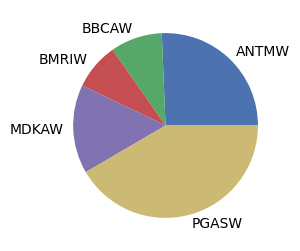

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw1c_call.flatten(), labels = columnw1c_call)
plt.show()

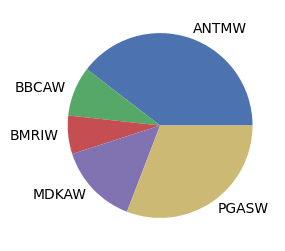

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw1c_put.flatten(), labels = columnw1c_put)
plt.show()

In [ ]:
# Net Asset Value
print (f'Net Asset Value (Call): {np.float(NAVw1c_call)}')
print (f'Net Asset Value (Put): {np.float(NAVw1c_put)}')

Net Asset Value (Call): 68228440.0940804
Net Asset Value (Put): 107164873.12572417


In [ ]:
# Networth if all were sold
print (f'Ending Balance (Call): {np.float(networthw1c_call)}')
print (f'Ending Balance (Put): {np.float(networthw1c_put)}')

Ending Balance (Call): 68058747.3440804
Ending Balance (Put): 106897922.62572417


In [ ]:
monthlyc_call.append(np.float(networthw1c_call))
monthlyc_put.append(np.float(networthw1c_put))
Profit1c = [np.float(networthw1c_call)/monthlyc_call[1]-1, np.float(networthw1c_put)/monthlyc_put[1]-1]
Profit1c = (pd.DataFrame(Profit1c)).T
Profit1c.rename(columns={0:'Binomial call'}, inplace=True)
Profit1c.rename(columns={1:'Binomial put'}, inplace=True)
Profit1c

Binomial call  Binomial put
0      -0.233735       0.06069

#### Price Ratio Allocation

In [ ]:
# Allocation based on fair prices ratios
fair_ratios_call1 = call_sell_price1/np.array(call_buy_price1)
fair_ratios_put1 = put_sell_price1/np.array(put_buy_price1)
max_call1 = max(np.array(fair_ratios_call1).flatten())
min_call1 = min(np.array(fair_ratios_call1).flatten())
max_put1 = max(np.array(fair_ratios_put1).flatten())
min_put1 = min(np.array(fair_ratios_put1).flatten())
fair_ratios_call1s = (fair_ratios_call1-min_call1)/(max_call1-min_call1)
fair_ratios_put1s  = (fair_ratios_put1-min_put1)/(max_put1-min_put1)

# Allocation
Alloc_Fair_call1 = np.array(fair_ratios_call1s/sum(np.array(fair_ratios_call1s).flatten())).flatten()
Alloc_Fair_put1 = np.array(fair_ratios_put1s/sum(np.array(fair_ratios_put1s).flatten())).flatten()

Alloc_Fair1 = pd.DataFrame(Warrant_list)
Alloc_Fair1 = Alloc_Fair1.rename(columns={0:'Warrant'})
Alloc_Fair1.insert(1,"Call Binomial", Alloc_Fair_call1)
Alloc_Fair1.insert(2,"Put Binomial", Alloc_Fair_put1)
Alloc_Fair1

Warrant  Call Binomial  Put Binomial
0   ANTMW       0.377506      0.000000
1   BBCAW       0.156667      0.195242
2   BMRIW       0.125383      0.195867
3   MDKAW       0.340444      0.094875
4   PGASW       0.000000      0.514017

In [ ]:
Fair_call1_weights = {Warrant_list[0]:Alloc_Fair_call1[0], Warrant_list[1]:Alloc_Fair_call1[1],
                           Warrant_list[2]:Alloc_Fair_call1[2], Warrant_list[3]:Alloc_Fair_call1[3],
                           Warrant_list[4]:Alloc_Fair_call1[4]}

Fair_put1_weights = {Warrant_list[0]:Alloc_Fair_put1[0], Warrant_list[1]:Alloc_Fair_put1[1],
                           Warrant_list[2]:Alloc_Fair_put1[2], Warrant_list[3]:Alloc_Fair_put1[3],
                           Warrant_list[4]:Alloc_Fair_put1[4]}

In [ ]:
call_buy_price1 = call_buy_price1.squeeze()
put_buy_price1 = put_buy_price1.squeeze()
# Allocation for binomial call method
daw1d_call = DiscreteAllocation(Fair_call1_weights, MBU_Warrant*call_buy_price1*(1+buy_fee), total_portfolio_value=np.float(networthw0d_call))
allocationw1d_call, leftoverw1d_call = daw1d_call.greedy_portfolio()
print("Discrete allocation:", allocationw1d_call)
print("Funds remaining: IDR {:.2f}".format(leftoverw1d_call))

# Allocation for binomial put method
daw1d_put = DiscreteAllocation(Fair_put1_weights, MBU_Warrant*put_buy_price1*(1+buy_fee), total_portfolio_value=np.float(networthw0d_put))
allocationw1d_put, leftoverw1d_put = daw1d_put.greedy_portfolio()
print("Discrete allocation:", allocationw1d_put)
print("Funds remaining: IDR {:.2f}".format(leftoverw1d_put))

Discrete allocation: {'ANTMW': 2000, 'MDKAW': 1092, 'BBCAW': 294, 'BMRIW': 211}
Funds remaining: IDR 50413.22
Discrete allocation: {'PGASW': 8299, 'BMRIW': 689, 'BBCAW': 890, 'MDKAW': 704}
Funds remaining: IDR 1263.17


In [ ]:
portionw1d_call = (pd.DataFrame.from_dict([allocationw1d_call]).T).sort_index()
columnw1d_call = [(portionw1d_call.T).columns[i] for i in range (len(portionw1d_call))]
portion_moneyw1d_call = (np.array(portionw1d_call)).reshape(-1,1)

portionw1d_put = (pd.DataFrame.from_dict([allocationw1d_put]).T).sort_index()
columnw1d_put = [(portionw1d_put.T).columns[i] for i in range (len(portionw1d_put))]
portion_moneyw1d_put = (np.array(portionw1d_put)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustmentsw_d_name_call = Warrant_list
Adjustmentsw_d_quant_call = []
initialw_d_name_call = np.array(portionw0d_call.index)
endingw_d_name_call = np.array(portionw1d_call.index)
for i in range (len(Adjustmentsw_d_name_call)):
  if Adjustmentsw_d_name_call[i] in endingw_d_name_call:
    index = int((np.where(endingw_d_name_call == Adjustmentsw_d_name_call[i]))[0])
    Adjustmentsw_d_quant_call.append(np.array(portion_moneyw1d_call.flatten())[index])
  else:
    Adjustmentsw_d_quant_call.append(0)
for i in range (len(Adjustmentsw_d_name_call)):
  if Adjustmentsw_d_name_call[i] in initialw_d_name_call:
    index = int((np.where(initialw_d_name_call == Adjustmentsw_d_name_call[i]))[0])
    Adjustmentsw_d_quant_call[i] -= np.array(portion_moneyw0d_call.flatten())[index]

Adjustmentsw_d_name_put = Warrant_list
Adjustmentsw_d_quant_put = []
initialw_d_name_put = np.array(portionw0d_put.index)
endingw_d_name_put = np.array(portionw1d_put.index)
for i in range (len(Adjustmentsw_d_name_put)):
  if Adjustmentsw_d_name_put[i] in endingw_d_name_put:
    index = int((np.where(endingw_d_name_put == Adjustmentsw_d_name_put[i]))[0])
    Adjustmentsw_d_quant_put.append(np.array(portion_moneyw1d_put.flatten())[index])
  else:
    Adjustmentsw_d_quant_put.append(0)
for i in range (len(Adjustmentsw_d_name_put)):
  if Adjustmentsw_d_name_put[i] in initialw_d_name_put:
    index = int((np.where(initialw_d_name_put == Adjustmentsw_d_name_put[i]))[0])
    Adjustmentsw_d_quant_put[i] -= np.array(portion_moneyw0d_put.flatten())[index]

In [ ]:
call_buy_price1 = pd.DataFrame(call_buy_price1).T
put_buy_price1 = pd.DataFrame(put_buy_price1).T

# Balance after selling assets (adjustments)
leftoverw1d_call = leftoverw0d_call
for i in range (len(Adjustmentsw_d_name_call)):
  if Adjustmentsw_d_quant_call[i] < 0:
    leftoverw1d_call -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_d_quant_call[i]*(np.array(call_sell_price0).reshape(-1,1))[i])
  elif Adjustmentsw_d_quant_call[i] > 0:
    leftoverw1d_call -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_d_quant_call[i]*(np.array(call_buy_price1).reshape(-1,1))[i])

leftoverw1d_put = leftoverw0d_put
for i in range (len(Adjustmentsw_d_name_put)):
  if Adjustmentsw_d_quant_put[i] < 0:
    leftoverw1d_put -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_d_quant_put[i]*(np.array(put_sell_price0).reshape(-1,1))[i])
  elif Adjustmentsw_d_quant_put[i] > 0:
    leftoverw1d_put -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_d_quant_put[i]*(np.array(put_buy_price1).reshape(-1,1))[i])

In [ ]:
portion_moneyw1d_call = (np.array(portion_moneyw1d_call)).reshape(-1,1)
networthw1d_call, NAVw1d_call = 0.0, 0.0
for i in range (len(columnw1d_call)):
  NAVw1d_call += MBU_Warrant*(np.dot(call_sell_price1[call_sell_price1.columns[call_sell_price1.columns.isin([columnw1d_call[i]])]],portion_moneyw1d_call[i]))
  networthw1d_call += (1-sell_fee)*MBU_Warrant*(np.dot(call_sell_price1[call_sell_price1.columns[call_sell_price1.columns.isin([columnw1d_call[i]])]],portion_moneyw1d_call[i]))
leftoverw1d_call = leftoverw1d_call*(1+ir)**(1/12)
NAVw1d_call += leftoverw1d_call
networthw1d_call += leftoverw1d_call
portw1d_call = pd.DataFrame(portion_moneyw1d_call, columns=['Quantity in MBU'])
portw1d_call.insert(0,'Asset Name',columnw1d_call)
portw1d_call = portw1d_call.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw1d_call}, ignore_index=True)
portw1d_call.index = portw1d_call.index+1

portion_moneyw1d_put = (np.array(portion_moneyw1d_put)).reshape(-1,1)
networthw1d_put, NAVw1d_put = 0.0, 0.0
for i in range (len(columnw1d_put)):
  NAVw1d_put += MBU_Warrant*(np.dot(put_sell_price1[put_sell_price1.columns[put_sell_price1.columns.isin([columnw1d_put[i]])]],portion_moneyw1d_put[i]))
  networthw1d_put += (1-sell_fee)*MBU_Warrant*(np.dot(put_sell_price1[put_sell_price1.columns[put_sell_price1.columns.isin([columnw1d_put[i]])]],portion_moneyw1d_put[i]))
leftoverw1d_put = leftoverw1d_put*(1+ir)**(1/12)
NAVw1d_put += leftoverw1d_put
networthw1d_put += leftoverw1d_put
portw1d_put = pd.DataFrame(portion_moneyw1d_put, columns=['Quantity in MBU'])
portw1d_put.insert(0,'Asset Name',columnw1d_put)
portw1d_put = portw1d_put.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw1d_put}, ignore_index=True)
portw1d_put.index = portw1d_put.index+1

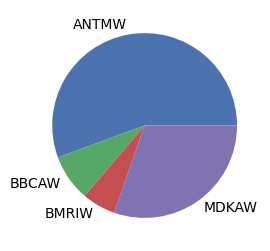

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw1d_call.flatten(), labels = columnw1d_call)
plt.show()

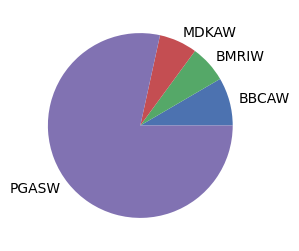

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw1d_put.flatten(), labels = columnw1d_put)
plt.show()

In [ ]:
# Net Asset Value
print (f'Net Asset Value (Call): {np.float(NAVw1d_call)}')
print (f'Net Asset Value (Put): {np.float(NAVw1d_put)}')

Net Asset Value (Call): 82771621.29825856
Net Asset Value (Put): 155878823.4632388


In [ ]:
# Networth if all were sold
print (f'Ending Balance (Call): {np.float(networthw1d_call)}')
print (f'Ending Balance (Put): {np.float(networthw1d_put)}')

Ending Balance (Call): 82565403.29825856
Ending Balance (Put): 155489718.7132388


In [ ]:
monthlyd_call.append(np.float(networthw1d_call))
monthlyd_put.append(np.float(networthw1d_put))
Profit1d = [np.float(networthw1d_call)/monthlyd_call[1]-1, np.float(networthw1d_put)/monthlyd_put[1]-1]
Profit1d = (pd.DataFrame(Profit1d)).T
Profit1d.rename(columns={0:'Binomial call'}, inplace=True)
Profit1d.rename(columns={1:'Binomial put'}, inplace=True)
Profit1d

Binomial call  Binomial put
0      -0.095493      0.414004

### Period 2

#### Price List

In [ ]:
Call_warrant_price2 = pd.read_excel('Data Waran Final.xlsx', sheet_name='Price 2').squeeze('columns')
Call_warrant_price2

Dates  ANTMW  BBCAW  BMRIW  MDKAW  PGASW
0  2023-01-10    175    342    356    274     51
1  2023-01-11    184    330    302    286     45
2  2023-01-12    199    342    342    298     49
3  2023-01-13    206    320    338    298     46
4  2023-01-16    204    322    356    320     45
5  2023-01-17    232    354    422    370     45
6  2023-01-18    222    346    384    346     50
7  2023-01-19    236    344    394    368     51
8  2023-01-20    244    338    456    366     55
9  2023-01-23    244    338    456    366     55
10 2023-01-24    238    322    422    386     50
11 2023-01-25    246    322    396    352     48
12 2023-01-26    240    354    412    352     45
13 2023-01-27    234    392    450    346     46
14 2023-01-30    230    382    428    316     44
15 2023-01-31    240    356    418    328     43
16 2023-02-01    250    344    386    342     44
17 2023-02-02    246    338    384    334     48
18 2023-02-03    242    372    408    310     44
19 2023-02-06    220    376    384    296     41
20 2023-02-07    214    392    436    288     45
21 2023-02-08    212    392    440    308     45
22 2023-02-09    206    394    454    290     46
23 2023-02-10    204    378    456    290     43

In [ ]:
# Binomial return array
Call_return2 = pd.DataFrame(ANTMW_Call_binom_return2)
Call_return2 = Call_return2.rename(columns={0:'ANTMW'})
Call_return2.insert(1,"BBCAW", pd.DataFrame(BBCAW_Call_binom_return2))
Call_return2.insert(2,"BMRIW", pd.DataFrame(BMRIW_Call_binom_return2))
Call_return2.insert(3,"MDKAW", pd.DataFrame(MDKAW_Call_binom_return2))
Call_return2.insert(4,"PGASW", pd.DataFrame(PGASW_Call_binom_return2))
Mean_Call_return2 = [part*np.mean(Call_return2['ANTMW']),
                           part*np.mean(Call_return2['BBCAW']),
                           part*np.mean(Call_return2['BMRIW']),
                           part*np.mean(Call_return2['MDKAW']),
                           part*np.mean(Call_return2['PGASW'])]
Put_return2 = pd.DataFrame(ANTMW_Put_binom_return2)
Put_return2 = Put_return2.rename(columns={0:'ANTMW'})
Put_return2.insert(1,"BBCAW", pd.DataFrame(BBCAW_Put_binom_return2))
Put_return2.insert(2,"BMRIW", pd.DataFrame(BMRIW_Put_binom_return2))
Put_return2.insert(3,"MDKAW", pd.DataFrame(MDKAW_Put_binom_return2))
Put_return2.insert(4,"PGASW", pd.DataFrame(PGASW_Put_binom_return2))
Mean_Put_return2 = [part*np.mean(Put_return2['ANTMW']),
                           part*np.mean(Put_return2['BBCAW']),
                           part*np.mean(Put_return2['BMRIW']),
                           part*np.mean(Put_return2['MDKAW']),
                           part*np.mean(Put_return2['PGASW'])]

In [ ]:
# Call Buy prices and Sell prices
call_buy_price2 = pd.DataFrame(Call_warrant_price2.loc[Call_warrant_price2.index[0]]).T
call_buy_price2 = call_buy_price2.drop(columns=['Dates'])
call_buy_price2 = pd.DataFrame(call_buy_price2,dtype=int)
call_sell_price2 = pd.DataFrame(Call_warrant_price2.loc[Call_warrant_price2.index[len(Call_warrant_price2)-1]]).T
call_sell_price2 = call_sell_price2.drop(columns=['Dates'])
call_sell_price2 = pd.DataFrame(call_sell_price2,dtype=int)

In [ ]:
# Put Buy prices and Sell prices
put_initial = [int(ANTM_Put_Warrant[2]), int(BBCA_Put_Warrant[2]), int(BMRI_Put_Warrant[2]), int(MDKA_Put_Warrant[2]), int(PGAS_Put_Warrant[2])]
put_sell = [int(ANTM_Put_Warrant[3]), int(BBCA_Put_Warrant[3]), int(BMRI_Put_Warrant[3]), int(MDKA_Put_Warrant[3]), int(PGAS_Put_Warrant[3])]
put_buy_price2 = pd.DataFrame(put_initial).T
put_buy_price2 = put_buy_price2.rename({0:'ANTMW', 1:'BBCAW', 2:'BMRIW', 3:'MDKAW', 4:'PGASW'}, axis='columns')
put_buy_price2 = put_buy_price2.loc[put_buy_price2.index[0]]
put_sell_price2 = pd.DataFrame(put_sell).T
put_sell_price2 = put_sell_price2.rename({0:'ANTMW', 1:'BBCAW', 2:'BMRIW', 3:'MDKAW', 4:'PGASW'}, axis='columns')

#### Raw Return Allocation

In [ ]:
# Allocation based on returns
Mean_Call_return2_adj = [max(Mean_Call_return2[i],0) for i in range (len(Mean_Call_return2))]
Mean_Put_return2_adj = [max(Mean_Put_return2[i],0) for i in range (len(Mean_Put_return2))]
Alloc_Raw_call2 = Mean_Call_return2_adj / sum(Mean_Call_return2_adj)
Alloc_Raw_put2 = Mean_Put_return2_adj / sum(Mean_Put_return2_adj)

Alloc_Raw2 = pd.DataFrame(Warrant_list)
Alloc_Raw2 = Alloc_Raw2.rename(columns={0:'Warrant'})
Alloc_Raw2.insert(1,"Call Binomial", Alloc_Raw_call2)
Alloc_Raw2.insert(2,"Put Binomial", Alloc_Raw_put2)
Alloc_Raw2

Warrant  Call Binomial  Put Binomial
0   ANTMW       0.008058      0.577571
1   BBCAW       0.289204      0.002078
2   BMRIW       0.297547      0.001840
3   MDKAW       0.037854      0.418512
4   PGASW       0.367337      0.000000

In [ ]:
Raw_call2_weights = {Warrant_list[0]:Alloc_Raw_call2[0], Warrant_list[1]:Alloc_Raw_call2[1],
                           Warrant_list[2]:Alloc_Raw_call2[2], Warrant_list[3]:Alloc_Raw_call2[3],
                           Warrant_list[4]:Alloc_Raw_call2[4]}

Raw_put2_weights = {Warrant_list[0]:Alloc_Raw_put2[0], Warrant_list[1]:Alloc_Raw_put2[1],
                           Warrant_list[2]:Alloc_Raw_put2[2], Warrant_list[3]:Alloc_Raw_put2[3],
                           Warrant_list[4]:Alloc_Raw_put2[4]}

In [ ]:
call_buy_price2 = call_buy_price2.squeeze()
put_buy_price2 = put_buy_price2.squeeze()
# Allocation for binomial call method
daw2a_call = DiscreteAllocation(Raw_call2_weights, MBU_Warrant*call_buy_price2*(1+buy_fee), total_portfolio_value=np.float(networthw1a_call))
allocationw2a_call, leftoverw2a_call = daw2a_call.greedy_portfolio()
print("Discrete allocation:", allocationw2a_call)
print("Funds remaining: IDR {:.2f}".format(leftoverw2a_call))

# Allocation for binomial put method
daw2a_put = DiscreteAllocation(Raw_put2_weights, MBU_Warrant*put_buy_price2*(1+buy_fee), total_portfolio_value=np.float(networthw1a_put))
allocationw2a_put, leftoverw2a_put = daw2a_put.greedy_portfolio()
print("Discrete allocation:", allocationw2a_put)
print("Funds remaining: IDR {:.2f}".format(leftoverw2a_put))

Discrete allocation: {'PGASW': 4229, 'BMRIW': 491, 'BBCAW': 496, 'MDKAW': 81, 'ANTMW': 27}
Funds remaining: IDR 15590.84
Discrete allocation: {'ANTMW': 12582, 'MDKAW': 2355, 'BBCAW': 5, 'BMRIW': 4}
Funds remaining: IDR 13420.11


In [ ]:
portionw2a_call = (pd.DataFrame.from_dict([allocationw2a_call]).T).sort_index()
columnw2a_call = [(portionw2a_call.T).columns[i] for i in range (len(portionw2a_call))]
portion_moneyw2a_call = (np.array(portionw2a_call)).reshape(-1,1)

portionw2a_put = (pd.DataFrame.from_dict([allocationw2a_put]).T).sort_index()
columnw2a_put = [(portionw2a_put.T).columns[i] for i in range (len(portionw2a_put))]
portion_moneyw2a_put = (np.array(portionw2a_put)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustmentsw_a_name_call = Warrant_list
Adjustmentsw_a_quant_call = []
initialw_a_name_call = np.array(portionw1a_call.index)
endingw_a_name_call = np.array(portionw2a_call.index)
for i in range (len(Adjustmentsw_a_name_call)):
  if Adjustmentsw_a_name_call[i] in endingw_a_name_call:
    index = int((np.where(endingw_a_name_call == Adjustmentsw_a_name_call[i]))[0])
    Adjustmentsw_a_quant_call.append(np.array(portion_moneyw2a_call.flatten())[index])
  else:
    Adjustmentsw_a_quant_call.append(0)
for i in range (len(Adjustmentsw_a_name_call)):
  if Adjustmentsw_a_name_call[i] in initialw_a_name_call:
    index = int((np.where(initialw_a_name_call == Adjustmentsw_a_name_call[i]))[0])
    Adjustmentsw_a_quant_call[i] -= np.array(portion_moneyw1a_call.flatten())[index]

Adjustmentsw_a_name_put = Warrant_list
Adjustmentsw_a_quant_put = []
initialw_a_name_put = np.array(portionw1a_put.index)
endingw_a_name_put = np.array(portionw2a_put.index)
for i in range (len(Adjustmentsw_a_name_put)):
  if Adjustmentsw_a_name_put[i] in endingw_a_name_put:
    index = int((np.where(endingw_a_name_put == Adjustmentsw_a_name_put[i]))[0])
    Adjustmentsw_a_quant_put.append(np.array(portion_moneyw2a_put.flatten())[index])
  else:
    Adjustmentsw_a_quant_put.append(0)
for i in range (len(Adjustmentsw_a_name_put)):
  if Adjustmentsw_a_name_put[i] in initialw_a_name_put:
    index = int((np.where(initialw_a_name_put == Adjustmentsw_a_name_put[i]))[0])
    Adjustmentsw_a_quant_put[i] -= np.array(portion_moneyw1a_put.flatten())[index]

In [ ]:
call_buy_price2 = pd.DataFrame(call_buy_price2).T
put_buy_price2 = pd.DataFrame(put_buy_price2).T

# Balance after selling assets (adjustments)
leftoverw2a_call = leftoverw1a_call
for i in range (len(Adjustmentsw_a_name_call)):
  if Adjustmentsw_a_quant_call[i] < 0:
    leftoverw2a_call -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_a_quant_call[i]*(np.array(call_sell_price1).reshape(-1,1))[i])
  elif Adjustmentsw_a_quant_call[i] > 0:
    leftoverw2a_call -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_a_quant_call[i]*(np.array(call_buy_price2).reshape(-1,1))[i])

leftoverw2a_put = leftoverw1a_put
for i in range (len(Adjustmentsw_a_name_put)):
  if Adjustmentsw_a_quant_put[i] < 0:
    leftoverw2a_put -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_a_quant_put[i]*(np.array(put_sell_price1).reshape(-1,1))[i])
  elif Adjustmentsw_a_quant_put[i] > 0:
    leftoverw2a_put -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_a_quant_put[i]*(np.array(put_buy_price2).reshape(-1,1))[i])

In [ ]:
networthw2a_call, NAVw2a_call = 0.0, 0.0
for i in range (len(columnw2a_call)):
  NAVw2a_call += MBU_Warrant*(np.dot(call_sell_price2[call_sell_price2.columns[call_sell_price2.columns.isin([columnw2a_call[i]])]],portion_moneyw2a_call[i]))
  networthw2a_call += (1-sell_fee)*MBU_Warrant*(np.dot(call_sell_price2[call_sell_price2.columns[call_sell_price2.columns.isin([columnw2a_call[i]])]],portion_moneyw2a_call[i]))
leftoverw2a_call = leftoverw2a_call*(1+ir)**(1/12)
NAVw2a_call += leftoverw2a_call
networthw2a_call += leftoverw2a_call
portw2a_call = pd.DataFrame(portion_moneyw2a_call, columns=['Quantity in MBU'])
portw2a_call.insert(0,'Asset Name',columnw2a_call)
portw2a_call = portw2a_call.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw2a_call}, ignore_index=True)
portw2a_call.index = portw2a_call.index+1

networthw2a_put, NAVw2a_put = 0.0, 0.0
for i in range (len(columnw2a_put)):
  NAVw2a_put += MBU_Warrant*(np.dot(put_sell_price2[put_sell_price2.columns[put_sell_price2.columns.isin([columnw2a_put[i]])]],portion_moneyw2a_put[i]))
  networthw2a_put += (1-sell_fee)*MBU_Warrant*(np.dot(put_sell_price2[put_sell_price2.columns[put_sell_price2.columns.isin([columnw2a_put[i]])]],portion_moneyw2a_put[i]))
leftoverw2a_put = leftoverw2a_put*(1+ir)**(1/12)
NAVw2a_put += leftoverw2a_put
networthw2a_put += leftoverw2a_put
portw2a_put = pd.DataFrame(portion_moneyw2a_put, columns=['Quantity in MBU'])
portw2a_put.insert(0,'Asset Name',columnw2a_put)
portw2a_put = portw2a_put.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw2a_put}, ignore_index=True)
portw2a_put.index = portw2a_put.index+1

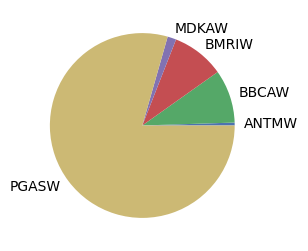

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw2a_call.flatten(), labels = columnw2a_call)
plt.show()

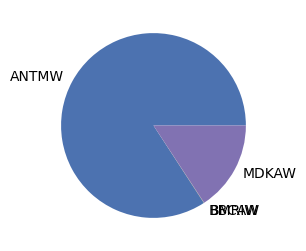

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw2a_put.flatten(), labels = columnw2a_put)
plt.show()

In [ ]:
# Net Asset Value
print (f'Net Asset Value (Call): {np.float(NAVw2a_call)}')
print (f'Net Asset Value (Put): {np.float(NAVw2a_put)}')

Net Asset Value (Call): 62439040.92419367
Net Asset Value (Put): 34109590.682310686


In [ ]:
# Networth if all were sold
print (f'Ending Balance (Call): {np.float(networthw2a_call)}')
print (f'Ending Balance (Put): {np.float(networthw2a_put)}')

Ending Balance (Call): 62283483.67419367
Ending Balance (Put): 34024940.182310686


In [ ]:
monthlya_call.append(np.float(networthw2a_call))
monthlya_put.append(np.float(networthw2a_put))
Profit2a = [np.float(networthw2a_call)/monthlya_call[2]-1, np.float(networthw2a_put)/monthlya_put[2]-1]
Profit2a = (pd.DataFrame(Profit2a)).T
Profit2a.rename(columns={0:'Binomial call'}, inplace=True)
Profit2a.rename(columns={1:'Binomial put'}, inplace=True)
Profit2a

Binomial call  Binomial put
0        0.05913     -0.496945

#### Scaled Return Allocation

In [ ]:
# Scaled mean returns
Mean_Call_return2s = (Mean_Call_return2-min(Mean_Call_return2))/(max(Mean_Call_return2)-min(Mean_Call_return2))
Mean_Put_return2s = (Mean_Put_return2-min(Mean_Put_return2))/(max(Mean_Put_return2)-min(Mean_Put_return2))

# Allocation based on returns
Alloc_Scaled_call2 = Mean_Call_return2s / sum(Mean_Call_return2s)
Alloc_Scaled_put2 = Mean_Put_return2s / sum(Mean_Put_return2s)

Alloc_Scaled2 = pd.DataFrame(Warrant_list)
Alloc_Scaled2 = Alloc_Scaled2.rename(columns={0:'Warrant'})
Alloc_Scaled2.insert(1,"Call Binomial", Alloc_Scaled_call2)
Alloc_Scaled2.insert(2,"Put Binomial", Alloc_Scaled_put2)
Alloc_Scaled2

Warrant  Call Binomial  Put Binomial
0   ANTMW       0.000000      0.576438
1   BBCAW       0.292949      0.002935
2   BMRIW       0.301642      0.002697
3   MDKAW       0.031046      0.417929
4   PGASW       0.374362      0.000000

In [ ]:
Scaled_call2_weights = {Warrant_list[0]:Alloc_Scaled_call2[0], Warrant_list[1]:Alloc_Scaled_call2[1],
                           Warrant_list[2]:Alloc_Scaled_call2[2], Warrant_list[3]:Alloc_Scaled_call2[3],
                           Warrant_list[4]:Alloc_Scaled_call2[4]}

Scaled_put2_weights = {Warrant_list[0]:Alloc_Scaled_put2[0], Warrant_list[1]:Alloc_Scaled_put2[1],
                           Warrant_list[2]:Alloc_Scaled_put2[2], Warrant_list[3]:Alloc_Scaled_put2[3],
                           Warrant_list[4]:Alloc_Scaled_put2[4]}

In [ ]:
call_buy_price2 = call_buy_price2.squeeze()
put_buy_price2 = put_buy_price2.squeeze()
# Allocation for binomial call method
daw2b_call = DiscreteAllocation(Scaled_call2_weights, MBU_Warrant*call_buy_price2*(1+buy_fee), total_portfolio_value=np.float(networthw1b_call))
allocationw2b_call, leftoverw2b_call = daw2b_call.greedy_portfolio()
print("Discrete allocation:", allocationw2b_call)
print("Funds remaining: IDR {:.2f}".format(leftoverw2b_call))

# Allocation for binomial put method
daw2b_put = DiscreteAllocation(Scaled_put2_weights, MBU_Warrant*put_buy_price2*(1+buy_fee), total_portfolio_value=np.float(networthw1b_put))
allocationw2b_put, leftoverw2b_put = daw2b_put.greedy_portfolio()
print("Discrete allocation:", allocationw2b_put)
print("Funds remaining: IDR {:.2f}".format(leftoverw2b_put))

Discrete allocation: {'PGASW': 4185, 'BMRIW': 483, 'BBCAW': 488, 'MDKAW': 65}
Funds remaining: IDR 2943.02
Discrete allocation: {'ANTMW': 12242, 'MDKAW': 2293, 'BBCAW': 8, 'BMRIW': 5}
Funds remaining: IDR 3987.38


In [ ]:
portionw2b_call = (pd.DataFrame.from_dict([allocationw2b_call]).T).sort_index()
columnw2b_call = [(portionw2b_call.T).columns[i] for i in range (len(portionw2b_call))]
portion_moneyw2b_call = (np.array(portionw2b_call)).reshape(-1,1)

portionw2b_put = (pd.DataFrame.from_dict([allocationw2b_put]).T).sort_index()
columnw2b_put = [(portionw2b_put.T).columns[i] for i in range (len(portionw2b_put))]
portion_moneyw2b_put = (np.array(portionw2b_put)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustmentsw_b_name_call = Warrant_list
Adjustmentsw_b_quant_call = []
initialw_b_name_call = np.array(portionw1b_call.index)
endingw_b_name_call = np.array(portionw2b_call.index)
for i in range (len(Adjustmentsw_b_name_call)):
  if Adjustmentsw_b_name_call[i] in endingw_b_name_call:
    index = int((np.where(endingw_b_name_call == Adjustmentsw_b_name_call[i]))[0])
    Adjustmentsw_b_quant_call.append(np.array(portion_moneyw2b_call.flatten())[index])
  else:
    Adjustmentsw_b_quant_call.append(0)
for i in range (len(Adjustmentsw_b_name_call)):
  if Adjustmentsw_b_name_call[i] in initialw_b_name_call:
    index = int((np.where(initialw_b_name_call == Adjustmentsw_b_name_call[i]))[0])
    Adjustmentsw_b_quant_call[i] -= np.array(portion_moneyw1b_call.flatten())[index]

Adjustmentsw_b_name_put = Warrant_list
Adjustmentsw_b_quant_put = []
initialw_b_name_put = np.array(portionw1b_put.index)
endingw_b_name_put = np.array(portionw2b_put.index)
for i in range (len(Adjustmentsw_b_name_put)):
  if Adjustmentsw_b_name_put[i] in endingw_b_name_put:
    index = int((np.where(endingw_b_name_put == Adjustmentsw_b_name_put[i]))[0])
    Adjustmentsw_b_quant_put.append(np.array(portion_moneyw2b_put.flatten())[index])
  else:
    Adjustmentsw_b_quant_put.append(0)
for i in range (len(Adjustmentsw_b_name_put)):
  if Adjustmentsw_b_name_put[i] in initialw_b_name_put:
    index = int((np.where(initialw_b_name_put == Adjustmentsw_b_name_put[i]))[0])
    Adjustmentsw_b_quant_put[i] -= np.array(portion_moneyw1b_put.flatten())[index]

In [ ]:
call_buy_price2 = pd.DataFrame(call_buy_price2).T
put_buy_price2 = pd.DataFrame(put_buy_price2).T

# Balance after selling assets (adjustments)
leftoverw2b_call = leftoverw1b_call
for i in range (len(Adjustmentsw_b_name_call)):
  if Adjustmentsw_b_quant_call[i] < 0:
    leftoverw2b_call -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_b_quant_call[i]*(np.array(call_sell_price1).reshape(-1,1))[i])
  elif Adjustmentsw_b_quant_call[i] > 0:
    leftoverw2b_call -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_b_quant_call[i]*(np.array(call_buy_price2).reshape(-1,1))[i])

leftoverw2b_put = leftoverw1b_put
for i in range (len(Adjustmentsw_b_name_put)):
  if Adjustmentsw_b_quant_put[i] < 0:
    leftoverw2b_put -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_b_quant_put[i]*(np.array(put_sell_price1).reshape(-1,1))[i])
  elif Adjustmentsw_b_quant_put[i] > 0:
    leftoverw2b_put -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_b_quant_put[i]*(np.array(put_buy_price2).reshape(-1,1))[i])

In [ ]:
portion_moneyw2b_call = (np.array(portion_moneyw2b_call)).reshape(-1,1)
networthw2b_call, NAVw2b_call = 0.0, 0.0
for i in range (len(columnw2b_call)):
  NAVw2b_call += MBU_Warrant*(np.dot(call_sell_price2[call_sell_price2.columns[call_sell_price2.columns.isin([columnw2b_call[i]])]],portion_moneyw2b_call[i]))
  networthw2b_call += (1-sell_fee)*MBU_Warrant*(np.dot(call_sell_price2[call_sell_price2.columns[call_sell_price2.columns.isin([columnw2b_call[i]])]],portion_moneyw2b_call[i]))
leftoverw2b_call = leftoverw2b_call*(1+ir)**(1/12)
NAVw2b_call += leftoverw2b_call
networthw2b_call += leftoverw2b_call
portw2b_call = pd.DataFrame(portion_moneyw2b_call, columns=['Quantity in MBU'])
portw2b_call.insert(0,'Asset Name',columnw2b_call)
portw2b_call = portw2b_call.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw2b_call}, ignore_index=True)
portw2b_call.index = portw2b_call.index+1

portion_moneyw2b_put = (np.array(portion_moneyw2b_put)).reshape(-1,1)
networthw2b_put, NAVw2b_put = 0.0, 0.0
for i in range (len(columnw2b_put)):
  NAVw2b_put += MBU_Warrant*(np.dot(put_sell_price2[put_sell_price2.columns[put_sell_price2.columns.isin([columnw2b_put[i]])]],portion_moneyw2b_put[i]))
  networthw2b_put += (1-sell_fee)*MBU_Warrant*(np.dot(put_sell_price2[put_sell_price2.columns[put_sell_price2.columns.isin([columnw2b_put[i]])]],portion_moneyw2b_put[i]))
leftoverw2b_put = leftoverw2b_put*(1+ir)**(1/12)
NAVw2b_put += leftoverw2b_put
networthw2b_put += leftoverw2b_put
portw2b_put = pd.DataFrame(portion_moneyw2b_put, columns=['Quantity in MBU'])
portw2b_put.insert(0,'Asset Name',columnw2b_put)
portw2b_put = portw2b_put.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw2b_put}, ignore_index=True)
portw2b_put.index = portw2b_put.index+1

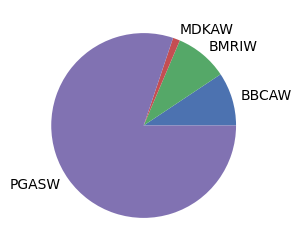

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw2b_call.flatten(), labels = columnw2b_call)
plt.show()

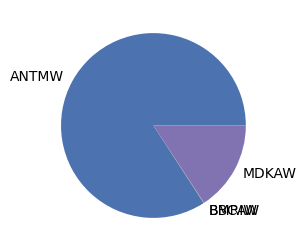

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw2b_put.flatten(), labels = columnw2b_put)
plt.show()

In [ ]:
# Net Asset Value
print (f'Net Asset Value (Call): {np.float(NAVw2b_call)}')
print (f'Net Asset Value (Put): {np.float(NAVw2b_put)}')

Net Asset Value (Call): 60552263.869645685
Net Asset Value (Put): 33265758.649855964


In [ ]:
# Networth if all were sold
print (f'Ending Balance (Call): {np.float(networthw2b_call)}')
print (f'Ending Balance (Put): {np.float(networthw2b_put)}')

Ending Balance (Call): 60401384.619645685
Ending Balance (Put): 33183189.149855964


In [ ]:
monthlyb_call.append(np.float(networthw2b_call))
monthlyb_put.append(np.float(networthw2b_put))
Profit2b = [np.float(networthw2b_call)/monthlyb_call[2]-1, np.float(networthw2b_put)/monthlyb_put[2]-1]
Profit2b = (pd.DataFrame(Profit2b)).T
Profit2b.rename(columns={0:'Binomial call'}, inplace=True)
Profit2b.rename(columns={1:'Binomial put'}, inplace=True)
Profit2b

Binomial call  Binomial put
0       0.057867     -0.496731

#### Uniform Allocation

In [ ]:
# Uniform allocation
Alloc_Uniform_call2 = [0.2, 0.2, 0.2, 0.2, 0.2]
Alloc_Uniform_put2 = [0.2, 0.2, 0.2, 0.2, 0.2]

Alloc_Uniform2 = pd.DataFrame(Warrant_list)
Alloc_Uniform2 = Alloc_Uniform2.rename(columns={0:'Warrant'})
Alloc_Uniform2.insert(1, "Call", Alloc_Uniform_call2)
Alloc_Uniform2.insert(2, "Put", Alloc_Uniform_put2)

Alloc_Uniform2

Warrant  Call  Put
0   ANTMW   0.2  0.2
1   BBCAW   0.2  0.2
2   BMRIW   0.2  0.2
3   MDKAW   0.2  0.2
4   PGASW   0.2  0.2

In [ ]:
Uniform2_call_weights = {Warrant_list[0]:Alloc_Uniform_call2[0], Warrant_list[1]:Alloc_Uniform_call2[1],
                           Warrant_list[2]:Alloc_Uniform_call2[2], Warrant_list[3]:Alloc_Uniform_call2[3],
                           Warrant_list[4]:Alloc_Uniform_call2[4]}

Uniform2_put_weights = {Warrant_list[0]:Alloc_Uniform_put2[0], Warrant_list[1]:Alloc_Uniform_put2[1],
                           Warrant_list[2]:Alloc_Uniform_put2[2], Warrant_list[3]:Alloc_Uniform_put2[3],
                           Warrant_list[4]:Alloc_Uniform_put2[4]}

In [ ]:
call_buy_price2 = call_buy_price2.squeeze()
put_buy_price2 = put_buy_price2.squeeze()
# Allocation for binomial call method
daw2c_call = DiscreteAllocation(Uniform2_call_weights, MBU_Warrant*call_buy_price2*(1+buy_fee), total_portfolio_value=np.float(networthw1c_call))
allocationw2c_call, leftoverw2c_call = daw2c_call.greedy_portfolio()
print("Discrete allocation:", allocationw2c_call)
print("Funds remaining: IDR {:.2f}".format(leftoverw2c_call))

# Allocation for binomial put method
daw2c_put = DiscreteAllocation(Uniform2_put_weights, MBU_Warrant*put_buy_price2*(1+buy_fee), total_portfolio_value=np.float(networthw1c_put))
allocationw2c_put, leftoverw2c_put = daw2c_put.greedy_portfolio()
print("Discrete allocation:", allocationw2c_put)
print("Funds remaining: IDR {:.2f}".format(leftoverw2c_put))

Discrete allocation: {'ANTMW': 777, 'BBCAW': 397, 'BMRIW': 382, 'MDKAW': 496, 'PGASW': 2665}
Funds remaining: IDR 813.34
Discrete allocation: {'ANTMW': 6886, 'BBCAW': 844, 'BMRIW': 651, 'MDKAW': 1778, 'PGASW': 1735}
Funds remaining: IDR 8728.98


In [ ]:
portionw2c_call = (pd.DataFrame.from_dict([allocationw2c_call]).T).sort_index()
columnw2c_call = [(portionw2c_call.T).columns[i] for i in range (len(portionw2c_call))]
portion_moneyw2c_call = (np.array(portionw2c_call)).reshape(-1,1)

portionw2c_put = (pd.DataFrame.from_dict([allocationw2c_put]).T).sort_index()
columnw2c_put = [(portionw2c_put.T).columns[i] for i in range (len(portionw2c_put))]
portion_moneyw2c_put = (np.array(portionw2c_put)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustmentsw_c_name_call = Warrant_list
Adjustmentsw_c_quant_call = []
initialw_c_name_call = np.array(portionw1c_call.index)
endingw_c_name_call = np.array(portionw2c_call.index)
for i in range (len(Adjustmentsw_c_name_call)):
  if Adjustmentsw_c_name_call[i] in endingw_c_name_call:
    index = int((np.where(endingw_c_name_call == Adjustmentsw_c_name_call[i]))[0])
    Adjustmentsw_c_quant_call.append(np.array(portion_moneyw2c_call.flatten())[index])
  else:
    Adjustmentsw_c_quant_call.append(0)
for i in range (len(Adjustmentsw_c_name_call)):
  if Adjustmentsw_c_name_call[i] in initialw_c_name_call:
    index = int((np.where(initialw_c_name_call == Adjustmentsw_c_name_call[i]))[0])
    Adjustmentsw_c_quant_call[i] -= np.array(portion_moneyw1c_call.flatten())[index]

Adjustmentsw_c_name_put = Warrant_list
Adjustmentsw_c_quant_put = []
initialw_c_name_put = np.array(portionw1c_put.index)
endingw_c_name_put = np.array(portionw2c_put.index)
for i in range (len(Adjustmentsw_c_name_put)):
  if Adjustmentsw_c_name_put[i] in endingw_c_name_put:
    index = int((np.where(endingw_c_name_put == Adjustmentsw_c_name_put[i]))[0])
    Adjustmentsw_c_quant_put.append(np.array(portion_moneyw2c_put.flatten())[index])
  else:
    Adjustmentsw_c_quant_put.append(0)
for i in range (len(Adjustmentsw_c_name_put)):
  if Adjustmentsw_c_name_put[i] in initialw_c_name_put:
    index = int((np.where(initialw_c_name_put == Adjustmentsw_c_name_put[i]))[0])
    Adjustmentsw_c_quant_put[i] -= np.array(portion_moneyw1c_put.flatten())[index]

In [ ]:
call_buy_price2 = pd.DataFrame(call_buy_price2).T
put_buy_price2 = pd.DataFrame(put_buy_price2).T

# Balance after selling assets (adjustments)
leftoverw2c_call = leftoverw1c_call
for i in range (len(Adjustmentsw_c_name_call)):
  if Adjustmentsw_c_quant_call[i] < 0:
    leftoverw2c_call -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_c_quant_call[i]*(np.array(call_sell_price1).reshape(-1,1))[i])
  elif Adjustmentsw_c_quant_call[i] > 0:
    leftoverw2c_call -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_c_quant_call[i]*(np.array(call_buy_price2).reshape(-1,1))[i])

leftoverw2c_put = leftoverw1c_put
for i in range (len(Adjustmentsw_c_name_put)):
  if Adjustmentsw_c_quant_put[i] < 0:
    leftoverw2c_put -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_c_quant_put[i]*(np.array(put_sell_price1).reshape(-1,1))[i])
  elif Adjustmentsw_c_quant_put[i] > 0:
    leftoverw2c_put -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_c_quant_put[i]*(np.array(put_buy_price2).reshape(-1,1))[i])

In [ ]:
networthw2c_call, NAVw2c_call = 0.0, 0.0
for i in range (len(columnw2c_call)):
  NAVw2c_call += MBU_Warrant*(np.dot(call_sell_price2[call_sell_price2.columns[call_sell_price2.columns.isin([columnw2c_call[i]])]],portion_moneyw2c_call[i]))
  networthw2c_call += (1-sell_fee)*MBU_Warrant*(np.dot(call_sell_price2[call_sell_price2.columns[call_sell_price2.columns.isin([columnw2c_call[i]])]],portion_moneyw2c_call[i]))
leftoverw2c_call = leftoverw2c_call*(1+ir)**(1/12)
NAVw2c_call += leftoverw2c_call
networthw2c_call += leftoverw2c_call
portw2c_call = pd.DataFrame(portion_moneyw2c_call, columns=['Quantity in MBU'])
portw2c_call.insert(0,'Asset Name',columnw2c_call)
portw2c_call = portw2c_call.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw2c_call}, ignore_index=True)
portw2c_call.index = portw2c_call.index+1

networthw2c_put, NAVw2c_put = 0.0, 0.0
for i in range (len(columnw2c_put)):
  NAVw2c_put += MBU_Warrant*(np.dot(put_sell_price2[put_sell_price2.columns[put_sell_price2.columns.isin([columnw2c_put[i]])]],portion_moneyw2c_put[i]))
  networthw2c_put += (1-sell_fee)*MBU_Warrant*(np.dot(put_sell_price2[put_sell_price2.columns[put_sell_price2.columns.isin([columnw2c_put[i]])]],portion_moneyw2c_put[i]))
leftoverw2c_put = leftoverw2c_put*(1+ir)**(1/12)
NAVw2c_put += leftoverw2c_put
networthw2c_put += leftoverw2c_put
portw2c_put = pd.DataFrame(portion_moneyw2c_put, columns=['Quantity in MBU'])
portw2c_put.insert(0,'Asset Name',columnw2c_put)
portw2c_put = portw2c_put.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw2c_put}, ignore_index=True)
portw2c_put.index = portw2c_put.index+1

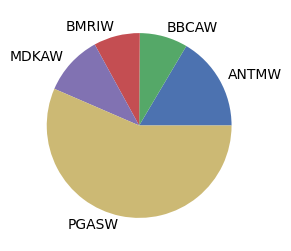

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw2c_call.flatten(), labels = columnw2c_call)
plt.show()

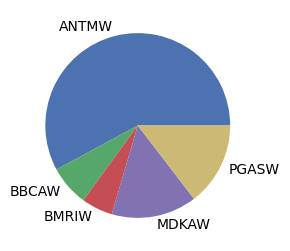

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw2c_put.flatten(), labels = columnw2c_put)
plt.show()

In [ ]:
# Net Asset Value
print (f'Net Asset Value (Call): {np.float(NAVw2c_call)}')
print (f'Net Asset Value (Put): {np.float(NAVw2c_put)}')

Net Asset Value (Call): 74361220.13290991
Net Asset Value (Put): 66261009.326177344


In [ ]:
# Networth if all were sold
print (f'Ending Balance (Call): {np.float(networthw2c_call)}')
print (f'Ending Balance (Put): {np.float(networthw2c_put)}')

Ending Balance (Call): 74175919.88290991
Ending Balance (Put): 66096298.826177344


In [ ]:
monthlyc_call.append(np.float(networthw2c_call))
monthlyc_put.append(np.float(networthw2c_put))
Profit2c = [np.float(networthw2c_call)/monthlyc_call[2]-1, np.float(networthw2c_put)/monthlyc_put[2]-1]
Profit2c = (pd.DataFrame(Profit2c)).T
Profit2c.rename(columns={0:'Binomial call'}, inplace=True)
Profit2c.rename(columns={1:'Binomial put'}, inplace=True)
Profit2c

Binomial call  Binomial put
0       0.089881     -0.381688

#### Price Ratio Allocation

In [ ]:
# Allocation based on fair prices ratios
fair_ratios_call2 = call_sell_price2/np.array(call_buy_price2)
fair_ratios_put2 = put_sell_price2/np.array(put_buy_price2)
max_call2 = max(np.array(fair_ratios_call2).flatten())
min_call2 = min(np.array(fair_ratios_call2).flatten())
max_put2 = max(np.array(fair_ratios_put2).flatten())
min_put2 = min(np.array(fair_ratios_put2).flatten())
fair_ratios_call2s = (fair_ratios_call2-min_call2)/(max_call2-min_call2)
fair_ratios_put2s  = (fair_ratios_put2-min_put2)/(max_put2-min_put2)

# Allocation
Alloc_Fair_call2 = np.array(fair_ratios_call2s/sum(np.array(fair_ratios_call2s).flatten())).flatten()
Alloc_Fair_put2 = np.array(fair_ratios_put2s/sum(np.array(fair_ratios_put2s).flatten())).flatten()

Alloc_Fair2 = pd.DataFrame(Warrant_list)
Alloc_Fair2 = Alloc_Fair2.rename(columns={0:'Warrant'})
Alloc_Fair2.insert(1,"Call Binomial", Alloc_Fair_call2)
Alloc_Fair2.insert(2,"Put Binomial", Alloc_Fair_put2)
Alloc_Fair2

Warrant  Call Binomial  Put Binomial
0   ANTMW       0.260622      0.000000
1   BBCAW       0.211781      0.175340
2   BMRIW       0.353683      0.211969
3   MDKAW       0.173914      0.235629
4   PGASW       0.000000      0.377062

In [ ]:
Fair_call2_weights = {Warrant_list[0]:Alloc_Fair_call2[0], Warrant_list[1]:Alloc_Fair_call2[1],
                           Warrant_list[2]:Alloc_Fair_call2[2], Warrant_list[3]:Alloc_Fair_call2[3],
                           Warrant_list[4]:Alloc_Fair_call2[4]}

Fair_put2_weights = {Warrant_list[0]:Alloc_Fair_put2[0], Warrant_list[1]:Alloc_Fair_put2[1],
                           Warrant_list[2]:Alloc_Fair_put2[2], Warrant_list[3]:Alloc_Fair_put2[3],
                           Warrant_list[4]:Alloc_Fair_put2[4]}

In [ ]:
call_buy_price2 = call_buy_price2.squeeze()
put_buy_price2 = put_buy_price2.squeeze()
# Allocation for binomial call method
daw2d_call = DiscreteAllocation(Fair_call2_weights, MBU_Warrant*call_buy_price2*(1+buy_fee), total_portfolio_value=np.float(networthw1d_call))
allocationw2d_call, leftoverw2d_call = daw2d_call.greedy_portfolio()
print("Discrete allocation:", allocationw2d_call)
print("Funds remaining: IDR {:.2f}".format(leftoverw2d_call))

# Allocation for binomial put method
daw2d_put = DiscreteAllocation(Fair_put2_weights, MBU_Warrant*put_buy_price2*(1+buy_fee), total_portfolio_value=np.float(networthw1d_put))
allocationw2d_put, leftoverw2d_put = daw2d_put.greedy_portfolio()
print("Discrete allocation:", allocationw2d_put)
print("Funds remaining: IDR {:.2f}".format(leftoverw2d_put))

Discrete allocation: {'BMRIW': 819, 'ANTMW': 1227, 'BBCAW': 511, 'MDKAW': 523}
Funds remaining: IDR 6450.35
Discrete allocation: {'PGASW': 4759, 'MDKAW': 3049, 'BMRIW': 1003, 'BBCAW': 1076}
Funds remaining: IDR 11951.36


In [ ]:
portionw2d_call = (pd.DataFrame.from_dict([allocationw2d_call]).T).sort_index()
columnw2d_call = [(portionw2d_call.T).columns[i] for i in range (len(portionw2d_call))]
portion_moneyw2d_call = (np.array(portionw2d_call)).reshape(-1,1)

portionw2d_put = (pd.DataFrame.from_dict([allocationw2d_put]).T).sort_index()
columnw2d_put = [(portionw2d_put.T).columns[i] for i in range (len(portionw2d_put))]
portion_moneyw2d_put = (np.array(portionw2d_put)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustmentsw_d_name_call = Warrant_list
Adjustmentsw_d_quant_call = []
initialw_d_name_call = np.array(portionw1d_call.index)
endingw_d_name_call = np.array(portionw2d_call.index)
for i in range (len(Adjustmentsw_d_name_call)):
  if Adjustmentsw_d_name_call[i] in endingw_d_name_call:
    index = int((np.where(endingw_d_name_call == Adjustmentsw_d_name_call[i]))[0])
    Adjustmentsw_d_quant_call.append(np.array(portion_moneyw2d_call.flatten())[index])
  else:
    Adjustmentsw_d_quant_call.append(0)
for i in range (len(Adjustmentsw_d_name_call)):
  if Adjustmentsw_d_name_call[i] in initialw_d_name_call:
    index = int((np.where(initialw_d_name_call == Adjustmentsw_d_name_call[i]))[0])
    Adjustmentsw_d_quant_call[i] -= np.array(portion_moneyw1d_call.flatten())[index]

Adjustmentsw_d_name_put = Warrant_list
Adjustmentsw_d_quant_put = []
initialw_d_name_put = np.array(portionw1d_put.index)
endingw_d_name_put = np.array(portionw2d_put.index)
for i in range (len(Adjustmentsw_d_name_put)):
  if Adjustmentsw_d_name_put[i] in endingw_d_name_put:
    index = int((np.where(endingw_d_name_put == Adjustmentsw_d_name_put[i]))[0])
    Adjustmentsw_d_quant_put.append(np.array(portion_moneyw2d_put.flatten())[index])
  else:
    Adjustmentsw_d_quant_put.append(0)
for i in range (len(Adjustmentsw_d_name_put)):
  if Adjustmentsw_d_name_put[i] in initialw_d_name_put:
    index = int((np.where(initialw_d_name_put == Adjustmentsw_d_name_put[i]))[0])
    Adjustmentsw_d_quant_put[i] -= np.array(portion_moneyw1d_put.flatten())[index]

In [ ]:
call_buy_price2 = pd.DataFrame(call_buy_price2).T
put_buy_price2 = pd.DataFrame(put_buy_price2).T

# Balance after selling assets (adjustments)
leftoverw2d_call = leftoverw1d_call
for i in range (len(Adjustmentsw_d_name_call)):
  if Adjustmentsw_d_quant_call[i] < 0:
    leftoverw2d_call -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_d_quant_call[i]*(np.array(call_sell_price1).reshape(-1,1))[i])
  elif Adjustmentsw_d_quant_call[i] > 0:
    leftoverw2d_call -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_d_quant_call[i]*(np.array(call_buy_price2).reshape(-1,1))[i])

leftoverw2d_put = leftoverw1d_put
for i in range (len(Adjustmentsw_d_name_put)):
  if Adjustmentsw_d_quant_put[i] < 0:
    leftoverw2d_put -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_d_quant_put[i]*(np.array(put_sell_price1).reshape(-1,1))[i])
  elif Adjustmentsw_d_quant_put[i] > 0:
    leftoverw2d_put -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_d_quant_put[i]*(np.array(put_buy_price2).reshape(-1,1))[i])

In [ ]:
portion_moneyw2d_call = (np.array(portion_moneyw2d_call)).reshape(-1,1)
networthw2d_call, NAVw2d_call = 0.0, 0.0
for i in range (len(columnw2d_call)):
  NAVw2d_call += MBU_Warrant*(np.dot(call_sell_price2[call_sell_price2.columns[call_sell_price2.columns.isin([columnw2d_call[i]])]],portion_moneyw2d_call[i]))
  networthw2d_call += (1-sell_fee)*MBU_Warrant*(np.dot(call_sell_price2[call_sell_price2.columns[call_sell_price2.columns.isin([columnw2d_call[i]])]],portion_moneyw2d_call[i]))
leftoverw2d_call = leftoverw2d_call*(1+ir)**(1/12)
NAVw2d_call += leftoverw2d_call
networthw2d_call += leftoverw2d_call
portw2d_call = pd.DataFrame(portion_moneyw2d_call, columns=['Quantity in MBU'])
portw2d_call.insert(0,'Asset Name',columnw2d_call)
portw2d_call = portw2d_call.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw2d_call}, ignore_index=True)
portw2d_call.index = portw2d_call.index+1

portion_moneyw2d_put = (np.array(portion_moneyw2d_put)).reshape(-1,1)
networthw2d_put, NAVw2d_put = 0.0, 0.0
for i in range (len(columnw2d_put)):
  NAVw2d_put += MBU_Warrant*(np.dot(put_sell_price2[put_sell_price2.columns[put_sell_price2.columns.isin([columnw2d_put[i]])]],portion_moneyw2d_put[i]))
  networthw2d_put += (1-sell_fee)*MBU_Warrant*(np.dot(put_sell_price2[put_sell_price2.columns[put_sell_price2.columns.isin([columnw2d_put[i]])]],portion_moneyw2d_put[i]))
leftoverw2d_put = leftoverw2d_put*(1+ir)**(1/12)
NAVw2d_put += leftoverw2d_put
networthw2d_put += leftoverw2d_put
portw2d_put = pd.DataFrame(portion_moneyw2d_put, columns=['Quantity in MBU'])
portw2d_put.insert(0,'Asset Name',columnw2d_put)
portw2d_put = portw2d_put.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw2d_put}, ignore_index=True)
portw2d_put.index = portw2d_put.index+1

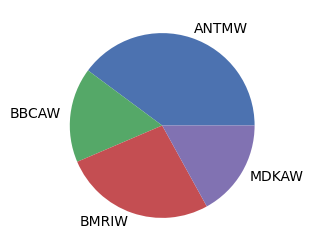

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw2d_call.flatten(), labels = columnw2d_call)
plt.show()

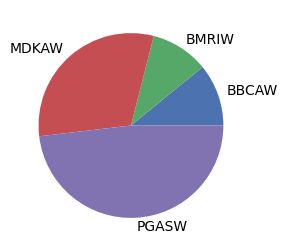

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw2d_put.flatten(), labels = columnw2d_put)
plt.show()

In [ ]:
# Net Asset Value
print (f'Net Asset Value (Call): {np.float(NAVw2d_call)}')
print (f'Net Asset Value (Put): {np.float(NAVw2d_put)}')

Net Asset Value (Call): 97080646.7312035
Net Asset Value (Put): 109409358.03250092


In [ ]:
# Networth if all were sold
print (f'Ending Balance (Call): {np.float(networthw2d_call)}')
print (f'Ending Balance (Put): {np.float(networthw2d_put)}')

Ending Balance (Call): 96838496.7312035
Ending Balance (Put): 109136989.28250092


In [ ]:
monthlyd_call.append(np.float(networthw2d_call))
monthlyd_put.append(np.float(networthw2d_put))
Profit2d = [np.float(networthw2d_call)/monthlyd_call[2]-1, np.float(networthw2d_put)/monthlyd_put[2]-1]
Profit2d = (pd.DataFrame(Profit2d)).T
Profit2d.rename(columns={0:'Binomial call'}, inplace=True)
Profit2d.rename(columns={1:'Binomial put'}, inplace=True)
Profit2d

Binomial call  Binomial put
0        0.17287     -0.298108

### Period 3

#### Price List

In [ ]:
Call_warrant_price3 = pd.read_excel('Data Waran Final.xlsx', sheet_name='Price 3').squeeze('columns')
Call_warrant_price3

Dates  ANTMW  BBCAW  BMRIW  MDKAW  PGASW
0  2023-02-10    204    378    456    290     43
1  2023-02-13    208    384    458    298     45
2  2023-02-14    202    388    464    280     44
3  2023-02-15    196    370    430    296     42
4  2023-02-16    175    358    412    304     39
5  2023-02-17    167    354    422    304     39
6  2023-02-20    180    340    424    302     37
7  2023-02-21    163    344    406    310     34
8  2023-02-22    156    332    368    278     33
9  2023-02-23    153    336    378    212     30
10 2023-02-24    143    334    380    208     30
11 2023-02-27    145    320    378    230     27
12 2023-02-28    136    314    350    236     31
13 2023-03-01    136    304    372    264     29
14 2023-03-02    137    302    378    242     34
15 2023-03-03    135    282    348    218     32
16 2023-03-06    126    256    348    214     33
17 2023-03-07    119    250    364    186     27
18 2023-03-08    107    266    372    149     24
19 2023-03-09    105    270    400    163     27
20 2023-03-10    105    250    378    146     25

In [ ]:
# Binomial return array
Call_return3 = pd.DataFrame(ANTMW_Call_binom_return3)
Call_return3 = Call_return3.rename(columns={0:'ANTMW'})
Call_return3.insert(1,"BBCAW", pd.DataFrame(BBCAW_Call_binom_return3))
Call_return3.insert(2,"BMRIW", pd.DataFrame(BMRIW_Call_binom_return3))
Call_return3.insert(3,"MDKAW", pd.DataFrame(MDKAW_Call_binom_return3))
Call_return3.insert(4,"PGASW", pd.DataFrame(PGASW_Call_binom_return3))
Mean_Call_return3 = [part*np.mean(Call_return3['ANTMW']),
                           part*np.mean(Call_return3['BBCAW']),
                           part*np.mean(Call_return3['BMRIW']),
                           part*np.mean(Call_return3['MDKAW']),
                           part*np.mean(Call_return3['PGASW'])]
Put_return3 = pd.DataFrame(ANTMW_Put_binom_return3)
Put_return3 = Put_return3.rename(columns={0:'ANTMW'})
Put_return3.insert(1,"BBCAW", pd.DataFrame(BBCAW_Put_binom_return3))
Put_return3.insert(2,"BMRIW", pd.DataFrame(BMRIW_Put_binom_return3))
Put_return3.insert(3,"MDKAW", pd.DataFrame(MDKAW_Put_binom_return3))
Put_return3.insert(4,"PGASW", pd.DataFrame(PGASW_Put_binom_return3))
Mean_Put_return3 = [part*np.mean(Put_return3['ANTMW']),
                           part*np.mean(Put_return3['BBCAW']),
                           part*np.mean(Put_return3['BMRIW']),
                           part*np.mean(Put_return3['MDKAW']),
                           part*np.mean(Put_return3['PGASW'])]

In [ ]:
# Call Buy prices and Sell prices
call_buy_price3 = pd.DataFrame(Call_warrant_price3.loc[Call_warrant_price3.index[0]]).T
call_buy_price3 = call_buy_price3.drop(columns=['Dates'])
call_buy_price3 = pd.DataFrame(call_buy_price3,dtype=int)
call_sell_price3 = pd.DataFrame(Call_warrant_price3.loc[Call_warrant_price3.index[len(Call_warrant_price3)-1]]).T
call_sell_price3 = call_sell_price3.drop(columns=['Dates'])
call_sell_price3 = pd.DataFrame(call_sell_price3,dtype=int)

In [ ]:
# Put Buy prices and Sell prices
put_initial = [int(ANTM_Put_Warrant[3]), int(BBCA_Put_Warrant[3]), int(BMRI_Put_Warrant[3]), int(MDKA_Put_Warrant[3]), int(PGAS_Put_Warrant[3])]
put_sell = [int(ANTM_Put_Warrant[4]), int(BBCA_Put_Warrant[4]), int(BMRI_Put_Warrant[4]), int(MDKA_Put_Warrant[4]), int(PGAS_Put_Warrant[4])]
put_buy_price3 = pd.DataFrame(put_initial).T
put_buy_price3 = put_buy_price3.rename({0:'ANTMW', 1:'BBCAW', 2:'BMRIW', 3:'MDKAW', 4:'PGASW'}, axis='columns')
put_buy_price3 = put_buy_price3.loc[put_buy_price3.index[0]]
put_sell_price3 = pd.DataFrame(put_sell).T
put_sell_price3 = put_sell_price3.rename({0:'ANTMW', 1:'BBCAW', 2:'BMRIW', 3:'MDKAW', 4:'PGASW'}, axis='columns')

#### Raw Return Allocation

In [ ]:
# Allocation based on returns
Mean_Call_return3_adj = [max(Mean_Call_return3[i],0) for i in range (len(Mean_Call_return3))]
Mean_Put_return3_adj = [max(Mean_Put_return3[i],0) for i in range (len(Mean_Put_return3))]
Alloc_Raw_call3 = Mean_Call_return3_adj / sum(Mean_Call_return3_adj)
Alloc_Raw_put3 = Mean_Put_return3_adj / sum(Mean_Put_return3_adj)

Alloc_Raw3 = pd.DataFrame(Warrant_list)
Alloc_Raw3 = Alloc_Raw3.rename(columns={0:'Warrant'})
Alloc_Raw3.insert(1,"Call Binomial", Alloc_Raw_call3)
Alloc_Raw3.insert(2,"Put Binomial", Alloc_Raw_put3)
Alloc_Raw3

Warrant  Call Binomial  Put Binomial
0   ANTMW       0.002427      0.546785
1   BBCAW       0.319578      0.016348
2   BMRIW       0.297293      0.018464
3   MDKAW       0.010146      0.418402
4   PGASW       0.370556      0.000000

In [ ]:
Raw_call3_weights = {Warrant_list[0]:Alloc_Raw_call3[0], Warrant_list[1]:Alloc_Raw_call3[1],
                           Warrant_list[2]:Alloc_Raw_call3[2], Warrant_list[3]:Alloc_Raw_call3[3],
                           Warrant_list[4]:Alloc_Raw_call3[4]}

Raw_put3_weights = {Warrant_list[0]:Alloc_Raw_put3[0], Warrant_list[1]:Alloc_Raw_put3[1],
                           Warrant_list[2]:Alloc_Raw_put3[2], Warrant_list[3]:Alloc_Raw_put3[3],
                           Warrant_list[4]:Alloc_Raw_put3[4]}

In [ ]:
call_buy_price3 = call_buy_price3.squeeze()
put_buy_price3 = put_buy_price3.squeeze()
# Allocation for binomial call method
daw3a_call = DiscreteAllocation(Raw_call3_weights, MBU_Warrant*call_buy_price3*(1+buy_fee), total_portfolio_value=np.float(networthw2a_call))
allocationw3a_call, leftoverw3a_call = daw3a_call.greedy_portfolio()
print("Discrete allocation:", allocationw3a_call)
print("Funds remaining: IDR {:.2f}".format(leftoverw3a_call))

# Allocation for binomial put method
daw3a_put = DiscreteAllocation(Raw_put3_weights, MBU_Warrant*put_buy_price3*(1+buy_fee), total_portfolio_value=np.float(networthw2a_put))
allocationw3a_put, leftoverw3a_put = daw3a_put.greedy_portfolio()
print("Discrete allocation:", allocationw3a_put)
print("Funds remaining: IDR {:.2f}".format(leftoverw3a_put))

Discrete allocation: {'PGASW': 5359, 'BBCAW': 526, 'BMRIW': 405, 'MDKAW': 22, 'ANTMW': 7}
Funds remaining: IDR 14920.72
Discrete allocation: {'ANTMW': 15480, 'MDKAW': 1799, 'BMRIW': 30, 'BBCAW': 37}
Funds remaining: IDR 13599.58


In [ ]:
portionw3a_call = (pd.DataFrame.from_dict([allocationw3a_call]).T).sort_index()
columnw3a_call = [(portionw3a_call.T).columns[i] for i in range (len(portionw3a_call))]
portion_moneyw3a_call = (np.array(portionw3a_call)).reshape(-1,1)

portionw3a_put = (pd.DataFrame.from_dict([allocationw3a_put]).T).sort_index()
columnw3a_put = [(portionw3a_put.T).columns[i] for i in range (len(portionw3a_put))]
portion_moneyw3a_put = (np.array(portionw3a_put)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustmentsw_a_name_call = Warrant_list
Adjustmentsw_a_quant_call = []
initialw_a_name_call = np.array(portionw2a_call.index)
endingw_a_name_call = np.array(portionw3a_call.index)
for i in range (len(Adjustmentsw_a_name_call)):
  if Adjustmentsw_a_name_call[i] in endingw_a_name_call:
    index = int((np.where(endingw_a_name_call == Adjustmentsw_a_name_call[i]))[0])
    Adjustmentsw_a_quant_call.append(np.array(portion_moneyw3a_call.flatten())[index])
  else:
    Adjustmentsw_a_quant_call.append(0)
for i in range (len(Adjustmentsw_a_name_call)):
  if Adjustmentsw_a_name_call[i] in initialw_a_name_call:
    index = int((np.where(initialw_a_name_call == Adjustmentsw_a_name_call[i]))[0])
    Adjustmentsw_a_quant_call[i] -= np.array(portion_moneyw2a_call.flatten())[index]

Adjustmentsw_a_name_put = Warrant_list
Adjustmentsw_a_quant_put = []
initialw_a_name_put = np.array(portionw2a_put.index)
endingw_a_name_put = np.array(portionw3a_put.index)
for i in range (len(Adjustmentsw_a_name_put)):
  if Adjustmentsw_a_name_put[i] in endingw_a_name_put:
    index = int((np.where(endingw_a_name_put == Adjustmentsw_a_name_put[i]))[0])
    Adjustmentsw_a_quant_put.append(np.array(portion_moneyw3a_put.flatten())[index])
  else:
    Adjustmentsw_a_quant_put.append(0)
for i in range (len(Adjustmentsw_a_name_put)):
  if Adjustmentsw_a_name_put[i] in initialw_a_name_put:
    index = int((np.where(initialw_a_name_put == Adjustmentsw_a_name_put[i]))[0])
    Adjustmentsw_a_quant_put[i] -= np.array(portion_moneyw2a_put.flatten())[index]

In [ ]:
call_buy_price3 = pd.DataFrame(call_buy_price3).T
put_buy_price3 = pd.DataFrame(put_buy_price3).T

# Balance after selling assets (adjustments)
leftoverw3a_call = leftoverw2a_call
for i in range (len(Adjustmentsw_a_name_call)):
  if Adjustmentsw_a_quant_call[i] < 0:
    leftoverw3a_call -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_a_quant_call[i]*(np.array(call_sell_price2).reshape(-1,1))[i])
  elif Adjustmentsw_a_quant_call[i] > 0:
    leftoverw3a_call -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_a_quant_call[i]*(np.array(call_buy_price3).reshape(-1,1))[i])

leftoverw3a_put = leftoverw2a_put
for i in range (len(Adjustmentsw_a_name_put)):
  if Adjustmentsw_a_quant_put[i] < 0:
    leftoverw3a_put -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_a_quant_put[i]*(np.array(put_sell_price2).reshape(-1,1))[i])
  elif Adjustmentsw_a_quant_put[i] > 0:
    leftoverw3a_put -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_a_quant_put[i]*(np.array(put_buy_price3).reshape(-1,1))[i])

In [ ]:
networthw3a_call, NAVw3a_call = 0.0, 0.0
for i in range (len(columnw3a_call)):
  NAVw3a_call += MBU_Warrant*(np.dot(call_sell_price3[call_sell_price3.columns[call_sell_price3.columns.isin([columnw3a_call[i]])]],portion_moneyw3a_call[i]))
  networthw3a_call += (1-sell_fee)*MBU_Warrant*(np.dot(call_sell_price3[call_sell_price3.columns[call_sell_price3.columns.isin([columnw3a_call[i]])]],portion_moneyw3a_call[i]))
leftoverw3a_call = leftoverw3a_call*(1+ir)**(1/12)
NAVw3a_call += leftoverw3a_call
networthw3a_call += leftoverw3a_call
portw3a_call = pd.DataFrame(portion_moneyw3a_call, columns=['Quantity in MBU'])
portw3a_call.insert(0,'Asset Name',columnw3a_call)
portw3a_call = portw3a_call.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw3a_call}, ignore_index=True)
portw3a_call.index = portw3a_call.index+1

networthw3a_put, NAVw3a_put = 0.0, 0.0
for i in range (len(columnw3a_put)):
  NAVw3a_put += MBU_Warrant*(np.dot(put_sell_price3[put_sell_price3.columns[put_sell_price3.columns.isin([columnw3a_put[i]])]],portion_moneyw3a_put[i]))
  networthw3a_put += (1-sell_fee)*MBU_Warrant*(np.dot(put_sell_price3[put_sell_price3.columns[put_sell_price3.columns.isin([columnw3a_put[i]])]],portion_moneyw3a_put[i]))
leftoverw3a_put = leftoverw3a_put*(1+ir)**(1/12)
NAVw3a_put += leftoverw3a_put
networthw3a_put += leftoverw3a_put
portw3a_put = pd.DataFrame(portion_moneyw3a_put, columns=['Quantity in MBU'])
portw3a_put.insert(0,'Asset Name',columnw3a_put)
portw3a_put = portw3a_put.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw3a_put}, ignore_index=True)
portw3a_put.index = portw3a_put.index+1

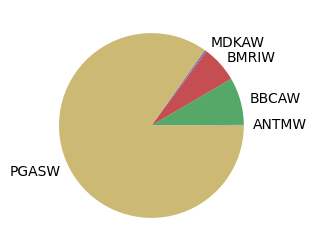

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw3a_call.flatten(), labels = columnw3a_call)
plt.show()

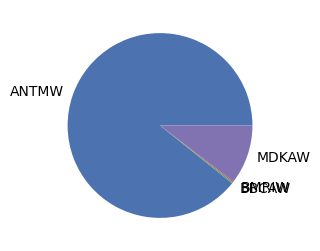

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw3a_put.flatten(), labels = columnw3a_put)
plt.show()

In [ ]:
# Net Asset Value
print (f'Net Asset Value (Call): {np.float(NAVw3a_call)}')
print (f'Net Asset Value (Put): {np.float(NAVw3a_put)}')

Net Asset Value (Call): 42491634.47568431
Net Asset Value (Put): 66681401.18344093


In [ ]:
# Networth if all were sold
print (f'Ending Balance (Call): {np.float(networthw3a_call)}')
print (f'Ending Balance (Put): {np.float(networthw3a_put)}')

Ending Balance (Call): 42386006.47568431
Ending Balance (Put): 66515027.43344093


In [ ]:
monthlya_call.append(np.float(networthw3a_call))
monthlya_put.append(np.float(networthw3a_put))
Profit3a = [np.float(networthw3a_call)/monthlya_call[3]-1, np.float(networthw3a_put)/monthlya_put[3]-1]
Profit3a = (pd.DataFrame(Profit3a)).T
Profit3a.rename(columns={0:'Binomial call'}, inplace=True)
Profit3a.rename(columns={1:'Binomial put'}, inplace=True)
Profit3a

Binomial call  Binomial put
0      -0.319466       0.95489

#### Scaled Return Allocation

In [ ]:
# Scaled mean returns
Mean_Call_return3s = (Mean_Call_return3-min(Mean_Call_return3))/(max(Mean_Call_return3)-min(Mean_Call_return3))
Mean_Put_return3s = (Mean_Put_return3-min(Mean_Put_return3))/(max(Mean_Put_return3)-min(Mean_Put_return3))

# Allocation based on returns
Alloc_Scaled_call3 = Mean_Call_return3s / sum(Mean_Call_return3s)
Alloc_Scaled_put3 = Mean_Put_return3s / sum(Mean_Put_return3s)

Alloc_Scaled3 = pd.DataFrame(Warrant_list)
Alloc_Scaled3 = Alloc_Scaled3.rename(columns={0:'Warrant'})
Alloc_Scaled3.insert(1,"Call Binomial", Alloc_Scaled_call3)
Alloc_Scaled3.insert(2,"Put Binomial", Alloc_Scaled_put3)
Alloc_Scaled3

Warrant  Call Binomial  Put Binomial
0   ANTMW       0.000000      0.545724
1   BBCAW       0.321047      0.017184
2   BMRIW       0.298488      0.019292
3   MDKAW       0.007814      0.417800
4   PGASW       0.372651      0.000000

In [ ]:
Scaled_call3_weights = {Warrant_list[0]:Alloc_Scaled_call3[0], Warrant_list[1]:Alloc_Scaled_call3[1],
                           Warrant_list[2]:Alloc_Scaled_call3[2], Warrant_list[3]:Alloc_Scaled_call3[3],
                           Warrant_list[4]:Alloc_Scaled_call3[4]}

Scaled_put3_weights = {Warrant_list[0]:Alloc_Scaled_put3[0], Warrant_list[1]:Alloc_Scaled_put3[1],
                           Warrant_list[2]:Alloc_Scaled_put3[2], Warrant_list[3]:Alloc_Scaled_put3[3],
                           Warrant_list[4]:Alloc_Scaled_put3[4]}

In [ ]:
call_buy_price3 = call_buy_price3.squeeze()
put_buy_price3 = put_buy_price3.squeeze()
# Allocation for binomial call method
daw3b_call = DiscreteAllocation(Scaled_call3_weights, MBU_Warrant*call_buy_price3*(1+buy_fee), total_portfolio_value=np.float(networthw2b_call))
allocationw3b_call, leftoverw3b_call = daw3b_call.greedy_portfolio()
print("Discrete allocation:", allocationw3b_call)
print("Funds remaining: IDR {:.2f}".format(leftoverw3b_call))

# Allocation for binomial put method
daw3b_put = DiscreteAllocation(Scaled_put3_weights, MBU_Warrant*put_buy_price3*(1+buy_fee), total_portfolio_value=np.float(networthw2b_put))
allocationw3b_put, leftoverw3b_put = daw3b_put.greedy_portfolio()
print("Discrete allocation:", allocationw3b_put)
print("Funds remaining: IDR {:.2f}".format(leftoverw3b_put))

Discrete allocation: {'PGASW': 5226, 'BBCAW': 512, 'BMRIW': 395, 'MDKAW': 16}
Funds remaining: IDR 9532.52
Discrete allocation: {'ANTMW': 15068, 'MDKAW': 1752, 'BMRIW': 31, 'BBCAW': 38}
Funds remaining: IDR 3193.70


In [ ]:
portionw3b_call = (pd.DataFrame.from_dict([allocationw3b_call]).T).sort_index()
columnw3b_call = [(portionw3b_call.T).columns[i] for i in range (len(portionw3b_call))]
portion_moneyw3b_call = (np.array(portionw3b_call)).reshape(-1,1)

portionw3b_put = (pd.DataFrame.from_dict([allocationw3b_put]).T).sort_index()
columnw3b_put = [(portionw3b_put.T).columns[i] for i in range (len(portionw3b_put))]
portion_moneyw3b_put = (np.array(portionw3b_put)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustmentsw_b_name_call = Warrant_list
Adjustmentsw_b_quant_call = []
initialw_b_name_call = np.array(portionw2b_call.index)
endingw_b_name_call = np.array(portionw3b_call.index)
for i in range (len(Adjustmentsw_b_name_call)):
  if Adjustmentsw_b_name_call[i] in endingw_b_name_call:
    index = int((np.where(endingw_b_name_call == Adjustmentsw_b_name_call[i]))[0])
    Adjustmentsw_b_quant_call.append(np.array(portion_moneyw3b_call.flatten())[index])
  else:
    Adjustmentsw_b_quant_call.append(0)
for i in range (len(Adjustmentsw_b_name_call)):
  if Adjustmentsw_b_name_call[i] in initialw_b_name_call:
    index = int((np.where(initialw_b_name_call == Adjustmentsw_b_name_call[i]))[0])
    Adjustmentsw_b_quant_call[i] -= np.array(portion_moneyw2b_call.flatten())[index]

Adjustmentsw_b_name_put = Warrant_list
Adjustmentsw_b_quant_put = []
initialw_b_name_put = np.array(portionw2b_put.index)
endingw_b_name_put = np.array(portionw3b_put.index)
for i in range (len(Adjustmentsw_b_name_put)):
  if Adjustmentsw_b_name_put[i] in endingw_b_name_put:
    index = int((np.where(endingw_b_name_put == Adjustmentsw_b_name_put[i]))[0])
    Adjustmentsw_b_quant_put.append(np.array(portion_moneyw3b_put.flatten())[index])
  else:
    Adjustmentsw_b_quant_put.append(0)
for i in range (len(Adjustmentsw_b_name_put)):
  if Adjustmentsw_b_name_put[i] in initialw_b_name_put:
    index = int((np.where(initialw_b_name_put == Adjustmentsw_b_name_put[i]))[0])
    Adjustmentsw_b_quant_put[i] -= np.array(portion_moneyw2b_put.flatten())[index]

In [ ]:
call_buy_price3 = pd.DataFrame(call_buy_price3).T
put_buy_price3 = pd.DataFrame(put_buy_price3).T

# Balance after selling assets (adjustments)
leftoverw3b_call = leftoverw2b_call
for i in range (len(Adjustmentsw_b_name_call)):
  if Adjustmentsw_b_quant_call[i] < 0:
    leftoverw3b_call -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_b_quant_call[i]*(np.array(call_sell_price2).reshape(-1,1))[i])
  elif Adjustmentsw_b_quant_call[i] > 0:
    leftoverw3b_call -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_b_quant_call[i]*(np.array(call_buy_price3).reshape(-1,1))[i])

leftoverw3b_put = leftoverw2b_put
for i in range (len(Adjustmentsw_b_name_put)):
  if Adjustmentsw_b_quant_put[i] < 0:
    leftoverw3b_put -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_b_quant_put[i]*(np.array(put_sell_price2).reshape(-1,1))[i])
  elif Adjustmentsw_b_quant_put[i] > 0:
    leftoverw3b_put -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_b_quant_put[i]*(np.array(put_buy_price3).reshape(-1,1))[i])

In [ ]:
portion_moneyw3b_call = (np.array(portion_moneyw3b_call)).reshape(-1,1)
networthw3b_call, NAVw3b_call = 0.0, 0.0
for i in range (len(columnw3b_call)):
  NAVw3b_call += MBU_Warrant*(np.dot(call_sell_price3[call_sell_price3.columns[call_sell_price3.columns.isin([columnw3b_call[i]])]],portion_moneyw3b_call[i]))
  networthw3b_call += (1-sell_fee)*MBU_Warrant*(np.dot(call_sell_price3[call_sell_price3.columns[call_sell_price3.columns.isin([columnw3b_call[i]])]],portion_moneyw3b_call[i]))
leftoverw3b_call = leftoverw3b_call*(1+ir)**(1/12)
NAVw3b_call += leftoverw3b_call
networthw3b_call += leftoverw3b_call
portw3b_call = pd.DataFrame(portion_moneyw3b_call, columns=['Quantity in MBU'])
portw3b_call.insert(0,'Asset Name',columnw3b_call)
portw3b_call = portw3b_call.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw3b_call}, ignore_index=True)
portw3b_call.index = portw3b_call.index+1

portion_moneyw3b_put = (np.array(portion_moneyw3b_put)).reshape(-1,1)
networthw3b_put, NAVw3b_put = 0.0, 0.0
for i in range (len(columnw3b_put)):
  NAVw3b_put += MBU_Warrant*(np.dot(put_sell_price3[put_sell_price3.columns[put_sell_price3.columns.isin([columnw3b_put[i]])]],portion_moneyw3b_put[i]))
  networthw3b_put += (1-sell_fee)*MBU_Warrant*(np.dot(put_sell_price3[put_sell_price3.columns[put_sell_price3.columns.isin([columnw3b_put[i]])]],portion_moneyw3b_put[i]))
leftoverw3b_put = leftoverw3b_put*(1+ir)**(1/12)
NAVw3b_put += leftoverw3b_put
networthw3b_put += leftoverw3b_put
portw3b_put = pd.DataFrame(portion_moneyw3b_put, columns=['Quantity in MBU'])
portw3b_put.insert(0,'Asset Name',columnw3b_put)
portw3b_put = portw3b_put.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw3b_put}, ignore_index=True)
portw3b_put.index = portw3b_put.index+1

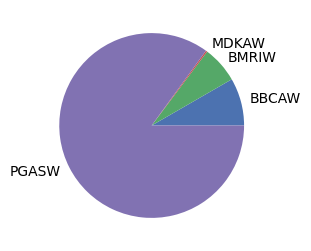

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw3b_call.flatten(), labels = columnw3b_call)
plt.show()

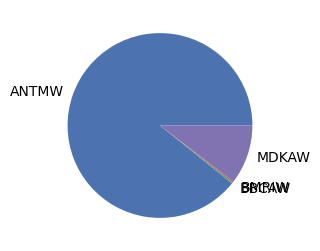

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw3b_put.flatten(), labels = columnw3b_put)
plt.show()

In [ ]:
# Net Asset Value
print (f'Net Asset Value (Call): {np.float(NAVw3b_call)}')
print (f'Net Asset Value (Put): {np.float(NAVw3b_put)}')

Net Asset Value (Call): 41259554.47429041
Net Asset Value (Put): 64971196.28634353


In [ ]:
# Networth if all were sold
print (f'Ending Balance (Call): {np.float(networthw3b_call)}')
print (f'Ending Balance (Put): {np.float(networthw3b_put)}')

Ending Balance (Call): 41156980.47429041
Ending Balance (Put): 64809064.78634353


In [ ]:
monthlyb_call.append(np.float(networthw3b_call))
monthlyb_put.append(np.float(networthw3b_put))
Profit3b = [np.float(networthw3b_call)/monthlyb_call[3]-1, np.float(networthw3b_put)/monthlyb_put[3]-1]
Profit3b = (pd.DataFrame(Profit3b)).T
Profit3b.rename(columns={0:'Binomial call'}, inplace=True)
Profit3b.rename(columns={1:'Binomial put'}, inplace=True)
Profit3b

Binomial call  Binomial put
0      -0.318609      0.953069

#### Uniform Allocation

In [ ]:
# Uniform allocation
Alloc_Uniform_call3 = [0.2, 0.2, 0.2, 0.2, 0.2]
Alloc_Uniform_put3 = [0.2, 0.2, 0.2, 0.2, 0.2]

Alloc_Uniform3 = pd.DataFrame(Warrant_list)
Alloc_Uniform3 = Alloc_Uniform3.rename(columns={0:'Warrant'})
Alloc_Uniform3.insert(1, "Call", Alloc_Uniform_call3)
Alloc_Uniform3.insert(2, "Put", Alloc_Uniform_put3)

Alloc_Uniform3

Warrant  Call  Put
0   ANTMW   0.2  0.2
1   BBCAW   0.2  0.2
2   BMRIW   0.2  0.2
3   MDKAW   0.2  0.2
4   PGASW   0.2  0.2

In [ ]:
Uniform3_call_weights = {Warrant_list[0]:Alloc_Uniform_call3[0], Warrant_list[1]:Alloc_Uniform_call3[1],
                           Warrant_list[2]:Alloc_Uniform_call3[2], Warrant_list[3]:Alloc_Uniform_call3[3],
                           Warrant_list[4]:Alloc_Uniform_call3[4]}

Uniform3_put_weights = {Warrant_list[0]:Alloc_Uniform_put3[0], Warrant_list[1]:Alloc_Uniform_put3[1],
                           Warrant_list[2]:Alloc_Uniform_put3[2], Warrant_list[3]:Alloc_Uniform_put3[3],
                           Warrant_list[4]:Alloc_Uniform_put3[4]}

In [ ]:
call_buy_price3 = call_buy_price3.squeeze()
put_buy_price3 = put_buy_price3.squeeze()
# Allocation for binomial call method
daw3c_call = DiscreteAllocation(Uniform3_call_weights, MBU_Warrant*call_buy_price3*(1+buy_fee), total_portfolio_value=np.float(networthw2c_call))
allocationw3c_call, leftoverw3c_call = daw3c_call.greedy_portfolio()
print("Discrete allocation:", allocationw3c_call)
print("Funds remaining: IDR {:.2f}".format(leftoverw3c_call))

# Allocation for binomial put method
daw3c_put = DiscreteAllocation(Uniform3_put_weights, MBU_Warrant*put_buy_price3*(1+buy_fee), total_portfolio_value=np.float(networthw2c_put))
allocationw3c_put, leftoverw3c_put = daw3c_put.greedy_portfolio()
print("Discrete allocation:", allocationw3c_put)
print("Funds remaining: IDR {:.2f}".format(leftoverw3c_put))

Discrete allocation: {'ANTMW': 726, 'BBCAW': 392, 'BMRIW': 325, 'MDKAW': 510, 'PGASW': 3445}
Funds remaining: IDR 13342.63
Discrete allocation: {'ANTMW': 10999, 'BBCAW': 886, 'BMRIW': 638, 'MDKAW': 1670, 'PGASW': 1306}
Funds remaining: IDR 6913.23


In [ ]:
portionw3c_call = (pd.DataFrame.from_dict([allocationw3c_call]).T).sort_index()
columnw3c_call = [(portionw3c_call.T).columns[i] for i in range (len(portionw3c_call))]
portion_moneyw3c_call = (np.array(portionw3c_call)).reshape(-1,1)

portionw3c_put = (pd.DataFrame.from_dict([allocationw3c_put]).T).sort_index()
columnw3c_put = [(portionw3c_put.T).columns[i] for i in range (len(portionw3c_put))]
portion_moneyw3c_put = (np.array(portionw3c_put)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustmentsw_c_name_call = Warrant_list
Adjustmentsw_c_quant_call = []
initialw_c_name_call = np.array(portionw2c_call.index)
endingw_c_name_call = np.array(portionw3c_call.index)
for i in range (len(Adjustmentsw_c_name_call)):
  if Adjustmentsw_c_name_call[i] in endingw_c_name_call:
    index = int((np.where(endingw_c_name_call == Adjustmentsw_c_name_call[i]))[0])
    Adjustmentsw_c_quant_call.append(np.array(portion_moneyw3c_call.flatten())[index])
  else:
    Adjustmentsw_c_quant_call.append(0)
for i in range (len(Adjustmentsw_c_name_call)):
  if Adjustmentsw_c_name_call[i] in initialw_c_name_call:
    index = int((np.where(initialw_c_name_call == Adjustmentsw_c_name_call[i]))[0])
    Adjustmentsw_c_quant_call[i] -= np.array(portion_moneyw2c_call.flatten())[index]

Adjustmentsw_c_name_put = Warrant_list
Adjustmentsw_c_quant_put = []
initialw_c_name_put = np.array(portionw2c_put.index)
endingw_c_name_put = np.array(portionw3c_put.index)
for i in range (len(Adjustmentsw_c_name_put)):
  if Adjustmentsw_c_name_put[i] in endingw_c_name_put:
    index = int((np.where(endingw_c_name_put == Adjustmentsw_c_name_put[i]))[0])
    Adjustmentsw_c_quant_put.append(np.array(portion_moneyw3c_put.flatten())[index])
  else:
    Adjustmentsw_c_quant_put.append(0)
for i in range (len(Adjustmentsw_c_name_put)):
  if Adjustmentsw_c_name_put[i] in initialw_c_name_put:
    index = int((np.where(initialw_c_name_put == Adjustmentsw_c_name_put[i]))[0])
    Adjustmentsw_c_quant_put[i] -= np.array(portion_moneyw2c_put.flatten())[index]

In [ ]:
call_buy_price3 = pd.DataFrame(call_buy_price3).T
put_buy_price3 = pd.DataFrame(put_buy_price3).T

# Balance after selling assets (adjustments)
leftoverw3c_call = leftoverw2c_call
for i in range (len(Adjustmentsw_c_name_call)):
  if Adjustmentsw_c_quant_call[i] < 0:
    leftoverw3c_call -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_c_quant_call[i]*(np.array(call_sell_price2).reshape(-1,1))[i])
  elif Adjustmentsw_c_quant_call[i] > 0:
    leftoverw3c_call -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_c_quant_call[i]*(np.array(call_buy_price3).reshape(-1,1))[i])

leftoverw3c_put = leftoverw2c_put
for i in range (len(Adjustmentsw_c_name_put)):
  if Adjustmentsw_c_quant_put[i] < 0:
    leftoverw3c_put -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_c_quant_put[i]*(np.array(put_sell_price2).reshape(-1,1))[i])
  elif Adjustmentsw_c_quant_put[i] > 0:
    leftoverw3c_put -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_c_quant_put[i]*(np.array(put_buy_price3).reshape(-1,1))[i])

In [ ]:
networthw3c_call, NAVw3c_call = 0.0, 0.0
for i in range (len(columnw3c_call)):
  NAVw3c_call += MBU_Warrant*(np.dot(call_sell_price3[call_sell_price3.columns[call_sell_price3.columns.isin([columnw3c_call[i]])]],portion_moneyw3c_call[i]))
  networthw3c_call += (1-sell_fee)*MBU_Warrant*(np.dot(call_sell_price3[call_sell_price3.columns[call_sell_price3.columns.isin([columnw3c_call[i]])]],portion_moneyw3c_call[i]))
leftoverw3c_call = leftoverw3c_call*(1+ir)**(1/12)
NAVw3c_call += leftoverw3c_call
networthw3c_call += leftoverw3c_call
portw3c_call = pd.DataFrame(portion_moneyw3c_call, columns=['Quantity in MBU'])
portw3c_call.insert(0,'Asset Name',columnw3c_call)
portw3c_call = portw3c_call.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw3c_call}, ignore_index=True)
portw3c_call.index = portw3c_call.index+1

networthw3c_put, NAVw3c_put = 0.0, 0.0
for i in range (len(columnw3c_put)):
  NAVw3c_put += MBU_Warrant*(np.dot(put_sell_price3[put_sell_price3.columns[put_sell_price3.columns.isin([columnw3c_put[i]])]],portion_moneyw3c_put[i]))
  networthw3c_put += (1-sell_fee)*MBU_Warrant*(np.dot(put_sell_price3[put_sell_price3.columns[put_sell_price3.columns.isin([columnw3c_put[i]])]],portion_moneyw3c_put[i]))
leftoverw3c_put = leftoverw3c_put*(1+ir)**(1/12)
NAVw3c_put += leftoverw3c_put
networthw3c_put += leftoverw3c_put
portw3c_put = pd.DataFrame(portion_moneyw3c_put, columns=['Quantity in MBU'])
portw3c_put.insert(0,'Asset Name',columnw3c_put)
portw3c_put = portw3c_put.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw3c_put}, ignore_index=True)
portw3c_put.index = portw3c_put.index+1

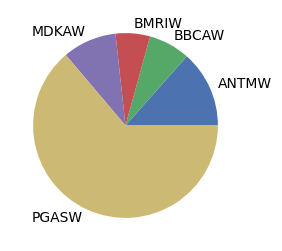

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw3c_call.flatten(), labels = columnw3c_call)
plt.show()

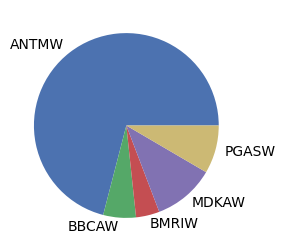

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw3c_put.flatten(), labels = columnw3c_put)
plt.show()

In [ ]:
# Net Asset Value
print (f'Net Asset Value (Call): {np.float(NAVw3c_call)}')
print (f'Net Asset Value (Put): {np.float(NAVw3c_put)}')

Net Asset Value (Call): 46061972.77753766
Net Asset Value (Put): 91936743.1735661


In [ ]:
# Networth if all were sold
print (f'Ending Balance (Call): {np.float(networthw3c_call)}')
print (f'Ending Balance (Put): {np.float(networthw3c_put)}')

Ending Balance (Call): 45947556.52753766
Ending Balance (Put): 91707524.9235661


In [ ]:
monthlyc_call.append(np.float(networthw3c_call))
monthlyc_put.append(np.float(networthw3c_put))
Profit3c = [np.float(networthw3c_call)/monthlyc_call[3]-1, np.float(networthw3c_put)/monthlyc_put[3]-1]
Profit3c = (pd.DataFrame(Profit3c)).T
Profit3c.rename(columns={0:'Binomial call'}, inplace=True)
Profit3c.rename(columns={1:'Binomial put'}, inplace=True)
Profit3c

Binomial call  Binomial put
0       -0.38056      0.387484

#### Price Ratio Allocation

In [ ]:
# Allocation based on fair prices ratios
fair_ratios_call3 = call_sell_price3/np.array(call_buy_price3)
fair_ratios_put3 = put_sell_price3/np.array(put_buy_price3)
max_call3 = max(np.array(fair_ratios_call3).flatten())
min_call3 = min(np.array(fair_ratios_call3).flatten())
max_put3 = max(np.array(fair_ratios_put3).flatten())
min_put3 = min(np.array(fair_ratios_put3).flatten())
fair_ratios_call3s = (fair_ratios_call3-min_call3)/(max_call3-min_call3)
fair_ratios_put3s  = (fair_ratios_put3-min_put3)/(max_put3-min_put3)

# Allocation
Alloc_Fair_call3 = np.array(fair_ratios_call3s/sum(np.array(fair_ratios_call3s).flatten())).flatten()
Alloc_Fair_put3 = np.array(fair_ratios_put3s/sum(np.array(fair_ratios_put3s).flatten())).flatten()

Alloc_Fair3 = pd.DataFrame(Warrant_list)
Alloc_Fair3 = Alloc_Fair3.rename(columns={0:'Warrant'})
Alloc_Fair3.insert(1,"Call Binomial", Alloc_Fair_call3)
Alloc_Fair3.insert(2,"Put Binomial", Alloc_Fair_put3)
Alloc_Fair3

Warrant  Call Binomial  Put Binomial
0   ANTMW       0.019659      0.488085
1   BBCAW       0.275793      0.181123
2   BMRIW       0.568427      0.000000
3   MDKAW       0.000000      0.215027
4   PGASW       0.136121      0.115766

In [ ]:
Fair_call3_weights = {Warrant_list[0]:Alloc_Fair_call3[0], Warrant_list[1]:Alloc_Fair_call3[1],
                           Warrant_list[2]:Alloc_Fair_call3[2], Warrant_list[3]:Alloc_Fair_call3[3],
                           Warrant_list[4]:Alloc_Fair_call3[4]}

Fair_put3_weights = {Warrant_list[0]:Alloc_Fair_put3[0], Warrant_list[1]:Alloc_Fair_put3[1],
                           Warrant_list[2]:Alloc_Fair_put3[2], Warrant_list[3]:Alloc_Fair_put3[3],
                           Warrant_list[4]:Alloc_Fair_put3[4]}

In [ ]:
call_buy_price3 = call_buy_price3.squeeze()
put_buy_price3 = put_buy_price3.squeeze()
# Allocation for binomial call method
daw3d_call = DiscreteAllocation(Fair_call3_weights, MBU_Warrant*call_buy_price3*(1+buy_fee), total_portfolio_value=np.float(networthw2d_call))
allocationw3d_call, leftoverw3d_call = daw3d_call.greedy_portfolio()
print("Discrete allocation:", allocationw3d_call)
print("Funds remaining: IDR {:.2f}".format(leftoverw3d_call))

# Allocation for binomial put method
daw3d_put = DiscreteAllocation(Fair_put3_weights, MBU_Warrant*put_buy_price3*(1+buy_fee), total_portfolio_value=np.float(networthw2d_put))
allocationw3d_put, leftoverw3d_put = daw3d_put.greedy_portfolio()
print("Discrete allocation:", allocationw3d_put)
print("Funds remaining: IDR {:.2f}".format(leftoverw3d_put))

Discrete allocation: {'BMRIW': 1205, 'BBCAW': 706, 'PGASW': 3060, 'ANTMW': 93}
Funds remaining: IDR 3461.73
Discrete allocation: {'ANTMW': 44323, 'MDKAW': 2966, 'BBCAW': 1324, 'PGASW': 1249}
Funds remaining: IDR 12047.03


In [ ]:
portionw3d_call = (pd.DataFrame.from_dict([allocationw3d_call]).T).sort_index()
columnw3d_call = [(portionw3d_call.T).columns[i] for i in range (len(portionw3d_call))]
portion_moneyw3d_call = (np.array(portionw3d_call)).reshape(-1,1)

portionw3d_put = (pd.DataFrame.from_dict([allocationw3d_put]).T).sort_index()
columnw3d_put = [(portionw3d_put.T).columns[i] for i in range (len(portionw3d_put))]
portion_moneyw3d_put = (np.array(portionw3d_put)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustmentsw_d_name_call = Warrant_list
Adjustmentsw_d_quant_call = []
initialw_d_name_call = np.array(portionw2d_call.index)
endingw_d_name_call = np.array(portionw3d_call.index)
for i in range (len(Adjustmentsw_d_name_call)):
  if Adjustmentsw_d_name_call[i] in endingw_d_name_call:
    index = int((np.where(endingw_d_name_call == Adjustmentsw_d_name_call[i]))[0])
    Adjustmentsw_d_quant_call.append(np.array(portion_moneyw3d_call.flatten())[index])
  else:
    Adjustmentsw_d_quant_call.append(0)
for i in range (len(Adjustmentsw_d_name_call)):
  if Adjustmentsw_d_name_call[i] in initialw_d_name_call:
    index = int((np.where(initialw_d_name_call == Adjustmentsw_d_name_call[i]))[0])
    Adjustmentsw_d_quant_call[i] -= np.array(portion_moneyw2d_call.flatten())[index]

Adjustmentsw_d_name_put = Warrant_list
Adjustmentsw_d_quant_put = []
initialw_d_name_put = np.array(portionw2d_put.index)
endingw_d_name_put = np.array(portionw3d_put.index)
for i in range (len(Adjustmentsw_d_name_put)):
  if Adjustmentsw_d_name_put[i] in endingw_d_name_put:
    index = int((np.where(endingw_d_name_put == Adjustmentsw_d_name_put[i]))[0])
    Adjustmentsw_d_quant_put.append(np.array(portion_moneyw3d_put.flatten())[index])
  else:
    Adjustmentsw_d_quant_put.append(0)
for i in range (len(Adjustmentsw_d_name_put)):
  if Adjustmentsw_d_name_put[i] in initialw_d_name_put:
    index = int((np.where(initialw_d_name_put == Adjustmentsw_d_name_put[i]))[0])
    Adjustmentsw_d_quant_put[i] -= np.array(portion_moneyw2d_put.flatten())[index]

In [ ]:
call_buy_price3 = pd.DataFrame(call_buy_price3).T
put_buy_price3 = pd.DataFrame(put_buy_price3).T

# Balance after selling assets (adjustments)
leftoverw3d_call = leftoverw2d_call
for i in range (len(Adjustmentsw_d_name_call)):
  if Adjustmentsw_d_quant_call[i] < 0:
    leftoverw3d_call -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_d_quant_call[i]*(np.array(call_sell_price2).reshape(-1,1))[i])
  elif Adjustmentsw_d_quant_call[i] > 0:
    leftoverw3d_call -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_d_quant_call[i]*(np.array(call_buy_price3).reshape(-1,1))[i])

leftoverw3d_put = leftoverw2d_put
for i in range (len(Adjustmentsw_d_name_put)):
  if Adjustmentsw_d_quant_put[i] < 0:
    leftoverw3d_put -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_d_quant_put[i]*(np.array(put_sell_price2).reshape(-1,1))[i])
  elif Adjustmentsw_d_quant_put[i] > 0:
    leftoverw3d_put -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_d_quant_put[i]*(np.array(put_buy_price3).reshape(-1,1))[i])

In [ ]:
portion_moneyw3d_call = (np.array(portion_moneyw3d_call)).reshape(-1,1)
networthw3d_call, NAVw3d_call = 0.0, 0.0
for i in range (len(columnw3d_call)):
  NAVw3d_call += MBU_Warrant*(np.dot(call_sell_price3[call_sell_price3.columns[call_sell_price3.columns.isin([columnw3d_call[i]])]],portion_moneyw3d_call[i]))
  networthw3d_call += (1-sell_fee)*MBU_Warrant*(np.dot(call_sell_price3[call_sell_price3.columns[call_sell_price3.columns.isin([columnw3d_call[i]])]],portion_moneyw3d_call[i]))
leftoverw3d_call = leftoverw3d_call*(1+ir)**(1/12)
NAVw3d_call += leftoverw3d_call
networthw3d_call += leftoverw3d_call
portw3d_call = pd.DataFrame(portion_moneyw3d_call, columns=['Quantity in MBU'])
portw3d_call.insert(0,'Asset Name',columnw3d_call)
portw3d_call = portw3d_call.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw3d_call}, ignore_index=True)
portw3d_call.index = portw3d_call.index+1

portion_moneyw3d_put = (np.array(portion_moneyw3d_put)).reshape(-1,1)
networthw3d_put, NAVw3d_put = 0.0, 0.0
for i in range (len(columnw3d_put)):
  NAVw3d_put += MBU_Warrant*(np.dot(put_sell_price3[put_sell_price3.columns[put_sell_price3.columns.isin([columnw3d_put[i]])]],portion_moneyw3d_put[i]))
  networthw3d_put += (1-sell_fee)*MBU_Warrant*(np.dot(put_sell_price3[put_sell_price3.columns[put_sell_price3.columns.isin([columnw3d_put[i]])]],portion_moneyw3d_put[i]))
leftoverw3d_put = leftoverw3d_put*(1+ir)**(1/12)
NAVw3d_put += leftoverw3d_put
networthw3d_put += leftoverw3d_put
portw3d_put = pd.DataFrame(portion_moneyw3d_put, columns=['Quantity in MBU'])
portw3d_put.insert(0,'Asset Name',columnw3d_put)
portw3d_put = portw3d_put.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw3d_put}, ignore_index=True)
portw3d_put.index = portw3d_put.index+1

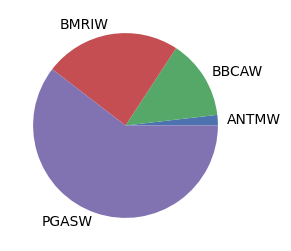

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw3d_call.flatten(), labels = columnw3d_call)
plt.show()

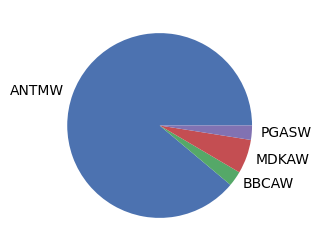

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw3d_put.flatten(), labels = columnw3d_put)
plt.show()

In [ ]:
# Net Asset Value
print (f'Net Asset Value (Call): {np.float(NAVw3d_call)}')
print (f'Net Asset Value (Put): {np.float(NAVw3d_put)}')

Net Asset Value (Call): 72063977.49696027
Net Asset Value (Put): 202391983.23979846


In [ ]:
# Networth if all were sold
print (f'Ending Balance (Call): {np.float(networthw3d_call)}')
print (f'Ending Balance (Put): {np.float(networthw3d_put)}')

Ending Balance (Call): 71884413.74696027
Ending Balance (Put): 201886555.98979846


In [ ]:
monthlyd_call.append(np.float(networthw3d_call))
monthlyd_put.append(np.float(networthw3d_put))
Profit3d = [np.float(networthw3d_call)/monthlyd_call[3]-1, np.float(networthw3d_put)/monthlyd_put[3]-1]
Profit3d = (pd.DataFrame(Profit3d)).T
Profit3d.rename(columns={0:'Binomial call'}, inplace=True)
Profit3d.rename(columns={1:'Binomial put'}, inplace=True)
Profit3d

Binomial call  Binomial put
0      -0.257688      0.849845

### Period 4

#### Price List

In [ ]:
Call_warrant_price4 = pd.read_excel('Data Waran Final.xlsx', sheet_name='Price 4').squeeze('columns')
Call_warrant_price4

Dates  ANTMW  BBCAW  BMRIW  MDKAW  PGASW
0  2023-03-10    105    250    378    146     25
1  2023-03-13     97    262    360    133     23
2  2023-03-14     90    220    300    128     16
3  2023-03-15     96    218    308    127     13
4  2023-03-16     83    208    278    105     11
5  2023-03-17     98    216    304    101     10
6  2023-03-20    100    210    282    100     11
7  2023-03-21     99    218    350    100     13
8  2023-03-22     99    218    350    100     13
9  2023-03-23     99    218    350    100     13
10 2023-03-24     97    256    434    102     14
11 2023-03-27    111    238    386     97     14
12 2023-03-28    115    228    358    105     14
13 2023-03-29    133    260    406    126     12
14 2023-03-30    137    270    378    124     13
15 2023-03-31    132    260    380    133     13
16 2023-04-03    130    244    396    109     13
17 2023-04-04    124    224    362    116     12
18 2023-04-05    132    232    364    122     12
19 2023-04-06    129    224    360    107     11
20 2023-04-10    110    224    306     81     11

In [ ]:
# Binomial return array
Call_return4 = pd.DataFrame(ANTMW_Call_binom_return4)
Call_return4 = Call_return4.rename(columns={0:'ANTMW'})
Call_return4.insert(1,"BBCAW", pd.DataFrame(BBCAW_Call_binom_return4))
Call_return4.insert(2,"BMRIW", pd.DataFrame(BMRIW_Call_binom_return4))
Call_return4.insert(3,"MDKAW", pd.DataFrame(MDKAW_Call_binom_return4))
Call_return4.insert(4,"PGASW", pd.DataFrame(PGASW_Call_binom_return4))
Mean_Call_return4 = [part*np.mean(Call_return4['ANTMW']),
                           part*np.mean(Call_return4['BBCAW']),
                           part*np.mean(Call_return4['BMRIW']),
                           part*np.mean(Call_return4['MDKAW']),
                           part*np.mean(Call_return4['PGASW'])]
Put_return4 = pd.DataFrame(ANTMW_Put_binom_return4)
Put_return4 = Put_return4.rename(columns={0:'ANTMW'})
Put_return4.insert(1,"BBCAW", pd.DataFrame(BBCAW_Put_binom_return4))
Put_return4.insert(2,"BMRIW", pd.DataFrame(BMRIW_Put_binom_return4))
Put_return4.insert(3,"MDKAW", pd.DataFrame(MDKAW_Put_binom_return4))
Put_return4.insert(4,"PGASW", pd.DataFrame(PGASW_Put_binom_return4))
Mean_Put_return4 = [part*np.mean(Put_return4['ANTMW']),
                           part*np.mean(Put_return4['BBCAW']),
                           part*np.mean(Put_return4['BMRIW']),
                           part*np.mean(Put_return4['MDKAW']),
                           part*np.mean(Put_return4['PGASW'])]

In [ ]:
# Call Buy prices and Sell prices
call_buy_price4 = pd.DataFrame(Call_warrant_price4.loc[Call_warrant_price4.index[0]]).T
call_buy_price4 = call_buy_price4.drop(columns=['Dates'])
call_buy_price4 = pd.DataFrame(call_buy_price4,dtype=int)
call_sell_price4 = pd.DataFrame(Call_warrant_price4.loc[Call_warrant_price4.index[len(Call_warrant_price4)-1]]).T
call_sell_price4 = call_sell_price4.drop(columns=['Dates'])
call_sell_price4 = pd.DataFrame(call_sell_price4,dtype=int)

In [ ]:
# Put Buy prices and Sell prices
put_initial = [int(ANTM_Put_Warrant[4]), int(BBCA_Put_Warrant[4]), int(BMRI_Put_Warrant[4]), int(MDKA_Put_Warrant[4]), int(PGAS_Put_Warrant[4])]
put_sell = [int(ANTM_Put_Warrant[5]), int(BBCA_Put_Warrant[5]), int(BMRI_Put_Warrant[5]), int(MDKA_Put_Warrant[5]), int(PGAS_Put_Warrant[5])]
put_buy_price4 = pd.DataFrame(put_initial).T
put_buy_price4 = put_buy_price4.rename({0:'ANTMW', 1:'BBCAW', 2:'BMRIW', 3:'MDKAW', 4:'PGASW'}, axis='columns')
put_buy_price4 = put_buy_price4.loc[put_buy_price4.index[0]]
put_sell_price4 = pd.DataFrame(put_sell).T
put_sell_price4 = put_sell_price4.rename({0:'ANTMW', 1:'BBCAW', 2:'BMRIW', 3:'MDKAW', 4:'PGASW'}, axis='columns')

#### Raw Return Allocation

In [ ]:
# Allocation based on returns
Mean_Call_return4_adj = [max(Mean_Call_return4[i],0) for i in range (len(Mean_Call_return4))]
Mean_Put_return4_adj = [max(Mean_Put_return4[i],0) for i in range (len(Mean_Put_return4))]
Alloc_Raw_call4 = Mean_Call_return4_adj / sum(Mean_Call_return4_adj)
Alloc_Raw_put4 = Mean_Put_return4_adj / sum(Mean_Put_return4_adj)

Alloc_Raw4 = pd.DataFrame(Warrant_list)
Alloc_Raw4 = Alloc_Raw4.rename(columns={0:'Warrant'})
Alloc_Raw4.insert(1,"Call Binomial", Alloc_Raw_call4)
Alloc_Raw4.insert(2,"Put Binomial", Alloc_Raw_put4)
Alloc_Raw4

Warrant  Call Binomial  Put Binomial
0   ANTMW       0.005791      0.778249
1   BBCAW       0.184267      0.000000
2   BMRIW       0.310333      0.180220
3   MDKAW       0.184598      0.041531
4   PGASW       0.315011      0.000000

In [ ]:
Raw_call4_weights = {Warrant_list[0]:Alloc_Raw_call4[0], Warrant_list[1]:Alloc_Raw_call4[1],
                           Warrant_list[2]:Alloc_Raw_call4[2], Warrant_list[3]:Alloc_Raw_call4[3],
                           Warrant_list[4]:Alloc_Raw_call4[4]}

Raw_put4_weights = {Warrant_list[0]:Alloc_Raw_put4[0], Warrant_list[1]:Alloc_Raw_put4[1],
                           Warrant_list[2]:Alloc_Raw_put4[2], Warrant_list[3]:Alloc_Raw_put4[3],
                           Warrant_list[4]:Alloc_Raw_put4[4]}

In [ ]:
call_buy_price4 = call_buy_price4.squeeze()
put_buy_price4 = put_buy_price4.squeeze()
# Allocation for binomial call method
daw4a_call = DiscreteAllocation(Raw_call4_weights, MBU_Warrant*call_buy_price4*(1+buy_fee), total_portfolio_value=np.float(networthw3a_call))
allocationw4a_call, leftoverw4a_call = daw4a_call.greedy_portfolio()
print("Discrete allocation:", allocationw4a_call)
print("Funds remaining: IDR {:.2f}".format(leftoverw4a_call))

# Allocation for binomial put method
daw4a_put = DiscreteAllocation(Raw_put4_weights, MBU_Warrant*put_buy_price4*(1+buy_fee), total_portfolio_value=np.float(networthw3a_put))
allocationw4a_put, leftoverw4a_put = daw4a_put.greedy_portfolio()
print("Discrete allocation:", allocationw4a_put)
print("Funds remaining: IDR {:.2f}".format(leftoverw4a_put))

Discrete allocation: {'PGASW': 5332, 'BMRIW': 347, 'MDKAW': 535, 'BBCAW': 312, 'ANTMW': 24}
Funds remaining: IDR 12942.08
Discrete allocation: {'ANTMW': 17823, 'BMRIW': 854, 'MDKAW': 242}
Funds remaining: IDR 13925.18


In [ ]:
portionw4a_call = (pd.DataFrame.from_dict([allocationw4a_call]).T).sort_index()
columnw4a_call = [(portionw4a_call.T).columns[i] for i in range (len(portionw4a_call))]
portion_moneyw4a_call = (np.array(portionw4a_call)).reshape(-1,1)

portionw4a_put = (pd.DataFrame.from_dict([allocationw4a_put]).T).sort_index()
columnw4a_put = [(portionw4a_put.T).columns[i] for i in range (len(portionw4a_put))]
portion_moneyw4a_put = (np.array(portionw4a_put)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustmentsw_a_name_call = Warrant_list
Adjustmentsw_a_quant_call = []
initialw_a_name_call = np.array(portionw3a_call.index)
endingw_a_name_call = np.array(portionw4a_call.index)
for i in range (len(Adjustmentsw_a_name_call)):
  if Adjustmentsw_a_name_call[i] in endingw_a_name_call:
    index = int((np.where(endingw_a_name_call == Adjustmentsw_a_name_call[i]))[0])
    Adjustmentsw_a_quant_call.append(np.array(portion_moneyw4a_call.flatten())[index])
  else:
    Adjustmentsw_a_quant_call.append(0)
for i in range (len(Adjustmentsw_a_name_call)):
  if Adjustmentsw_a_name_call[i] in initialw_a_name_call:
    index = int((np.where(initialw_a_name_call == Adjustmentsw_a_name_call[i]))[0])
    Adjustmentsw_a_quant_call[i] -= np.array(portion_moneyw3a_call.flatten())[index]

Adjustmentsw_a_name_put = Warrant_list
Adjustmentsw_a_quant_put = []
initialw_a_name_put = np.array(portionw3a_put.index)
endingw_a_name_put = np.array(portionw4a_put.index)
for i in range (len(Adjustmentsw_a_name_put)):
  if Adjustmentsw_a_name_put[i] in endingw_a_name_put:
    index = int((np.where(endingw_a_name_put == Adjustmentsw_a_name_put[i]))[0])
    Adjustmentsw_a_quant_put.append(np.array(portion_moneyw4a_put.flatten())[index])
  else:
    Adjustmentsw_a_quant_put.append(0)
for i in range (len(Adjustmentsw_a_name_put)):
  if Adjustmentsw_a_name_put[i] in initialw_a_name_put:
    index = int((np.where(initialw_a_name_put == Adjustmentsw_a_name_put[i]))[0])
    Adjustmentsw_a_quant_put[i] -= np.array(portion_moneyw3a_put.flatten())[index]

In [ ]:
call_buy_price4 = pd.DataFrame(call_buy_price4).T
put_buy_price4 = pd.DataFrame(put_buy_price4).T

# Balance after selling assets (adjustments)
leftoverw4a_call = leftoverw3a_call
for i in range (len(Adjustmentsw_a_name_call)):
  if Adjustmentsw_a_quant_call[i] < 0:
    leftoverw4a_call -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_a_quant_call[i]*(np.array(call_sell_price3).reshape(-1,1))[i])
  elif Adjustmentsw_a_quant_call[i] > 0:
    leftoverw4a_call -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_a_quant_call[i]*(np.array(call_buy_price4).reshape(-1,1))[i])

leftoverw4a_put = leftoverw3a_put
for i in range (len(Adjustmentsw_a_name_put)):
  if Adjustmentsw_a_quant_put[i] < 0:
    leftoverw4a_put -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_a_quant_put[i]*(np.array(put_sell_price3).reshape(-1,1))[i])
  elif Adjustmentsw_a_quant_put[i] > 0:
    leftoverw4a_put -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_a_quant_put[i]*(np.array(put_buy_price4).reshape(-1,1))[i])

In [ ]:
networthw4a_call, NAVw4a_call = 0.0, 0.0
for i in range (len(columnw4a_call)):
  NAVw4a_call += MBU_Warrant*(np.dot(call_sell_price4[call_sell_price4.columns[call_sell_price4.columns.isin([columnw4a_call[i]])]],portion_moneyw4a_call[i]))
  networthw4a_call += (1-sell_fee)*MBU_Warrant*(np.dot(call_sell_price4[call_sell_price4.columns[call_sell_price4.columns.isin([columnw4a_call[i]])]],portion_moneyw4a_call[i]))
leftoverw4a_call = leftoverw4a_call*(1+ir)**(1/12)
NAVw4a_call += leftoverw4a_call
networthw4a_call += leftoverw4a_call
portw4a_call = pd.DataFrame(portion_moneyw4a_call, columns=['Quantity in MBU'])
portw4a_call.insert(0,'Asset Name',columnw4a_call)
portw4a_call = portw4a_call.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw4a_call}, ignore_index=True)
portw4a_call.index = portw4a_call.index+1

networthw4a_put, NAVw4a_put = 0.0, 0.0
for i in range (len(columnw4a_put)):
  NAVw4a_put += MBU_Warrant*(np.dot(put_sell_price4[put_sell_price4.columns[put_sell_price4.columns.isin([columnw4a_put[i]])]],portion_moneyw4a_put[i]))
  networthw4a_put += (1-sell_fee)*MBU_Warrant*(np.dot(put_sell_price4[put_sell_price4.columns[put_sell_price4.columns.isin([columnw4a_put[i]])]],portion_moneyw4a_put[i]))
leftoverw4a_put = leftoverw4a_put*(1+ir)**(1/12)
NAVw4a_put += leftoverw4a_put
networthw4a_put += leftoverw4a_put
portw4a_put = pd.DataFrame(portion_moneyw4a_put, columns=['Quantity in MBU'])
portw4a_put.insert(0,'Asset Name',columnw4a_put)
portw4a_put = portw4a_put.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw4a_put}, ignore_index=True)
portw4a_put.index = portw4a_put.index+1

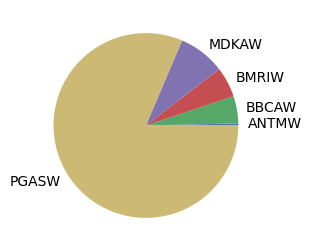

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw4a_call.flatten(), labels = columnw4a_call)
plt.show()

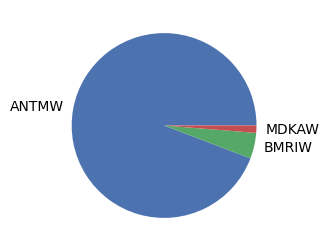

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw4a_put.flatten(), labels = columnw4a_put)
plt.show()

In [ ]:
# Net Asset Value
print (f'Net Asset Value (Call): {np.float(NAVw4a_call)}')
print (f'Net Asset Value (Put): {np.float(NAVw4a_put)}')

Net Asset Value (Call): 28221703.271080002
Net Asset Value (Put): 36061483.45602922


In [ ]:
# Networth if all were sold
print (f'Ending Balance (Call): {np.float(networthw4a_call)}')
print (f'Ending Balance (Put): {np.float(networthw4a_put)}')

Ending Balance (Call): 28151529.021080002
Ending Balance (Put): 35971846.95602922


In [ ]:
monthlya_call.append(np.float(networthw4a_call))
monthlya_put.append(np.float(networthw4a_put))
Profit4a = [np.float(networthw4a_call)/monthlya_call[4]-1, np.float(networthw4a_put)/monthlya_put[4]-1]
Profit4a = (pd.DataFrame(Profit4a)).T
Profit4a.rename(columns={0:'Binomial call'}, inplace=True)
Profit4a.rename(columns={1:'Binomial put'}, inplace=True)
Profit4a

Binomial call  Binomial put
0       -0.33583     -0.459192

#### Scaled Return Allocation

In [ ]:
# Scaled mean returns
Mean_Call_return4s = (Mean_Call_return4-min(Mean_Call_return4))/(max(Mean_Call_return4)-min(Mean_Call_return4))
Mean_Put_return4s = (Mean_Put_return4-min(Mean_Put_return4))/(max(Mean_Put_return4)-min(Mean_Put_return4))

# Allocation based on returns
Alloc_Scaled_call4 = Mean_Call_return4s / sum(Mean_Call_return4s)
Alloc_Scaled_put4 = Mean_Put_return4s / sum(Mean_Put_return4s)

Alloc_Scaled4 = pd.DataFrame(Warrant_list)
Alloc_Scaled4 = Alloc_Scaled4.rename(columns={0:'Warrant'})
Alloc_Scaled4.insert(1,"Call Binomial", Alloc_Scaled_call4)
Alloc_Scaled4.insert(2,"Put Binomial", Alloc_Scaled_put4)
Alloc_Scaled4

Warrant  Call Binomial  Put Binomial
0   ANTMW       0.000000      0.777160
1   BBCAW       0.183798      0.000164
2   BMRIW       0.313623      0.180521
3   MDKAW       0.184139      0.042155
4   PGASW       0.318440      0.000000

In [ ]:
Scaled_call4_weights = {Warrant_list[0]:Alloc_Scaled_call4[0], Warrant_list[1]:Alloc_Scaled_call4[1],
                           Warrant_list[2]:Alloc_Scaled_call4[2], Warrant_list[3]:Alloc_Scaled_call4[3],
                           Warrant_list[4]:Alloc_Scaled_call4[4]}

Scaled_put4_weights = {Warrant_list[0]:Alloc_Scaled_put4[0], Warrant_list[1]:Alloc_Scaled_put4[1],
                           Warrant_list[2]:Alloc_Scaled_put4[2], Warrant_list[3]:Alloc_Scaled_put4[3],
                           Warrant_list[4]:Alloc_Scaled_put4[4]}

In [ ]:
call_buy_price4 = call_buy_price4.squeeze()
put_buy_price4 = put_buy_price4.squeeze()
# Allocation for binomial call method
daw4b_call = DiscreteAllocation(Scaled_call4_weights, MBU_Warrant*call_buy_price4*(1+buy_fee), total_portfolio_value=np.float(networthw3b_call))
allocationw4b_call, leftoverw4b_call = daw4b_call.greedy_portfolio()
print("Discrete allocation:", allocationw4b_call)
print("Funds remaining: IDR {:.2f}".format(leftoverw4b_call))

# Allocation for binomial put method
daw4b_put = DiscreteAllocation(Scaled_put4_weights, MBU_Warrant*put_buy_price4*(1+buy_fee), total_portfolio_value=np.float(networthw3b_put))
allocationw4b_put, leftoverw4b_put = daw4b_put.greedy_portfolio()
print("Discrete allocation:", allocationw4b_put)
print("Funds remaining: IDR {:.2f}".format(leftoverw4b_put))

Discrete allocation: {'PGASW': 5234, 'BMRIW': 341, 'MDKAW': 518, 'BBCAW': 302}
Funds remaining: IDR 7749.07
Discrete allocation: {'ANTMW': 17341, 'BMRIW': 834, 'MDKAW': 239, 'BBCAW': 1}
Funds remaining: IDR 2800.99


In [ ]:
portionw4b_call = (pd.DataFrame.from_dict([allocationw4b_call]).T).sort_index()
columnw4b_call = [(portionw4b_call.T).columns[i] for i in range (len(portionw4b_call))]
portion_moneyw4b_call = (np.array(portionw4b_call)).reshape(-1,1)

portionw4b_put = (pd.DataFrame.from_dict([allocationw4b_put]).T).sort_index()
columnw4b_put = [(portionw4b_put.T).columns[i] for i in range (len(portionw4b_put))]
portion_moneyw4b_put = (np.array(portionw4b_put)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustmentsw_b_name_call = Warrant_list
Adjustmentsw_b_quant_call = []
initialw_b_name_call = np.array(portionw3b_call.index)
endingw_b_name_call = np.array(portionw4b_call.index)
for i in range (len(Adjustmentsw_b_name_call)):
  if Adjustmentsw_b_name_call[i] in endingw_b_name_call:
    index = int((np.where(endingw_b_name_call == Adjustmentsw_b_name_call[i]))[0])
    Adjustmentsw_b_quant_call.append(np.array(portion_moneyw4b_call.flatten())[index])
  else:
    Adjustmentsw_b_quant_call.append(0)
for i in range (len(Adjustmentsw_b_name_call)):
  if Adjustmentsw_b_name_call[i] in initialw_b_name_call:
    index = int((np.where(initialw_b_name_call == Adjustmentsw_b_name_call[i]))[0])
    Adjustmentsw_b_quant_call[i] -= np.array(portion_moneyw3b_call.flatten())[index]

Adjustmentsw_b_name_put = Warrant_list
Adjustmentsw_b_quant_put = []
initialw_b_name_put = np.array(portionw3b_put.index)
endingw_b_name_put = np.array(portionw4b_put.index)
for i in range (len(Adjustmentsw_b_name_put)):
  if Adjustmentsw_b_name_put[i] in endingw_b_name_put:
    index = int((np.where(endingw_b_name_put == Adjustmentsw_b_name_put[i]))[0])
    Adjustmentsw_b_quant_put.append(np.array(portion_moneyw4b_put.flatten())[index])
  else:
    Adjustmentsw_b_quant_put.append(0)
for i in range (len(Adjustmentsw_b_name_put)):
  if Adjustmentsw_b_name_put[i] in initialw_b_name_put:
    index = int((np.where(initialw_b_name_put == Adjustmentsw_b_name_put[i]))[0])
    Adjustmentsw_b_quant_put[i] -= np.array(portion_moneyw3b_put.flatten())[index]

In [ ]:
call_buy_price4 = pd.DataFrame(call_buy_price4).T
put_buy_price4 = pd.DataFrame(put_buy_price4).T

# Balance after selling assets (adjustments)
leftoverw4b_call = leftoverw3b_call
for i in range (len(Adjustmentsw_b_name_call)):
  if Adjustmentsw_b_quant_call[i] < 0:
    leftoverw4b_call -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_b_quant_call[i]*(np.array(call_sell_price3).reshape(-1,1))[i])
  elif Adjustmentsw_b_quant_call[i] > 0:
    leftoverw4b_call -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_b_quant_call[i]*(np.array(call_buy_price4).reshape(-1,1))[i])

leftoverw4b_put = leftoverw3b_put
for i in range (len(Adjustmentsw_b_name_put)):
  if Adjustmentsw_b_quant_put[i] < 0:
    leftoverw4b_put -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_b_quant_put[i]*(np.array(put_sell_price3).reshape(-1,1))[i])
  elif Adjustmentsw_b_quant_put[i] > 0:
    leftoverw4b_put -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_b_quant_put[i]*(np.array(put_buy_price4).reshape(-1,1))[i])

In [ ]:
portion_moneyw4b_call = (np.array(portion_moneyw4b_call)).reshape(-1,1)
networthw4b_call, NAVw4b_call = 0.0, 0.0
for i in range (len(columnw4b_call)):
  NAVw4b_call += MBU_Warrant*(np.dot(call_sell_price4[call_sell_price4.columns[call_sell_price4.columns.isin([columnw4b_call[i]])]],portion_moneyw4b_call[i]))
  networthw4b_call += (1-sell_fee)*MBU_Warrant*(np.dot(call_sell_price4[call_sell_price4.columns[call_sell_price4.columns.isin([columnw4b_call[i]])]],portion_moneyw4b_call[i]))
leftoverw4b_call = leftoverw4b_call*(1+ir)**(1/12)
NAVw4b_call += leftoverw4b_call
networthw4b_call += leftoverw4b_call
portw4b_call = pd.DataFrame(portion_moneyw4b_call, columns=['Quantity in MBU'])
portw4b_call.insert(0,'Asset Name',columnw4b_call)
portw4b_call = portw4b_call.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw4b_call}, ignore_index=True)
portw4b_call.index = portw4b_call.index+1

portion_moneyw4b_put = (np.array(portion_moneyw4b_put)).reshape(-1,1)
networthw4b_put, NAVw4b_put = 0.0, 0.0
for i in range (len(columnw4b_put)):
  NAVw4b_put += MBU_Warrant*(np.dot(put_sell_price4[put_sell_price4.columns[put_sell_price4.columns.isin([columnw4b_put[i]])]],portion_moneyw4b_put[i]))
  networthw4b_put += (1-sell_fee)*MBU_Warrant*(np.dot(put_sell_price4[put_sell_price4.columns[put_sell_price4.columns.isin([columnw4b_put[i]])]],portion_moneyw4b_put[i]))
leftoverw4b_put = leftoverw4b_put*(1+ir)**(1/12)
NAVw4b_put += leftoverw4b_put
networthw4b_put += leftoverw4b_put
portw4b_put = pd.DataFrame(portion_moneyw4b_put, columns=['Quantity in MBU'])
portw4b_put.insert(0,'Asset Name',columnw4b_put)
portw4b_put = portw4b_put.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw4b_put}, ignore_index=True)
portw4b_put.index = portw4b_put.index+1

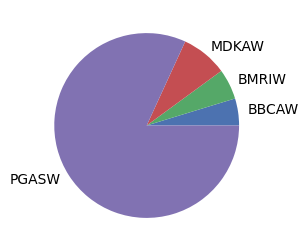

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw4b_call.flatten(), labels = columnw4b_call)
plt.show()

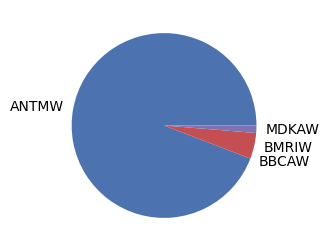

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw4b_put.flatten(), labels = columnw4b_put)
plt.show()

In [ ]:
# Net Asset Value
print (f'Net Asset Value (Call): {np.float(NAVw4b_call)}')
print (f'Net Asset Value (Put): {np.float(NAVw4b_put)}')

Net Asset Value (Call): 27295769.84571226
Net Asset Value (Put): 35227125.98880059


In [ ]:
# Networth if all were sold
print (f'Ending Balance (Call): {np.float(networthw4b_call)}')
print (f'Ending Balance (Put): {np.float(networthw4b_put)}')

Ending Balance (Call): 27227888.34571226
Ending Balance (Put): 35139535.48880059


In [ ]:
monthlyb_call.append(np.float(networthw4b_call))
monthlyb_put.append(np.float(networthw4b_put))
Profit4b = [np.float(networthw4b_call)/monthlyb_call[4]-1, np.float(networthw4b_put)/monthlyb_put[4]-1]
Profit4b = (pd.DataFrame(Profit4b)).T
Profit4b.rename(columns={0:'Binomial call'}, inplace=True)
Profit4b.rename(columns={1:'Binomial put'}, inplace=True)
Profit4b

Binomial call  Binomial put
0      -0.338438     -0.457799

#### Uniform Allocation

In [ ]:
# Uniform allocation
Alloc_Uniform_call4 = [0.2, 0.2, 0.2, 0.2, 0.2]
Alloc_Uniform_put4 = [0.2, 0.2, 0.2, 0.2, 0.2]

Alloc_Uniform4 = pd.DataFrame(Warrant_list)
Alloc_Uniform4 = Alloc_Uniform4.rename(columns={0:'Warrant'})
Alloc_Uniform4.insert(1, "Call", Alloc_Uniform_call4)
Alloc_Uniform4.insert(2, "Put", Alloc_Uniform_put4)

Alloc_Uniform4

Warrant  Call  Put
0   ANTMW   0.2  0.2
1   BBCAW   0.2  0.2
2   BMRIW   0.2  0.2
3   MDKAW   0.2  0.2
4   PGASW   0.2  0.2

In [ ]:
Uniform4_call_weights = {Warrant_list[0]:Alloc_Uniform_call4[0], Warrant_list[1]:Alloc_Uniform_call4[1],
                           Warrant_list[2]:Alloc_Uniform_call4[2], Warrant_list[3]:Alloc_Uniform_call4[3],
                           Warrant_list[4]:Alloc_Uniform_call4[4]}

Uniform4_put_weights = {Warrant_list[0]:Alloc_Uniform_put4[0], Warrant_list[1]:Alloc_Uniform_put4[1],
                           Warrant_list[2]:Alloc_Uniform_put4[2], Warrant_list[3]:Alloc_Uniform_put4[3],
                           Warrant_list[4]:Alloc_Uniform_put4[4]}

In [ ]:
call_buy_price4 = call_buy_price4.squeeze()
put_buy_price4 = put_buy_price4.squeeze()
# Allocation for binomial call method
daw4c_call = DiscreteAllocation(Uniform4_call_weights, MBU_Warrant*call_buy_price4*(1+buy_fee), total_portfolio_value=np.float(networthw3c_call))
allocationw4c_call, leftoverw4c_call = daw4c_call.greedy_portfolio()
print("Discrete allocation:", allocationw4c_call)
print("Funds remaining: IDR {:.2f}".format(leftoverw4c_call))

# Allocation for binomial put method
daw4c_put = DiscreteAllocation(Uniform4_put_weights, MBU_Warrant*put_buy_price4*(1+buy_fee), total_portfolio_value=np.float(networthw3c_put))
allocationw4c_put, leftoverw4c_put = daw4c_put.greedy_portfolio()
print("Discrete allocation:", allocationw4c_put)
print("Funds remaining: IDR {:.2f}".format(leftoverw4c_put))

Discrete allocation: {'ANTMW': 873, 'BBCAW': 367, 'BMRIW': 243, 'MDKAW': 628, 'PGASW': 3670}
Funds remaining: IDR 8050.48
Discrete allocation: {'ANTMW': 6315, 'BBCAW': 930, 'BMRIW': 1308, 'MDKAW': 1606, 'PGASW': 1665}
Funds remaining: IDR 270.07


In [ ]:
portionw4c_call = (pd.DataFrame.from_dict([allocationw4c_call]).T).sort_index()
columnw4c_call = [(portionw4c_call.T).columns[i] for i in range (len(portionw4c_call))]
portion_moneyw4c_call = (np.array(portionw4c_call)).reshape(-1,1)

portionw4c_put = (pd.DataFrame.from_dict([allocationw4c_put]).T).sort_index()
columnw4c_put = [(portionw4c_put.T).columns[i] for i in range (len(portionw4c_put))]
portion_moneyw4c_put = (np.array(portionw4c_put)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustmentsw_c_name_call = Warrant_list
Adjustmentsw_c_quant_call = []
initialw_c_name_call = np.array(portionw3c_call.index)
endingw_c_name_call = np.array(portionw4c_call.index)
for i in range (len(Adjustmentsw_c_name_call)):
  if Adjustmentsw_c_name_call[i] in endingw_c_name_call:
    index = int((np.where(endingw_c_name_call == Adjustmentsw_c_name_call[i]))[0])
    Adjustmentsw_c_quant_call.append(np.array(portion_moneyw4c_call.flatten())[index])
  else:
    Adjustmentsw_c_quant_call.append(0)
for i in range (len(Adjustmentsw_c_name_call)):
  if Adjustmentsw_c_name_call[i] in initialw_c_name_call:
    index = int((np.where(initialw_c_name_call == Adjustmentsw_c_name_call[i]))[0])
    Adjustmentsw_c_quant_call[i] -= np.array(portion_moneyw3c_call.flatten())[index]

Adjustmentsw_c_name_put = Warrant_list
Adjustmentsw_c_quant_put = []
initialw_c_name_put = np.array(portionw3c_put.index)
endingw_c_name_put = np.array(portionw4c_put.index)
for i in range (len(Adjustmentsw_c_name_put)):
  if Adjustmentsw_c_name_put[i] in endingw_c_name_put:
    index = int((np.where(endingw_c_name_put == Adjustmentsw_c_name_put[i]))[0])
    Adjustmentsw_c_quant_put.append(np.array(portion_moneyw4c_put.flatten())[index])
  else:
    Adjustmentsw_c_quant_put.append(0)
for i in range (len(Adjustmentsw_c_name_put)):
  if Adjustmentsw_c_name_put[i] in initialw_c_name_put:
    index = int((np.where(initialw_c_name_put == Adjustmentsw_c_name_put[i]))[0])
    Adjustmentsw_c_quant_put[i] -= np.array(portion_moneyw3c_put.flatten())[index]

In [ ]:
call_buy_price4 = pd.DataFrame(call_buy_price4).T
put_buy_price4 = pd.DataFrame(put_buy_price4).T

# Balance after selling assets (adjustments)
leftoverw4c_call = leftoverw3c_call
for i in range (len(Adjustmentsw_c_name_call)):
  if Adjustmentsw_c_quant_call[i] < 0:
    leftoverw4c_call -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_c_quant_call[i]*(np.array(call_sell_price3).reshape(-1,1))[i])
  elif Adjustmentsw_c_quant_call[i] > 0:
    leftoverw4c_call -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_c_quant_call[i]*(np.array(call_buy_price4).reshape(-1,1))[i])

leftoverw4c_put = leftoverw3c_put
for i in range (len(Adjustmentsw_c_name_put)):
  if Adjustmentsw_c_quant_put[i] < 0:
    leftoverw4c_put -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_c_quant_put[i]*(np.array(put_sell_price3).reshape(-1,1))[i])
  elif Adjustmentsw_c_quant_put[i] > 0:
    leftoverw4c_put -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_c_quant_put[i]*(np.array(put_buy_price4).reshape(-1,1))[i])

In [ ]:
networthw4c_call, NAVw4c_call = 0.0, 0.0
for i in range (len(columnw4c_call)):
  NAVw4c_call += MBU_Warrant*(np.dot(call_sell_price4[call_sell_price4.columns[call_sell_price4.columns.isin([columnw4c_call[i]])]],portion_moneyw4c_call[i]))
  networthw4c_call += (1-sell_fee)*MBU_Warrant*(np.dot(call_sell_price4[call_sell_price4.columns[call_sell_price4.columns.isin([columnw4c_call[i]])]],portion_moneyw4c_call[i]))
leftoverw4c_call = leftoverw4c_call*(1+ir)**(1/12)
NAVw4c_call += leftoverw4c_call
networthw4c_call += leftoverw4c_call
portw4c_call = pd.DataFrame(portion_moneyw4c_call, columns=['Quantity in MBU'])
portw4c_call.insert(0,'Asset Name',columnw4c_call)
portw4c_call = portw4c_call.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw4c_call}, ignore_index=True)
portw4c_call.index = portw4c_call.index+1

networthw4c_put, NAVw4c_put = 0.0, 0.0
for i in range (len(columnw4c_put)):
  NAVw4c_put += MBU_Warrant*(np.dot(put_sell_price4[put_sell_price4.columns[put_sell_price4.columns.isin([columnw4c_put[i]])]],portion_moneyw4c_put[i]))
  networthw4c_put += (1-sell_fee)*MBU_Warrant*(np.dot(put_sell_price4[put_sell_price4.columns[put_sell_price4.columns.isin([columnw4c_put[i]])]],portion_moneyw4c_put[i]))
leftoverw4c_put = leftoverw4c_put*(1+ir)**(1/12)
NAVw4c_put += leftoverw4c_put
networthw4c_put += leftoverw4c_put
portw4c_put = pd.DataFrame(portion_moneyw4c_put, columns=['Quantity in MBU'])
portw4c_put.insert(0,'Asset Name',columnw4c_put)
portw4c_put = portw4c_put.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw4c_put}, ignore_index=True)
portw4c_put.index = portw4c_put.index+1

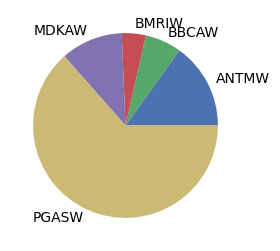

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw4c_call.flatten(), labels = columnw4c_call)
plt.show()

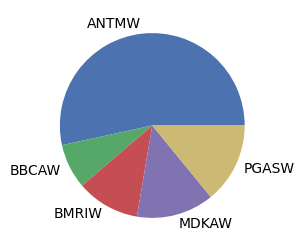

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw4c_put.flatten(), labels = columnw4c_put)
plt.show()

In [ ]:
# Net Asset Value
print (f'Net Asset Value (Call): {np.float(NAVw4c_call)}')
print (f'Net Asset Value (Put): {np.float(NAVw4c_put)}')

Net Asset Value (Call): 34560194.96966844
Net Asset Value (Put): 102431380.56839381


In [ ]:
# Networth if all were sold
print (f'Ending Balance (Call): {np.float(networthw4c_call)}')
print (f'Ending Balance (Put): {np.float(networthw4c_put)}')

Ending Balance (Call): 34474236.46966844
Ending Balance (Put): 102176079.06839381


In [ ]:
monthlyc_call.append(np.float(networthw4c_call))
monthlyc_put.append(np.float(networthw4c_put))
Profit4c = [np.float(networthw4c_call)/monthlyc_call[4]-1, np.float(networthw4c_put)/monthlyc_put[4]-1]
Profit4c = (pd.DataFrame(Profit4c)).T
Profit4c.rename(columns={0:'Binomial call'}, inplace=True)
Profit4c.rename(columns={1:'Binomial put'}, inplace=True)
Profit4c

Binomial call  Binomial put
0      -0.249705      0.114152

#### Price Ratio Allocation

In [ ]:
# Allocation based on fair prices ratios
fair_ratios_call4 = call_sell_price4/np.array(call_buy_price4)
fair_ratios_put4 = put_sell_price4/np.array(put_buy_price4)
max_call4 = max(np.array(fair_ratios_call4).flatten())
min_call4 = min(np.array(fair_ratios_call4).flatten())
max_put4 = max(np.array(fair_ratios_put4).flatten())
min_put4 = min(np.array(fair_ratios_put4).flatten())
fair_ratios_call4s = (fair_ratios_call4-min_call4)/(max_call4-min_call4)
fair_ratios_put4s  = (fair_ratios_put4-min_put4)/(max_put4-min_put4)

# Allocation
Alloc_Fair_call4 = np.array(fair_ratios_call4s/sum(np.array(fair_ratios_call4s).flatten())).flatten()
Alloc_Fair_put4 = np.array(fair_ratios_put4s/sum(np.array(fair_ratios_put4s).flatten())).flatten()

Alloc_Fair4 = pd.DataFrame(Warrant_list)
Alloc_Fair4 = Alloc_Fair4.rename(columns={0:'Warrant'})
Alloc_Fair4.insert(1,"Call Binomial", Alloc_Fair_call4)
Alloc_Fair4.insert(2,"Put Binomial", Alloc_Fair_put4)
Alloc_Fair4

Warrant  Call Binomial  Put Binomial
0   ANTMW       0.392535      0.000000
1   BBCAW       0.294586      0.116840
2   BMRIW       0.238720      0.472892
3   MDKAW       0.074160      0.117606
4   PGASW       0.000000      0.292662

In [ ]:
Fair_call4_weights = {Warrant_list[0]:Alloc_Fair_call4[0], Warrant_list[1]:Alloc_Fair_call4[1],
                           Warrant_list[2]:Alloc_Fair_call4[2], Warrant_list[3]:Alloc_Fair_call4[3],
                           Warrant_list[4]:Alloc_Fair_call4[4]}

Fair_put4_weights = {Warrant_list[0]:Alloc_Fair_put4[0], Warrant_list[1]:Alloc_Fair_put4[1],
                           Warrant_list[2]:Alloc_Fair_put4[2], Warrant_list[3]:Alloc_Fair_put4[3],
                           Warrant_list[4]:Alloc_Fair_put4[4]}

In [ ]:
call_buy_price4 = call_buy_price4.squeeze()
put_buy_price4 = put_buy_price4.squeeze()
# Allocation for binomial call method
daw4d_call = DiscreteAllocation(Fair_call4_weights, MBU_Warrant*call_buy_price4*(1+buy_fee), total_portfolio_value=np.float(networthw3d_call))
allocationw4d_call, leftoverw4d_call = daw4d_call.greedy_portfolio()
print("Discrete allocation:", allocationw4d_call)
print("Funds remaining: IDR {:.2f}".format(leftoverw4d_call))

# Allocation for binomial put method
daw4d_put = DiscreteAllocation(Fair_put4_weights, MBU_Warrant*put_buy_price4*(1+buy_fee), total_portfolio_value=np.float(networthw3d_put))
allocationw4d_put, leftoverw4d_put = daw4d_put.greedy_portfolio()
print("Discrete allocation:", allocationw4d_put)
print("Funds remaining: IDR {:.2f}".format(leftoverw4d_put))

Discrete allocation: {'ANTMW': 2683, 'BBCAW': 846, 'BMRIW': 453, 'MDKAW': 365}
Funds remaining: IDR 2852.90
Discrete allocation: {'BMRIW': 6809, 'PGASW': 5363, 'MDKAW': 2079, 'BBCAW': 1196}
Funds remaining: IDR 3384.79


In [ ]:
portionw4d_call = (pd.DataFrame.from_dict([allocationw4d_call]).T).sort_index()
columnw4d_call = [(portionw4d_call.T).columns[i] for i in range (len(portionw4d_call))]
portion_moneyw4d_call = (np.array(portionw4d_call)).reshape(-1,1)

portionw4d_put = (pd.DataFrame.from_dict([allocationw4d_put]).T).sort_index()
columnw4d_put = [(portionw4d_put.T).columns[i] for i in range (len(portionw4d_put))]
portion_moneyw4d_put = (np.array(portionw4d_put)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustmentsw_d_name_call = Warrant_list
Adjustmentsw_d_quant_call = []
initialw_d_name_call = np.array(portionw3d_call.index)
endingw_d_name_call = np.array(portionw4d_call.index)
for i in range (len(Adjustmentsw_d_name_call)):
  if Adjustmentsw_d_name_call[i] in endingw_d_name_call:
    index = int((np.where(endingw_d_name_call == Adjustmentsw_d_name_call[i]))[0])
    Adjustmentsw_d_quant_call.append(np.array(portion_moneyw4d_call.flatten())[index])
  else:
    Adjustmentsw_d_quant_call.append(0)
for i in range (len(Adjustmentsw_d_name_call)):
  if Adjustmentsw_d_name_call[i] in initialw_d_name_call:
    index = int((np.where(initialw_d_name_call == Adjustmentsw_d_name_call[i]))[0])
    Adjustmentsw_d_quant_call[i] -= np.array(portion_moneyw3d_call.flatten())[index]

Adjustmentsw_d_name_put = Warrant_list
Adjustmentsw_d_quant_put = []
initialw_d_name_put = np.array(portionw3d_put.index)
endingw_d_name_put = np.array(portionw4d_put.index)
for i in range (len(Adjustmentsw_d_name_put)):
  if Adjustmentsw_d_name_put[i] in endingw_d_name_put:
    index = int((np.where(endingw_d_name_put == Adjustmentsw_d_name_put[i]))[0])
    Adjustmentsw_d_quant_put.append(np.array(portion_moneyw4d_put.flatten())[index])
  else:
    Adjustmentsw_d_quant_put.append(0)
for i in range (len(Adjustmentsw_d_name_put)):
  if Adjustmentsw_d_name_put[i] in initialw_d_name_put:
    index = int((np.where(initialw_d_name_put == Adjustmentsw_d_name_put[i]))[0])
    Adjustmentsw_d_quant_put[i] -= np.array(portion_moneyw3d_put.flatten())[index]

In [ ]:
call_buy_price4 = pd.DataFrame(call_buy_price4).T
put_buy_price4 = pd.DataFrame(put_buy_price4).T

# Balance after selling assets (adjustments)
leftoverw4d_call = leftoverw3d_call
for i in range (len(Adjustmentsw_d_name_call)):
  if Adjustmentsw_d_quant_call[i] < 0:
    leftoverw4d_call -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_d_quant_call[i]*(np.array(call_sell_price3).reshape(-1,1))[i])
  elif Adjustmentsw_d_quant_call[i] > 0:
    leftoverw4d_call -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_d_quant_call[i]*(np.array(call_buy_price4).reshape(-1,1))[i])

leftoverw4d_put = leftoverw3d_put
for i in range (len(Adjustmentsw_d_name_put)):
  if Adjustmentsw_d_quant_put[i] < 0:
    leftoverw4d_put -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_d_quant_put[i]*(np.array(put_sell_price3).reshape(-1,1))[i])
  elif Adjustmentsw_d_quant_put[i] > 0:
    leftoverw4d_put -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_d_quant_put[i]*(np.array(put_buy_price4).reshape(-1,1))[i])

In [ ]:
portion_moneyw4d_call = (np.array(portion_moneyw4d_call)).reshape(-1,1)
networthw4d_call, NAVw4d_call = 0.0, 0.0
for i in range (len(columnw4d_call)):
  NAVw4d_call += MBU_Warrant*(np.dot(call_sell_price4[call_sell_price4.columns[call_sell_price4.columns.isin([columnw4d_call[i]])]],portion_moneyw4d_call[i]))
  networthw4d_call += (1-sell_fee)*MBU_Warrant*(np.dot(call_sell_price4[call_sell_price4.columns[call_sell_price4.columns.isin([columnw4d_call[i]])]],portion_moneyw4d_call[i]))
leftoverw4d_call = leftoverw4d_call*(1+ir)**(1/12)
NAVw4d_call += leftoverw4d_call
networthw4d_call += leftoverw4d_call
portw4d_call = pd.DataFrame(portion_moneyw4d_call, columns=['Quantity in MBU'])
portw4d_call.insert(0,'Asset Name',columnw4d_call)
portw4d_call = portw4d_call.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw4d_call}, ignore_index=True)
portw4d_call.index = portw4d_call.index+1

portion_moneyw4d_put = (np.array(portion_moneyw4d_put)).reshape(-1,1)
networthw4d_put, NAVw4d_put = 0.0, 0.0
for i in range (len(columnw4d_put)):
  NAVw4d_put += MBU_Warrant*(np.dot(put_sell_price4[put_sell_price4.columns[put_sell_price4.columns.isin([columnw4d_put[i]])]],portion_moneyw4d_put[i]))
  networthw4d_put += (1-sell_fee)*MBU_Warrant*(np.dot(put_sell_price4[put_sell_price4.columns[put_sell_price4.columns.isin([columnw4d_put[i]])]],portion_moneyw4d_put[i]))
leftoverw4d_put = leftoverw4d_put*(1+ir)**(1/12)
NAVw4d_put += leftoverw4d_put
networthw4d_put += leftoverw4d_put
portw4d_put = pd.DataFrame(portion_moneyw4d_put, columns=['Quantity in MBU'])
portw4d_put.insert(0,'Asset Name',columnw4d_put)
portw4d_put = portw4d_put.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw4d_put}, ignore_index=True)
portw4d_put.index = portw4d_put.index+1

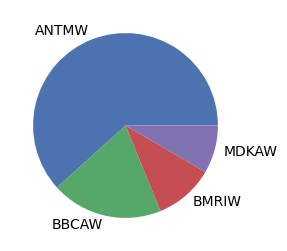

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw4d_call.flatten(), labels = columnw4d_call)
plt.show()

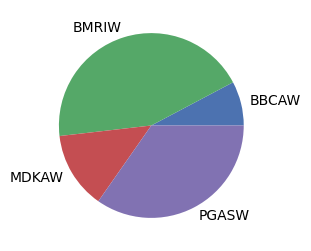

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw4d_put.flatten(), labels = columnw4d_put)
plt.show()

In [ ]:
# Net Asset Value
print (f'Net Asset Value (Call): {np.float(NAVw4d_call)}')
print (f'Net Asset Value (Put): {np.float(NAVw4d_put)}')

Net Asset Value (Call): 65428029.980081886
Net Asset Value (Put): 369279997.8737023


In [ ]:
# Networth if all were sold
print (f'Ending Balance (Call): {np.float(networthw4d_call)}')
print (f'Ending Balance (Put): {np.float(networthw4d_put)}')

Ending Balance (Call): 65264825.730081886
Ending Balance (Put): 368357418.3737023


In [ ]:
monthlyd_call.append(np.float(networthw4d_call))
monthlyd_put.append(np.float(networthw4d_put))
Profit4d = [np.float(networthw4d_call)/monthlyd_call[4]-1, np.float(networthw4d_put)/monthlyd_put[4]-1]
Profit4d = (pd.DataFrame(Profit4d)).T
Profit4d.rename(columns={0:'Binomial call'}, inplace=True)
Profit4d.rename(columns={1:'Binomial put'}, inplace=True)
Profit4d

Binomial call  Binomial put
0      -0.092087      0.824576

### Period 5

#### Price List

In [ ]:
Call_warrant_price5 = pd.read_excel('Data Waran Final.xlsx', sheet_name='Price 5').squeeze('columns')
Call_warrant_price5

Dates  ANTMW  BBCAW  BMRIW  MDKAW  PGASW
0  2023-04-10    110    224    306     81     11
1  2023-04-11    130    216    288     99     11
2  2023-04-12    130    224    316     99     11
3  2023-04-13    133    222    300     91     10
4  2023-04-14    134    234    322    123      8
5  2023-04-17    124    210    268     85      8
6  2023-04-18    118    230    274     65      6
7  2023-04-26    115    187    230     35      4
8  2023-04-27    108    182    214     37      4
9  2023-04-28    106    167    204     32      4
10 2023-05-02     90    115    164     15      3
11 2023-05-03    105     93    143     14      5
12 2023-05-04    108     90    150     14      4
13 2023-05-05    108     86    122      2      3

In [ ]:
# Binomial return array
Call_return5 = pd.DataFrame(ANTMW_Call_binom_return5)
Call_return5 = Call_return5.rename(columns={0:'ANTMW'})
Call_return5.insert(1,"BBCAW", pd.DataFrame(BBCAW_Call_binom_return5))
Call_return5.insert(2,"BMRIW", pd.DataFrame(BMRIW_Call_binom_return5))
Call_return5.insert(3,"MDKAW", pd.DataFrame(MDKAW_Call_binom_return5))
Call_return5.insert(4,"PGASW", pd.DataFrame(PGASW_Call_binom_return5))
Mean_Call_return5 = [part*np.mean(Call_return5['ANTMW']),
                           part*np.mean(Call_return5['BBCAW']),
                           part*np.mean(Call_return5['BMRIW']),
                           part*np.mean(Call_return5['MDKAW']),
                           part*np.mean(Call_return5['PGASW'])]
Put_return5 = pd.DataFrame(ANTMW_Put_binom_return5)
Put_return5 = Put_return5.rename(columns={0:'ANTMW'})
Put_return5.insert(1,"BBCAW", pd.DataFrame(BBCAW_Put_binom_return5))
Put_return5.insert(2,"BMRIW", pd.DataFrame(BMRIW_Put_binom_return5))
Put_return5.insert(3,"MDKAW", pd.DataFrame(MDKAW_Put_binom_return5))
Put_return5.insert(4,"PGASW", pd.DataFrame(PGASW_Put_binom_return5))
Mean_Put_return5 = [part*np.mean(Put_return5['ANTMW']),
                           part*np.mean(Put_return5['BBCAW']),
                           part*np.mean(Put_return5['BMRIW']),
                           part*np.mean(Put_return5['MDKAW']),
                           part*np.mean(Put_return5['PGASW'])]

In [ ]:
# Call Buy prices and Sell prices
call_buy_price5 = pd.DataFrame(Call_warrant_price5.loc[Call_warrant_price5.index[0]]).T
call_buy_price5 = call_buy_price5.drop(columns=['Dates'])
call_buy_price5 = pd.DataFrame(call_buy_price5,dtype=float)
call_sell_price5 = pd.DataFrame(Call_warrant_price5.loc[Call_warrant_price5.index[len(Call_warrant_price5)-1]]).T
call_sell_price5 = call_sell_price5.drop(columns=['Dates'])
call_sell_price5 = pd.DataFrame(call_sell_price5,dtype=float)

In [ ]:
# Put Buy prices and Sell prices
put_initial = [int(ANTM_Put_Warrant[5]), int(BBCA_Put_Warrant[5]), int(BMRI_Put_Warrant[5]), int(MDKA_Put_Warrant[5]), int(PGAS_Put_Warrant[5])]
put_sell = [int(ANTM_Put_Warrant[6]), int(BBCA_Put_Warrant[6]), int(BMRI_Put_Warrant[6]), int(MDKA_Put_Warrant[6]), int(PGAS_Put_Warrant[6])]
put_buy_price5 = pd.DataFrame(put_initial).T
put_buy_price5 = put_buy_price5.rename({0:'ANTMW', 1:'BBCAW', 2:'BMRIW', 3:'MDKAW', 4:'PGASW'}, axis='columns')
put_buy_price5 = put_buy_price5.loc[put_buy_price5.index[0]]
put_sell_price5 = pd.DataFrame(put_sell).T
put_sell_price5 = put_sell_price5.rename({0:'ANTMW', 1:'BBCAW', 2:'BMRIW', 3:'MDKAW', 4:'PGASW'}, axis='columns')

#### Raw Return Allocation

In [ ]:
# Allocation based on returns
Mean_Call_return5_adj = [max(Mean_Call_return5[i],0) for i in range (len(Mean_Call_return5))]
Mean_Put_return5_adj = [max(Mean_Put_return5[i],0) for i in range (len(Mean_Put_return5))]
Alloc_Raw_call5 = Mean_Call_return5_adj / sum(Mean_Call_return5_adj)
Alloc_Raw_put5 = Mean_Put_return5_adj / sum(Mean_Put_return5_adj)

Alloc_Raw5 = pd.DataFrame(Warrant_list)
Alloc_Raw5 = Alloc_Raw5.rename(columns={0:'Warrant'})
Alloc_Raw5.insert(1,"Call Binomial", Alloc_Raw_call5)
Alloc_Raw5.insert(2,"Put Binomial", Alloc_Raw_put5)
Alloc_Raw5

Warrant  Call Binomial  Put Binomial
0   ANTMW       0.000000      0.819750
1   BBCAW       0.154830      0.000000
2   BMRIW       0.096464      0.158559
3   MDKAW       0.748706      0.021280
4   PGASW       0.000000      0.000411

In [ ]:
Raw_call5_weights = {Warrant_list[0]:Alloc_Raw_call5[0], Warrant_list[1]:Alloc_Raw_call5[1],
                           Warrant_list[2]:Alloc_Raw_call5[2], Warrant_list[3]:Alloc_Raw_call5[3],
                           Warrant_list[4]:Alloc_Raw_call5[4]}

Raw_put5_weights = {Warrant_list[0]:Alloc_Raw_put5[0], Warrant_list[1]:Alloc_Raw_put5[1],
                           Warrant_list[2]:Alloc_Raw_put5[2], Warrant_list[3]:Alloc_Raw_put5[3],
                           Warrant_list[4]:Alloc_Raw_put5[4]}

In [ ]:
call_buy_price5 = call_buy_price5.squeeze()
put_buy_price5 = put_buy_price5.squeeze()
# Allocation for binomial call method
daw5a_call = DiscreteAllocation(Raw_call5_weights, MBU_Warrant*call_buy_price5*(1+buy_fee), total_portfolio_value=np.float(networthw4a_call))
allocationw5a_call, leftoverw5a_call = daw5a_call.greedy_portfolio()
print("Discrete allocation:", allocationw5a_call)
print("Funds remaining: IDR {:.2f}".format(leftoverw5a_call))

# Allocation for binomial put method
daw5a_put = DiscreteAllocation(Raw_put5_weights, MBU_Warrant*put_buy_price5*(1+buy_fee), total_portfolio_value=np.float(networthw4a_put))
allocationw5a_put, leftoverw5a_put = daw5a_put.greedy_portfolio()
print("Discrete allocation:", allocationw5a_put)
print("Funds remaining: IDR {:.2f}".format(leftoverw5a_put))

Discrete allocation: {'MDKAW': 2598, 'BBCAW': 195, 'BMRIW': 88}
Funds remaining: IDR 4772.12
Discrete allocation: {'ANTMW': 147218, 'BMRIW': 160, 'MDKAW': 97, 'PGASW': 1}
Funds remaining: IDR 4176.26


In [ ]:
portionw5a_call = (pd.DataFrame.from_dict([allocationw5a_call]).T).sort_index()
columnw5a_call = [(portionw5a_call.T).columns[i] for i in range (len(portionw5a_call))]
portion_moneyw5a_call = (np.array(portionw5a_call)).reshape(-1,1)

portionw5a_put = (pd.DataFrame.from_dict([allocationw5a_put]).T).sort_index()
columnw5a_put = [(portionw5a_put.T).columns[i] for i in range (len(portionw5a_put))]
portion_moneyw5a_put = (np.array(portionw5a_put)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustmentsw_a_name_call = Warrant_list
Adjustmentsw_a_quant_call = []
initialw_a_name_call = np.array(portionw4a_call.index)
endingw_a_name_call = np.array(portionw5a_call.index)
for i in range (len(Adjustmentsw_a_name_call)):
  if Adjustmentsw_a_name_call[i] in endingw_a_name_call:
    index = int((np.where(endingw_a_name_call == Adjustmentsw_a_name_call[i]))[0])
    Adjustmentsw_a_quant_call.append(np.array(portion_moneyw5a_call.flatten())[index])
  else:
    Adjustmentsw_a_quant_call.append(0)
for i in range (len(Adjustmentsw_a_name_call)):
  if Adjustmentsw_a_name_call[i] in initialw_a_name_call:
    index = int((np.where(initialw_a_name_call == Adjustmentsw_a_name_call[i]))[0])
    Adjustmentsw_a_quant_call[i] -= np.array(portion_moneyw4a_call.flatten())[index]

Adjustmentsw_a_name_put = Warrant_list
Adjustmentsw_a_quant_put = []
initialw_a_name_put = np.array(portionw4a_put.index)
endingw_a_name_put = np.array(portionw5a_put.index)
for i in range (len(Adjustmentsw_a_name_put)):
  if Adjustmentsw_a_name_put[i] in endingw_a_name_put:
    index = int((np.where(endingw_a_name_put == Adjustmentsw_a_name_put[i]))[0])
    Adjustmentsw_a_quant_put.append(np.array(portion_moneyw5a_put.flatten())[index])
  else:
    Adjustmentsw_a_quant_put.append(0)
for i in range (len(Adjustmentsw_a_name_put)):
  if Adjustmentsw_a_name_put[i] in initialw_a_name_put:
    index = int((np.where(initialw_a_name_put == Adjustmentsw_a_name_put[i]))[0])
    Adjustmentsw_a_quant_put[i] -= np.array(portion_moneyw4a_put.flatten())[index]

In [ ]:
call_buy_price5 = pd.DataFrame(call_buy_price5).T
put_buy_price5 = pd.DataFrame(put_buy_price5).T

# Balance after selling assets (adjustments)
leftoverw5a_call = leftoverw4a_call
for i in range (len(Adjustmentsw_a_name_call)):
  if Adjustmentsw_a_quant_call[i] < 0:
    leftoverw5a_call -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_a_quant_call[i]*(np.array(call_sell_price4).reshape(-1,1))[i])
  elif Adjustmentsw_a_quant_call[i] > 0:
    leftoverw5a_call -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_a_quant_call[i]*(np.array(call_buy_price5).reshape(-1,1))[i])

leftoverw5a_put = leftoverw4a_put
for i in range (len(Adjustmentsw_a_name_put)):
  if Adjustmentsw_a_quant_put[i] < 0:
    leftoverw5a_put -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_a_quant_put[i]*(np.array(put_sell_price4).reshape(-1,1))[i])
  elif Adjustmentsw_a_quant_put[i] > 0:
    leftoverw5a_put -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_a_quant_put[i]*(np.array(put_buy_price5).reshape(-1,1))[i])

In [ ]:
networthw5a_call, NAVw5a_call = 0.0, 0.0
for i in range (len(columnw5a_call)):
  NAVw5a_call += MBU_Warrant*(np.dot(call_sell_price5[call_sell_price5.columns[call_sell_price5.columns.isin([columnw5a_call[i]])]],portion_moneyw5a_call[i]))
  networthw5a_call += (1-sell_fee)*MBU_Warrant*(np.dot(call_sell_price5[call_sell_price5.columns[call_sell_price5.columns.isin([columnw5a_call[i]])]],portion_moneyw5a_call[i]))
leftoverw5a_call = leftoverw5a_call*(1+ir)**(1/12)
NAVw5a_call += leftoverw5a_call
networthw5a_call += leftoverw5a_call
portw5a_call = pd.DataFrame(portion_moneyw5a_call, columns=['Quantity in MBU'])
portw5a_call.insert(0,'Asset Name',columnw5a_call)
portw5a_call = portw5a_call.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw5a_call}, ignore_index=True)
portw5a_call.index = portw5a_call.index+1

networthw5a_put, NAVw5a_put = 0.0, 0.0
for i in range (len(columnw5a_put)):
  NAVw5a_put += MBU_Warrant*(np.dot(put_sell_price5[put_sell_price5.columns[put_sell_price5.columns.isin([columnw5a_put[i]])]],portion_moneyw5a_put[i]))
  networthw5a_put += (1-sell_fee)*MBU_Warrant*(np.dot(put_sell_price5[put_sell_price5.columns[put_sell_price5.columns.isin([columnw5a_put[i]])]],portion_moneyw5a_put[i]))
leftoverw5a_put = leftoverw5a_put*(1+ir)**(1/12)
NAVw5a_put += leftoverw5a_put
networthw5a_put += leftoverw5a_put
portw5a_put = pd.DataFrame(portion_moneyw5a_put, columns=['Quantity in MBU'])
portw5a_put.insert(0,'Asset Name',columnw5a_put)
portw5a_put = portw5a_put.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw5a_put}, ignore_index=True)
portw5a_put.index = portw5a_put.index+1

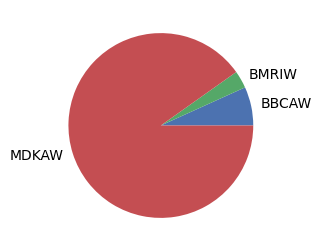

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw5a_call.flatten(), labels = columnw5a_call)
plt.show()

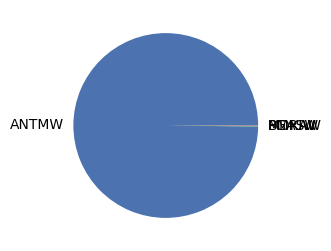

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw5a_put.flatten(), labels = columnw5a_put)
plt.show()

In [ ]:
# Net Asset Value
print (f'Net Asset Value (Call): {np.float(NAVw5a_call)}')
print (f'Net Asset Value (Put): {np.float(NAVw5a_put)}')

Net Asset Value (Call): 3320714.151655429
Net Asset Value (Put): 3786089.9028293137


In [ ]:
# Networth if all were sold
print (f'Ending Balance (Call): {np.float(networthw5a_call)}')
print (f'Ending Balance (Put): {np.float(networthw5a_put)}')

Ending Balance (Call): 3312538.651655429
Ending Balance (Put): 3776735.6528293137


In [ ]:
monthlya_call.append(np.float(networthw5a_call))
monthlya_put.append(np.float(networthw5a_put))
Profit5a = [np.float(networthw5a_call)/monthlya_call[5]-1, np.float(networthw5a_put)/monthlya_put[5]-1]
Profit5a = (pd.DataFrame(Profit5a)).T
Profit5a.rename(columns={0:'Binomial call'}, inplace=True)
Profit5a.rename(columns={1:'Binomial put'}, inplace=True)
Profit5a

Binomial call  Binomial put
0      -0.882332     -0.895009

#### Scaled Return Allocation

In [ ]:
# Scaled mean returns
Mean_Call_return5s = (Mean_Call_return5-min(Mean_Call_return5))/(max(Mean_Call_return5)-min(Mean_Call_return5))
Mean_Put_return5s = (Mean_Put_return5-min(Mean_Put_return5))/(max(Mean_Put_return5)-min(Mean_Put_return5))

# Allocation based on returns
Alloc_Scaled_call5 = Mean_Call_return5s / sum(Mean_Call_return5s)
Alloc_Scaled_put5 = Mean_Put_return5s / sum(Mean_Put_return5s)

Alloc_Scaled5 = pd.DataFrame(Warrant_list)
Alloc_Scaled5 = Alloc_Scaled5.rename(columns={0:'Warrant'})
Alloc_Scaled5.insert(1,"Call Binomial", Alloc_Scaled_call5)
Alloc_Scaled5.insert(2,"Put Binomial", Alloc_Scaled_put5)
Alloc_Scaled5

Warrant  Call Binomial  Put Binomial
0   ANTMW       0.000000      0.802282
1   BBCAW       0.155598      0.000000
2   BMRIW       0.097702      0.161362
3   MDKAW       0.744682      0.028293
4   PGASW       0.002017      0.008063

In [ ]:
Scaled_call5_weights = {Warrant_list[0]:Alloc_Scaled_call5[0], Warrant_list[1]:Alloc_Scaled_call5[1],
                           Warrant_list[2]:Alloc_Scaled_call5[2], Warrant_list[3]:Alloc_Scaled_call5[3],
                           Warrant_list[4]:Alloc_Scaled_call5[4]}

Scaled_put5_weights = {Warrant_list[0]:Alloc_Scaled_put5[0], Warrant_list[1]:Alloc_Scaled_put5[1],
                           Warrant_list[2]:Alloc_Scaled_put5[2], Warrant_list[3]:Alloc_Scaled_put5[3],
                           Warrant_list[4]:Alloc_Scaled_put5[4]}

In [ ]:
call_buy_price5 = call_buy_price5.squeeze()
put_buy_price5 = put_buy_price5.squeeze()
# Allocation for binomial call method
daw5b_call = DiscreteAllocation(Scaled_call5_weights, MBU_Warrant*call_buy_price5*(1+buy_fee), total_portfolio_value=np.float(networthw4b_call))
allocationw5b_call, leftoverw5b_call = daw5b_call.greedy_portfolio()
print("Discrete allocation:", allocationw5b_call)
print("Funds remaining: IDR {:.2f}".format(leftoverw5b_call))

# Allocation for binomial put method
daw5b_put = DiscreteAllocation(Scaled_put5_weights, MBU_Warrant*put_buy_price5*(1+buy_fee), total_portfolio_value=np.float(networthw4b_put))
allocationw5b_put, leftoverw5b_put = daw5b_put.greedy_portfolio()
print("Discrete allocation:", allocationw5b_put)
print("Funds remaining: IDR {:.2f}".format(leftoverw5b_put))

Discrete allocation: {'MDKAW': 2499, 'BBCAW': 188, 'BMRIW': 87, 'PGASW': 50}
Funds remaining: IDR 16832.90
Discrete allocation: {'ANTMW': 140748, 'BMRIW': 159, 'MDKAW': 127, 'PGASW': 16}
Funds remaining: IDR 4712.19


In [ ]:
portionw5b_call = (pd.DataFrame.from_dict([allocationw5b_call]).T).sort_index()
columnw5b_call = [(portionw5b_call.T).columns[i] for i in range (len(portionw5b_call))]
portion_moneyw5b_call = (np.array(portionw5b_call)).reshape(-1,1)

portionw5b_put = (pd.DataFrame.from_dict([allocationw5b_put]).T).sort_index()
columnw5b_put = [(portionw5b_put.T).columns[i] for i in range (len(portionw5b_put))]
portion_moneyw5b_put = (np.array(portionw5b_put)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustmentsw_b_name_call = Warrant_list
Adjustmentsw_b_quant_call = []
initialw_b_name_call = np.array(portionw4b_call.index)
endingw_b_name_call = np.array(portionw5b_call.index)
for i in range (len(Adjustmentsw_b_name_call)):
  if Adjustmentsw_b_name_call[i] in endingw_b_name_call:
    index = int((np.where(endingw_b_name_call == Adjustmentsw_b_name_call[i]))[0])
    Adjustmentsw_b_quant_call.append(np.array(portion_moneyw5b_call.flatten())[index])
  else:
    Adjustmentsw_b_quant_call.append(0)
for i in range (len(Adjustmentsw_b_name_call)):
  if Adjustmentsw_b_name_call[i] in initialw_b_name_call:
    index = int((np.where(initialw_b_name_call == Adjustmentsw_b_name_call[i]))[0])
    Adjustmentsw_b_quant_call[i] -= np.array(portion_moneyw4b_call.flatten())[index]

Adjustmentsw_b_name_put = Warrant_list
Adjustmentsw_b_quant_put = []
initialw_b_name_put = np.array(portionw4b_put.index)
endingw_b_name_put = np.array(portionw5b_put.index)
for i in range (len(Adjustmentsw_b_name_put)):
  if Adjustmentsw_b_name_put[i] in endingw_b_name_put:
    index = int((np.where(endingw_b_name_put == Adjustmentsw_b_name_put[i]))[0])
    Adjustmentsw_b_quant_put.append(np.array(portion_moneyw5b_put.flatten())[index])
  else:
    Adjustmentsw_b_quant_put.append(0)
for i in range (len(Adjustmentsw_b_name_put)):
  if Adjustmentsw_b_name_put[i] in initialw_b_name_put:
    index = int((np.where(initialw_b_name_put == Adjustmentsw_b_name_put[i]))[0])
    Adjustmentsw_b_quant_put[i] -= np.array(portion_moneyw4b_put.flatten())[index]

In [ ]:
call_buy_price5 = pd.DataFrame(call_buy_price5).T
put_buy_price5 = pd.DataFrame(put_buy_price5).T

# Balance after selling assets (adjustments)
leftoverw5b_call = leftoverw4b_call
for i in range (len(Adjustmentsw_b_name_call)):
  if Adjustmentsw_b_quant_call[i] < 0:
    leftoverw5b_call -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_b_quant_call[i]*(np.array(call_sell_price4).reshape(-1,1))[i])
  elif Adjustmentsw_b_quant_call[i] > 0:
    leftoverw5b_call -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_b_quant_call[i]*(np.array(call_buy_price5).reshape(-1,1))[i])

leftoverw5b_put = leftoverw4b_put
for i in range (len(Adjustmentsw_b_name_put)):
  if Adjustmentsw_b_quant_put[i] < 0:
    leftoverw5b_put -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_b_quant_put[i]*(np.array(put_sell_price4).reshape(-1,1))[i])
  elif Adjustmentsw_b_quant_put[i] > 0:
    leftoverw5b_put -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_b_quant_put[i]*(np.array(put_buy_price5).reshape(-1,1))[i])

In [ ]:
networthw5b_call, NAVw5b_call = 0.0, 0.0
for i in range (len(columnw5b_call)):
  NAVw5b_call += MBU_Warrant*(np.dot(call_sell_price5[call_sell_price5.columns[call_sell_price5.columns.isin([columnw5b_call[i]])]],portion_moneyw5b_call[i]))
  networthw5b_call += (1-sell_fee)*MBU_Warrant*(np.dot(call_sell_price5[call_sell_price5.columns[call_sell_price5.columns.isin([columnw5b_call[i]])]],portion_moneyw5b_call[i]))
leftoverw5b_call = leftoverw5b_call*(1+ir)**(1/12)
NAVw5b_call += leftoverw5b_call
networthw5b_call += leftoverw5b_call
portw5b_call = pd.DataFrame(portion_moneyw5b_call, columns=['Quantity in MBU'])
portw5b_call.insert(0,'Asset Name',columnw5b_call)
portw5b_call = portw5b_call.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw5b_call}, ignore_index=True)
portw5b_call.index = portw5b_call.index+1

networthw5b_put, NAVw5b_put = 0.0, 0.0
for i in range (len(columnw5b_put)):
  NAVw5b_put += MBU_Warrant*(np.dot(put_sell_price5[put_sell_price5.columns[put_sell_price5.columns.isin([columnw5b_put[i]])]],portion_moneyw5b_put[i]))
  networthw5b_put += (1-sell_fee)*MBU_Warrant*(np.dot(put_sell_price5[put_sell_price5.columns[put_sell_price5.columns.isin([columnw5b_put[i]])]],portion_moneyw5b_put[i]))
leftoverw5b_put = leftoverw5b_put*(1+ir)**(1/12)
NAVw5b_put += leftoverw5b_put
networthw5b_put += leftoverw5b_put
portw5b_put = pd.DataFrame(portion_moneyw5b_put, columns=['Quantity in MBU'])
portw5b_put.insert(0,'Asset Name',columnw5b_put)
portw5b_put = portw5b_put.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw5b_put}, ignore_index=True)
portw5b_put.index = portw5b_put.index+1

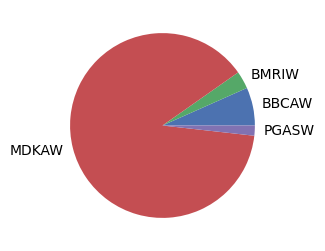

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw5b_call.flatten(), labels = columnw5b_call)
plt.show()

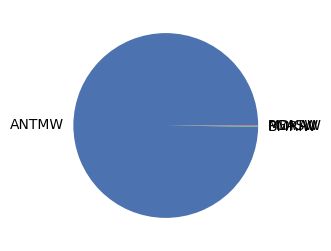

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw5b_put.flatten(), labels = columnw5b_put)
plt.show()

In [ ]:
# Net Asset Value
print (f'Net Asset Value (Call): {np.float(NAVw5b_call)}')
print (f'Net Asset Value (Put): {np.float(NAVw5b_put)}')

Net Asset Value (Call): 3254530.4731769403
Net Asset Value (Put): 4404336.925790941


In [ ]:
# Networth if all were sold
print (f'Ending Balance (Call): {np.float(networthw5b_call)}')
print (f'Ending Balance (Put): {np.float(networthw5b_put)}')

Ending Balance (Call): 3246547.9731769403
Ending Balance (Put): 4393439.425790941


In [ ]:
monthlyb_call.append(np.float(networthw5b_call))
monthlyb_put.append(np.float(networthw5b_put))
Profit5b = [np.float(networthw5b_call)/monthlyb_call[5]-1, np.float(networthw5b_put)/monthlyb_put[5]-1]
Profit5b = (pd.DataFrame(Profit5b)).T
Profit5b.rename(columns={0:'Binomial call'}, inplace=True)
Profit5b.rename(columns={1:'Binomial put'}, inplace=True)
Profit5b

Binomial call  Binomial put
0      -0.880764     -0.874972

#### Uniform Allocation

In [ ]:
# Uniform allocation
Alloc_Uniform_call5 = [0.2, 0.2, 0.2, 0.2, 0.2]
Alloc_Uniform_put5 = [0.2, 0.2, 0.2, 0.2, 0.2]

Alloc_Uniform5 = pd.DataFrame(Warrant_list)
Alloc_Uniform5 = Alloc_Uniform5.rename(columns={0:'Warrant'})
Alloc_Uniform5.insert(1, "Call", Alloc_Uniform_call5)
Alloc_Uniform5.insert(2, "Put", Alloc_Uniform_put5)

Alloc_Uniform5

Warrant  Call  Put
0   ANTMW   0.2  0.2
1   BBCAW   0.2  0.2
2   BMRIW   0.2  0.2
3   MDKAW   0.2  0.2
4   PGASW   0.2  0.2

In [ ]:
Uniform5_call_weights = {Warrant_list[0]:Alloc_Uniform_call5[0], Warrant_list[1]:Alloc_Uniform_call5[1],
                           Warrant_list[2]:Alloc_Uniform_call5[2], Warrant_list[3]:Alloc_Uniform_call5[3],
                           Warrant_list[4]:Alloc_Uniform_call5[4]}

Uniform5_put_weights = {Warrant_list[0]:Alloc_Uniform_put5[0], Warrant_list[1]:Alloc_Uniform_put5[1],
                           Warrant_list[2]:Alloc_Uniform_put5[2], Warrant_list[3]:Alloc_Uniform_put5[3],
                           Warrant_list[4]:Alloc_Uniform_put5[4]}

In [ ]:
call_buy_price5 = call_buy_price5.squeeze()
put_buy_price5 = put_buy_price5.squeeze()
# Allocation for binomial call method
daw5c_call = DiscreteAllocation(Uniform5_call_weights, MBU_Warrant*call_buy_price5*(1+buy_fee), total_portfolio_value=np.float(networthw4c_call))
allocationw5c_call, leftoverw5c_call = daw5c_call.greedy_portfolio()
print("Discrete allocation:", allocationw5c_call)
print("Funds remaining: IDR {:.2f}".format(leftoverw5c_call))

# Allocation for binomial put method
daw5c_put = DiscreteAllocation(Uniform5_put_weights, MBU_Warrant*put_buy_price5*(1+buy_fee), total_portfolio_value=np.float(networthw4c_put))
allocationw5c_put, leftoverw5c_put = daw5c_put.greedy_portfolio()
print("Discrete allocation:", allocationw5c_put)
print("Funds remaining: IDR {:.2f}".format(leftoverw5c_put))

Discrete allocation: {'ANTMW': 626, 'BBCAW': 307, 'BMRIW': 225, 'MDKAW': 850, 'PGASW': 6258}
Funds remaining: IDR 6011.57
Discrete allocation: {'ANTMW': 102023, 'BBCAW': 1523, 'BMRIW': 573, 'MDKAW': 2616, 'PGASW': 1159}
Funds remaining: IDR 8256.87


In [ ]:
portionw5c_call = (pd.DataFrame.from_dict([allocationw5c_call]).T).sort_index()
columnw5c_call = [(portionw5c_call.T).columns[i] for i in range (len(portionw5c_call))]
portion_moneyw5c_call = (np.array(portionw5c_call)).reshape(-1,1)

portionw5c_put = (pd.DataFrame.from_dict([allocationw5c_put]).T).sort_index()
columnw5c_put = [(portionw5c_put.T).columns[i] for i in range (len(portionw5c_put))]
portion_moneyw5c_put = (np.array(portionw5c_put)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustmentsw_c_name_call = Warrant_list
Adjustmentsw_c_quant_call = []
initialw_c_name_call = np.array(portionw4c_call.index)
endingw_c_name_call = np.array(portionw5c_call.index)
for i in range (len(Adjustmentsw_c_name_call)):
  if Adjustmentsw_c_name_call[i] in endingw_c_name_call:
    index = int((np.where(endingw_c_name_call == Adjustmentsw_c_name_call[i]))[0])
    Adjustmentsw_c_quant_call.append(np.array(portion_moneyw5c_call.flatten())[index])
  else:
    Adjustmentsw_c_quant_call.append(0)
for i in range (len(Adjustmentsw_c_name_call)):
  if Adjustmentsw_c_name_call[i] in initialw_c_name_call:
    index = int((np.where(initialw_c_name_call == Adjustmentsw_c_name_call[i]))[0])
    Adjustmentsw_c_quant_call[i] -= np.array(portion_moneyw4c_call.flatten())[index]

Adjustmentsw_c_name_put = Warrant_list
Adjustmentsw_c_quant_put = []
initialw_c_name_put = np.array(portionw4c_put.index)
endingw_c_name_put = np.array(portionw5c_put.index)
for i in range (len(Adjustmentsw_c_name_put)):
  if Adjustmentsw_c_name_put[i] in endingw_c_name_put:
    index = int((np.where(endingw_c_name_put == Adjustmentsw_c_name_put[i]))[0])
    Adjustmentsw_c_quant_put.append(np.array(portion_moneyw5c_put.flatten())[index])
  else:
    Adjustmentsw_c_quant_put.append(0)
for i in range (len(Adjustmentsw_c_name_put)):
  if Adjustmentsw_c_name_put[i] in initialw_c_name_put:
    index = int((np.where(initialw_c_name_put == Adjustmentsw_c_name_put[i]))[0])
    Adjustmentsw_c_quant_put[i] -= np.array(portion_moneyw4c_put.flatten())[index]

In [ ]:
call_buy_price5 = pd.DataFrame(call_buy_price5).T
put_buy_price5 = pd.DataFrame(put_buy_price5).T

# Balance after selling assets (adjustments)
leftoverw5c_call = leftoverw4c_call
for i in range (len(Adjustmentsw_c_name_call)):
  if Adjustmentsw_c_quant_call[i] < 0:
    leftoverw5c_call -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_c_quant_call[i]*(np.array(call_sell_price4).reshape(-1,1))[i])
  elif Adjustmentsw_c_quant_call[i] > 0:
    leftoverw5c_call -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_c_quant_call[i]*(np.array(call_buy_price5).reshape(-1,1))[i])

leftoverw5c_put = leftoverw4c_put
for i in range (len(Adjustmentsw_c_name_put)):
  if Adjustmentsw_c_quant_put[i] < 0:
    leftoverw5c_put -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_c_quant_put[i]*(np.array(put_sell_price4).reshape(-1,1))[i])
  elif Adjustmentsw_c_quant_put[i] > 0:
    leftoverw5c_put -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_c_quant_put[i]*(np.array(put_buy_price5).reshape(-1,1))[i])

In [ ]:
networthw5c_call, NAVw5c_call = 0.0, 0.0
for i in range (len(columnw5c_call)):
  NAVw5c_call += MBU_Warrant*(np.dot(call_sell_price5[call_sell_price5.columns[call_sell_price5.columns.isin([columnw5c_call[i]])]],portion_moneyw5c_call[i]))
  networthw5c_call += (1-sell_fee)*MBU_Warrant*(np.dot(call_sell_price5[call_sell_price5.columns[call_sell_price5.columns.isin([columnw5c_call[i]])]],portion_moneyw5c_call[i]))
leftoverw5c_call = leftoverw5c_call*(1+ir)**(1/12)
NAVw5c_call += leftoverw5c_call
networthw5c_call += leftoverw5c_call
portw5c_call = pd.DataFrame(portion_moneyw5c_call, columns=['Quantity in MBU'])
portw5c_call.insert(0,'Asset Name',columnw5c_call)
portw5c_call = portw5c_call.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw5c_call}, ignore_index=True)
portw5c_call.index = portw5c_call.index+1

networthw5c_put, NAVw5c_put = 0.0, 0.0
for i in range (len(columnw5c_put)):
  NAVw5c_put += MBU_Warrant*(np.dot(put_sell_price5[put_sell_price5.columns[put_sell_price5.columns.isin([columnw5c_put[i]])]],portion_moneyw5c_put[i]))
  networthw5c_put += (1-sell_fee)*MBU_Warrant*(np.dot(put_sell_price5[put_sell_price5.columns[put_sell_price5.columns.isin([columnw5c_put[i]])]],portion_moneyw5c_put[i]))
leftoverw5c_put = leftoverw5c_put*(1+ir)**(1/12)
NAVw5c_put += leftoverw5c_put
networthw5c_put += leftoverw5c_put
portw5c_put = pd.DataFrame(portion_moneyw5c_put, columns=['Quantity in MBU'])
portw5c_put.insert(0,'Asset Name',columnw5c_put)
portw5c_put = portw5c_put.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw5c_put}, ignore_index=True)
portw5c_put.index = portw5c_put.index+1

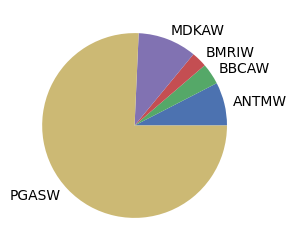

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw5c_call.flatten(), labels = columnw5c_call)
plt.show()

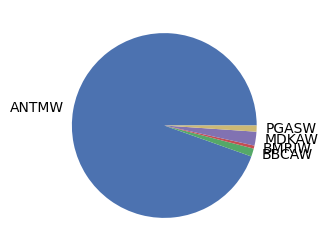

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw5c_put.flatten(), labels = columnw5c_put)
plt.show()

In [ ]:
# Net Asset Value
print (f'Net Asset Value (Call): {np.float(NAVw5c_call)}')
print (f'Net Asset Value (Put): {np.float(NAVw5c_put)}')

Net Asset Value (Call): 14318907.507868413
Net Asset Value (Put): 68609457.90314697


In [ ]:
# Networth if all were sold
print (f'Ending Balance (Call): {np.float(networthw5c_call)}')
print (f'Ending Balance (Put): {np.float(networthw5c_put)}')

Ending Balance (Call): 14283424.007868413
Ending Balance (Put): 68438627.65314697


In [ ]:
monthlyc_call.append(np.float(networthw5c_call))
monthlyc_put.append(np.float(networthw5c_put))
Profit5c = [np.float(networthw5c_call)/monthlyc_call[5]-1, np.float(networthw5c_put)/monthlyc_put[5]-1]
Profit5c = (pd.DataFrame(Profit5c)).T
Profit5c.rename(columns={0:'Binomial call'}, inplace=True)
Profit5c.rename(columns={1:'Binomial put'}, inplace=True)
Profit5c

Binomial call  Binomial put
0      -0.585678     -0.330189

#### Price Ratio Allocation

In [ ]:
# Allocation based on fair prices ratios
fair_ratios_call5 = call_sell_price5/np.array(call_buy_price5)
fair_ratios_put5 = put_sell_price5/np.array(put_buy_price5)
max_call5 = max(np.array(fair_ratios_call5).flatten())
min_call5 = min(np.array(fair_ratios_call5).flatten())
max_put5 = max(np.array(fair_ratios_put5).flatten())
min_put5 = min(np.array(fair_ratios_put5).flatten())
fair_ratios_call5s = (fair_ratios_call5-min_call5)/(max_call5-min_call5)
fair_ratios_put5s  = (fair_ratios_put5-min_put5)/(max_put5-min_put5)

# Allocation
Alloc_Fair_call5 = np.array(fair_ratios_call5s/sum(np.array(fair_ratios_call5s).flatten())).flatten()
Alloc_Fair_put5 = np.array(fair_ratios_put5s/sum(np.array(fair_ratios_put5s).flatten())).flatten()

Alloc_Fair5 = pd.DataFrame(Warrant_list)
Alloc_Fair5 = Alloc_Fair5.rename(columns={0:'Warrant'})
Alloc_Fair5.insert(1,"Call Binomial", Alloc_Fair_call5)
Alloc_Fair5.insert(2,"Put Binomial", Alloc_Fair_put5)
Alloc_Fair5

Warrant  Call Binomial  Put Binomial
0   ANTMW       0.493771      0.000000
1   BBCAW       0.185327      0.098041
2   BMRIW       0.192943      0.131676
3   MDKAW       0.000000      0.478491
4   PGASW       0.127959      0.291792

In [ ]:
Fair_call5_weights = {Warrant_list[0]:Alloc_Fair_call5[0], Warrant_list[1]:Alloc_Fair_call5[1],
                           Warrant_list[2]:Alloc_Fair_call5[2], Warrant_list[3]:Alloc_Fair_call5[3],
                           Warrant_list[4]:Alloc_Fair_call5[4]}

Fair_put5_weights = {Warrant_list[0]:Alloc_Fair_put5[0], Warrant_list[1]:Alloc_Fair_put5[1],
                           Warrant_list[2]:Alloc_Fair_put5[2], Warrant_list[3]:Alloc_Fair_put5[3],
                           Warrant_list[4]:Alloc_Fair_put5[4]}

In [ ]:
call_buy_price5 = call_buy_price5.squeeze()
put_buy_price5 = put_buy_price5.squeeze()
# Allocation for binomial call method
daw5d_call = DiscreteAllocation(Fair_call5_weights, MBU_Warrant*call_buy_price5*(1+buy_fee), total_portfolio_value=np.float(networthw4d_call))
allocationw5d_call, leftoverw5d_call = daw5d_call.greedy_portfolio()
print("Discrete allocation:", allocationw5d_call)
print("Funds remaining: IDR {:.2f}".format(leftoverw5d_call))

# Allocation for binomial put method
daw5d_put = DiscreteAllocation(Fair_put5_weights, MBU_Warrant*put_buy_price5*(1+buy_fee), total_portfolio_value=np.float(networthw4d_put))
allocationw5d_put, leftoverw5d_put = daw5d_put.greedy_portfolio()
print("Discrete allocation:", allocationw5d_put)
print("Funds remaining: IDR {:.2f}".format(leftoverw5d_put))

Discrete allocation: {'ANTMW': 2925, 'BMRIW': 411, 'BBCAW': 539, 'PGASW': 7581}
Funds remaining: IDR 2779.28
Discrete allocation: {'MDKAW': 22563, 'PGASW': 6098, 'BMRIW': 1360, 'BBCAW': 2691}
Funds remaining: IDR 14130.97


In [ ]:
portionw5d_call = (pd.DataFrame.from_dict([allocationw5d_call]).T).sort_index()
columnw5d_call = [(portionw5d_call.T).columns[i] for i in range (len(portionw5d_call))]
portion_moneyw5d_call = (np.array(portionw5d_call)).reshape(-1,1)

portionw5d_put = (pd.DataFrame.from_dict([allocationw5d_put]).T).sort_index()
columnw5d_put = [(portionw5d_put.T).columns[i] for i in range (len(portionw5d_put))]
portion_moneyw5d_put = (np.array(portionw5d_put)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustmentsw_d_name_call = Warrant_list
Adjustmentsw_d_quant_call = []
initialw_d_name_call = np.array(portionw4d_call.index)
endingw_d_name_call = np.array(portionw5d_call.index)
for i in range (len(Adjustmentsw_d_name_call)):
  if Adjustmentsw_d_name_call[i] in endingw_d_name_call:
    index = int((np.where(endingw_d_name_call == Adjustmentsw_d_name_call[i]))[0])
    Adjustmentsw_d_quant_call.append(np.array(portion_moneyw5d_call.flatten())[index])
  else:
    Adjustmentsw_d_quant_call.append(0)
for i in range (len(Adjustmentsw_d_name_call)):
  if Adjustmentsw_d_name_call[i] in initialw_d_name_call:
    index = int((np.where(initialw_d_name_call == Adjustmentsw_d_name_call[i]))[0])
    Adjustmentsw_d_quant_call[i] -= np.array(portion_moneyw4d_call.flatten())[index]

Adjustmentsw_d_name_put = Warrant_list
Adjustmentsw_d_quant_put = []
initialw_d_name_put = np.array(portionw4d_put.index)
endingw_d_name_put = np.array(portionw5d_put.index)
for i in range (len(Adjustmentsw_d_name_put)):
  if Adjustmentsw_d_name_put[i] in endingw_d_name_put:
    index = int((np.where(endingw_d_name_put == Adjustmentsw_d_name_put[i]))[0])
    Adjustmentsw_d_quant_put.append(np.array(portion_moneyw5d_put.flatten())[index])
  else:
    Adjustmentsw_d_quant_put.append(0)
for i in range (len(Adjustmentsw_d_name_put)):
  if Adjustmentsw_d_name_put[i] in initialw_d_name_put:
    index = int((np.where(initialw_d_name_put == Adjustmentsw_d_name_put[i]))[0])
    Adjustmentsw_d_quant_put[i] -= np.array(portion_moneyw4d_put.flatten())[index]

In [ ]:
call_buy_price5 = pd.DataFrame(call_buy_price5).T
put_buy_price5 = pd.DataFrame(put_buy_price5).T

# Balance after selling assets (adjustments)
leftoverw5d_call = leftoverw4d_call
for i in range (len(Adjustmentsw_d_name_call)):
  if Adjustmentsw_d_quant_call[i] < 0:
    leftoverw5d_call -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_d_quant_call[i]*(np.array(call_sell_price4).reshape(-1,1))[i])
  elif Adjustmentsw_d_quant_call[i] > 0:
    leftoverw5d_call -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_d_quant_call[i]*(np.array(call_buy_price5).reshape(-1,1))[i])

leftoverw5d_put = leftoverw4d_put
for i in range (len(Adjustmentsw_d_name_put)):
  if Adjustmentsw_d_quant_put[i] < 0:
    leftoverw5d_put -= np.float((1-sell_fee)*MBU_Warrant*Adjustmentsw_d_quant_put[i]*(np.array(put_sell_price4).reshape(-1,1))[i])
  elif Adjustmentsw_d_quant_put[i] > 0:
    leftoverw5d_put -= np.float((1+buy_fee)*MBU_Warrant*Adjustmentsw_d_quant_put[i]*(np.array(put_buy_price5).reshape(-1,1))[i])

In [ ]:
portion_moneyw5d_call = (np.array(portion_moneyw5d_call)).reshape(-1,1)
networthw5d_call, NAVw5d_call = 0.0, 0.0
for i in range (len(columnw5d_call)):
  NAVw5d_call += MBU_Warrant*(np.dot(call_sell_price5[call_sell_price5.columns[call_sell_price5.columns.isin([columnw5d_call[i]])]],portion_moneyw5d_call[i]))
  networthw5d_call += (1-sell_fee)*MBU_Warrant*(np.dot(call_sell_price5[call_sell_price5.columns[call_sell_price5.columns.isin([columnw5d_call[i]])]],portion_moneyw5d_call[i]))
leftoverw5d_call = leftoverw5d_call*(1+ir)**(1/12)
NAVw5d_call += leftoverw5d_call
networthw5d_call += leftoverw5d_call
portw5d_call = pd.DataFrame(portion_moneyw5d_call, columns=['Quantity in MBU'])
portw5d_call.insert(0,'Asset Name',columnw5d_call)
portw5d_call = portw5d_call.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw5d_call}, ignore_index=True)
portw5d_call.index = portw5d_call.index+1

portion_moneyw5d_put = (np.array(portion_moneyw5d_put)).reshape(-1,1)
networthw5d_put, NAVw5d_put = 0.0, 0.0
for i in range (len(columnw5d_put)):
  NAVw5d_put += MBU_Warrant*(np.dot(put_sell_price5[put_sell_price5.columns[put_sell_price5.columns.isin([columnw5d_put[i]])]],portion_moneyw5d_put[i]))
  networthw5d_put += (1-sell_fee)*MBU_Warrant*(np.dot(put_sell_price5[put_sell_price5.columns[put_sell_price5.columns.isin([columnw5d_put[i]])]],portion_moneyw5d_put[i]))
leftoverw5d_put = leftoverw5d_put*(1+ir)**(1/12)
NAVw5d_put += leftoverw5d_put
networthw5d_put += leftoverw5d_put
portw5d_put = pd.DataFrame(portion_moneyw5d_put, columns=['Quantity in MBU'])
portw5d_put.insert(0,'Asset Name',columnw5d_put)
portw5d_put = portw5d_put.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw5d_put}, ignore_index=True)
portw5d_put.index = portw5d_put.index+1

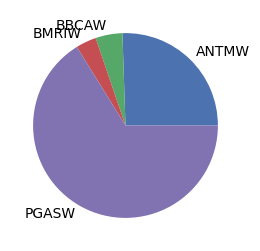

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw5d_call.flatten(), labels = columnw5d_call)
plt.show()

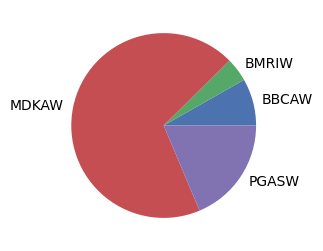

In [ ]:
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_moneyw5d_put.flatten(), labels = columnw5d_put)
plt.show()

In [ ]:
# Net Asset Value
print (f'Net Asset Value (Call): {np.float(NAVw5d_call)}')
print (f'Net Asset Value (Put): {np.float(NAVw5d_put)}')

Net Asset Value (Call): 43734050.44361194
Net Asset Value (Put): 420832159.07338166


In [ ]:
# Networth if all were sold
print (f'Ending Balance (Call): {np.float(networthw5d_call)}')
print (f'Ending Balance (Put): {np.float(networthw5d_put)}')

Ending Balance (Call): 43625265.69361194
Ending Balance (Put): 419781870.32338166


In [ ]:
monthlyd_call.append(np.float(networthw5d_call))
monthlyd_put.append(np.float(networthw5d_put))
Profit5d = [np.float(networthw5d_call)/monthlyd_call[5]-1, np.float(networthw5d_put)/monthlyd_put[5]-1]
Profit5d = (pd.DataFrame(Profit5d)).T
Profit5d.rename(columns={0:'Binomial call'}, inplace=True)
Profit5d.rename(columns={1:'Binomial put'}, inplace=True)
Profit5d

Binomial call  Binomial put
0      -0.331565      0.139605

### Exercise Period

#### Price List

In [ ]:
Settle_pred_call = [Settle_ANTM_pred_call, Settle_BBCA_pred_call, Settle_BMRI_pred_call, Settle_MDKA_pred_call, Settle_PGAS_pred_call]
Settle_pred_put = [Settle_ANTM_pred_put, Settle_BBCA_pred_put, Settle_BMRI_pred_put, Settle_MDKA_pred_put, Settle_PGAS_pred_put]
Settle_real_call = [Settle_ANTM_real_call, Settle_BBCA_real_call, Settle_BMRI_real_call, Settle_MDKA_real_call, Settle_PGAS_real_call]
Settle_real_put = [Settle_ANTM_real_put, Settle_BBCA_real_put, Settle_BMRI_real_put, Settle_MDKA_real_put, Settle_PGAS_real_put]

#### Raw Return Allocation

In [ ]:
portion_moneyw6a_call = [0 for i in range (5)]
portion_moneyw6a_put = [0 for i in range (5)]
port6a_name_call = []
port6a_name_put = []
leftoverw6a_call = leftoverw5a_call
leftoverw6a_put = leftoverw5a_put

for i in range (len(Settle_pred_call)):
  if Warrant_list[i] in endingw_a_name_call:
    index = int((np.where(endingw_a_name_call == Warrant_list[i]))[0])
    if (1-sell_fee)*np.array(call_sell_price5).flatten()[i] >= Settle_pred_call[i]:
      leftoverw6a_call += (1-sell_fee)*MBU_Warrant*np.array(call_sell_price5).flatten()[i]*portion_moneyw5a_call[index]
    else:
      port6a_name_call.append(Warrant_list[i])
      portion_moneyw6a_call[i] = portion_moneyw5a_call[index].item()
leftoverw6a_call = leftoverw6a_call.item()

for i in range (len(Settle_pred_put)):
  if Warrant_list[i] in endingw_a_name_put:
    index = int((np.where(endingw_a_name_put == Warrant_list[i]))[0])
    if (1-sell_fee)*np.array(put_sell_price5).flatten()[i] >= Settle_pred_put[i]:
      leftoverw6a_put += (1-sell_fee)*MBU_Warrant*np.array(put_sell_price5).flatten()[i]*portion_moneyw5a_put[index]
    else:
      port6a_name_put.append(Warrant_list[i])
      portion_moneyw6a_put[i] = portion_moneyw5a_put[index].item()
leftoverw6a_put = leftoverw6a_put.item()

In [ ]:
networthw6a_call = 0.0
networthw6a_call = MBU_Warrant*np.dot(Settle_real_call, portion_moneyw6a_call)
leftoverw6a_call = leftoverw6a_call*(1+ir)**(5/360)
networthw6a_call += leftoverw6a_call
portw6a_call = pd.DataFrame(portion_moneyw6a_call, columns=['Quantity in MBU'])
portw6a_call.insert(0,'Asset Name',Warrant_list)
portw6a_call = portw6a_call.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw6a_call}, ignore_index=True)
portw6a_call.index = portw6a_call.index+1
portw6a_call['Quantity in MBU'] = portw6a_call['Quantity in MBU'].astype('int')

networthw6a_put = 0.0
networthw6a_put = MBU_Warrant*np.dot(Settle_real_put, portion_moneyw6a_put)
leftoverw6a_put = leftoverw6a_put*(1+ir)**(5/360)
networthw6a_put += leftoverw6a_put
portw6a_put = pd.DataFrame(portion_moneyw6a_put, columns=['Quantity in MBU'])
portw6a_put.insert(0,'Asset Name',Warrant_list)
portw6a_put = portw6a_put.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw6a_put}, ignore_index=True)
portw6a_put.index = portw6a_put.index+1
portw6a_put['Quantity in MBU'] = portw6a_put['Quantity in MBU'].astype('int')

In [ ]:
portw6a_call

Asset Name  Quantity in MBU
1          ANTMW                0
2          BBCAW                0
3          BMRIW                0
4          MDKAW                0
5          PGASW                0
6  Leftover Cash          3314343

In [ ]:
portw6a_put

Asset Name  Quantity in MBU
1          ANTMW                0
2          BBCAW                0
3          BMRIW                0
4          MDKAW               97
5          PGASW                1
6  Leftover Cash          2551499

In [ ]:
# Networth at the end
print (f'Ending Balance (Call): {np.float(networthw6a_call)}')
print (f'Ending Balance (Put): {np.float(networthw6a_put)}')

Ending Balance (Call): 3314343.5894405097
Ending Balance (Put): 4624899.4080408


In [ ]:
monthlya_call.append(np.float(networthw6a_call))
monthlya_put.append(np.float(networthw6a_put))
Profit6a = [np.float(networthw6a_call)/monthlya_call[6]-1, np.float(networthw6a_put)/monthlya_put[6]-1]
Profit6a = (pd.DataFrame(Profit6a)).T
Profit6a.rename(columns={0:'Binomial call'}, inplace=True)
Profit6a.rename(columns={1:'Binomial put'}, inplace=True)
Profit6a

Binomial call  Binomial put
0       0.000545      0.224576

#### Scaled Return Allocation

In [ ]:
portion_moneyw6b_call = [0 for i in range (5)]
portion_moneyw6b_put = [0 for i in range (5)]
port6b_name_call = []
port6b_name_put = []
leftoverw6b_call = leftoverw5b_call
leftoverw6b_put = leftoverw5b_put

for i in range (len(Settle_pred_call)):
  if Warrant_list[i] in endingw_b_name_call:
    index = int((np.where(endingw_b_name_call == Warrant_list[i]))[0])
    if (1-sell_fee)*np.array(call_sell_price5).flatten()[i] >= Settle_pred_call[i]:
      leftoverw6b_call += (1-sell_fee)*MBU_Warrant*np.array(call_sell_price5).flatten()[i]*portion_moneyw5b_call[index]
    else:
      port6b_name_call.append(Warrant_list[i])
      portion_moneyw6b_call[i] = portion_moneyw5b_call[index].item()
leftoverw6b_call = leftoverw6b_call.item()

for i in range (len(Settle_pred_put)):
  if Warrant_list[i] in endingw_b_name_put:
    index = int((np.where(endingw_b_name_put == Warrant_list[i]))[0])
    if (1-sell_fee)*np.array(put_sell_price5).flatten()[i] >= Settle_pred_put[i]:
      leftoverw6b_put += (1-sell_fee)*MBU_Warrant*np.array(put_sell_price5).flatten()[i]*portion_moneyw5b_put[index]
    else:
      port6b_name_put.append(Warrant_list[i])
      portion_moneyw6b_put[i] = portion_moneyw5b_put[index].item()
leftoverw6b_put = leftoverw6b_put.item()

In [ ]:
networthw6b_call = 0.0
networthw6b_call = MBU_Warrant*np.dot(Settle_real_call, portion_moneyw6b_call)
leftoverw6b_call = leftoverw6b_call*(1+ir)**(5/360)
networthw6b_call += leftoverw6b_call
portw6b_call = pd.DataFrame(portion_moneyw6b_call, columns=['Quantity in MBU'])
portw6b_call.insert(0,'Asset Name',Warrant_list)
portw6b_call = portw6b_call.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw6b_call}, ignore_index=True)
portw6b_call.index = portw6b_call.index+1
portw6b_call['Quantity in MBU'] = portw6b_call['Quantity in MBU'].astype('int')

networthw6b_put = 0.0
networthw6b_put = MBU_Warrant*np.dot(Settle_real_put, portion_moneyw6b_put)
leftoverw6b_put = leftoverw6b_put*(1+ir)**(5/360)
networthw6b_put += leftoverw6b_put
portw6b_put = pd.DataFrame(portion_moneyw6b_put, columns=['Quantity in MBU'])
portw6b_put.insert(0,'Asset Name',Warrant_list)
portw6b_put = portw6b_put.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw6b_put}, ignore_index=True)
portw6b_put.index = portw6b_put.index+1
portw6b_put['Quantity in MBU'] = portw6b_put['Quantity in MBU'].astype('int')

In [ ]:
portw6b_call

Asset Name  Quantity in MBU
1          ANTMW                0
2          BBCAW                0
3          BMRIW                0
4          MDKAW                0
5          PGASW                0
6  Leftover Cash          3248316

In [ ]:
portw6b_put

Asset Name  Quantity in MBU
1          ANTMW                0
2          BBCAW                0
3          BMRIW                0
4          MDKAW              127
5          PGASW               16
6  Leftover Cash          2536777

In [ ]:
# Networth at the end
print (f'Ending Balance (Call): {np.float(networthw6b_call)}')
print (f'Ending Balance (Put): {np.float(networthw6b_put)}')

Ending Balance (Call): 3248316.9539267756
Ending Balance (Put): 5501177.663779179


In [ ]:
monthlyb_call.append(np.float(networthw6b_call))
monthlyb_put.append(np.float(networthw6b_put))
Profit6b = [np.float(networthw6b_call)/monthlyb_call[6]-1, np.float(networthw6b_put)/monthlyb_put[6]-1]
Profit6b = (pd.DataFrame(Profit6b)).T
Profit6b.rename(columns={0:'Binomial call'}, inplace=True)
Profit6b.rename(columns={1:'Binomial put'}, inplace=True)
Profit6b

Binomial call  Binomial put
0       0.000545      0.252135

#### Uniform Allocation

In [ ]:
portion_moneyw6c_call = [0 for i in range (5)]
portion_moneyw6c_put = [0 for i in range (5)]
port6c_name_call = []
port6c_name_put = []
leftoverw6c_call = leftoverw5c_call
leftoverw6c_put = leftoverw5c_put

for i in range (len(Settle_pred_call)):
  if Warrant_list[i] in endingw_c_name_call:
    index = int((np.where(endingw_c_name_call == Warrant_list[i]))[0])
    if (1-sell_fee)*np.array(call_sell_price5).flatten()[i] >= Settle_pred_call[i]:
      leftoverw6c_call += (1-sell_fee)*MBU_Warrant*np.array(call_sell_price5).flatten()[i]*portion_moneyw5c_call[index]
    else:
      port6c_name_call.append(Warrant_list[i])
      portion_moneyw6c_call[i] = portion_moneyw5c_call[index].item()
leftoverw6c_call = leftoverw6c_call.item()

for i in range (len(Settle_pred_put)):
  if Warrant_list[i] in endingw_c_name_put:
    index = int((np.where(endingw_c_name_put == Warrant_list[i]))[0])
    if (1-sell_fee)*np.array(put_sell_price5).flatten()[i] >= Settle_pred_put[i]:
      leftoverw6c_put += (1-sell_fee)*MBU_Warrant*np.array(put_sell_price5).flatten()[i]*portion_moneyw5c_put[index]
    else:
      port6c_name_put.append(Warrant_list[i])
      portion_moneyw6c_put[i] = portion_moneyw5c_put[index].item()
leftoverw6c_put = leftoverw6c_put.item()

In [ ]:
networthw6c_call = 0.0
networthw6c_call = MBU_Warrant*np.dot(Settle_real_call, portion_moneyw6c_call)
leftoverw6c_call = leftoverw6c_call*(1+ir)**(5/360)
networthw6c_call += leftoverw6c_call
portw6c_call = pd.DataFrame(portion_moneyw6c_call, columns=['Quantity in MBU'])
portw6c_call.insert(0,'Asset Name',Warrant_list)
portw6c_call = portw6c_call.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw6c_call}, ignore_index=True)
portw6c_call.index = portw6c_call.index+1
portw6c_call['Quantity in MBU'] = portw6c_call['Quantity in MBU'].astype('int')

networthw6c_put = 0.0
networthw6c_put = MBU_Warrant*np.dot(Settle_real_put, portion_moneyw6c_put)
leftoverw6c_put = leftoverw6c_put*(1+ir)**(5/360)
networthw6c_put += leftoverw6c_put
portw6c_put = pd.DataFrame(portion_moneyw6c_put, columns=['Quantity in MBU'])
portw6c_put.insert(0,'Asset Name',Warrant_list)
portw6c_put = portw6c_put.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw6c_put}, ignore_index=True)
portw6c_put.index = portw6c_put.index+1
portw6c_put['Quantity in MBU'] = portw6c_put['Quantity in MBU'].astype('int')

In [ ]:
portw6c_call

Asset Name  Quantity in MBU
1          ANTMW                0
2          BBCAW                0
3          BMRIW                0
4          MDKAW                0
5          PGASW                0
6  Leftover Cash         14291206

In [ ]:
portw6c_put

Asset Name  Quantity in MBU
1          ANTMW                0
2          BBCAW                0
3          BMRIW                0
4          MDKAW             2616
5          PGASW             1159
6  Leftover Cash         15944097

In [ ]:
# Networth at the end
print (f'Ending Balance (Call): {np.float(networthw6c_call)}')
print (f'Ending Balance (Put): {np.float(networthw6c_put)}')

Ending Balance (Call): 14291206.767378027
Ending Balance (Put): 91106297.55017944


In [ ]:
monthlyc_call.append(np.float(networthw6c_call))
monthlyc_put.append(np.float(networthw6c_put))
Profit6c = [np.float(networthw6c_call)/monthlyc_call[6]-1, np.float(networthw6c_put)/monthlyc_put[6]-1]
Profit6c = (pd.DataFrame(Profit6c)).T
Profit6c.rename(columns={0:'Binomial call'}, inplace=True)
Profit6c.rename(columns={1:'Binomial put'}, inplace=True)
Profit6c

Binomial call  Binomial put
0       0.000545      0.331212

#### Price Ratio Allocation

In [ ]:
portion_moneyw6d_call = [0 for i in range (5)]
portion_moneyw6d_put = [0 for i in range (5)]
port6d_name_call = []
port6d_name_put = []
leftoverw6d_call = leftoverw5d_call
leftoverw6d_put = leftoverw5d_put

for i in range (len(Settle_pred_call)):
  if Warrant_list[i] in endingw_d_name_call:
    index = int((np.where(endingw_d_name_call == Warrant_list[i]))[0])
    if (1-sell_fee)*np.array(call_sell_price5).flatten()[i] >= Settle_pred_call[i]:
      leftoverw6d_call += (1-sell_fee)*MBU_Warrant*np.array(call_sell_price5).flatten()[i]*portion_moneyw5d_call[index]
    else:
      port6d_name_call.append(Warrant_list[i])
      portion_moneyw6d_call[i] = portion_moneyw5d_call[index].item()
leftoverw6d_call = leftoverw6d_call.item()

for i in range (len(Settle_pred_put)):
  if Warrant_list[i] in endingw_d_name_put:
    index = int((np.where(endingw_d_name_put == Warrant_list[i]))[0])
    if (1-sell_fee)*np.array(put_sell_price5).flatten()[i] >= Settle_pred_put[i]:
      leftoverw6d_put += (1-sell_fee)*MBU_Warrant*np.array(put_sell_price5).flatten()[i]*portion_moneyw5d_put[index]
    else:
      port6d_name_put.append(Warrant_list[i])
      portion_moneyw6d_put[i] = portion_moneyw5d_put[index].item()
leftoverw6d_put = leftoverw6d_put.item()

In [ ]:
networthw6d_call = 0.0
networthw6d_call = MBU_Warrant*np.dot(Settle_real_call, portion_moneyw6d_call)
leftoverw6d_call = leftoverw6d_call*(1+ir)**(5/360)
networthw6d_call += leftoverw6d_call
portw6d_call = pd.DataFrame(portion_moneyw6d_call, columns=['Quantity in MBU'])
portw6d_call.insert(0,'Asset Name',Warrant_list)
portw6d_call = portw6d_call.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw6d_call}, ignore_index=True)
portw6d_call.index = portw6d_call.index+1
portw6d_call['Quantity in MBU'] = portw6d_call['Quantity in MBU'].astype('int')

networthw6d_put = 0.0
networthw6d_put = MBU_Warrant*np.dot(Settle_real_put, portion_moneyw6d_put)
leftoverw6d_put = leftoverw6d_put*(1+ir)**(5/360)
networthw6d_put += leftoverw6d_put
portw6d_put = pd.DataFrame(portion_moneyw6d_put, columns=['Quantity in MBU'])
portw6d_put.insert(0,'Asset Name',Warrant_list)
portw6d_put = portw6d_put.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverw6d_put}, ignore_index=True)
portw6d_put.index = portw6d_put.index+1
portw6d_put['Quantity in MBU'] = portw6d_put['Quantity in MBU'].astype('int')

In [ ]:
portw6d_call

Asset Name  Quantity in MBU
1          ANTMW                0
2          BBCAW                0
3          BMRIW                0
4          MDKAW                0
5          PGASW                0
6  Leftover Cash         43649036

In [ ]:
portw6d_put

Asset Name  Quantity in MBU
1          ANTMW                0
2          BBCAW                0
3          BMRIW                0
4          MDKAW            22563
5          PGASW             6098
6  Leftover Cash         33844509

In [ ]:
# Networth at the end
print (f'Ending Balance (Call): {np.float(networthw6d_call)}')
print (f'Ending Balance (Put): {np.float(networthw6d_put)}')

Ending Balance (Call): 43649036.25109517
Ending Balance (Put): 615846109.2444128


In [ ]:
monthlyd_call.append(np.float(networthw6d_call))
monthlyd_put.append(np.float(networthw6d_put))
Profit6d = [np.float(networthw6d_call)/monthlyd_call[6]-1, np.float(networthw6d_put)/monthlyd_put[6]-1]
Profit6d = (pd.DataFrame(Profit6d)).T
Profit6d.rename(columns={0:'Binomial call'}, inplace=True)
Profit6d.rename(columns={1:'Binomial put'}, inplace=True)
Profit6d

Binomial call  Binomial put
0       0.000545      0.467062

## Warrant Result

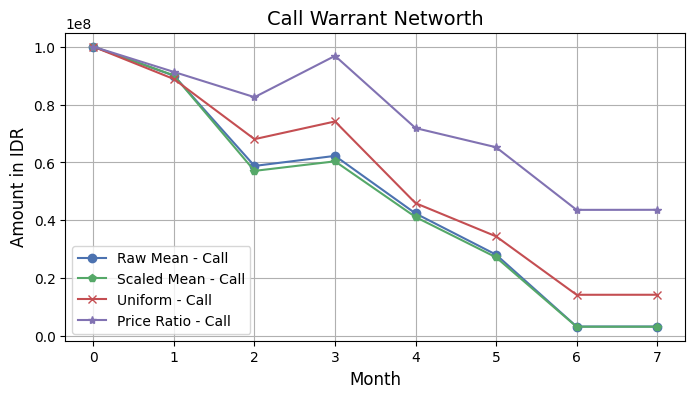

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(monthlya_call, '-o', label= "Raw Mean - Call")
plt.plot(monthlyb_call, '-p', label= "Scaled Mean - Call")
plt.plot(monthlyc_call, '-x', label= "Uniform - Call")
plt.plot(monthlyd_call, '-*', label= "Price Ratio - Call")
plt.title('Call Warrant Networth', fontsize=14)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Amount in IDR',fontsize=12)
plt.legend(loc='lower left', fontsize=10)
plt.grid()
plt.show()

In [ ]:
df_call = pd.DataFrame(np.array(monthlya_call).astype('i'))
df_call = df_call.rename(columns={0:'Raw Return'})
df_call.insert(1,"Scaled Return", np.array(monthlyb_call).astype('i'))
df_call.insert(2,"Uniform", np.array(monthlyc_call).astype('i'))
df_call.insert(3,"Price Ratio", np.array(monthlyd_call).astype('i'))
df_call

In [ ]:
df_put = pd.DataFrame(np.array(monthlya_put).astype('i'))
df_put = df_put.rename(columns={0:'Raw Return'})
df_put.insert(1,"Scaled Return", np.array(monthlyb_put).astype('i'))
df_put.insert(2,"Uniform", np.array(monthlyc_put).astype('i'))
df_put.insert(3,"Price Ratio", np.array(monthlyd_put).astype('i'))
df_put

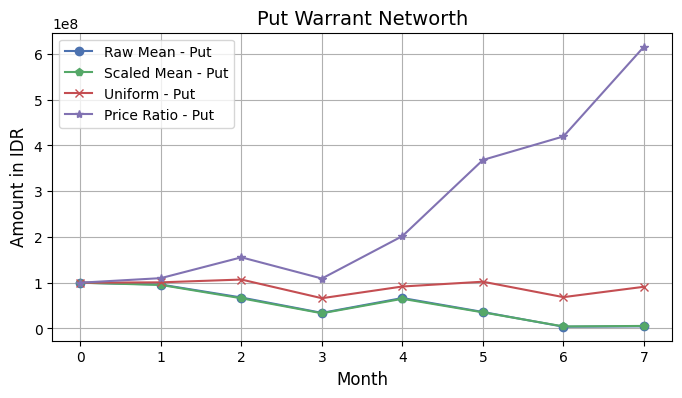

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(monthlya_put, '-o', label= "Raw Mean - Put")
plt.plot(monthlyb_put, '-p', label= "Scaled Mean - Put")
plt.plot(monthlyc_put, '-x', label= "Uniform - Put")
plt.plot(monthlyd_put, '-*', label= "Price Ratio - Put")
plt.title('Put Warrant Networth', fontsize=14)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Amount in IDR',fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid()
plt.show()

# Stocks Portfolio

In [ ]:
asset_stock = ['ADRO.JK', 'ASII.JK', 'BBRI.JK', 'BBTN.JK', 'BMRI.JK', 'BUMI.JK', 'EXCL.JK', 'MFIN.JK', 'PGAS.JK', 'TLKM.JK']
order = ['ADRO.JK', 'ASII.JK', 'BBRI.JK', 'BBTN.JK', 'BMRI.JK', 'BUMI.JK', 'EXCL.JK', 'MFIN.JK', 'PGAS.JK', 'TLKM.JK']
rf = 0.04
k = 0.1*252

In [ ]:
# Upload warrant prices
from google.colab import files
uploaded = files.upload()

Saving Predicted Return.xlsx to Predicted Return.xlsx


## Data Preparation 0
1st of January 2018 - 9th of May 2022

### Download Data

In [ ]:
data_stock0 = yf.download(asset_stock, start="2018-01-01", end="2022-05-10")
data_stock0.index = pd.to_datetime(data_stock0.index).date
data_asset0 = pd.concat([data_stock0],axis=1,sort=False).reset_index()
data_asset0.rename(columns={'index':'Date'}, inplace=True)
data_asset0.index = data_asset0['Date']
data_asset0 = data_asset0.dropna()
df0 = data_asset0['Adj Close']

[*********************100%***********************]  10 of 10 completed


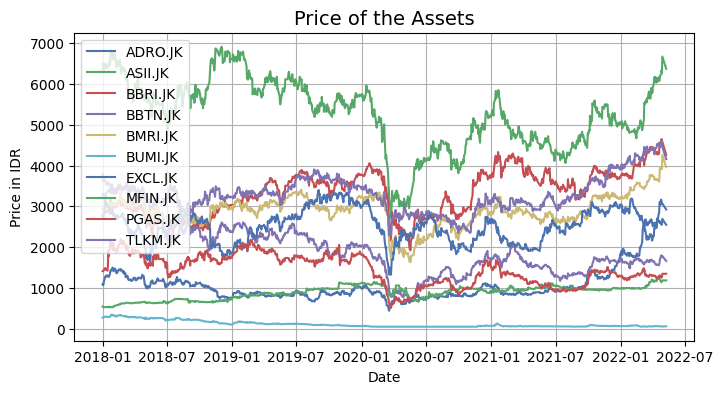

In [ ]:
# Plot
plt.figure(figsize=(8,4))
for i in df0.columns.values:
    plt.plot( df0[i],  label=i)
plt.title('Price of the Assets', fontsize=14)
plt.xlabel('Date',fontsize=10)
plt.ylabel('Price in IDR',fontsize=10)
plt.legend(df0.columns.values, loc='upper left')
plt.grid()
plt.show()

### Return, Variance, Correlation, Input Parameter

In [ ]:
# Log Return
df0_return = np.log(df0).diff()
pd.DataFrame(df0_return)

In [ ]:
var_matrix0 = df0_return.cov()
var_matrix0

ADRO.JK   ASII.JK   BBRI.JK   BBTN.JK   BMRI.JK   BUMI.JK   EXCL.JK  \
ADRO.JK  0.000915  0.000227  0.000228  0.000297  0.000248  0.000361  0.000311   
ASII.JK  0.000227  0.000470  0.000234  0.000269  0.000263  0.000115  0.000197   
BBRI.JK  0.000228  0.000234  0.000506  0.000368  0.000357  0.000111  0.000242   
BBTN.JK  0.000297  0.000269  0.000368  0.000815  0.000384  0.000127  0.000266   
BMRI.JK  0.000248  0.000263  0.000357  0.000384  0.000516  0.000112  0.000213   
BUMI.JK  0.000361  0.000115  0.000111  0.000127  0.000112  0.001274  0.000146   
EXCL.JK  0.000311  0.000197  0.000242  0.000266  0.000213  0.000146  0.000888   
MFIN.JK  0.000046  0.000039  0.000064  0.000070  0.000051  0.000014  0.000060   
PGAS.JK  0.000385  0.000274  0.000308  0.000417  0.000332  0.000221  0.000326   
TLKM.JK  0.000200  0.000180  0.000196  0.000201  0.000195  0.000079  0.000284   

          MFIN.JK   PGAS.JK   TLKM.JK  
ADRO.JK  0.000046  0.000385  0.000200  
ASII.JK  0.000039  0.000274  0.000180  
BBRI.JK  0.000064  0.000308  0.000196  
BBTN.JK  0.000070  0.000417  0.000201  
BMRI.JK  0.000051  0.000332  0.000195  
BUMI.JK  0.000014  0.000221  0.000079  
EXCL.JK  0.000060  0.000326  0.000284  
MFIN.JK  0.000524  0.000032  0.000042  
PGAS.JK  0.000032  0.001030  0.000221  
TLKM.JK  0.000042  0.000221  0.000392

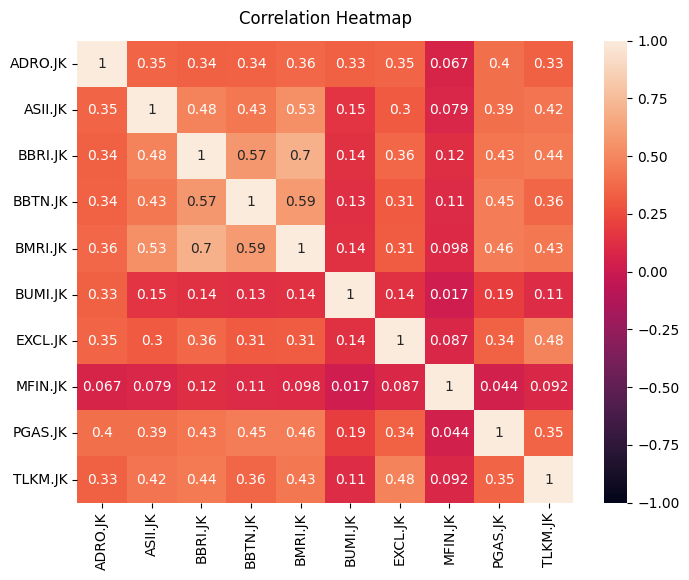

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(8, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df0_return.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Black Litterman Allocation + Maximum Sharpe Ratio

In [ ]:
market_prices0 = yf.download("^JKSE", start="2018-01-01", end="2022-05-10")["Adj Close"]
prices0 = data_asset0['Adj Close']
mcaps0 = {}
for t in order:
    stock = yf.Ticker(t)
    mcaps0[t] = stock.info["marketCap"]
mcaps0

[*********************100%***********************]  1 of 1 completed


{'ADRO.JK': 64098586853376,
 'ASII.JK': 264155470757888,
 'BBRI.JK': 829966459600896,
 'BBTN.JK': 17262312423424,
 'BMRI.JK': 475999816908800,
 'BUMI.JK': 37874741280768,
 'EXCL.JK': 25620922761216,
 'MFIN.JK': 4770000011264,
 'PGAS.JK': 34180515758080,
 'TLKM.JK': 407145652682752}

#### Constructing the prior

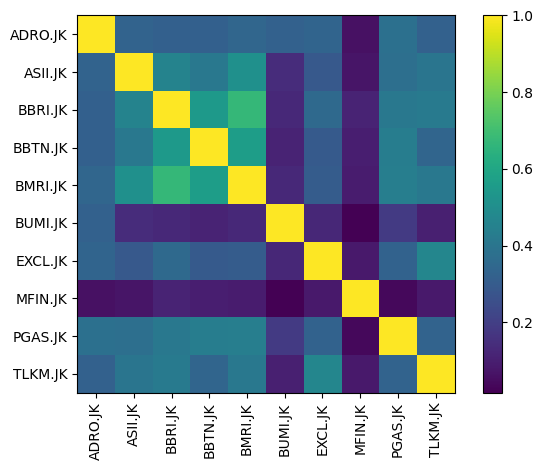

In [ ]:
S0 = risk_models.CovarianceShrinkage(prices0).ledoit_wolf()
delta0 = black_litterman.market_implied_risk_aversion(market_prices0)
plotting.plot_covariance(S0, plot_correlation=True);

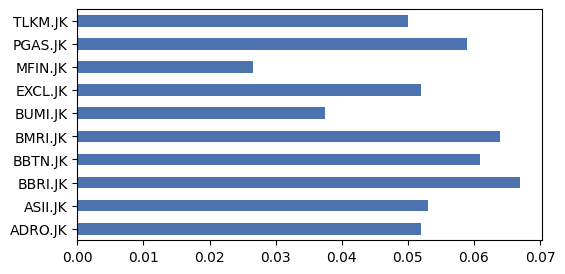

In [ ]:
market_prior0 = black_litterman.market_implied_prior_returns(mcaps0, delta0, S0)
market_prior0.plot.barh(figsize=(6,3));

#### Views

In [ ]:
predicted0 = pd.read_excel('Predicted Return.xlsx', sheet_name='Period0').squeeze('columns')

In [ ]:
# You don't have to provide views on all the assets
viewdict0 = {"ADRO.JK": np.exp(k*np.mean(predicted0['ADRO']))-1,
             "ASII.JK": np.exp(k*np.mean(predicted0['ASII']))-1,
             "BBRI.JK": np.exp(k*np.mean(predicted0['BBRI']))-1,
             "BBTN.JK": np.exp(k*np.mean(predicted0['BBTN']))-1,
             "BMRI.JK": np.exp(k*np.mean(predicted0['BMRI']))-1,
             "BUMI.JK": np.exp(k*np.mean(predicted0['BUMI']))-1,
             "EXCL.JK": np.exp(k*np.mean(predicted0['EXCL']))-1,
             "MFIN.JK": np.exp(k*np.mean(predicted0['MFIN']))-1,
             "PGAS.JK": np.exp(k*np.mean(predicted0['PGAS']))-1,
             "TLKM.JK": np.exp(k*np.mean(predicted0['TLKM']))-1}
bl0 = BlackLittermanModel(S0, pi=market_prior0, absolute_views=viewdict0)

#### View confidences

In [ ]:
confidences0 = [0.05, 0.05, 0.01, 0.01, 0.01, 0.02, 0.03, 0.05, 0.03, 0.03]
bl0 = BlackLittermanModel(S0, pi=market_prior0, absolute_views=viewdict0
                          , omega="idzorek", view_confidences=confidences0)
np.diag(bl0.omega)

array([0.21902135, 0.11473271, 0.64731423, 1.0253494 , 0.65319101,
       0.83079509, 0.37002819, 0.13043289, 0.42192306, 0.16541324])

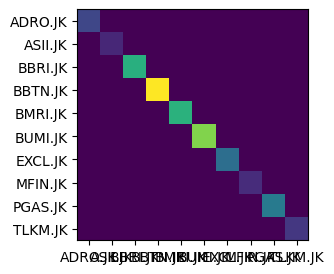

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))
im = ax.imshow(bl0.omega)
ax.set_xticks(np.arange(len(bl0.tickers)))
ax.set_yticks(np.arange(len(bl0.tickers)))
ax.set_xticklabels(bl0.tickers)
ax.set_yticklabels(bl0.tickers)
plt.show()

#### Posterior estimates

Given the inputs, we can compute a posterior estimate of returns


In [ ]:
# We are using the shortcut to automatically compute market-implied prior
bl0 = BlackLittermanModel(S0, pi="market", market_caps=mcaps0, risk_aversion=delta0,
                        absolute_views=viewdict0, omega=bl0.omega)
# Posterior estimate of returns
ret_bl0 = bl0.bl_returns()
rets_df0 = pd.DataFrame([market_prior0, ret_bl0, pd.Series(viewdict0)],
             index=["Prior", "Posterior", "Views"]).T
rets_df0

Prior  Posterior     Views
ADRO.JK  0.051986   0.117245  0.824180
ASII.JK  0.053005   0.092231  0.494014
BBRI.JK  0.067010   0.109300  1.455009
BBTN.JK  0.060906   0.108582 -0.091554
BMRI.JK  0.063925   0.107488  1.317200
BUMI.JK  0.037499   0.067763  0.645723
EXCL.JK  0.052041   0.094305  0.528977
MFIN.JK  0.026641   0.063411  0.998330
PGAS.JK  0.058893   0.144058  2.110187
TLKM.JK  0.049982   0.064570 -0.293635

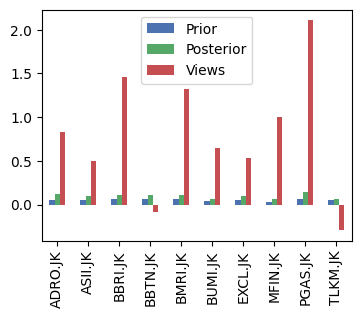

In [ ]:
rets_df0.plot.bar(figsize=(4,3));

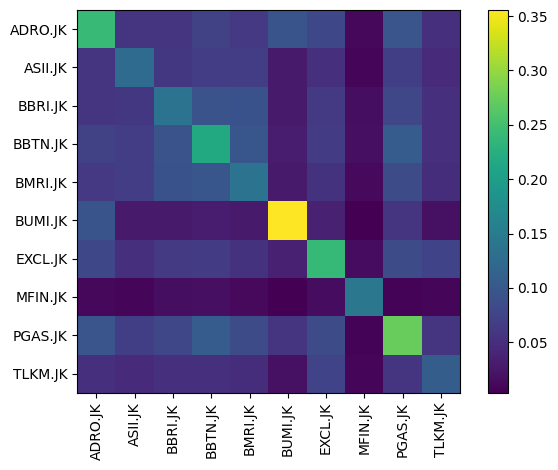

In [ ]:
S_bl0 = bl0.bl_cov()
plotting.plot_covariance(S_bl0);

#### Portfolio allocation

Now that we have constructed our Black-Litterman posterior estimate, we can proceed to use any of the optimizers discussed in previous recipes.

In [ ]:
# Optimize for maximum return
efbl0 = EfficientFrontier(ret_bl0, S_bl0)
efbl0.add_objective(objective_functions.L2_reg)
raw_weightsbl0 = efbl0.max_sharpe(risk_free_rate=rf)
weights_bl0 = efbl0.clean_weights()
print(weights_bl0)
efbl0.portfolio_performance(verbose=True)

OrderedDict([('ADRO.JK', 0.1415), ('ASII.JK', 0.09451), ('BBRI.JK', 0.13305), ('BBTN.JK', 0.11332), ('BMRI.JK', 0.12571), ('BUMI.JK', 0.03141), ('EXCL.JK', 0.08581), ('MFIN.JK', 0.05244), ('PGAS.JK', 0.19899), ('TLKM.JK', 0.02326)])
Expected annual return: 10.9%
Annual volatility: 29.2%
Sharpe Ratio: 0.24


(0.10938019279748834, 0.2918087729721639, 0.2377591053580374)

## Data Preparation 1
1st of January 2018 - 9th of June 2022

### Download Data

In [ ]:
data_stock1 = yf.download(asset_stock, start="2018-01-01", end="2022-06-10")
data_stock1.index = pd.to_datetime(data_stock1.index).date
data_asset1 = pd.concat([data_stock1],axis=1,sort=False).reset_index()
data_asset1.rename(columns={'index':'Date'}, inplace=True)
data_asset1.index = data_asset1['Date']
data_asset1 = data_asset1.dropna()
df1 = data_asset1['Adj Close']

[*********************100%***********************]  10 of 10 completed


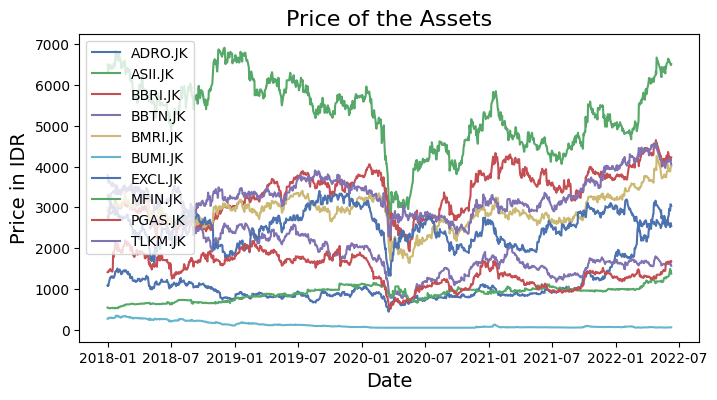

In [ ]:
# Plot
plt.figure(figsize=(8,4))
for i in df1.columns.values:
    plt.plot( df1[i],  label=i)
plt.title('Price of the Assets', fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in IDR',fontsize=14)
plt.legend(df1.columns.values, loc='upper left')
plt.show()

### Return, Variance, Correlation, Input Parameter

In [ ]:
# Log Return
df1_return = np.log(df1).diff()
pd.DataFrame(df1_return)

In [ ]:
var_matrix1 = df1_return.cov()
var_matrix1

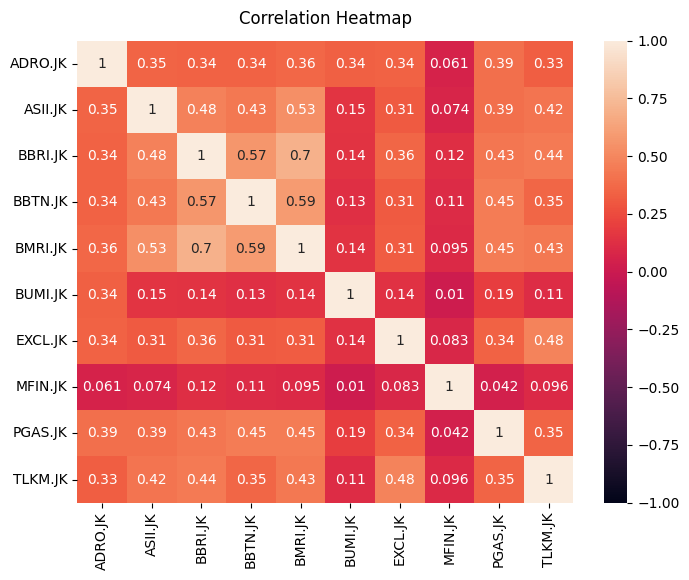

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(8, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df1_return.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Black Litterman Allocation + Maximum Sharpe Ratio

In [ ]:
market_prices1 = yf.download("^JKSE", start="2018-01-01", end="2022-06-10")["Adj Close"]
prices1 = data_asset1['Adj Close']
mcaps1 = {}
for t in order:
    stock = yf.Ticker(t)
    mcaps1[t] = stock.info["marketCap"]
mcaps1

[*********************100%***********************]  1 of 1 completed


{'ADRO.JK': 64098586853376,
 'ASII.JK': 264155470757888,
 'BBRI.JK': 833739051499520,
 'BBTN.JK': 17262312423424,
 'BMRI.JK': 478333158555648,
 'BUMI.JK': 37874741280768,
 'EXCL.JK': 25620922761216,
 'MFIN.JK': 4770000011264,
 'PGAS.JK': 34059308761088,
 'TLKM.JK': 408136280178688}

#### Constructing the prior

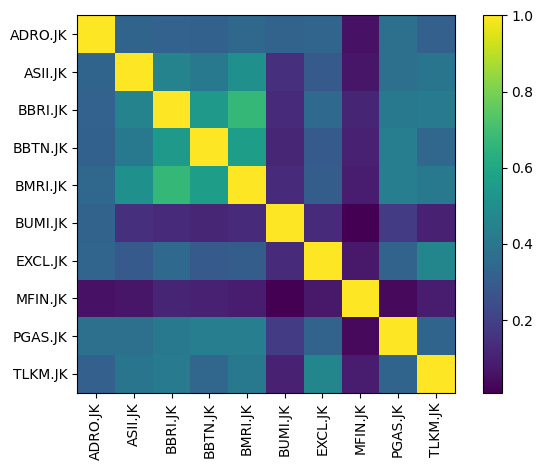

In [ ]:
S1 = risk_models.CovarianceShrinkage(prices1).ledoit_wolf()
delta1 = black_litterman.market_implied_risk_aversion(market_prices1)
plotting.plot_covariance(S1, plot_correlation=True);

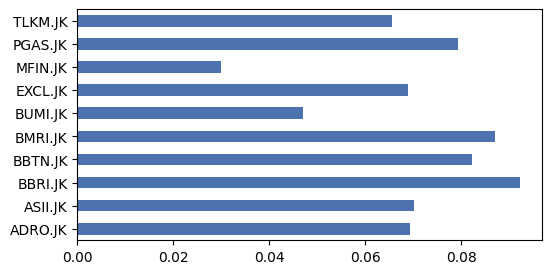

In [ ]:
market_prior1 = black_litterman.market_implied_prior_returns(mcaps1, delta1, S1)
market_prior1.plot.barh(figsize=(6,3));

#### Views

In [ ]:
predicted1 = pd.read_excel('Predicted Return.xlsx', sheet_name='Period1').squeeze('columns')

In [ ]:
# You don't have to provide views on all the assets
viewdict1 = {"ADRO.JK": np.exp(k*np.mean(predicted1['ADRO']))-1,
             "ASII.JK": np.exp(k*np.mean(predicted1['ASII']))-1,
             "BBRI.JK": np.exp(k*np.mean(predicted1['BBRI']))-1,
             "BBTN.JK": np.exp(k*np.mean(predicted1['BBTN']))-1,
             "BMRI.JK": np.exp(k*np.mean(predicted1['BMRI']))-1,
             "BUMI.JK": np.exp(k*np.mean(predicted1['BUMI']))-1,
             "EXCL.JK": np.exp(k*np.mean(predicted1['EXCL']))-1,
             "MFIN.JK": np.exp(k*np.mean(predicted1['MFIN']))-1,
             "PGAS.JK": np.exp(k*np.mean(predicted1['PGAS']))-1,
             "TLKM.JK": np.exp(k*np.mean(predicted1['TLKM']))-1}
bl1 = BlackLittermanModel(S1, pi=market_prior1, absolute_views=viewdict1)

#### View confidences

In [ ]:
confidences1 = [0.05, 0.05, 0.01, 0.01, 0.01, 0.02, 0.03, 0.05, 0.03, 0.03]
bl1 = BlackLittermanModel(S1, pi=market_prior1, absolute_views=viewdict1
                          , omega="idzorek", view_confidences=confidences1)
np.diag(bl1.omega)

array([0.22034846, 0.11377699, 0.64946718, 1.01052976, 0.64834006,
       0.82493975, 0.36828554, 0.13274305, 0.42048626, 0.16357541])

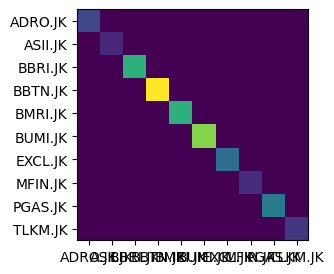

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))
im = ax.imshow(bl1.omega)
ax.set_xticks(np.arange(len(bl1.tickers)))
ax.set_yticks(np.arange(len(bl1.tickers)))
ax.set_xticklabels(bl1.tickers)
ax.set_yticklabels(bl1.tickers)
plt.show()

#### Posterior estimates

Given the inputs, we can compute a posterior estimate of returns


In [ ]:
# We are using the shortcut to automatically compute market-implied prior
bl1 = BlackLittermanModel(S1, pi="market", market_caps=mcaps1, risk_aversion=delta1,
                        absolute_views=viewdict1, omega=bl1.omega)
# Posterior estimate of returns
ret_bl1 = bl1.bl_returns()
rets_df1 = pd.DataFrame([market_prior1, ret_bl1, pd.Series(viewdict1)],
             index=["Prior", "Posterior", "Views"]).T
rets_df1

Prior  Posterior     Views
ADRO.JK  0.069290   0.041627 -0.283286
ASII.JK  0.070235   0.061019  0.237067
BBRI.JK  0.092280   0.083136  0.575483
BBTN.JK  0.082144   0.071249 -0.099008
BMRI.JK  0.087115   0.077480  0.504446
BUMI.JK  0.047062   0.022963 -0.079776
EXCL.JK  0.068828   0.048250 -0.165349
MFIN.JK  0.030034   0.049623  0.796154
PGAS.JK  0.079359   0.068268  0.322917
TLKM.JK  0.065564   0.048329 -0.030699

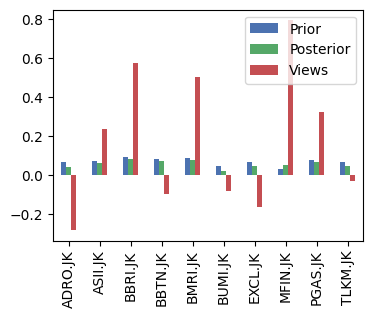

In [ ]:
rets_df1.plot.bar(figsize=(4,3));

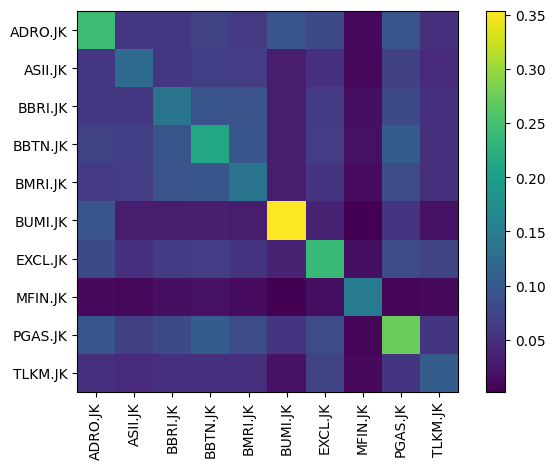

In [ ]:
S_bl1 = bl1.bl_cov()
plotting.plot_covariance(S_bl1);

#### Portfolio allocation

Now that we have constructed our Black-Litterman posterior estimate, we can proceed to use any of the optimizers discussed in previous recipes.

In [ ]:
# Optimize for maximum return
efbl1 = EfficientFrontier(ret_bl1, S_bl1)
efbl1.add_objective(objective_functions.L2_reg)
raw_weightsbl1 = efbl1.max_sharpe(risk_free_rate=rf)
weights_bl1 = efbl1.clean_weights()
print(weights_bl1)
efbl1.portfolio_performance(verbose=True)

OrderedDict([('ADRO.JK', 0.0), ('ASII.JK', 0.11161), ('BBRI.JK', 0.27416), ('BBTN.JK', 0.16025), ('BMRI.JK', 0.22653), ('BUMI.JK', 0.0), ('EXCL.JK', 0.00873), ('MFIN.JK', 0.06076), ('PGAS.JK', 0.13631), ('TLKM.JK', 0.02166)])
Expected annual return: 7.2%
Annual volatility: 29.7%
Sharpe Ratio: 0.11


(0.07236038875890462, 0.29718825451814745, 0.10888851852968694)

## Data Preparation 2
1st of January 2018 - 9th of July 2022

### Download Data

In [ ]:
data_stock2 = yf.download(asset_stock, start="2018-01-01", end="2022-07-10")
data_stock2.index = pd.to_datetime(data_stock2.index).date
data_asset2 = pd.concat([data_stock2],axis=1,sort=False).reset_index()
data_asset2.rename(columns={'index':'Date'}, inplace=True)
data_asset2.index = data_asset2['Date']
data_asset2 = data_asset2.dropna()
df2 = data_asset2['Adj Close']

[*********************100%***********************]  10 of 10 completed


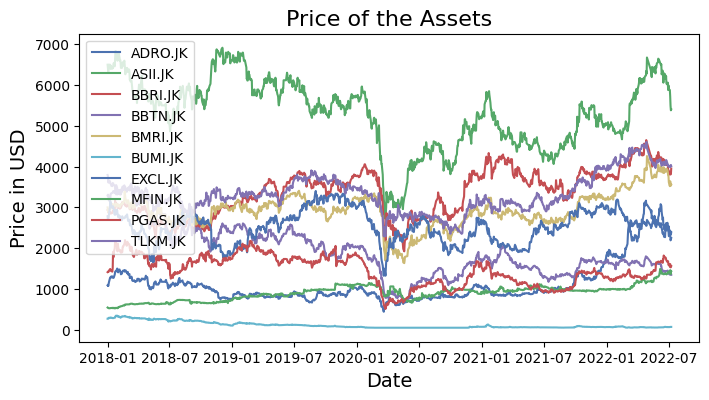

In [ ]:
# Plot
plt.figure(figsize=(8,4))
for i in df2.columns.values:
    plt.plot( df2[i],  label=i)
plt.title('Price of the Assets', fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in USD',fontsize=14)
plt.legend(df1.columns.values, loc='upper left')
plt.show()

### Return, Variance, Correlation, Input Parameter

In [ ]:
# Log Return
df2_return = np.log(df2).diff()
pd.DataFrame(df2_return)

In [ ]:
var_matrix2 = df2_return.cov()
var_matrix2

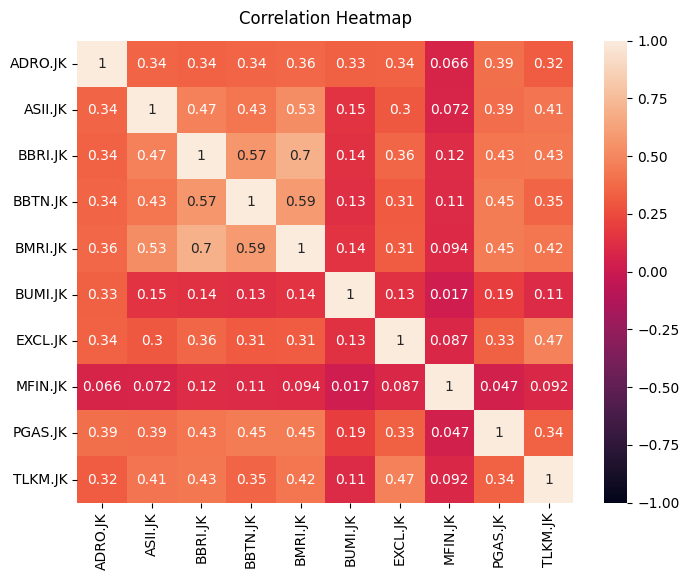

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(8, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df2_return.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Black Litterman Allocation + Maximum Sharpe Ratio

In [ ]:
market_prices2 = yf.download("^JKSE", start="2018-01-01", end="2022-07-10")["Adj Close"]
prices2 = data_asset2['Adj Close']
mcaps2 = {}
for t in order:
    stock = yf.Ticker(t)
    mcaps2[t] = stock.info["marketCap"]
mcaps2

[*********************100%***********************]  1 of 1 completed


{'ADRO.JK': 64098586853376,
 'ASII.JK': 264155470757888,
 'BBRI.JK': 833739051499520,
 'BBTN.JK': 17262312423424,
 'BMRI.JK': 478333158555648,
 'BUMI.JK': 37874741280768,
 'EXCL.JK': 25620922761216,
 'MFIN.JK': 4770000011264,
 'PGAS.JK': 34180515758080,
 'TLKM.JK': 408136280178688}

#### Constructing the prior

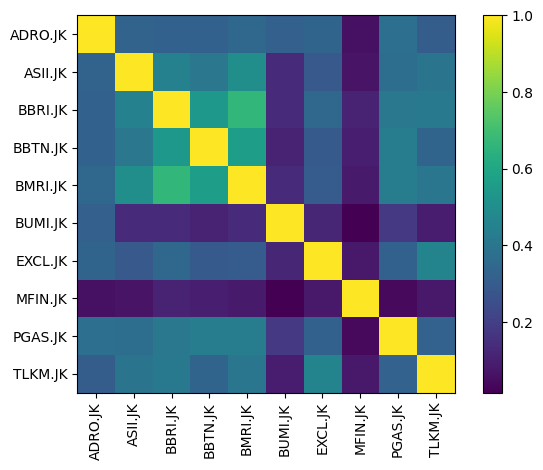

In [ ]:
S2 = risk_models.CovarianceShrinkage(prices2).ledoit_wolf()
delta2 = black_litterman.market_implied_risk_aversion(market_prices2)
plotting.plot_covariance(S2, plot_correlation=True);

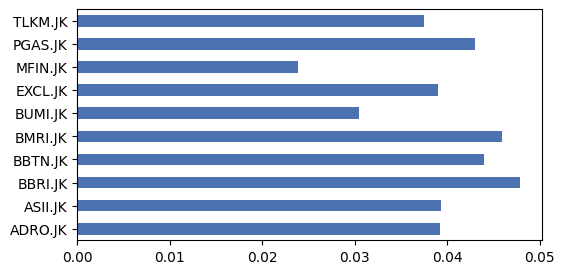

In [ ]:
market_prior2 = black_litterman.market_implied_prior_returns(mcaps2, delta2, S2)
market_prior2.plot.barh(figsize=(6,3));

#### Views

In [ ]:
predicted2 = pd.read_excel('Predicted Return.xlsx', sheet_name='Period2').squeeze('columns')

In [ ]:
# You don't have to provide views on all the assets
viewdict2 = {"ADRO.JK": np.exp(k*np.mean(predicted2['ADRO']))-1,
             "ASII.JK": np.exp(k*np.mean(predicted2['ASII']))-1,
             "BBRI.JK": np.exp(k*np.mean(predicted2['BBRI']))-1,
             "BBTN.JK": np.exp(k*np.mean(predicted2['BBTN']))-1,
             "BMRI.JK": np.exp(k*np.mean(predicted2['BMRI']))-1,
             "BUMI.JK": np.exp(k*np.mean(predicted2['BUMI']))-1,
             "EXCL.JK": np.exp(k*np.mean(predicted2['EXCL']))-1,
             "MFIN.JK": np.exp(k*np.mean(predicted2['MFIN']))-1,
             "PGAS.JK": np.exp(k*np.mean(predicted2['PGAS']))-1,
             "TLKM.JK": np.exp(k*np.mean(predicted2['TLKM']))-1}
bl2 = BlackLittermanModel(S2, pi=market_prior2, absolute_views=viewdict2)

#### View confidences

In [ ]:
confidences2 = [0.05, 0.05, 0.01, 0.01, 0.01, 0.02, 0.03, 0.05, 0.03, 0.03]
bl2 = BlackLittermanModel(S2, pi=market_prior2, absolute_views=viewdict2
                          , omega="idzorek", view_confidences=confidences2)
np.diag(bl2.omega)

array([0.2213259 , 0.11366904, 0.64287804, 0.99968464, 0.6456013 ,
       0.82869743, 0.37106639, 0.13265646, 0.41882583, 0.16176732])

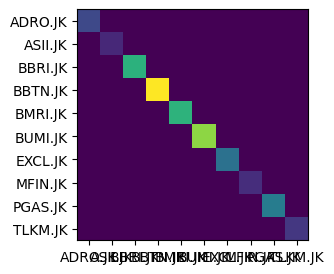

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))
im = ax.imshow(bl2.omega)
ax.set_xticks(np.arange(len(bl2.tickers)))
ax.set_yticks(np.arange(len(bl2.tickers)))
ax.set_xticklabels(bl2.tickers)
ax.set_yticklabels(bl2.tickers)
plt.show()

#### Posterior estimates

Given the inputs, we can compute a posterior estimate of returns


In [ ]:
# We are using the shortcut to automatically compute market-implied prior
bl2 = BlackLittermanModel(S2, pi="market", market_caps=mcaps2, risk_aversion=delta2,
                        absolute_views=viewdict2, omega=bl2.omega)
# Posterior estimate of returns
ret_bl2 = bl2.bl_returns()
rets_df2 = pd.DataFrame([market_prior2, ret_bl2, pd.Series(viewdict2)],
             index=["Prior", "Posterior", "Views"]).T
rets_df2

Prior  Posterior     Views
ADRO.JK  0.039159   0.038647 -0.094029
ASII.JK  0.039355   0.080751  1.285416
BBRI.JK  0.047870   0.057695  0.504200
BBTN.JK  0.043947   0.054494  0.025641
BMRI.JK  0.045956   0.059988  0.660561
BUMI.JK  0.030436   0.019292 -0.085950
EXCL.JK  0.038960   0.039805  0.057015
MFIN.JK  0.023811  -0.013932 -0.440332
PGAS.JK  0.042930   0.047241 -0.317125
TLKM.JK  0.037458   0.036688 -0.028469

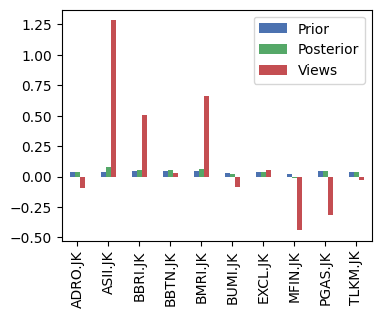

In [ ]:
rets_df2.plot.bar(figsize=(4,3));

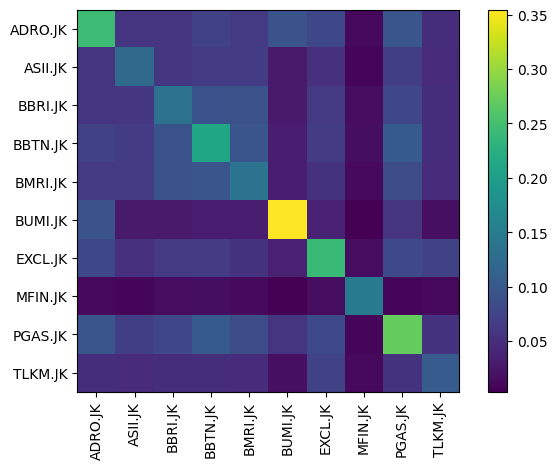

In [ ]:
S_bl2 = bl2.bl_cov()
plotting.plot_covariance(S_bl2);

#### Portfolio allocation

Now that we have constructed our Black-Litterman posterior estimate, we can proceed to use any of the optimizers discussed in previous recipes.

In [ ]:
# Optimize for maximum return
efbl2 = EfficientFrontier(ret_bl2, S_bl2)
efbl2.add_objective(objective_functions.L2_reg)
raw_weightsbl2 = efbl2.max_sharpe(risk_free_rate=rf)
weights_bl2 = efbl2.clean_weights()
print(weights_bl2)
efbl2.portfolio_performance(verbose=True)

OrderedDict([('ADRO.JK', 0.0), ('ASII.JK', 0.49193), ('BBRI.JK', 0.17176), ('BBTN.JK', 0.11442), ('BMRI.JK', 0.19935), ('BUMI.JK', 0.0), ('EXCL.JK', 0.0), ('MFIN.JK', 0.0), ('PGAS.JK', 0.02255), ('TLKM.JK', 0.0)])
Expected annual return: 6.9%
Annual volatility: 30.1%
Sharpe Ratio: 0.10


(0.06889199147852992, 0.30074099134044097, 0.09606934974096691)

## Data Preparation 3
1st of January 2018 - 9th of August 2022

### Download Data

In [ ]:
data_stock3 = yf.download(asset_stock, start="2018-01-01", end="2022-08-10")
data_stock3.index = pd.to_datetime(data_stock3.index).date
data_asset3 = pd.concat([data_stock3],axis=1,sort=False).reset_index()
data_asset3.rename(columns={'index':'Date'}, inplace=True)
data_asset3.index = data_asset3['Date']
data_asset3 = data_asset3.dropna()
df3 = data_asset3['Adj Close']

[*********************100%***********************]  10 of 10 completed


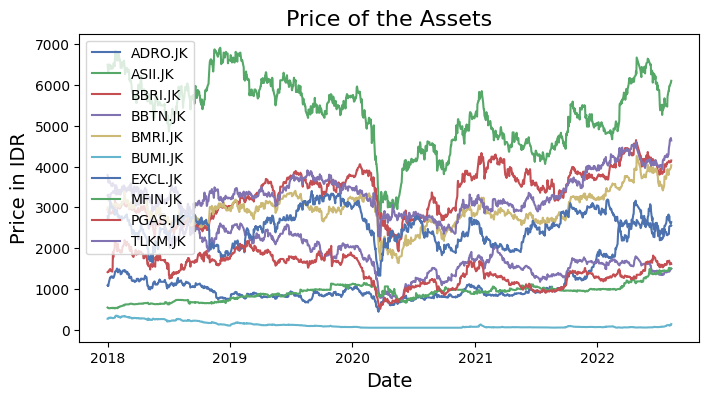

In [ ]:
# Plot
plt.figure(figsize=(8,4))
for i in df3.columns.values:
    plt.plot( df3[i],  label=i)
plt.title('Price of the Assets', fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in IDR',fontsize=14)
plt.legend(df3.columns.values, loc='upper left')
plt.show()

### Return, Variance, Correlation, Input Parameter

In [ ]:
# Log Return
df3_return = np.log(df3).diff()
pd.DataFrame(df3_return)

In [ ]:
var_matrix3 = df3_return.cov()
var_matrix3

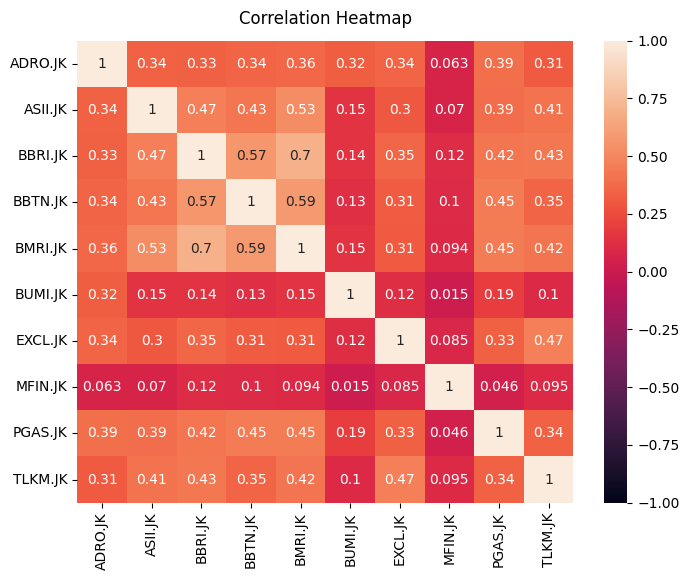

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(8, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df3_return.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Black Litterman Allocation + Maximum Sharpe Ratio

In [ ]:
market_prices3 = yf.download("^JKSE", start="2018-01-01", end="2022-08-10")["Adj Close"]
prices3 = data_asset3['Adj Close']
mcaps3 = {}
for t in order:
    stock = yf.Ticker(t)
    mcaps3[t] = stock.info["marketCap"]
mcaps3

[*********************100%***********************]  1 of 1 completed


{'ADRO.JK': 64098586853376,
 'ASII.JK': 264155470757888,
 'BBRI.JK': 833739051499520,
 'BBTN.JK': 17262312423424,
 'BMRI.JK': 478333158555648,
 'BUMI.JK': 37874741280768,
 'EXCL.JK': 25620922761216,
 'MFIN.JK': 4770000011264,
 'PGAS.JK': 34059308761088,
 'TLKM.JK': 408136280178688}

#### Constructing the prior

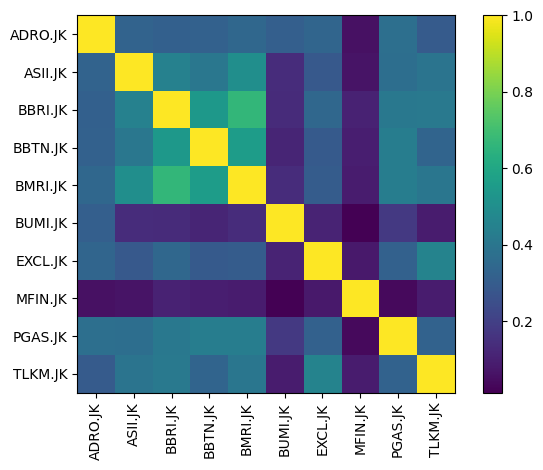

In [ ]:
S3 = risk_models.CovarianceShrinkage(prices3).ledoit_wolf()
delta3 = black_litterman.market_implied_risk_aversion(market_prices3)
plotting.plot_covariance(S3, plot_correlation=True);

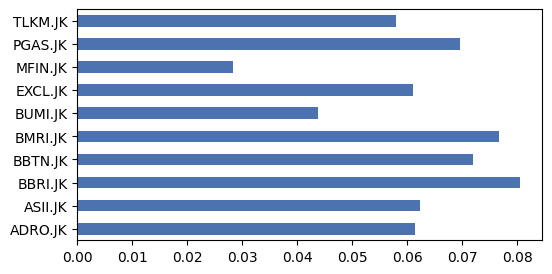

In [ ]:
market_prior3 = black_litterman.market_implied_prior_returns(mcaps3, delta3, S3)
market_prior3.plot.barh(figsize=(6,3));

#### Views

In [ ]:
predicted3 = pd.read_excel('Predicted Return.xlsx', sheet_name='Period3').squeeze('columns')

In [ ]:
# You don't have to provide views on all the assets
viewdict3 = {"ADRO.JK": np.exp(k*np.mean(predicted3['ADRO']))-1,
             "ASII.JK": np.exp(k*np.mean(predicted3['ASII']))-1,
             "BBRI.JK": np.exp(k*np.mean(predicted3['BBRI']))-1,
             "BBTN.JK": np.exp(k*np.mean(predicted3['BBTN']))-1,
             "BMRI.JK": np.exp(k*np.mean(predicted3['BMRI']))-1,
             "BUMI.JK": np.exp(k*np.mean(predicted3['BUMI']))-1,
             "EXCL.JK": np.exp(k*np.mean(predicted3['EXCL']))-1,
             "MFIN.JK": np.exp(k*np.mean(predicted3['MFIN']))-1,
             "PGAS.JK": np.exp(k*np.mean(predicted3['PGAS']))-1,
             "TLKM.JK": np.exp(k*np.mean(predicted3['TLKM']))-1}
bl3 = BlackLittermanModel(S3, pi=market_prior3, absolute_views=viewdict3)

#### View confidences

In [ ]:
confidences3 = [0.05, 0.05, 0.01, 0.01, 0.01, 0.02, 0.03, 0.05, 0.03, 0.03]
bl3 = BlackLittermanModel(S3, pi=market_prior3, absolute_views=viewdict3
                          , omega="idzorek", view_confidences=confidences3)
np.diag(bl3.omega)

array([0.22085937, 0.11363345, 0.63480191, 0.98478812, 0.64388283,
       0.87614566, 0.3689601 , 0.13082082, 0.41405342, 0.16055488])

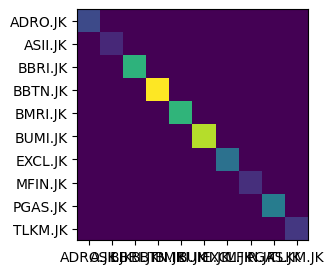

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))
im = ax.imshow(bl3.omega)
ax.set_xticks(np.arange(len(bl3.tickers)))
ax.set_yticks(np.arange(len(bl3.tickers)))
ax.set_xticklabels(bl3.tickers)
ax.set_yticklabels(bl3.tickers)
plt.show()

#### Posterior estimates

Given the inputs, we can compute a posterior estimate of returns


In [ ]:
# We are using the shortcut to automatically compute market-implied prior
bl3 = BlackLittermanModel(S3, pi="market", market_caps=mcaps3, risk_aversion=delta3,
                        absolute_views=viewdict3, omega=bl3.omega)
# Posterior estimate of returns
ret_bl3 = bl3.bl_returns()
rets_df3 = pd.DataFrame([market_prior3, ret_bl3, pd.Series(viewdict3)],
             index=["Prior", "Posterior", "Views"]).T
rets_df3

Prior  Posterior     Views
ADRO.JK  0.061447   0.044361 -0.272649
ASII.JK  0.062290   0.065283  0.338653
BBRI.JK  0.080537   0.079265  0.144711
BBTN.JK  0.071874   0.071569  0.098248
BMRI.JK  0.076690   0.078210  0.906815
BUMI.JK  0.043685   0.021822 -0.241748
EXCL.JK  0.060977   0.058346  0.107710
MFIN.JK  0.028296   0.026051  0.313757
PGAS.JK  0.069662   0.071978  0.358313
TLKM.JK  0.057928   0.057964  0.440752

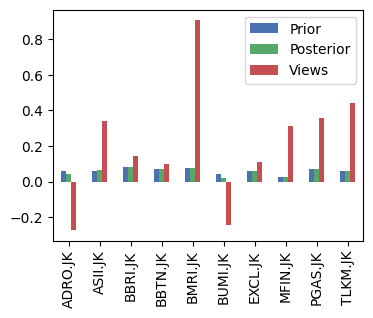

In [ ]:
rets_df3.plot.bar(figsize=(4,3));

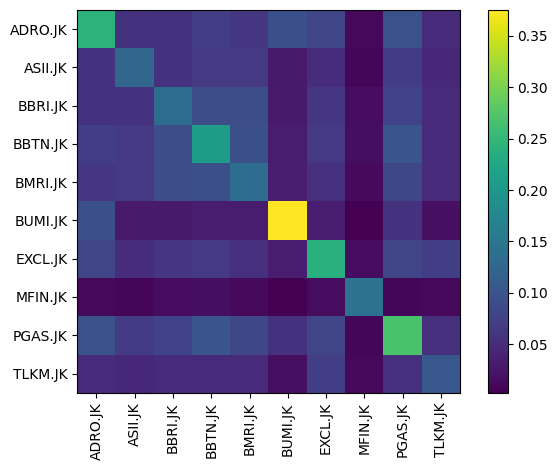

In [ ]:
S_bl3 = bl3.bl_cov()
plotting.plot_covariance(S_bl3);

#### Portfolio allocation

Now that we have constructed our Black-Litterman posterior estimate, we can proceed to use any of the optimizers discussed in previous recipes.

In [ ]:
# Optimize for maximum return
efbl3 = EfficientFrontier(ret_bl3, S_bl3)
efbl3.add_objective(objective_functions.L2_reg)
raw_weightsbl3 = efbl3.max_sharpe(risk_free_rate=rf)
weights_bl3 = efbl3.clean_weights()
print(weights_bl3)
efbl3.portfolio_performance(verbose=True)

OrderedDict([('ADRO.JK', 0.0), ('ASII.JK', 0.12881), ('BBRI.JK', 0.21872), ('BBTN.JK', 0.14543), ('BMRI.JK', 0.20889), ('BUMI.JK', 0.0), ('EXCL.JK', 0.06873), ('MFIN.JK', 0.0), ('PGAS.JK', 0.14383), ('TLKM.JK', 0.0856)])
Expected annual return: 7.2%
Annual volatility: 29.5%
Sharpe Ratio: 0.11


(0.07181522655328564, 0.2946981193878982, 0.10795870234722689)

## Data Preparation 4
1st of January 2018 - 9th of September 2022

### Download Data

In [ ]:
data_stock4 = yf.download(asset_stock, start="2018-01-01", end="2022-09-10")
data_stock4.index = pd.to_datetime(data_stock4.index).date
data_asset4 = pd.concat([data_stock4],axis=1,sort=False).reset_index()
data_asset4.rename(columns={'index':'Date'}, inplace=True)
data_asset4.index = data_asset4['Date']
data_asset4 = data_asset4.dropna()
df4 = data_asset4['Adj Close']

[*********************100%***********************]  10 of 10 completed


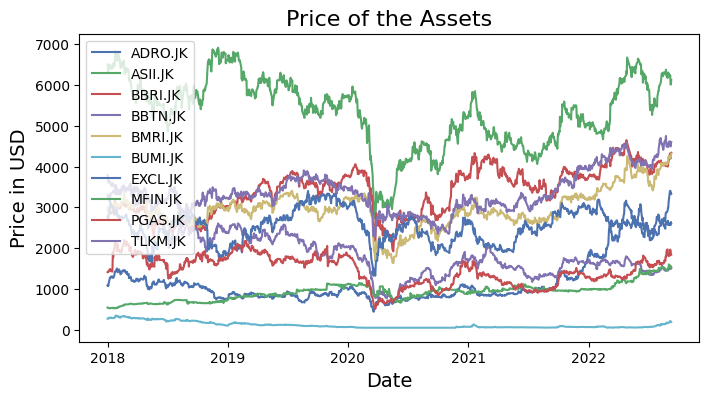

In [ ]:
# Plot
plt.figure(figsize=(8,4))
for i in df4.columns.values:
    plt.plot( df4[i],  label=i)
plt.title('Price of the Assets', fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in USD',fontsize=14)
plt.legend(df4.columns.values, loc='upper left')
plt.show()

### Return, Variance, Correlation, Input Parameter

In [ ]:
# Log Return
df4_return = np.log(df4).diff()
pd.DataFrame(df4_return)

In [ ]:
var_matrix4 = df4_return.cov()
var_matrix4

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(8, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df4_return.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Black Litterman Allocation + Maximum Sharpe Ratio

In [ ]:
market_prices4 = yf.download("^JKSE", start="2018-01-01", end="2022-09-10")["Adj Close"]
prices4 = data_asset4['Adj Close']
mcaps4 = {}
for t in order:
    stock = yf.Ticker(t)
    mcaps4[t] = stock.info["marketCap"]
mcaps4

[*********************100%***********************]  1 of 1 completed


{'ADRO.JK': 64098586853376,
 'ASII.JK': 264155470757888,
 'BBRI.JK': 833739051499520,
 'BBTN.JK': 17332484177920,
 'BMRI.JK': 475999816908800,
 'BUMI.JK': 37874741280768,
 'EXCL.JK': 25620922761216,
 'MFIN.JK': 4770000011264,
 'PGAS.JK': 34180515758080,
 'TLKM.JK': 408136280178688}

#### Constructing the prior

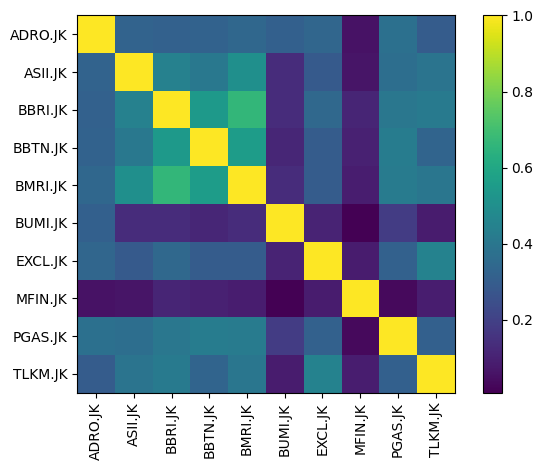

In [ ]:
S4 = risk_models.CovarianceShrinkage(prices4).ledoit_wolf()
delta4 = black_litterman.market_implied_risk_aversion(market_prices4)
plotting.plot_covariance(S4, plot_correlation=True);

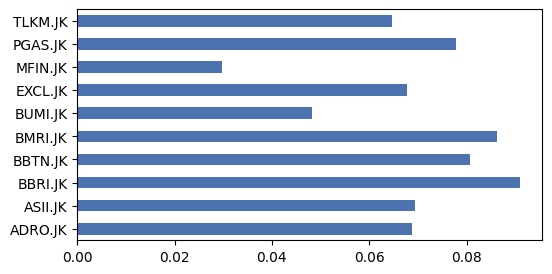

In [ ]:
market_prior4 = black_litterman.market_implied_prior_returns(mcaps4, delta4, S4)
market_prior4.plot.barh(figsize=(6,3));

#### Views

In [ ]:
predicted4 = pd.read_excel('Predicted Return.xlsx', sheet_name='Period4').squeeze('columns')

In [ ]:
# You don't have to provide views on all the assets
viewdict4 = {"ADRO.JK": np.exp(k*np.mean(predicted4['ADRO']))-1,
             "ASII.JK": np.exp(k*np.mean(predicted4['ASII']))-1,
             "BBRI.JK": np.exp(k*np.mean(predicted4['BBRI']))-1,
             "BBTN.JK": np.exp(k*np.mean(predicted4['BBTN']))-1,
             "BMRI.JK": np.exp(k*np.mean(predicted4['BMRI']))-1,
             "BUMI.JK": np.exp(k*np.mean(predicted4['BUMI']))-1,
             "EXCL.JK": np.exp(k*np.mean(predicted4['EXCL']))-1,
             "MFIN.JK": np.exp(k*np.mean(predicted4['MFIN']))-1,
             "PGAS.JK": np.exp(k*np.mean(predicted4['PGAS']))-1,
             "TLKM.JK": np.exp(k*np.mean(predicted4['TLKM']))-1}
bl4 = BlackLittermanModel(S4, pi=market_prior4, absolute_views=viewdict4)

#### View confidences

In [ ]:
confidences4 = [0.05, 0.05, 0.01, 0.01, 0.01, 0.02, 0.03, 0.05, 0.03, 0.03]
bl4 = BlackLittermanModel(S4, pi=market_prior4, absolute_views=viewdict4
                          , omega="idzorek", view_confidences=confidences4)
np.diag(bl4.omega)

array([0.21962154, 0.11222312, 0.62749066, 0.97263961, 0.63446651,
       0.90396935, 0.36619483, 0.13021479, 0.41425345, 0.15952815])

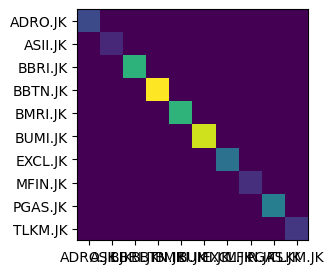

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))
im = ax.imshow(bl4.omega)
ax.set_xticks(np.arange(len(bl4.tickers)))
ax.set_yticks(np.arange(len(bl4.tickers)))
ax.set_xticklabels(bl4.tickers)
ax.set_yticklabels(bl4.tickers)
plt.show()

#### Posterior estimates

Given the inputs, we can compute a posterior estimate of returns


In [ ]:
# We are using the shortcut to automatically compute market-implied prior
bl4 = BlackLittermanModel(S4, pi="market", market_caps=mcaps4, risk_aversion=delta4,
                        absolute_views=viewdict4, omega=bl4.omega)
# Posterior estimate of returns
ret_bl4 = bl4.bl_returns()
rets_df4 = pd.DataFrame([market_prior4, ret_bl4, pd.Series(viewdict4)],
             index=["Prior", "Posterior", "Views"]).T
rets_df4

Prior  Posterior     Views
ADRO.JK  0.068807   0.099188 -0.090083
ASII.JK  0.069501   0.129914  0.944140
BBRI.JK  0.091038   0.136249  0.799481
BBTN.JK  0.080723   0.124653  0.192841
BMRI.JK  0.086277   0.134086  1.103299
BUMI.JK  0.048254   0.051333  0.148481
EXCL.JK  0.067840   0.121118  0.153010
MFIN.JK  0.029814   0.000704 -0.413382
PGAS.JK  0.077814   0.118002 -0.239395
TLKM.JK  0.064627   0.144535  2.858609

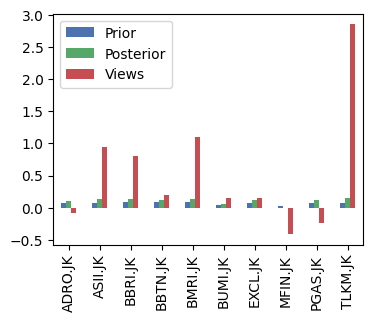

In [ ]:
rets_df4.plot.bar(figsize=(4,3));

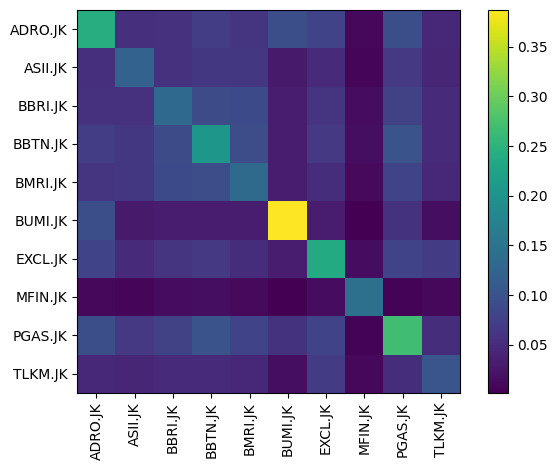

In [ ]:
S_bl4 = bl4.bl_cov()
plotting.plot_covariance(S_bl4);

#### Portfolio allocation

Now that we have constructed our Black-Litterman posterior estimate, we can proceed to use any of the optimizers discussed in previous recipes.

In [ ]:
# Optimize for maximum return
efbl4 = EfficientFrontier(ret_bl4, S_bl4)
efbl4.add_objective(objective_functions.L2_reg)
raw_weightsbl4 = efbl4.max_sharpe(risk_free_rate=rf)
weights_bl4 = efbl4.clean_weights()
print(weights_bl4)
efbl4.portfolio_performance(verbose=True)

OrderedDict([('ADRO.JK', 0.06443), ('ASII.JK', 0.14563), ('BBRI.JK', 0.14964), ('BBTN.JK', 0.11082), ('BMRI.JK', 0.14357), ('BUMI.JK', 0.0), ('EXCL.JK', 0.10881), ('MFIN.JK', 0.0), ('PGAS.JK', 0.09123), ('TLKM.JK', 0.18587)])
Expected annual return: 13.0%
Annual volatility: 27.5%
Sharpe Ratio: 0.33


(0.12957210298650018, 0.27476027756381216, 0.3260009189854503)

## Data Preparation 5
1st of January 2018 - 9th of October 2022

### Download Data

In [ ]:
data_stock5 = yf.download(asset_stock, start="2018-01-01", end="2022-10-10")
data_stock5.index = pd.to_datetime(data_stock5.index).date
data_asset5 = pd.concat([data_stock5],axis=1,sort=False).reset_index()
data_asset5.rename(columns={'index':'Date'}, inplace=True)
data_asset5.index = data_asset5['Date']
data_asset5 = data_asset5.dropna()
df5 = data_asset5['Adj Close']

[*********************100%***********************]  10 of 10 completed


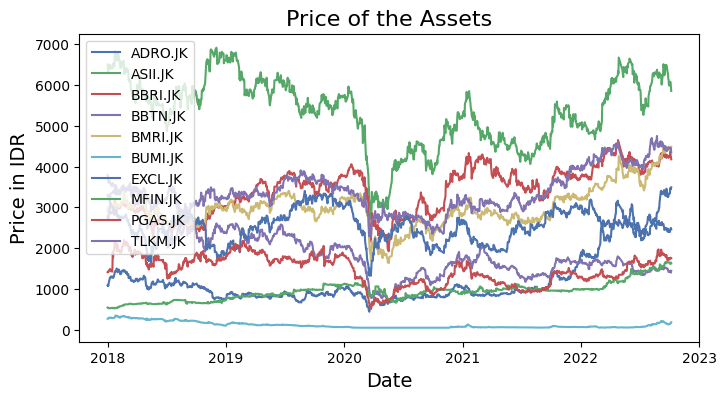

In [ ]:
# Plot
plt.figure(figsize=(8,4))
for i in df5.columns.values:
    plt.plot( df5[i],  label=i)
plt.title('Price of the Assets', fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in IDR',fontsize=14)
plt.legend(df5.columns.values, loc='upper left')
plt.show()

### Return, Variance, Correlation, Input Parameter

In [ ]:
# Log Return
df5_return = np.log(df5).diff()
pd.DataFrame(df5_return)

In [ ]:
var_matrix5 = df5_return.cov()
var_matrix5

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(8, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df5_return.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Black Litterman Allocation + Maximum Sharpe Ratio

In [ ]:
market_prices5 = yf.download("^JKSE", start="2018-01-01", end="2022-10-10")["Adj Close"]
prices5 = data_asset5['Adj Close']
mcaps5 = {}
for t in order:
    stock = yf.Ticker(t)
    mcaps5[t] = stock.info["marketCap"]
mcaps5

[*********************100%***********************]  1 of 1 completed


{'ADRO.JK': 64098586853376,
 'ASII.JK': 264155470757888,
 'BBRI.JK': 833739051499520,
 'BBTN.JK': 17332484177920,
 'BMRI.JK': 478333158555648,
 'BUMI.JK': 37874741280768,
 'EXCL.JK': 25620922761216,
 'MFIN.JK': 4770000011264,
 'PGAS.JK': 34059308761088,
 'TLKM.JK': 408136280178688}

#### Constructing the prior

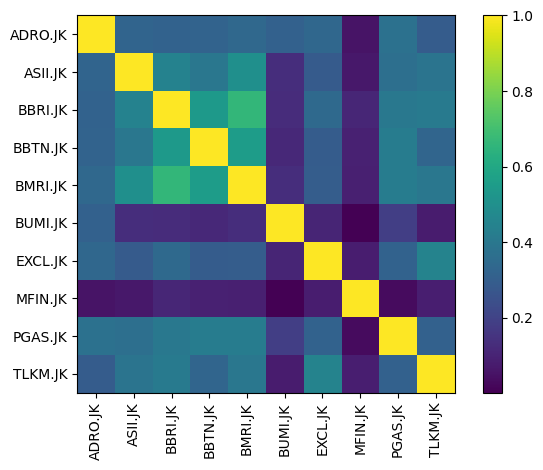

In [ ]:
S5 = risk_models.CovarianceShrinkage(prices5).ledoit_wolf()
delta5 = black_litterman.market_implied_risk_aversion(market_prices5)
plotting.plot_covariance(S5, plot_correlation=True);

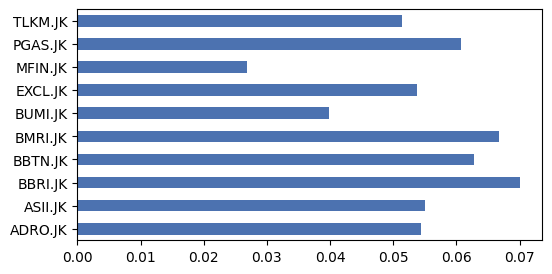

In [ ]:
market_prior5 = black_litterman.market_implied_prior_returns(mcaps5, delta5, S5)
market_prior5.plot.barh(figsize=(6,3));

#### Views

In [ ]:
predicted5 = pd.read_excel('Predicted Return.xlsx', sheet_name='Period5').squeeze('columns')

In [ ]:
# You don't have to provide views on all the assets
viewdict5 = {"ADRO.JK": np.exp(k*np.mean(predicted5['ADRO']))-1,
             "ASII.JK": np.exp(k*np.mean(predicted5['ASII']))-1,
             "BBRI.JK": np.exp(k*np.mean(predicted5['BBRI']))-1,
             "BBTN.JK": np.exp(k*np.mean(predicted5['BBTN']))-1,
             "BMRI.JK": np.exp(k*np.mean(predicted5['BMRI']))-1,
             "BUMI.JK": np.exp(k*np.mean(predicted5['BUMI']))-1,
             "EXCL.JK": np.exp(k*np.mean(predicted5['EXCL']))-1,
             "MFIN.JK": np.exp(k*np.mean(predicted5['MFIN']))-1,
             "PGAS.JK": np.exp(k*np.mean(predicted5['PGAS']))-1,
             "TLKM.JK": np.exp(k*np.mean(predicted5['TLKM']))-1}
bl5 = BlackLittermanModel(S5, pi=market_prior5, absolute_views=viewdict5)

#### View confidences

In [ ]:
confidences5 = [0.05, 0.05, 0.01, 0.01, 0.01, 0.02, 0.03, 0.05, 0.03, 0.03]
bl5 = BlackLittermanModel(S5, pi=market_prior5, absolute_views=viewdict5
                          , omega="idzorek", view_confidences=confidences5)
np.diag(bl5.omega)

array([0.21769108, 0.11156099, 0.62070173, 0.96302107, 0.62735729,
       0.92477561, 0.36192009, 0.12877975, 0.4097225 , 0.15763646])

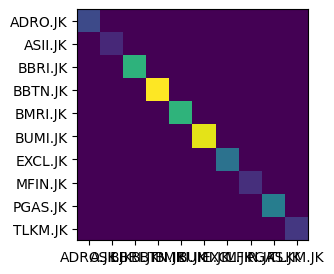

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))
im = ax.imshow(bl5.omega)
ax.set_xticks(np.arange(len(bl5.tickers)))
ax.set_yticks(np.arange(len(bl5.tickers)))
ax.set_xticklabels(bl5.tickers)
ax.set_yticklabels(bl5.tickers)
plt.show()

#### Posterior estimates

Given the inputs, we can compute a posterior estimate of returns


In [ ]:
# We are using the shortcut to automatically compute market-implied prior
bl5 = BlackLittermanModel(S5, pi="market", market_caps=mcaps5, risk_aversion=delta5,
                        absolute_views=viewdict5, omega=bl5.omega)
# Posterior estimate of returns
ret_bl5 = bl5.bl_returns()
rets_df5 = pd.DataFrame([market_prior5, ret_bl5, pd.Series(viewdict5)],
             index=["Prior", "Posterior", "Views"]).T
rets_df5

Prior  Posterior     Views
ADRO.JK  0.054419   0.118029  0.612943
ASII.JK  0.054952   0.113535  0.616332
BBRI.JK  0.070083   0.123941  0.851380
BBTN.JK  0.062742   0.117456  0.380009
BMRI.JK  0.066702   0.119968  0.489067
BUMI.JK  0.039887   0.045737 -0.294070
EXCL.JK  0.053796   0.115863 -0.260532
MFIN.JK  0.026832   0.029986  0.202785
PGAS.JK  0.060719   0.115463 -0.030036
TLKM.JK  0.051444   0.149647  3.486029

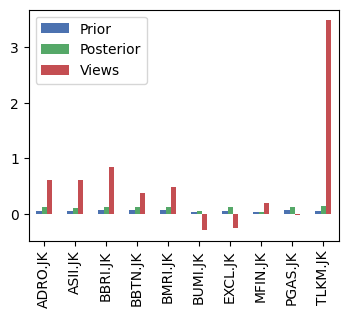

In [ ]:
rets_df5.plot.bar(figsize=(4,3));

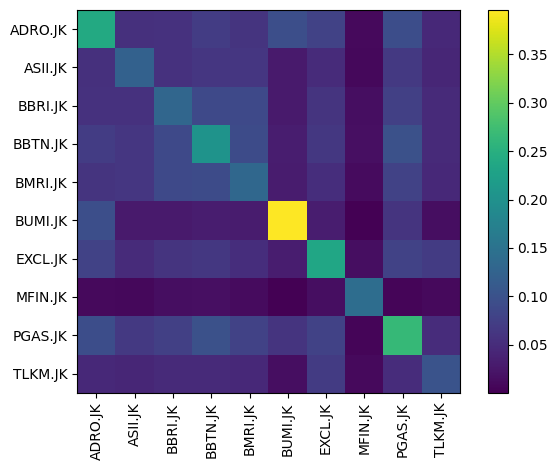

In [ ]:
S_bl5 = bl5.bl_cov()
plotting.plot_covariance(S_bl5);

#### Portfolio allocation

Now that we have constructed our Black-Litterman posterior estimate, we can proceed to use any of the optimizers discussed in previous recipes.

In [ ]:
# Optimize for maximum return
efbl5 = EfficientFrontier(ret_bl5, S_bl5)
efbl5.add_objective(objective_functions.L2_reg)
raw_weightsbl5 = efbl5.max_sharpe(risk_free_rate=rf)
weights_bl5 = efbl5.clean_weights()
print(weights_bl5)
efbl5.portfolio_performance(verbose=True)

OrderedDict([('ADRO.JK', 0.11043), ('ASII.JK', 0.11847), ('BBRI.JK', 0.13341), ('BBTN.JK', 0.10559), ('BMRI.JK', 0.12294), ('BUMI.JK', 0.0), ('EXCL.JK', 0.10505), ('MFIN.JK', 0.0), ('PGAS.JK', 0.09412), ('TLKM.JK', 0.20997)])
Expected annual return: 12.5%
Annual volatility: 27.3%
Sharpe Ratio: 0.31


(0.12463316609496539, 0.27323107998652124, 0.3097494110082221)

## Data Preparation 6
1st of January 2018 - 9th of November 2022

### Download Data

In [ ]:
data_stock6 = yf.download(asset_stock, start="2018-01-01", end="2022-11-10")
data_stock6.index = pd.to_datetime(data_stock6.index).date
data_asset6 = pd.concat([data_stock6],axis=1,sort=False).reset_index()
data_asset6.rename(columns={'index':'Date'}, inplace=True)
data_asset6.index = data_asset6['Date']
data_asset6 = data_asset6.dropna()
df6 = data_asset6['Adj Close']

[*********************100%***********************]  10 of 10 completed


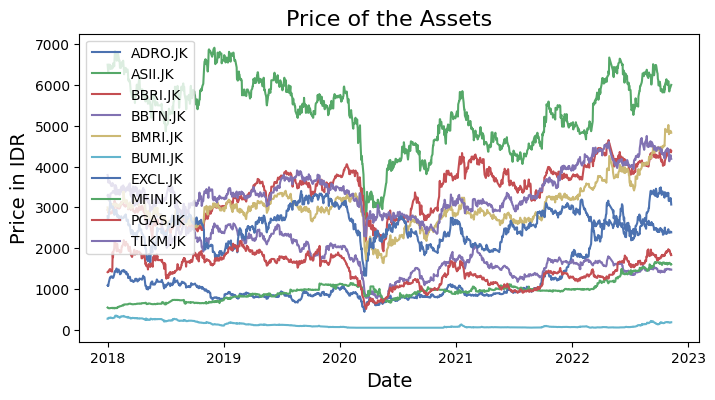

In [ ]:
# Plot
plt.figure(figsize=(8,4))
for i in df6.columns.values:
    plt.plot( df6[i],  label=i)
plt.title('Price of the Assets', fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in IDR',fontsize=14)
plt.legend(df6.columns.values, loc='upper left')
plt.show()

### Return, Variance, Correlation, Input Parameter

In [ ]:
# Log Return
df6_return = np.log(df6).diff()
pd.DataFrame(df6_return)

In [ ]:
var_matrix6 = df6_return.cov()
var_matrix6

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(8, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df6_return.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Black Litterman Allocation + Maximum Sharpe Ratio

In [ ]:
market_prices6 = yf.download("^JKSE", start="2018-01-01", end="2022-11-10")["Adj Close"]
prices6 = data_asset6['Adj Close']
mcaps6 = {}
for t in order:
    stock = yf.Ticker(t)
    mcaps6[t] = stock.info["marketCap"]
mcaps6

[*********************100%***********************]  1 of 1 completed


{'ADRO.JK': 64098586853376,
 'ASII.JK': 267191744200704,
 'BBRI.JK': 837511643398144,
 'BBTN.JK': 17262312423424,
 'BMRI.JK': 480666500202496,
 'BUMI.JK': 37132102008832,
 'EXCL.JK': 25424845340672,
 'MFIN.JK': 4716999737344,
 'PGAS.JK': 34180515758080,
 'TLKM.JK': 416061266591744}

#### Constructing the prior

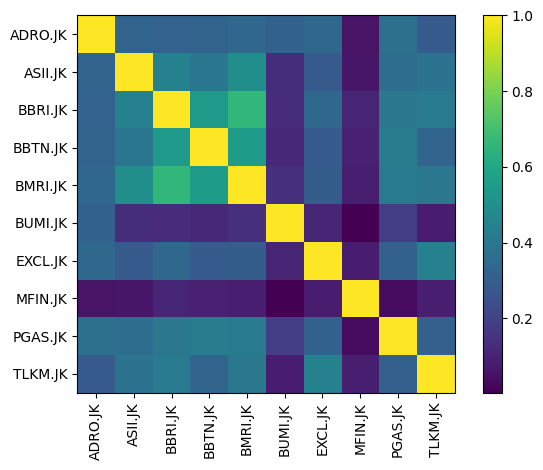

In [ ]:
S6 = risk_models.CovarianceShrinkage(prices6).ledoit_wolf()
delta6 = black_litterman.market_implied_risk_aversion(market_prices6)
plotting.plot_covariance(S6, plot_correlation=True);

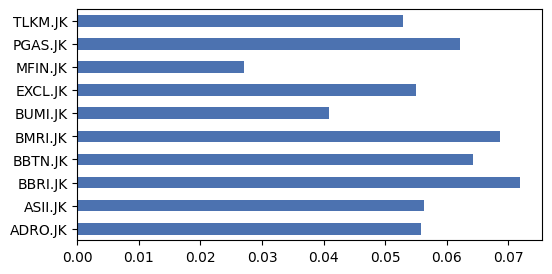

In [ ]:
market_prior6 = black_litterman.market_implied_prior_returns(mcaps6, delta6, S6)
market_prior6.plot.barh(figsize=(6,3));

#### Views

In [ ]:
predicted6 = pd.read_excel('Predicted Return.xlsx', sheet_name='Period6').squeeze('columns')

In [ ]:
# You don't have to provide views on all the assets
viewdict6 = {"ADRO.JK": np.exp(k*np.mean(predicted6['ADRO']))-1,
             "ASII.JK": np.exp(k*np.mean(predicted6['ASII']))-1,
             "BBRI.JK": np.exp(k*np.mean(predicted6['BBRI']))-1,
             "BBTN.JK": np.exp(k*np.mean(predicted6['BBTN']))-1,
             "BMRI.JK": np.exp(k*np.mean(predicted6['BMRI']))-1,
             "BUMI.JK": np.exp(k*np.mean(predicted6['BUMI']))-1,
             "EXCL.JK": np.exp(k*np.mean(predicted6['EXCL']))-1,
             "MFIN.JK": np.exp(k*np.mean(predicted6['MFIN']))-1,
             "PGAS.JK": np.exp(k*np.mean(predicted6['PGAS']))-1,
             "TLKM.JK": np.exp(k*np.mean(predicted6['TLKM']))-1}
bl6 = BlackLittermanModel(S6, pi=market_prior6, absolute_views=viewdict6)

#### View confidences

In [ ]:
confidences6 = [0.05, 0.05, 0.01, 0.01, 0.01, 0.02, 0.03, 0.05, 0.03, 0.03]
bl6 = BlackLittermanModel(S6, pi=market_prior6, absolute_views=viewdict6
                          , omega="idzorek", view_confidences=confidences6)
np.diag(bl6.omega)

array([0.21606121, 0.11025424, 0.61222007, 0.94954829, 0.6228728 ,
       0.92036172, 0.35777667, 0.12709538, 0.40502079, 0.15697391])

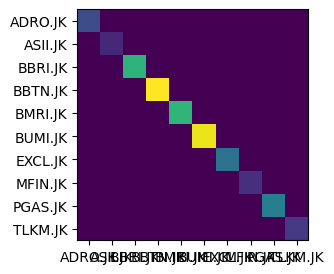

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))
im = ax.imshow(bl6.omega)
ax.set_xticks(np.arange(len(bl6.tickers)))
ax.set_yticks(np.arange(len(bl6.tickers)))
ax.set_xticklabels(bl6.tickers)
ax.set_yticklabels(bl6.tickers)
plt.show()

#### Posterior estimates

Given the inputs, we can compute a posterior estimate of returns


In [ ]:
# We are using the shortcut to automatically compute market-implied prior
bl6 = BlackLittermanModel(S6, pi="market", market_caps=mcaps6, risk_aversion=delta6,
                        absolute_views=viewdict6, omega=bl6.omega)
# Posterior estimate of returns
ret_bl6 = bl6.bl_returns()
rets_df6 = pd.DataFrame([market_prior6, ret_bl6, pd.Series(viewdict6)],
             index=["Prior", "Posterior", "Views"]).T
rets_df6

Prior  Posterior     Views
ADRO.JK  0.055806   0.075960  0.593032
ASII.JK  0.056278   0.067043  0.462220
BBRI.JK  0.071941   0.074778  0.296007
BBTN.JK  0.064288   0.075275  1.034022
BMRI.JK  0.068613   0.073334  0.311567
BUMI.JK  0.040891   0.030681 -0.432173
EXCL.JK  0.055064   0.058636  0.233196
MFIN.JK  0.027029   0.018183  0.165228
PGAS.JK  0.062109   0.072716  0.232880
TLKM.JK  0.052868   0.043704 -0.223943

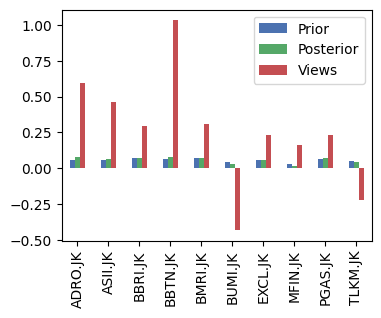

In [ ]:
rets_df6.plot.bar(figsize=(4,3));

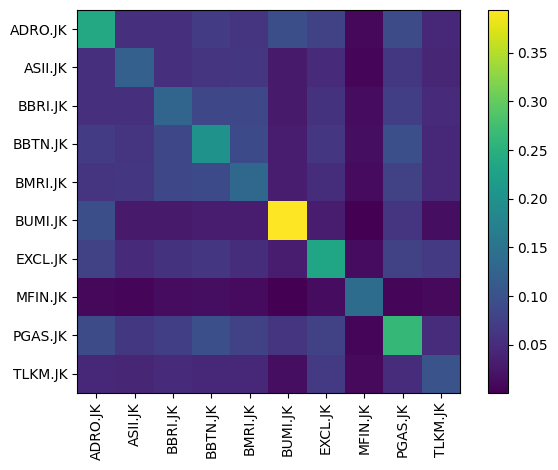

In [ ]:
S_bl6 = bl6.bl_cov()
plotting.plot_covariance(S_bl6);

#### Portfolio allocation

Now that we have constructed our Black-Litterman posterior estimate, we can proceed to use any of the optimizers discussed in previous recipes.

In [ ]:
# Optimize for maximum return
efbl6 = EfficientFrontier(ret_bl6, S_bl6)
efbl6.add_objective(objective_functions.L2_reg)
raw_weightsbl6 = efbl6.max_sharpe(risk_free_rate=rf)
weights_bl6 = efbl6.clean_weights()
print(weights_bl6)
efbl6.portfolio_performance(verbose=True)

OrderedDict([('ADRO.JK', 0.16941), ('ASII.JK', 0.13227), ('BBRI.JK', 0.17562), ('BBTN.JK', 0.16095), ('BMRI.JK', 0.16262), ('BUMI.JK', 0.0), ('EXCL.JK', 0.06351), ('MFIN.JK', 0.0), ('PGAS.JK', 0.13562), ('TLKM.JK', 0.0)])
Expected annual return: 7.3%
Annual volatility: 29.6%
Sharpe Ratio: 0.11


(0.07254003545336428, 0.2964881545581669, 0.10975155315009515)

## Data Preparation 7
1st of January 2018 - 9th of December 2022

### Download Data

In [ ]:
data_stock7 = yf.download(asset_stock, start="2018-01-01", end="2022-12-10")
data_stock7.index = pd.to_datetime(data_stock7.index).date
data_asset7 = pd.concat([data_stock7],axis=1,sort=False).reset_index()
data_asset7.rename(columns={'index':'Date'}, inplace=True)
data_asset7.index = data_asset7['Date']
data_asset7 = data_asset7.dropna()
df7 = data_asset7['Adj Close']

[*********************100%***********************]  10 of 10 completed


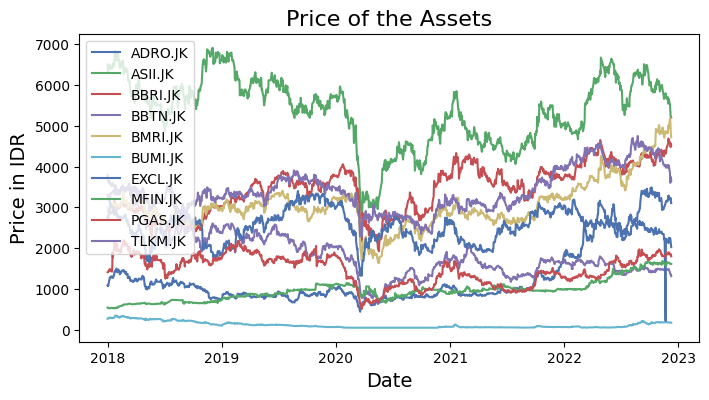

In [ ]:
# Plot
plt.figure(figsize=(8,4))
for i in df7.columns.values:
    plt.plot( df7[i],  label=i)
plt.title('Price of the Assets', fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in IDR',fontsize=14)
plt.legend(df7.columns.values, loc='upper left')
plt.show()

### Return, Variance, Correlation, Input Parameter

In [ ]:
# Log Return
df7_return = np.log(df7).diff()
pd.DataFrame(df7_return)

In [ ]:
var_matrix7 = df7_return.cov()
var_matrix7

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(8, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df7_return.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Black Litterman Allocation + Maximum Sharpe Ratio

In [ ]:
market_prices7 = yf.download("^JKSE", start="2018-01-01", end="2022-12-10")["Adj Close"]
prices7 = data_asset7['Adj Close']
mcaps7 = {}
for t in order:
    stock = yf.Ticker(t)
    mcaps7[t] = stock.info["marketCap"]
mcaps7

[*********************100%***********************]  1 of 1 completed


{'ADRO.JK': 64098586853376,
 'ASII.JK': 267191744200704,
 'BBRI.JK': 837511643398144,
 'BBTN.JK': 17262312423424,
 'BMRI.JK': 480666500202496,
 'BUMI.JK': 37132102008832,
 'EXCL.JK': 25424845340672,
 'MFIN.JK': 4716999737344,
 'PGAS.JK': 34180515758080,
 'TLKM.JK': 416061266591744}

#### Constructing the prior

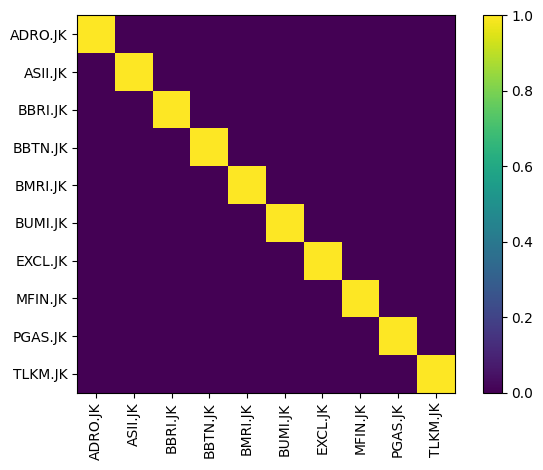

In [ ]:
S7 = risk_models.CovarianceShrinkage(prices7).ledoit_wolf()
delta7 = black_litterman.market_implied_risk_aversion(market_prices7)
plotting.plot_covariance(S7, plot_correlation=True);

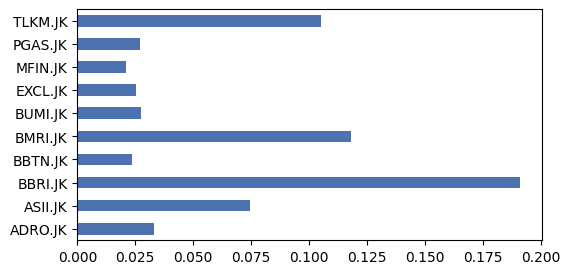

In [ ]:
market_prior7 = black_litterman.market_implied_prior_returns(mcaps7, delta7, S7)
market_prior7.plot.barh(figsize=(6,3));

#### Views

In [ ]:
predicted7 = pd.read_excel('Predicted Return.xlsx', sheet_name='Period7').squeeze('columns')

In [ ]:
# You don't have to provide views on all the assets
viewdict7 = {"ADRO.JK": np.exp(k*np.mean(predicted7['ADRO']))-1,
             "ASII.JK": np.exp(k*np.mean(predicted7['ASII']))-1,
             "BBRI.JK": np.exp(k*np.mean(predicted7['BBRI']))-1,
             "BBTN.JK": np.exp(k*np.mean(predicted7['BBTN']))-1,
             "BMRI.JK": np.exp(k*np.mean(predicted7['BMRI']))-1,
             "BUMI.JK": np.exp(k*np.mean(predicted7['BUMI']))-1,
             "EXCL.JK": np.exp(k*np.mean(predicted7['EXCL']))-1,
             "MFIN.JK": np.exp(k*np.mean(predicted7['MFIN']))-1,
             "PGAS.JK": np.exp(k*np.mean(predicted7['PGAS']))-1,
             "TLKM.JK": np.exp(k*np.mean(predicted7['TLKM']))-1}
bl7 = BlackLittermanModel(S7, pi=market_prior7, absolute_views=viewdict7)

#### View confidences

In [ ]:
confidences7 = [0.05, 0.05, 0.01, 0.01, 0.01, 0.02, 0.03, 0.05, 0.03, 0.03]
bl7 = BlackLittermanModel(S7, pi=market_prior7, absolute_views=viewdict7
                          , omega="idzorek", view_confidences=confidences7)
np.diag(bl7.omega)

array([1.84995505, 1.84995505, 9.63923946, 9.63923946, 9.63923946,
       4.7709367 , 3.14816912, 1.84995505, 3.14816912, 3.14816912])

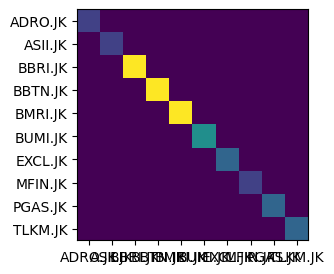

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))
im = ax.imshow(bl7.omega)
ax.set_xticks(np.arange(len(bl7.tickers)))
ax.set_yticks(np.arange(len(bl7.tickers)))
ax.set_xticklabels(bl7.tickers)
ax.set_yticklabels(bl7.tickers)
plt.show()

#### Posterior estimates

Given the inputs, we can compute a posterior estimate of returns


In [ ]:
# We are using the shortcut to automatically compute market-implied prior
bl7 = BlackLittermanModel(S7, pi="market", market_caps=mcaps7, risk_aversion=delta7,
                        absolute_views=viewdict7, omega=bl7.omega)
# Posterior estimate of returns
ret_bl7 = bl7.bl_returns()
rets_df7 = pd.DataFrame([market_prior7, ret_bl7, pd.Series(viewdict7)],
             index=["Prior", "Posterior", "Views"]).T
rets_df7

Prior  Posterior     Views
ADRO.JK  0.033096   0.043198  0.615124
ASII.JK  0.074591   0.071407  0.390914
BBRI.JK  0.191115   0.168708 -0.069554
BBTN.JK  0.023527   0.006033  0.254104
BMRI.JK  0.118207   0.102576  0.535126
BUMI.JK  0.027587   0.001241 -0.309699
EXCL.JK  0.025195  -0.015458 -0.683230
MFIN.JK  0.020964   0.012718  0.236046
PGAS.JK  0.026984   0.040047  1.109089
TLKM.JK  0.105007   0.075856 -0.220038

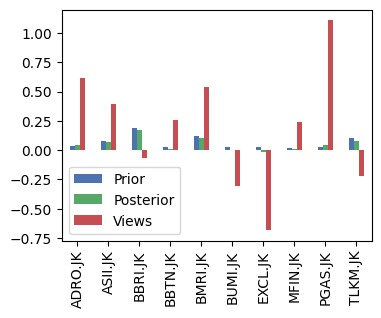

In [ ]:
rets_df7.plot.bar(figsize=(4,3));

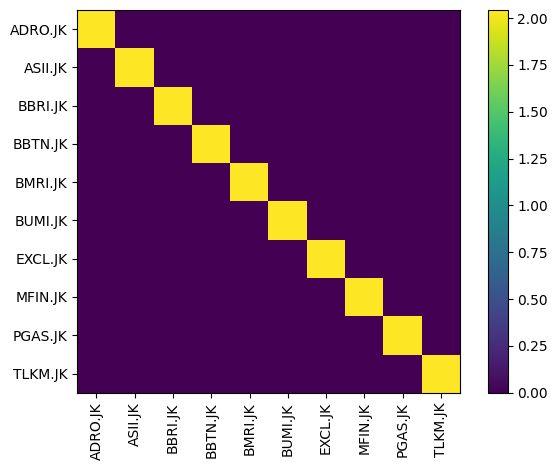

In [ ]:
S_bl7 = bl7.bl_cov()
plotting.plot_covariance(S_bl7);

#### Portfolio allocation

Now that we have constructed our Black-Litterman posterior estimate, we can proceed to use any of the optimizers discussed in previous recipes.

In [ ]:
# Optimize for maximum return
efbl7 = EfficientFrontier(ret_bl7, S_bl7)
efbl7.add_objective(objective_functions.L2_reg)
raw_weightsbl7 = efbl7.max_sharpe(risk_free_rate=rf)
weights_bl7 = efbl7.clean_weights()
print(weights_bl7)
efbl7.portfolio_performance(verbose=True)

OrderedDict([('ADRO.JK', 0.01223), ('ASII.JK', 0.12009), ('BBRI.JK', 0.49152), ('BBTN.JK', 0.0), ('BMRI.JK', 0.23897), ('BUMI.JK', 0.0), ('EXCL.JK', 0.0), ('MFIN.JK', 0.0), ('PGAS.JK', 0.00018), ('TLKM.JK', 0.13702)])
Expected annual return: 12.7%
Annual volatility: 82.4%
Sharpe Ratio: 0.11


(0.126939682120367, 0.8237137087544103, 0.1055459939495653)

## Data Preparation 8
1st of January 2018 - 9th of January 2023

### Download Data

In [ ]:
data_stock8 = yf.download(asset_stock, start="2018-01-01", end="2023-01-10")
data_stock8.index = pd.to_datetime(data_stock8.index).date
data_asset8 = pd.concat([data_stock8],axis=1,sort=False).reset_index()
data_asset8.rename(columns={'index':'Date'}, inplace=True)
data_asset8.index = data_asset8['Date']
data_asset8 = data_asset8.dropna()
df8 = data_asset8['Adj Close']

[*********************100%***********************]  10 of 10 completed


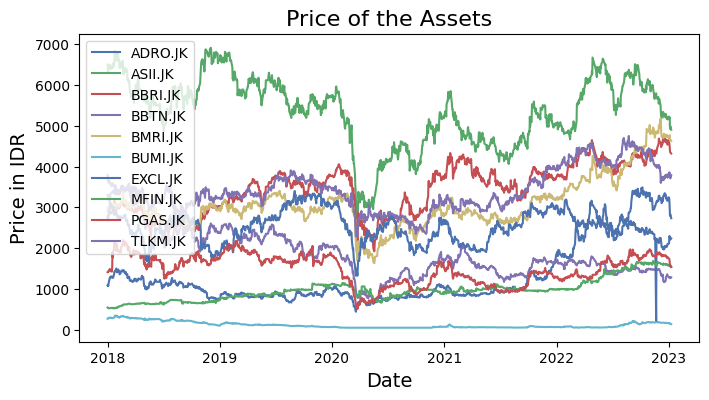

In [ ]:
# Plot
plt.figure(figsize=(8,4))
for i in df8.columns.values:
    plt.plot( df8[i],  label=i)
plt.title('Price of the Assets', fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in IDR',fontsize=14)
plt.legend(df8.columns.values, loc='upper left')
plt.show()

### Return, Variance, Correlation, Input Parameter

In [ ]:
# Log Return
df8_return = np.log(df8).diff()
pd.DataFrame(df8_return)

In [ ]:
var_matrix8 = df8_return.cov()
var_matrix8

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(8, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df8_return.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Black Litterman Allocation + Maximum Sharpe Ratio

In [ ]:
market_prices8 = yf.download("^JKSE", start="2018-01-01", end="2023-01-10")["Adj Close"]
prices8 = data_asset8['Adj Close']
mcaps8 = {}
for t in order:
    stock = yf.Ticker(t)
    mcaps8[t] = stock.info["marketCap"]
mcaps8

[*********************100%***********************]  1 of 1 completed


{'ADRO.JK': 64098586853376,
 'ASII.JK': 264155470757888,
 'BBRI.JK': 829966459600896,
 'BBTN.JK': 17332484177920,
 'BMRI.JK': 478333158555648,
 'BUMI.JK': 37874741280768,
 'EXCL.JK': 25620922761216,
 'MFIN.JK': 4770000011264,
 'PGAS.JK': 34059308761088,
 'TLKM.JK': 408136280178688}

#### Constructing the prior

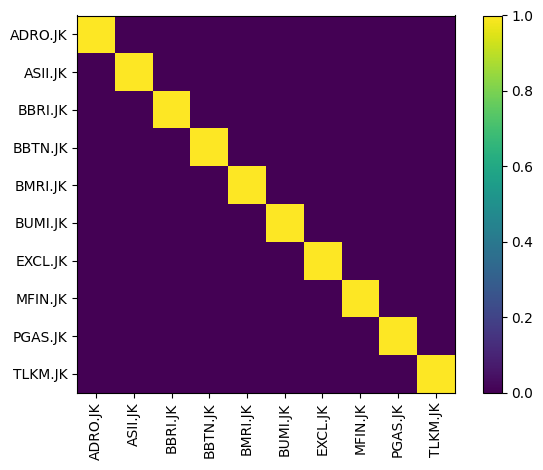

In [ ]:
S8 = risk_models.CovarianceShrinkage(prices8).ledoit_wolf()
delta8 = black_litterman.market_implied_risk_aversion(market_prices8)
plotting.plot_covariance(S8, plot_correlation=True);

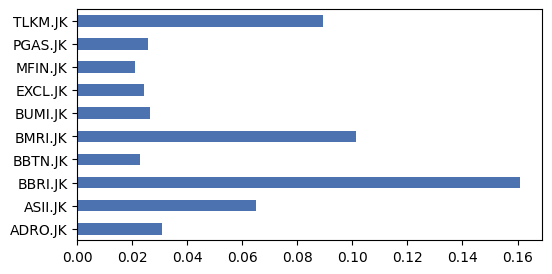

In [ ]:
market_prior8 = black_litterman.market_implied_prior_returns(mcaps8, delta8, S8)
market_prior8.plot.barh(figsize=(6,3));

#### Views

In [ ]:
predicted8 = pd.read_excel('Predicted Return.xlsx', sheet_name='Period8').squeeze('columns')

In [ ]:
# You don't have to provide views on all the assets
viewdict8 = {"ADRO.JK": np.exp(k*np.mean(predicted8['ADRO']))-1,
             "ASII.JK": np.exp(k*np.mean(predicted8['ASII']))-1,
             "BBRI.JK": np.exp(k*np.mean(predicted8['BBRI']))-1,
             "BBTN.JK": np.exp(k*np.mean(predicted8['BBTN']))-1,
             "BMRI.JK": np.exp(k*np.mean(predicted8['BMRI']))-1,
             "BUMI.JK": np.exp(k*np.mean(predicted8['BUMI']))-1,
             "EXCL.JK": np.exp(k*np.mean(predicted8['EXCL']))-1,
             "MFIN.JK": np.exp(k*np.mean(predicted8['MFIN']))-1,
             "PGAS.JK": np.exp(k*np.mean(predicted8['PGAS']))-1,
             "TLKM.JK": np.exp(k*np.mean(predicted8['TLKM']))-1}
bl8 = BlackLittermanModel(S8, pi=market_prior8, absolute_views=viewdict8)

#### View confidences

In [ ]:
confidences8 = [0.05, 0.05, 0.01, 0.01, 0.01, 0.02, 0.03, 0.05, 0.03, 0.03]
bl8 = BlackLittermanModel(S8, pi=market_prior8, absolute_views=viewdict8
                          , omega="idzorek", view_confidences=confidences8)
np.diag(bl8.omega)

array([1.82084125, 1.82084125, 9.48754126, 9.48754126, 9.48754126,
       4.69585375, 3.09862459, 1.82084125, 3.09862459, 3.09862459])

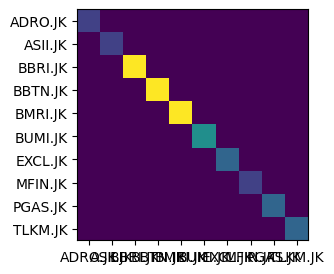

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))
im = ax.imshow(bl8.omega)
ax.set_xticks(np.arange(len(bl8.tickers)))
ax.set_yticks(np.arange(len(bl8.tickers)))
ax.set_xticklabels(bl8.tickers)
ax.set_yticklabels(bl8.tickers)
plt.show()

#### Posterior estimates

Given the inputs, we can compute a posterior estimate of returns


In [ ]:
# We are using the shortcut to automatically compute market-implied prior
bl8 = BlackLittermanModel(S8, pi="market", market_caps=mcaps8, risk_aversion=delta8,
                        absolute_views=viewdict8, omega=bl8.omega)
# Posterior estimate of returns
ret_bl8 = bl8.bl_returns()
rets_df8 = pd.DataFrame([market_prior8, ret_bl8, pd.Series(viewdict8)],
             index=["Prior", "Posterior", "Views"]).T
rets_df8

Prior  Posterior     Views
ADRO.JK  0.030888   0.023658  0.266294
ASII.JK  0.064871   0.030598 -0.240582
BBRI.JK  0.160982   0.137063 -0.250931
BBTN.JK  0.022944   0.008427  0.551259
BMRI.JK  0.101252   0.076265 -0.417425
BUMI.JK  0.026434  -0.004639 -0.547172
EXCL.JK  0.024352  -0.016408 -0.687636
MFIN.JK  0.020810  -0.002502 -0.065430
PGAS.JK  0.025785   0.005905  0.009762
TLKM.JK  0.089328   0.083950  0.556730

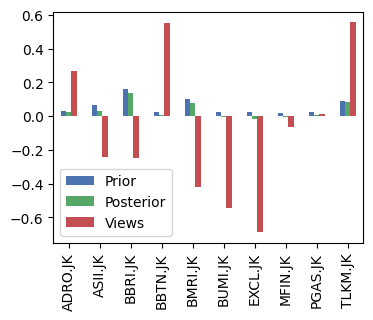

In [ ]:
rets_df8.plot.bar(figsize=(4,3));

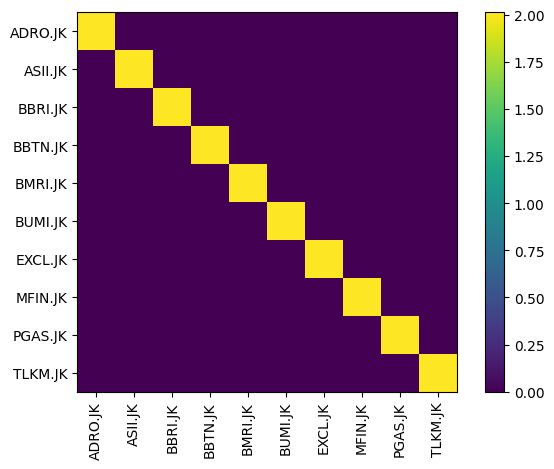

In [ ]:
S_bl8 = bl8.bl_cov()
plotting.plot_covariance(S_bl8);

#### Portfolio allocation

Now that we have constructed our Black-Litterman posterior estimate, we can proceed to use any of the optimizers discussed in previous recipes.

In [ ]:
# Optimize for maximum return
efbl8 = EfficientFrontier(ret_bl8, S_bl8)
efbl8.add_objective(objective_functions.L2_reg)
raw_weightsbl8 = efbl8.max_sharpe(risk_free_rate=rf)
weights_bl8 = efbl8.clean_weights()
print(weights_bl8)
efbl8.portfolio_performance(verbose=True)

OrderedDict([('ADRO.JK', 0.0), ('ASII.JK', 0.0), ('BBRI.JK', 0.54743), ('BBTN.JK', 0.0), ('BMRI.JK', 0.20453), ('BUMI.JK', 0.0), ('EXCL.JK', 0.0), ('MFIN.JK', 0.0), ('PGAS.JK', 0.0), ('TLKM.JK', 0.24803)])
Expected annual return: 11.1%
Annual volatility: 90.0%
Sharpe Ratio: 0.08


(0.11145367069373599, 0.9003390289108857, 0.07936307146450314)

## Data Preparation 9
1st of January 2018 - 9th of February 2023

### Download Data

In [ ]:
data_stock9 = yf.download(asset_stock, start="2018-01-01", end="2023-02-10")
data_stock9.index = pd.to_datetime(data_stock9.index).date
data_asset9 = pd.concat([data_stock9],axis=1,sort=False).reset_index()
data_asset9.rename(columns={'index':'Date'}, inplace=True)
data_asset9.index = data_asset9['Date']
data_asset9 = data_asset9.dropna()
df9 = data_asset9['Adj Close']

[*********************100%***********************]  10 of 10 completed


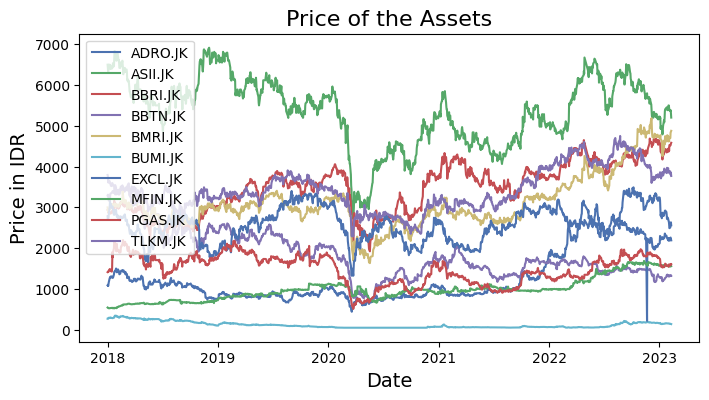

In [ ]:
# Plot
plt.figure(figsize=(8,4))
for i in df9.columns.values:
    plt.plot( df9[i],  label=i)
plt.title('Price of the Assets', fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in IDR',fontsize=14)
plt.legend(df9.columns.values, loc='upper left')
plt.show()

### Return, Variance, Correlation, Input Parameter

In [ ]:
# Log Return
df9_return = np.log(df9).diff()
pd.DataFrame(df9_return)

In [ ]:
var_matrix9 = df9_return.cov()
var_matrix9

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(8, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df9_return.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Black Litterman Allocation + Maximum Sharpe Ratio

In [ ]:
market_prices9 = yf.download("^JKSE", start="2018-01-01", end="2023-02-10")["Adj Close"]
prices9 = data_asset9['Adj Close']
mcaps9 = {}
for t in order:
    stock = yf.Ticker(t)
    mcaps9[t] = stock.info["marketCap"]
mcaps9

[*********************100%***********************]  1 of 1 completed


{'ADRO.JK': 64098586853376,
 'ASII.JK': 264155470757888,
 'BBRI.JK': 833739051499520,
 'BBTN.JK': 17332484177920,
 'BMRI.JK': 478333158555648,
 'BUMI.JK': 37874741280768,
 'EXCL.JK': 25620922761216,
 'MFIN.JK': 4770000011264,
 'PGAS.JK': 34059308761088,
 'TLKM.JK': 407145652682752}

#### Constructing the prior

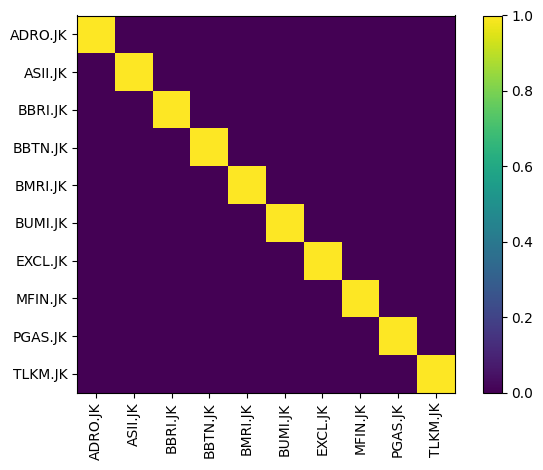

In [ ]:
S9 = risk_models.CovarianceShrinkage(prices9).ledoit_wolf()
delta9 = black_litterman.market_implied_risk_aversion(market_prices9)
plotting.plot_covariance(S9, plot_correlation=True);

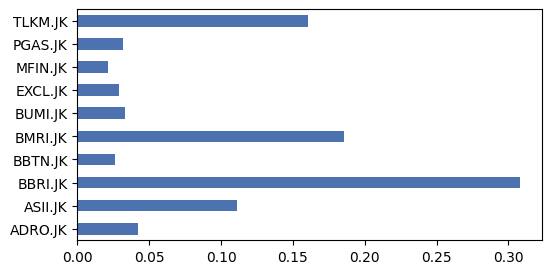

In [ ]:
market_prior9 = black_litterman.market_implied_prior_returns(mcaps9, delta9, S9)
market_prior9.plot.barh(figsize=(6,3));

#### Views

In [ ]:
predicted9 = pd.read_excel('Predicted Return.xlsx', sheet_name='Period9').squeeze('columns')

In [ ]:
# You don't have to provide views on all the assets
viewdict9 = {"ADRO.JK": np.exp(k*np.mean(predicted9['ADRO']))-1,
             "ASII.JK": np.exp(k*np.mean(predicted9['ASII']))-1,
             "BBRI.JK": np.exp(k*np.mean(predicted9['BBRI']))-1,
             "BBTN.JK": np.exp(k*np.mean(predicted9['BBTN']))-1,
             "BMRI.JK": np.exp(k*np.mean(predicted9['BMRI']))-1,
             "BUMI.JK": np.exp(k*np.mean(predicted9['BUMI']))-1,
             "EXCL.JK": np.exp(k*np.mean(predicted9['EXCL']))-1,
             "MFIN.JK": np.exp(k*np.mean(predicted9['MFIN']))-1,
             "PGAS.JK": np.exp(k*np.mean(predicted9['PGAS']))-1,
             "TLKM.JK": np.exp(k*np.mean(predicted9['TLKM']))-1}
bl9 = BlackLittermanModel(S9, pi=market_prior9, absolute_views=viewdict9)

#### View confidences

In [ ]:
confidences9 = [0.05, 0.05, 0.01, 0.01, 0.01, 0.02, 0.03, 0.05, 0.03, 0.03]
bl9 = BlackLittermanModel(S9, pi=market_prior9, absolute_views=viewdict9
                          , omega="idzorek", view_confidences=confidences9)
np.diag(bl9.omega)

array([1.79087853, 1.79087853, 9.33141973, 9.33141973, 9.33141973,
       4.61858148, 3.0476354 , 1.79087853, 3.0476354 , 3.0476354 ])

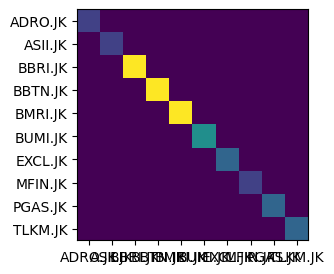

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))
im = ax.imshow(bl9.omega)
ax.set_xticks(np.arange(len(bl9.tickers)))
ax.set_yticks(np.arange(len(bl9.tickers)))
ax.set_xticklabels(bl9.tickers)
ax.set_yticklabels(bl9.tickers)
plt.show()

#### Posterior estimates

Given the inputs, we can compute a posterior estimate of returns


In [ ]:
# We are using the shortcut to automatically compute market-implied prior
bl9 = BlackLittermanModel(S9, pi="market", market_caps=mcaps9, risk_aversion=delta9,
                        absolute_views=viewdict9, omega=bl9.omega)
# Posterior estimate of returns
ret_bl9 = bl9.bl_returns()
rets_df9 = pd.DataFrame([market_prior9, ret_bl9, pd.Series(viewdict9)],
             index=["Prior", "Posterior", "Views"]).T
rets_df9

Prior  Posterior     Views
ADRO.JK  0.042156   0.011813 -0.184695
ASII.JK  0.111305   0.083819 -0.058415
BBRI.JK  0.308180   0.282532 -0.276690
BBTN.JK  0.025991   0.004678 -0.125332
BMRI.JK  0.185335   0.162290 -0.139185
BUMI.JK  0.033091   0.003089 -0.487027
EXCL.JK  0.028856  -0.013904 -0.749813
MFIN.JK  0.021649  -0.037084 -0.773009
PGAS.JK  0.031773   0.001506 -0.330431
TLKM.JK  0.160729   0.132244 -0.142114

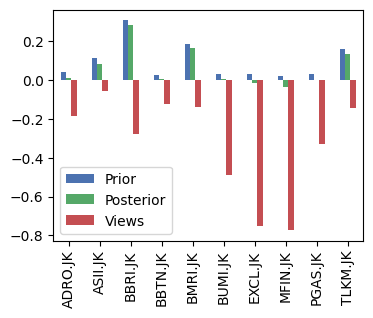

In [ ]:
rets_df9.plot.bar(figsize=(4,3));

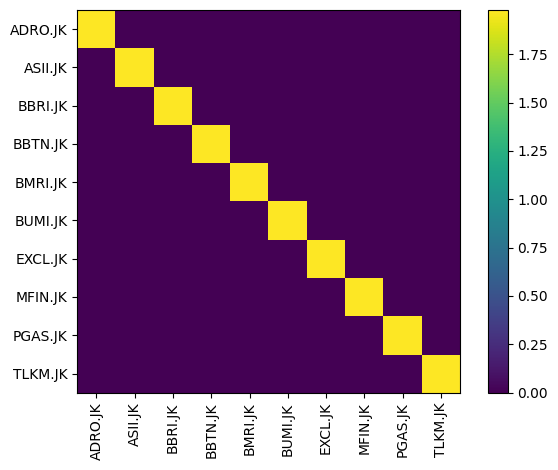

In [ ]:
S_bl9 = bl9.bl_cov()
plotting.plot_covariance(S_bl9);

#### Portfolio allocation

Now that we have constructed our Black-Litterman posterior estimate, we can proceed to use any of the optimizers discussed in previous recipes.

In [ ]:
# Optimize for maximum return
efbl9 = EfficientFrontier(ret_bl9, S_bl9)
efbl9.add_objective(objective_functions.L2_reg)
raw_weightsbl9 = efbl9.max_sharpe(risk_free_rate=rf)
weights_bl9 = efbl9.clean_weights()
print(weights_bl9)
efbl9.portfolio_performance(verbose=True)

OrderedDict([('ADRO.JK', 0.0), ('ASII.JK', 0.08757), ('BBRI.JK', 0.4841), ('BBTN.JK', 0.0), ('BMRI.JK', 0.24409), ('BUMI.JK', 0.0), ('EXCL.JK', 0.0), ('MFIN.JK', 0.0), ('PGAS.JK', 0.0), ('TLKM.JK', 0.18424)])
Expected annual return: 20.8%
Annual volatility: 81.5%
Sharpe Ratio: 0.21


(0.20809089760657076, 0.814716248098189, 0.20631833230152122)

## Data Preparation 10
1st of January 2018 - 9th of March 2023

### Download Data

In [ ]:
data_stock10 = yf.download(asset_stock, start="2018-01-01", end="2023-03-10")
data_stock10.index = pd.to_datetime(data_stock10.index).date
data_asset10 = pd.concat([data_stock10],axis=1,sort=False).reset_index()
data_asset10.rename(columns={'index':'Date'}, inplace=True)
data_asset10.index = data_asset10['Date']
data_asset10 = data_asset10.dropna()
df10 = data_asset10['Adj Close']

[*********************100%***********************]  10 of 10 completed


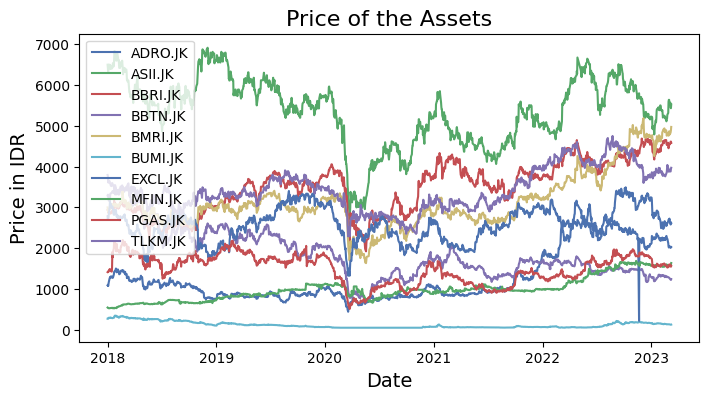

In [ ]:
# Plot
plt.figure(figsize=(8,4))
for i in df10.columns.values:
    plt.plot( df10[i],  label=i)
plt.title('Price of the Assets', fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in IDR',fontsize=14)
plt.legend(df10.columns.values, loc='upper left')
plt.show()

### Return, Variance, Correlation, Input Parameter


In [ ]:
# Log Return
df10_return = np.log(df10).diff()
pd.DataFrame(df10_return)

In [ ]:
var_matrix10 = df10_return.cov()
var_matrix10

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(8, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df10_return.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Black Litterman Allocation + Maximum Sharpe Ratio

In [ ]:
market_prices10 = yf.download("^JKSE", start="2018-01-01", end="2023-02-10")["Adj Close"]
prices10 = data_asset10['Adj Close']
mcaps10 = {}
for t in order:
    stock = yf.Ticker(t)
    mcaps10[t] = stock.info["marketCap"]
mcaps10

[*********************100%***********************]  1 of 1 completed


{'ADRO.JK': 64098586853376,
 'ASII.JK': 264155470757888,
 'BBRI.JK': 833739051499520,
 'BBTN.JK': 17332484177920,
 'BMRI.JK': 478333158555648,
 'BUMI.JK': 37874741280768,
 'EXCL.JK': 25620922761216,
 'MFIN.JK': 4770000011264,
 'PGAS.JK': 34059308761088,
 'TLKM.JK': 407145652682752}

#### Constructing the prior

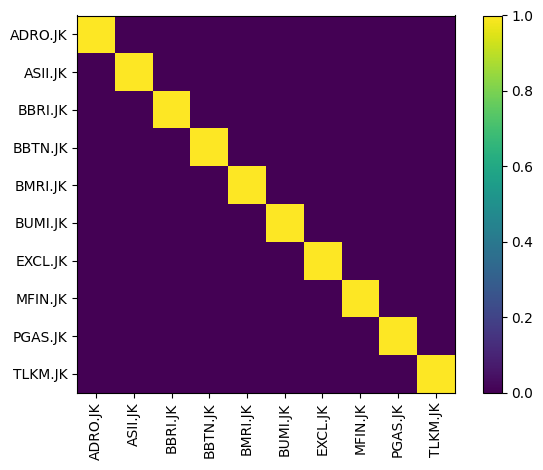

In [ ]:
S10 = risk_models.CovarianceShrinkage(prices10).ledoit_wolf()
delta10 = black_litterman.market_implied_risk_aversion(market_prices10)
plotting.plot_covariance(S10, plot_correlation=True);

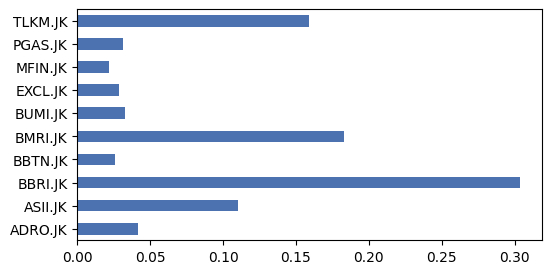

In [ ]:
market_prior10 = black_litterman.market_implied_prior_returns(mcaps10, delta10, S10)
market_prior10.plot.barh(figsize=(6,3));

#### Views

In [ ]:
predicted10 = pd.read_excel('Predicted Return.xlsx', sheet_name='Period10').squeeze('columns')

In [ ]:
# You don't have to provide views on all the assets
viewdict10 = {"ADRO.JK": np.exp(k*np.mean(predicted10['ADRO']))-1,
             "ASII.JK": np.exp(k*np.mean(predicted10['ASII']))-1,
             "BBRI.JK": np.exp(k*np.mean(predicted10['BBRI']))-1,
             "BBTN.JK": np.exp(k*np.mean(predicted10['BBTN']))-1,
             "BMRI.JK": np.exp(k*np.mean(predicted10['BMRI']))-1,
             "BUMI.JK": np.exp(k*np.mean(predicted10['BUMI']))-1,
             "EXCL.JK": np.exp(k*np.mean(predicted10['EXCL']))-1,
             "MFIN.JK": np.exp(k*np.mean(predicted10['MFIN']))-1,
             "PGAS.JK": np.exp(k*np.mean(predicted10['PGAS']))-1,
             "TLKM.JK": np.exp(k*np.mean(predicted10['TLKM']))-1}
bl10 = BlackLittermanModel(S10, pi=market_prior10, absolute_views=viewdict10)

#### View confidences

In [ ]:
confidences10 = [0.05, 0.05, 0.01, 0.01, 0.01, 0.02, 0.03, 0.05, 0.03, 0.03]
bl10 = BlackLittermanModel(S10, pi=market_prior10, absolute_views=viewdict10
                          , omega="idzorek", view_confidences=confidences10)
np.diag(bl10.omega)

array([1.7642218 , 1.7642218 , 9.19252412, 9.19252412, 9.19252412,
       4.54983517, 3.00227219, 1.7642218 , 3.00227219, 3.00227219])

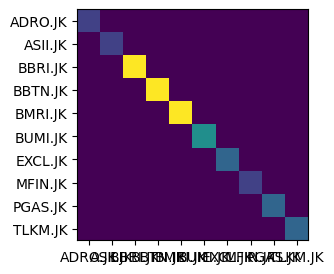

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))
im = ax.imshow(bl10.omega)
ax.set_xticks(np.arange(len(bl10.tickers)))
ax.set_yticks(np.arange(len(bl10.tickers)))
ax.set_xticklabels(bl10.tickers)
ax.set_yticklabels(bl10.tickers)
plt.show()

#### Posterior estimates

Given the inputs, we can compute a posterior estimate of returns


In [ ]:
# We are using the shortcut to automatically compute market-implied prior
bl10 = BlackLittermanModel(S10, pi="market", market_caps=mcaps10, risk_aversion=delta10,
                        absolute_views=viewdict10, omega=bl10.omega)
# Posterior estimate of returns
ret_bl10 = bl10.bl_returns()
rets_df10 = pd.DataFrame([market_prior10, ret_bl10, pd.Series(viewdict10)],
             index=["Prior", "Posterior", "Views"]).T
rets_df10

Prior  Posterior     Views
ADRO.JK  0.041826   0.030618  0.197671
ASII.JK  0.109946   0.113837  0.567775
BBRI.JK  0.303891   0.276684 -0.436754
BBTN.JK  0.025902   0.014266  0.842333
BMRI.JK  0.182874   0.166237  0.499135
BUMI.JK  0.032896   0.009127 -0.175578
EXCL.JK  0.028724  -0.012249 -0.690365
MFIN.JK  0.021624   0.011477  0.198683
PGAS.JK  0.031597   0.008565 -0.089480
TLKM.JK  0.158634   0.208829  2.478451

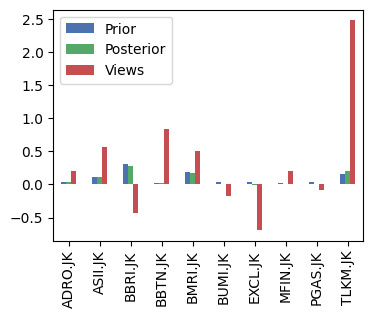

In [ ]:
rets_df10.plot.bar(figsize=(4,3));

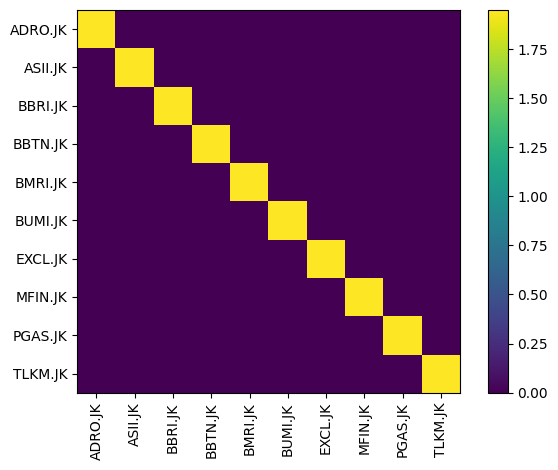

In [ ]:
S_bl10 = bl10.bl_cov()
plotting.plot_covariance(S_bl10);

#### Portfolio allocation

Now that we have constructed our Black-Litterman posterior estimate, we can proceed to use any of the optimizers discussed in previous recipes.

In [ ]:
# Optimize for maximum return
efbl10 = EfficientFrontier(ret_bl10, S_bl10)
efbl10.add_objective(objective_functions.L2_reg)
raw_weightsbl10 = efbl10.max_sharpe(risk_free_rate=rf)
weights_bl10 = efbl10.clean_weights()
print(weights_bl10)
efbl10.portfolio_performance(verbose=True)

OrderedDict([('ADRO.JK', 0.0), ('ASII.JK', 0.12204), ('BBRI.JK', 0.39071), ('BBTN.JK', 0.0), ('BMRI.JK', 0.20838), ('BUMI.JK', 0.0), ('EXCL.JK', 0.0), ('MFIN.JK', 0.0), ('PGAS.JK', 0.0), ('TLKM.JK', 0.27887)])
Expected annual return: 21.5%
Annual volatility: 75.0%
Sharpe Ratio: 0.23


(0.21487204278209582, 0.7500327336975837, 0.23315254778280775)

## Data Preparation 11
1st of January 2018 - 9th of April 2023

### Download Data

In [ ]:
data_stock11 = yf.download(asset_stock, start="2018-01-01", end="2023-04-10")
data_stock11.index = pd.to_datetime(data_stock11.index).date
data_asset11 = pd.concat([data_stock11],axis=1,sort=False).reset_index()
data_asset11.rename(columns={'index':'Date'}, inplace=True)
data_asset11.index = data_asset11['Date']
data_asset11 = data_asset11.dropna()
df11 = data_asset11['Adj Close']

[*********************100%***********************]  10 of 10 completed


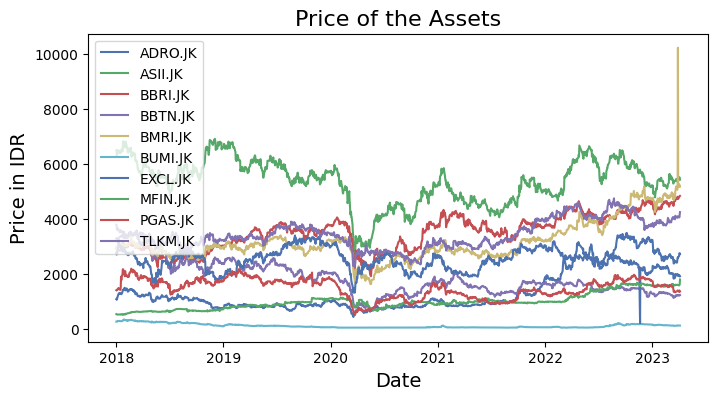

In [ ]:
# Plot
plt.figure(figsize=(8,4))
for i in df11.columns.values:
    plt.plot( df11[i],  label=i)
plt.title('Price of the Assets', fontsize=16)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in IDR',fontsize=14)
plt.legend(df11.columns.values, loc='upper left')
plt.show()

### Return, Variance, Correlation, Input Parameter

In [ ]:
# Log Return
df11_return = np.log(df11).diff()
pd.DataFrame(df11_return)

In [ ]:
var_matrix11 = df11_return.cov()
var_matrix11

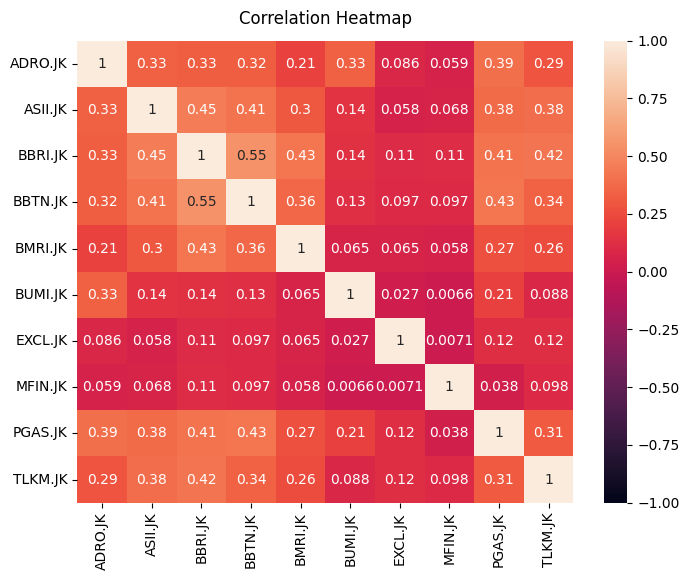

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(8, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df11_return.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Black Litterman Allocation + Maximum Sharpe Ratio

In [ ]:
market_prices11 = yf.download("^JKSE", start="2018-01-01", end="2023-04-10")["Adj Close"]
prices11 = data_asset11['Adj Close']
mcaps11 = {}
for t in order:
    stock = yf.Ticker(t)
    mcaps11[t] = stock.info["marketCap"]
mcaps11

[*********************100%***********************]  1 of 1 completed


{'ADRO.JK': 64098586853376,
 'ASII.JK': 264155470757888,
 'BBRI.JK': 833739051499520,
 'BBTN.JK': 17332484177920,
 'BMRI.JK': 478333158555648,
 'BUMI.JK': 37874741280768,
 'EXCL.JK': 25620922761216,
 'MFIN.JK': 4770000011264,
 'PGAS.JK': 34180515758080,
 'TLKM.JK': 408136280178688}

#### Constructing the prior

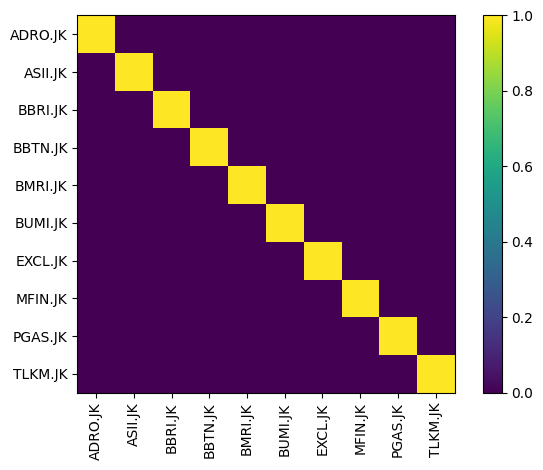

In [ ]:
S11 = risk_models.CovarianceShrinkage(prices11).ledoit_wolf()
delta11 = black_litterman.market_implied_risk_aversion(market_prices11)
plotting.plot_covariance(S11, plot_correlation=True);

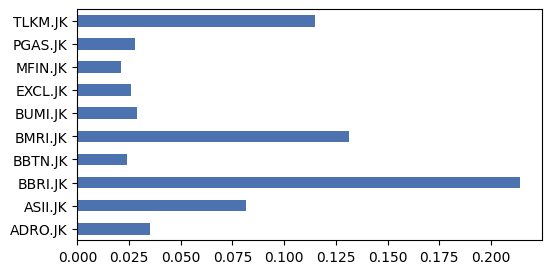

In [ ]:
market_prior11 = black_litterman.market_implied_prior_returns(mcaps11, delta11, S11)
market_prior11.plot.barh(figsize=(6,3));

#### Views

In [ ]:
predicted11 = pd.read_excel('Predicted Return.xlsx', sheet_name='Period11').squeeze('columns')

In [ ]:
# You don't have to provide views on all the assets
viewdict11 = {"ADRO.JK": np.exp(k*np.mean(predicted11['ADRO']))-1,
             "ASII.JK": np.exp(k*np.mean(predicted11['ASII']))-1,
             "BBRI.JK": np.exp(k*np.mean(predicted11['BBRI']))-1,
             "BBTN.JK": np.exp(k*np.mean(predicted11['BBTN']))-1,
             "BMRI.JK": np.exp(k*np.mean(predicted11['BMRI']))-1,
             "BUMI.JK": np.exp(k*np.mean(predicted11['BUMI']))-1,
             "EXCL.JK": np.exp(k*np.mean(predicted11['EXCL']))-1,
             "MFIN.JK": np.exp(k*np.mean(predicted11['MFIN']))-1,
             "PGAS.JK": np.exp(k*np.mean(predicted11['PGAS']))-1,
             "TLKM.JK": np.exp(k*np.mean(predicted11['TLKM']))-1}
bl11 = BlackLittermanModel(S11, pi=market_prior11, absolute_views=viewdict11)

#### View confidences

In [ ]:
confidences11 = [0.05, 0.05, 0.01, 0.01, 0.01, 0.02, 0.03, 0.05, 0.03, 0.03]
bl11 = BlackLittermanModel(S11, pi=market_prior11, absolute_views=viewdict11
                          , omega="idzorek", view_confidences=confidences11)
np.diag(bl11.omega)

array([1.76382678, 1.76382678, 9.19046584, 9.19046584, 9.19046584,
       4.54881642, 3.00159995, 1.76382678, 3.00159995, 3.00159995])

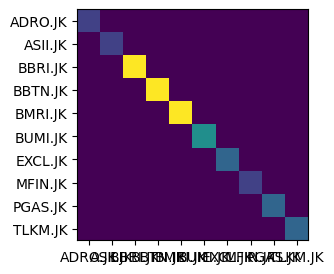

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))
im = ax.imshow(bl11.omega)
ax.set_xticks(np.arange(len(bl11.tickers)))
ax.set_yticks(np.arange(len(bl11.tickers)))
ax.set_xticklabels(bl11.tickers)
ax.set_yticklabels(bl11.tickers)
plt.show()

#### Posterior estimates

Given the inputs, we can compute a posterior estimate of returns


In [ ]:
# We are using the shortcut to automatically compute market-implied prior
bl11 = BlackLittermanModel(S11, pi="market", market_caps=mcaps11, risk_aversion=delta11,
                        absolute_views=viewdict11, omega=bl11.omega)
# Posterior estimate of returns
ret_bl11 = bl11.bl_returns()
rets_df11 = pd.DataFrame([market_prior11, ret_bl11, pd.Series(viewdict11)],
             index=["Prior", "Posterior", "Views"]).T
rets_df11

Prior  Posterior     Views
ADRO.JK  0.034922  -0.004785 -0.379215
ASII.JK  0.081496   0.070785  0.247278
BBRI.JK  0.214097   0.191163 -0.099279
BBTN.JK  0.024035   0.017059  1.306389
BMRI.JK  0.131357   0.110701  0.045767
BUMI.JK  0.028817   0.024020  0.768975
EXCL.JK  0.025965  -0.016458 -0.741457
MFIN.JK  0.021110  -0.015058 -0.322260
PGAS.JK  0.027957   0.004650 -0.102290
TLKM.JK  0.115015   0.091346 -0.027279

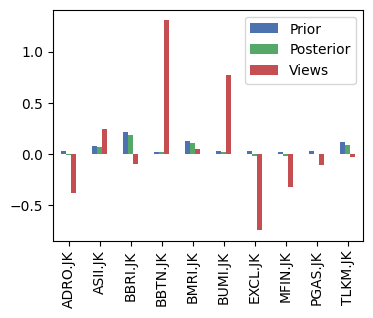

In [ ]:
rets_df11.plot.bar(figsize=(4,3));

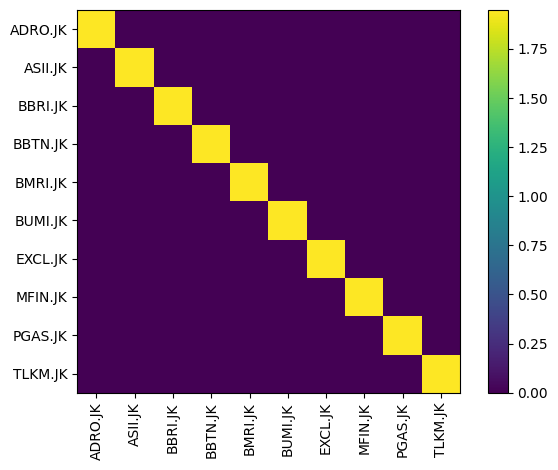

In [ ]:
S_bl11 = bl11.bl_cov()
plotting.plot_covariance(S_bl11);

#### Portfolio allocation

Now that we have constructed our Black-Litterman posterior estimate, we can proceed to use any of the optimizers discussed in previous recipes.

In [ ]:
# Optimize for maximum return
efbl11 = EfficientFrontier(ret_bl11, S_bl11)
efbl11.add_objective(objective_functions.L2_reg)
raw_weightsbl11 = efbl11.max_sharpe(risk_free_rate=rf)
weights_bl11 = efbl11.clean_weights()
print(weights_bl11)
efbl11.portfolio_performance(verbose=True)

OrderedDict([('ADRO.JK', 0.0), ('ASII.JK', 0.10137), ('BBRI.JK', 0.49714), ('BBTN.JK', 0.0), ('BMRI.JK', 0.23252), ('BUMI.JK', 0.0), ('EXCL.JK', 0.0), ('MFIN.JK', 0.0), ('PGAS.JK', 0.0), ('TLKM.JK', 0.16897)])
Expected annual return: 14.3%
Annual volatility: 81.4%
Sharpe Ratio: 0.13


(0.14338480319734687, 0.8139377852803128, 0.1270180658362507)

## Simulation Preparation

In [ ]:
# Minimum buying unit and initial balance
MBU = 100
IB  = 1000000000
# Buying and selling fee
buy_fee  = 0.0015
sell_fee = 0.0025
# Interest (risk-free) rate
ir  = 0.04

## Simulation 1 (Annually)

In [ ]:
start_date = "2022-05-10"
finish_date = "2023-05-11"
data_stock_sim = yf.download(asset_stock, start=start_date, end=finish_date)
data_stock_sim.index = pd.to_datetime(data_stock_sim.index).date
data_asset_sim = pd.concat([data_stock_sim],axis=1,sort=False).reset_index()
data_asset_sim.rename(columns={'index':'Date'}, inplace=True)
data_asset_sim.index = data_asset_sim['Date']
price_asset_sim = data_asset_sim['Adj Close']
price_asset_sim = price_asset_sim.dropna()

buy_price1 = price_asset_sim.loc[price_asset_sim.index[0]]
sell_price1 = (pd.DataFrame(price_asset_sim.loc[price_asset_sim.index[len(price_asset_sim)-1]])).T
return_asset_1 = np.log(sell_price1/buy_price1)

[*********************100%***********************]  10 of 10 completed


In [ ]:
# Allocation for maximum sharpe ratio with black litterman allocation
dabl1c = DiscreteAllocation(weights_bl0, MBU*buy_price1*(1+buy_fee), total_portfolio_value=IB)
allocbl1c, leftoverbl1c = dabl1c.greedy_portfolio()
print("Discrete allocation:", allocbl1c)
print("Funds remaining: IDR{:.2f}".format(leftoverbl1c))

Discrete allocation: {'PGAS.JK': 1410, 'ADRO.JK': 567, 'BBRI.JK': 311, 'BMRI.JK': 326, 'BBTN.JK': 690, 'ASII.JK': 149, 'EXCL.JK': 298, 'MFIN.JK': 442, 'BUMI.JK': 5315, 'TLKM.JK': 56}
Funds remaining: IDR2256.63


In [ ]:
portion1c = pd.DataFrame.from_dict([weights_bl0])
portion1c = np.array(portion1c)

port1c_return = np.dot(portion1c, return_asset_1.T)
port1c_return = pd.DataFrame(port1c_return)

In [ ]:
portion_money1c = pd.DataFrame.from_dict([allocbl1c])
column1c = [portion_money1c.columns[i] for i in range (len(portion_money1c.T))]
portion_money1c = (np.array(portion_money1c)).reshape(-1,1)
networth1c = 0
for i in range (len(column1c)):
  networth1c += (1-sell_fee)*MBU*(np.dot(sell_price1[sell_price1.columns[sell_price1.columns.isin([column1c[i]])]],portion_money1c[i]))
networth1c += leftoverbl1c*(1+ir)**(i/360)

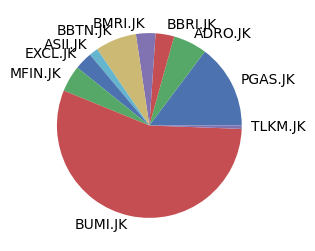

In [ ]:
# Portfolio composition black litterman
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_money1c.flatten(), labels = column1c)
plt.show()

In [ ]:
print (f'Ending Balance (Max Sharpe Ratio + Black Litterman): {np.float(networth1c)}')

Ending Balance (Max Sharpe Ratio + Black Litterman): 1084102346.2145772


In [ ]:
annual_c = [IB]
annual_c.append(np.float(networth1c))

In [ ]:
Profit1 = [networth1c/IB-1]
Profit1 = (pd.DataFrame(Profit1)).T
Profit1.rename(columns={0:'Maximum Sharpe Ratio (BL)'}, inplace=True)
Profit1

Maximum Sharpe Ratio (BL)
0                   0.084102

## Simulation 2 (Semiannually)

In [ ]:
ev_period = 180 #days

### 1st Semester

In [ ]:
start_date = "2022-05-10"
finish_date = "2022-11-11"
data_stock_sim = yf.download(asset_stock, start=start_date, end=finish_date)
data_stock_sim.index = pd.to_datetime(data_stock_sim.index).date
data_asset_sim = pd.concat([data_stock_sim],axis=1,sort=False).reset_index()
data_asset_sim.rename(columns={'index':'Date'}, inplace=True)
data_asset_sim.index = data_asset_sim['Date']
price_asset_sim = data_asset_sim['Adj Close']
price_asset_sim = price_asset_sim.dropna()

buy_price2a = price_asset_sim.loc[price_asset_sim.index[0]]
sell_price2a = (pd.DataFrame(price_asset_sim.loc[price_asset_sim.index[len(price_asset_sim)-1]])).T
return_asset_2a = np.log(sell_price2a/buy_price2a)

[*********************100%***********************]  10 of 10 completed


In [ ]:
# Allocation for maximum sharpe ratio with black litterman allocation
dabl2c = DiscreteAllocation(weights_bl0, MBU*buy_price2a*(1+buy_fee), total_portfolio_value=IB)
allocbl2c, leftoverbl2c = dabl2c.greedy_portfolio()
print("Discrete allocation:", allocbl2c)
print("Funds remaining: IDR{:.2f}".format(leftoverbl2c))

Discrete allocation: {'PGAS.JK': 1410, 'ADRO.JK': 567, 'BBRI.JK': 311, 'BMRI.JK': 326, 'BBTN.JK': 690, 'ASII.JK': 149, 'EXCL.JK': 298, 'MFIN.JK': 442, 'BUMI.JK': 5315, 'TLKM.JK': 56}
Funds remaining: IDR2256.63


In [ ]:
portion2c = (pd.DataFrame.from_dict([allocbl2c]).T).sort_index()
column2c = [(portion2c.T).columns[i] for i in range (len(portion2c))]
portion_money2c = (np.array(portion2c)).reshape(-1,1)
networth2c, NAV2c = 0, 0
for i in range (len(column2c)):
  NAV2c += MBU*(np.dot(sell_price2a[sell_price2a.columns[sell_price2a.columns.isin([column2c[i]])]],portion_money2c[i]))
  networth2c += (1-sell_fee)*MBU*(np.dot(sell_price2a[sell_price2a.columns[sell_price2a.columns.isin([column2c[i]])]],portion_money2c[i]))
leftoverbl2c = leftoverbl2c*(1+ir)**(ev_period/360)
NAV2c += leftoverbl2c
networth2c += leftoverbl2c
port2c = pd.DataFrame(portion_money2c, columns=['Quantity in MBU'])
port2c.insert(0,'Asset Name',column2c)
port2c = port2c.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverbl2c}, ignore_index=True)
port2c.index = port2c.index+1

In [ ]:
port2c # Black litterman

Asset Name  Quantity in MBU
1         ADRO.JK        567.00000
2         ASII.JK        149.00000
3         BBRI.JK        311.00000
4         BBTN.JK        690.00000
5         BMRI.JK        326.00000
6         BUMI.JK       5315.00000
7         EXCL.JK        298.00000
8         MFIN.JK        442.00000
9         PGAS.JK       1410.00000
10        TLKM.JK         56.00000
11  Leftover Cash       2301.31614

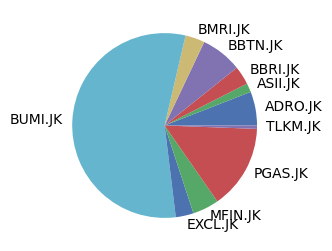

In [ ]:
# Portfolio composition black litterman
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_money2c.flatten(), labels = column2c)
plt.show()

In [ ]:
print (f'Net Asset Value (Max Sharpe Ratio + Black Litterman): {np.float(NAV2c)}')

Net Asset Value (Max Sharpe Ratio + Black Litterman): 1164902272.4343038


In [ ]:
# If all assets were sold
print (f'Networth (Max Sharpe Ratio + Black Litterman): {np.float(networth2c)}')

Networth (Max Sharpe Ratio + Black Litterman): 1161990022.5065084


In [ ]:
semiannual_c = [IB]
semiannual_c.append(np.float(networth2c))

### 2nd Semester

In [ ]:
start_date = "2022-11-10"
finish_date = "2023-05-11"
data_stock_sim = yf.download(asset_stock, start=start_date, end=finish_date)
data_stock_sim.index = pd.to_datetime(data_stock_sim.index).date
data_asset_sim = pd.concat([data_stock_sim],axis=1,sort=False).reset_index()
data_asset_sim.rename(columns={'index':'Date'}, inplace=True)
data_asset_sim.index = data_asset_sim['Date']
price_asset_sim = data_asset_sim['Adj Close']
price_asset_sim = price_asset_sim.dropna()

buy_price2b = price_asset_sim.loc[price_asset_sim.index[0]]
sell_price2b = (pd.DataFrame(price_asset_sim.loc[price_asset_sim.index[len(price_asset_sim)-1]])).T
return_asset_2b = np.log(sell_price2b/buy_price2b)

[*********************100%***********************]  10 of 10 completed


In [ ]:
# Allocation for maximum sharpe ratio with black litterman allocation
dabl2c2 = DiscreteAllocation(weights_bl6, MBU*buy_price2b*(1+buy_fee), total_portfolio_value=np.float(networth2c))
allocbl2c2, leftoverbl2c2 = dabl2c2.greedy_portfolio()
print("Discrete allocation:", allocbl2c2)
print("Funds remaining: IDR{:.2f}".format(leftoverbl2c2))

Discrete allocation: {'BBRI.JK': 478, 'ADRO.JK': 669, 'BMRI.JK': 393, 'BBTN.JK': 1269, 'PGAS.JK': 874, 'ASII.JK': 257, 'EXCL.JK': 313}
Funds remaining: IDR12998.19


In [ ]:
portion2c2 = (pd.DataFrame.from_dict([allocbl2c2]).T).sort_index()
column2c2 = [(portion2c2.T).columns[i] for i in range (len(portion2c2))]
portion_money2c2 = (np.array(portion2c2)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustments2c_name = asset_stock
Adjustments2c_quant = []
initial_2c_name = np.array(portion2c.index)
ending_2c_name = np.array(portion2c2.index)
for i in range (len(Adjustments2c_name)):
  if Adjustments2c_name[i] in ending_2c_name:
    index = int((np.where(ending_2c_name == Adjustments2c_name[i]))[0])
    Adjustments2c_quant.append(np.array(portion2c2).flatten()[index])
  else:
    Adjustments2c_quant.append(0)
for i in range (len(Adjustments2c_name)):
  if Adjustments2c_name[i] in initial_2c_name:
    index = int((np.where(initial_2c_name == Adjustments2c_name[i]))[0])
    Adjustments2c_quant[i] -= np.array(portion_money2c).flatten()[index]

In [ ]:
buy_price2b = pd.DataFrame(buy_price2b).T

# Balance after selling assets (adjustments)
for i in range (len(Adjustments2c_name)):
  if Adjustments2c_quant[i] < 0:
    leftoverbl2c -= np.float((1-sell_fee)*MBU*Adjustments2c_quant[i]*(np.array(sell_price2a).reshape(-1,1))[i])
  elif Adjustments2c_quant[i] > 0:
    leftoverbl2c -= np.float((1+buy_fee)*MBU*Adjustments2c_quant[i]*(np.array(buy_price2b).reshape(-1,1))[i])

In [ ]:
networth2c, NAV2c = 0.0, 0.0
for i in range (len(column2c2)):
  NAV2c += MBU*(np.dot(sell_price2b[sell_price2b.columns[sell_price2b.columns.isin([column2c2[i]])]],portion_money2c2[i]))
  networth2c += (1-sell_fee)*MBU*(np.dot(sell_price2b[sell_price2b.columns[sell_price2b.columns.isin([column2c2[i]])]],portion_money2c2[i]))
leftoverbl2c = leftoverbl2c*(1+ir)**(ev_period/360)
NAV2c += leftoverbl2c
networth2c += leftoverbl2c
port2c = pd.DataFrame(portion_money2c2, columns=['Quantity in MBU'])
port2c.insert(0,'Asset Name',column2c2)
port2c = port2c.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':int(leftoverbl2c)}, ignore_index=True)
port2c.index = port2c.index+1

In [ ]:
ending_price2c = MBU*sell_price2b[sell_price2b.columns[sell_price2b.columns.isin(port2c['Asset Name'])]]
ending_price2c.index = ["Asset Price"]
ending_price2c = ending_price2c.T
ending_price2c.insert(0,'Asset Name',(ending_price2c.index).to_numpy())
ending_price2c = ending_price2c.append({'Asset Name':'Leftover Cash', 'Asset Price': 1}, ignore_index=True)
ending_price2c.index = [1+i for i in range (len(ending_price2c))]
port2c_end = []
for i in range (len(np.array(ending_price2c))):
  for j in range (len(np.array(port2c))):
    if (np.array(port2c))[j][0] == (np.array(ending_price2c))[i][0]:
      port2c_end.append(np.array(port2c)[j])
port2c_end = pd.DataFrame(port2c_end)
port2c_end = port2c_end.rename(columns={0:'Asset Name', 1:'Quantity in MBU'})
port2c_end.index = port2c_end.index + 1
port2c_end.insert(2, 'Asset Price', (ending_price2c['Asset Price'].to_numpy()).astype('i'))
port2c_end.insert(3, 'Total Asset Value', (port2c_end['Quantity in MBU']*port2c_end['Asset Price']).astype('i'))

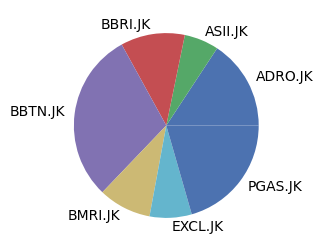

In [ ]:
# Portfolio composition black litterman
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_money2c2.flatten(), labels = column2c2)
plt.show()

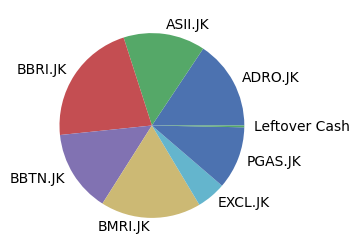

In [ ]:
# Portfolio composition black litterman
fig = plt.figure(figsize =(3, 3))
plt.pie(port2c_end['Total Asset Value'], labels = port2c_end['Asset Name'])
plt.show()

In [ ]:
port2c_end = port2c_end.append({'Asset Name': 'TOTAL', 'Quantity in MBU':"-",
               'Asset Price': "-", 'Total Asset Value': sum(port2c_end['Total Asset Value'])}
              ,ignore_index=True)
port2c_end # Black litterman

Asset Name Quantity in MBU Asset Price  Total Asset Value
0        ADRO.JK             669      265223          177434187
1        ASII.JK             257      632500          162552500
2        BBRI.JK             478      515000          246170000
3        BBTN.JK            1269      128500          163066500
4        BMRI.JK             393      507500          199447500
5        EXCL.JK             313      185886           58182318
6        PGAS.JK             874      142500          124545000
7  Leftover Cash         3576759           1            3576759
8          TOTAL               -           -         1134974764

In [ ]:
# If all assets were sold
print (f'Networth (Max Sharpe Ratio + Black Litterman): {np.float(networth2c)}')

Networth (Max Sharpe Ratio + Black Litterman): 1132147024.441617


In [ ]:
semiannual_c.append(np.float(networth2c))

## Simulation 3 (Quarterly)

In [ ]:
ev_period = 90 #days

### 1st Quarter

In [ ]:
start_date = "2022-05-10"
finish_date = "2022-08-11"
data_stock_sim = yf.download(asset_stock, start=start_date, end=finish_date)
data_stock_sim.index = pd.to_datetime(data_stock_sim.index).date
data_asset_sim = pd.concat([data_stock_sim],axis=1,sort=False).reset_index()
data_asset_sim.rename(columns={'index':'Date'}, inplace=True)
data_asset_sim.index = data_asset_sim['Date']
price_asset_sim = data_asset_sim['Adj Close']
price_asset_sim = price_asset_sim.dropna()

buy_price3a = price_asset_sim.loc[price_asset_sim.index[0]]
sell_price3a = (pd.DataFrame(price_asset_sim.loc[price_asset_sim.index[len(price_asset_sim)-1]])).T
return_asset_3a = np.log(sell_price3a/buy_price3a)

[*********************100%***********************]  10 of 10 completed


In [ ]:
# Allocation for maximum sharpe ratio with black litterman allocation
dabl3c = DiscreteAllocation(weights_bl0, MBU*buy_price3a*(1+buy_fee), total_portfolio_value=IB)
allocbl3c, leftoverbl3c = dabl3c.greedy_portfolio()
print("Discrete allocation:", allocbl3c)
print("Funds remaining: IDR{:.2f}".format(leftoverbl3c))

Discrete allocation: {'PGAS.JK': 1410, 'ADRO.JK': 567, 'BBRI.JK': 311, 'BMRI.JK': 326, 'BBTN.JK': 690, 'ASII.JK': 149, 'EXCL.JK': 298, 'MFIN.JK': 442, 'BUMI.JK': 5315, 'TLKM.JK': 56}
Funds remaining: IDR2256.63


In [ ]:
portion3c = (pd.DataFrame.from_dict([allocbl3c]).T).sort_index()
column3c = [(portion3c.T).columns[i] for i in range (len(portion3c))]
portion_money3c = (np.array(portion3c)).reshape(-1,1)
networth3c, NAV3c = 0, 0
for i in range (len(column3c)):
  NAV3c += MBU*(np.dot(sell_price3a[sell_price3a.columns[sell_price3a.columns.isin([column3c[i]])]],portion_money3c[i]))
  networth3c += (1-sell_fee)*MBU*(np.dot(sell_price3a[sell_price3a.columns[sell_price3a.columns.isin([column3c[i]])]],portion_money3c[i]))
leftoverbl3c = leftoverbl3c*(1+ir)**(ev_period/360)
NAV3c += leftoverbl3c
networth3c += leftoverbl3c
port3c = pd.DataFrame(portion_money3c, columns=['Quantity in MBU'])
port3c.insert(0,'Asset Name',column3c)
port3c = port3c.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverbl3c}, ignore_index=True)
port3c.index = port3c.index+1

In [ ]:
port3c # Black litterman

Asset Name  Quantity in MBU
1         ADRO.JK        567.00000
2         ASII.JK        149.00000
3         BBRI.JK        311.00000
4         BBTN.JK        690.00000
5         BMRI.JK        326.00000
6         BUMI.JK       5315.00000
7         EXCL.JK        298.00000
8         MFIN.JK        442.00000
9         PGAS.JK       1410.00000
10        TLKM.JK         56.00000
11  Leftover Cash       2278.86159

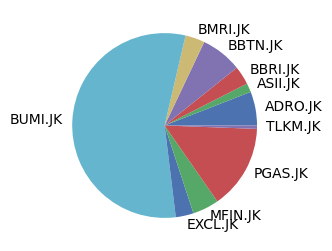

In [ ]:
# Portfolio composition black litterman
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_money3c.flatten(), labels = column3c)
plt.show()

In [ ]:
print (f'Net Asset Value (Max Sharpe Ratio + Black Litterman): {np.float(NAV3c)}')

Net Asset Value (Max Sharpe Ratio + Black Litterman): 1072455807.9875665


In [ ]:
# If all assets were sold
print (f'Networth (Max Sharpe Ratio + Black Litterman): {np.float(networth3c)}')

Networth (Max Sharpe Ratio + Black Litterman): 1069774674.1647515


In [ ]:
quarter_c = [IB]
quarter_c.append(np.float(networth3c))

### 2nd Quarter

In [ ]:
start_date = "2022-08-10"
finish_date = "2022-11-11"
data_stock_sim = yf.download(asset_stock, start=start_date, end=finish_date)
data_stock_sim.index = pd.to_datetime(data_stock_sim.index).date
data_asset_sim = pd.concat([data_stock_sim],axis=1,sort=False).reset_index()
data_asset_sim.rename(columns={'index':'Date'}, inplace=True)
data_asset_sim.index = data_asset_sim['Date']
price_asset_sim = data_asset_sim['Adj Close']
price_asset_sim = price_asset_sim.dropna()

buy_price3b = price_asset_sim.loc[price_asset_sim.index[0]]
sell_price3b = (pd.DataFrame(price_asset_sim.loc[price_asset_sim.index[len(price_asset_sim)-1]])).T
return_asset_3b = np.log(sell_price3b-buy_price3b/buy_price3b)

[*********************100%***********************]  10 of 10 completed


In [ ]:
# Allocation for maximum sharpe ratio with black litterman allocation
dabl3c2 = DiscreteAllocation(weights_bl3, MBU*buy_price3b*(1+buy_fee), total_portfolio_value=np.float(networth3c))
allocbl3c2, leftoverbl3c2 = dabl3c2.greedy_portfolio()
print("Discrete allocation:", allocbl3c2)
print("Funds remaining: IDR{:.2f}".format(leftoverbl3c2))

Discrete allocation: {'BBRI.JK': 576, 'BMRI.JK': 545, 'BBTN.JK': 1052, 'PGAS.JK': 960, 'ASII.JK': 222, 'TLKM.JK': 201, 'EXCL.JK': 276}
Funds remaining: IDR11843.73


In [ ]:
portion3c2 = (pd.DataFrame.from_dict([allocbl3c2]).T).sort_index()
column3c2 = [(portion3c2.T).columns[i] for i in range (len(portion3c2))]
portion_money3c2 = (np.array(portion3c2)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustments3c_name = asset_stock
Adjustments3c_quant = []
initial_3c_name = np.array(portion3c.index)
ending_3c_name = np.array(portion3c2.index)
for i in range (len(Adjustments3c_name)):
  if Adjustments3c_name[i] in ending_3c_name:
    index = int((np.where(ending_3c_name == Adjustments3c_name[i]))[0])
    Adjustments3c_quant.append(np.array(portion3c2).flatten()[index])
  else:
    Adjustments3c_quant.append(0)
for i in range (len(Adjustments3c_name)):
  if Adjustments3c_name[i] in initial_3c_name:
    index = int((np.where(initial_3c_name == Adjustments3c_name[i]))[0])
    Adjustments3c_quant[i] -= np.array(portion_money3c).flatten()[index]

In [ ]:
buy_price3b = pd.DataFrame(buy_price3b).T

# Balance after selling assets (adjustments)
for i in range (len(Adjustments3c_name)):
  if Adjustments3c_quant[i] < 0:
    leftoverbl3c -= np.float((1-sell_fee)*MBU*Adjustments3c_quant[i]*(np.array(sell_price3a).reshape(-1,1))[i])
  elif Adjustments3c_quant[i] > 0:
    leftoverbl3c -= np.float((1+buy_fee)*MBU*Adjustments3c_quant[i]*(np.array(buy_price3b).reshape(-1,1))[i])

In [ ]:
networth3c, NAV3c = 0.0, 0.0
for i in range (len(column3c2)):
  NAV3c += MBU*(np.dot(sell_price3b[sell_price3b.columns[sell_price3b.columns.isin([column3c2[i]])]],portion_money3c2[i]))
  networth3c += (1-sell_fee)*MBU*(np.dot(sell_price3b[sell_price3b.columns[sell_price3b.columns.isin([column3c2[i]])]],portion_money3c2[i]))
leftoverbl3c = leftoverbl3c*(1+ir)**(ev_period/360)
NAV3c += leftoverbl3c
networth3c += leftoverbl3c
port3c = pd.DataFrame(portion_money3c2, columns=['Quantity in MBU'])
port3c.insert(0,'Asset Name',column3c2)
port3c = port3c.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':int(leftoverbl3c)}, ignore_index=True)
port3c.index = port3c.index+1

In [ ]:
ending_price3c = MBU*sell_price3b[sell_price3b.columns[sell_price3b.columns.isin(port3c['Asset Name'])]]
ending_price3c.index = ["Asset Price"]
ending_price3c = ending_price3c.T
ending_price3c.insert(0,'Asset Name',(ending_price3c.index).to_numpy())
ending_price3c = ending_price3c.append({'Asset Name':'Leftover Cash', 'Asset Price': 1}, ignore_index=True)
ending_price3c.index = [1+i for i in range (len(ending_price3c))]
port3c_end = []
for i in range (len(np.array(ending_price3c))):
  for j in range (len(np.array(port3c))):
    if (np.array(port3c))[j][0] == (np.array(ending_price3c))[i][0]:
      port3c_end.append(np.array(port3c)[j])
port3c_end = pd.DataFrame(port3c_end)
port3c_end = port3c_end.rename(columns={0:'Asset Name', 1:'Quantity in MBU'})
port3c_end.index = port3c_end.index + 1
port3c_end.insert(2, 'Asset Price', (ending_price3c['Asset Price'].to_numpy()).astype('i'))
port3c_end.insert(3, 'Total Asset Value', (port3c_end['Quantity in MBU']*port3c_end['Asset Price']).astype('i'))

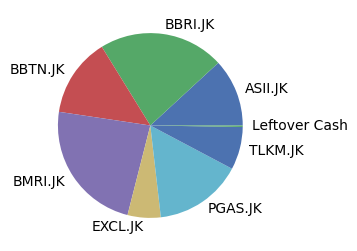

In [ ]:
# Portfolio composition black litterman
fig = plt.figure(figsize =(3, 3))
plt.pie(port3c_end['Total Asset Value'], labels = port3c_end['Asset Name'])
plt.show()

In [ ]:
port3c_end = port3c_end.append({'Asset Name': 'TOTAL', 'Quantity in MBU':"-",
               'Asset Price': "-", 'Total Asset Value': sum(port3c_end['Total Asset Value'])}
              ,ignore_index=True)
port3c_end # Black litterman

Asset Name Quantity in MBU Asset Price  Total Asset Value
0        ASII.JK             222      597927          132739794
1        BBRI.JK             576      426263          245527488
2        BBTN.JK            1052      147247          154903844
3        BMRI.JK             545      480475          261858875
4        EXCL.JK             276      234804           64805904
5        PGAS.JK             960      180000          172800000
6        TLKM.JK             201      417000           83817000
7  Leftover Cash         2864943           1            2864943
8          TOTAL               -           -         1119317848

In [ ]:
networth3c = 0
for i in range (len(np.array(port3c_end))-1):
  if i == len(np.array(port3c_end))-2:
    networth3c += (np.array(port3c_end))[i][3]
  else:
    networth3c += (1-sell_fee)*(np.array(port3c_end))[i][3]

In [ ]:
# If all assets were sold
print (f'Networth (Max Sharpe Ratio + Black Litterman): {np.float(networth3c)}')

Networth (Max Sharpe Ratio + Black Litterman): 1116526715.7375002


In [ ]:
quarter_c.append(np.float(networth3c))

### 3rd Quarter

In [ ]:
start_date = "2022-11-10"
finish_date = "2023-02-11"
data_stock_sim = yf.download(asset_stock, start=start_date, end=finish_date)
data_stock_sim.index = pd.to_datetime(data_stock_sim.index).date
data_asset_sim = pd.concat([data_stock_sim],axis=1,sort=False).reset_index()
data_asset_sim.rename(columns={'index':'Date'}, inplace=True)
data_asset_sim.index = data_asset_sim['Date']
price_asset_sim = data_asset_sim['Adj Close']
price_asset_sim = price_asset_sim.dropna()

buy_price3c = price_asset_sim.loc[price_asset_sim.index[0]]
sell_price3c = (pd.DataFrame(price_asset_sim.loc[price_asset_sim.index[len(price_asset_sim)-1]])).T
return_asset_3c = np.log(sell_price3c/buy_price3c)

[*********************100%***********************]  10 of 10 completed


In [ ]:
# Allocation for maximum sharpe ratio with black litterman allocation
dabl3c3 = DiscreteAllocation(weights_bl6, MBU*buy_price3c*(1+buy_fee), total_portfolio_value=np.float(networth3c))
allocbl3c3, leftoverbl3c3 = dabl3c3.greedy_portfolio()
print("Discrete allocation:", allocbl3c3)
print("Funds remaining: IDR{:.2f}".format(leftoverbl3c3))

Discrete allocation: {'BBRI.JK': 459, 'ADRO.JK': 644, 'BMRI.JK': 377, 'BBTN.JK': 1219, 'PGAS.JK': 840, 'ASII.JK': 247, 'EXCL.JK': 301}
Funds remaining: IDR19947.46


In [ ]:
portion3c3 = (pd.DataFrame.from_dict([allocbl3c3]).T).sort_index()
column3c3 = [(portion3c3.T).columns[i] for i in range (len(portion3c3))]
portion_money3c3 = (np.array(portion3c3)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustments3c_name = asset_stock
Adjustments3c_quant = []
initial_3c_name = np.array(portion3c2.index)
ending_3c_name = np.array(portion3c3.index)
for i in range (len(Adjustments3c_name)):
  if Adjustments3c_name[i] in ending_3c_name:
    index = int((np.where(ending_3c_name == Adjustments3c_name[i]))[0])
    Adjustments3c_quant.append(np.array(portion3c3).flatten()[index])
  else:
    Adjustments3c_quant.append(0)
for i in range (len(Adjustments3c_name)):
  if Adjustments3c_name[i] in initial_3c_name:
    index = int((np.where(initial_3c_name == Adjustments3c_name[i]))[0])
    Adjustments3c_quant[i] -= np.array(portion_money3c2).flatten()[index]

In [ ]:
buy_price3c = pd.DataFrame(buy_price3c).T

# Balance after selling assets (adjustments)
for i in range (len(Adjustments3c_name)):
  if Adjustments3c_quant[i] < 0:
    leftoverbl3c -= np.float((1-sell_fee)*MBU*Adjustments3c_quant[i]*(np.array(sell_price3b).reshape(-1,1))[i])
  elif Adjustments3c_quant[i] > 0:
    leftoverbl3c -= np.float((1+buy_fee)*MBU*Adjustments3c_quant[i]*(np.array(buy_price3c).reshape(-1,1))[i])

In [ ]:
networth3c, NAV3c = 0.0, 0.0
for i in range (len(column3c3)):
  NAV3c += MBU*(np.dot(sell_price3c[sell_price3c.columns[sell_price3c.columns.isin([column3c3[i]])]],portion_money3c3[i]))
  networth3c += (1-sell_fee)*MBU*(np.dot(sell_price3c[sell_price3c.columns[sell_price3c.columns.isin([column3c3[i]])]],portion_money3c3[i]))
leftoverbl3c = leftoverbl3c*(1+ir)**(ev_period/360)
NAV3c += leftoverbl3c
networth3c += leftoverbl3c
port3c = pd.DataFrame(portion_money3c3, columns=['Quantity in MBU'])
port3c.insert(0,'Asset Name',column3c3)
port3c = port3c.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':int(leftoverbl3c)}, ignore_index=True)
port3c.index = port3c.index+1

In [ ]:
ending_price3c = MBU*sell_price3c[sell_price3c.columns[sell_price3c.columns.isin(port3c['Asset Name'])]]
ending_price3c.index = ["Asset Price"]
ending_price3c = ending_price3c.T
ending_price3c.insert(0,'Asset Name',(ending_price3c.index).to_numpy())
ending_price3c = ending_price3c.append({'Asset Name':'Leftover Cash', 'Asset Price': 1}, ignore_index=True)
ending_price3c.index = [1+i for i in range (len(ending_price3c))]
port3c_end = []
for i in range (len(np.array(ending_price3c))):
  for j in range (len(np.array(port3c))):
    if (np.array(port3c))[j][0] == (np.array(ending_price3c))[i][0]:
      port3c_end.append(np.array(port3c)[j])
port3c_end = pd.DataFrame(port3c_end)
port3c_end = port3c_end.rename(columns={0:'Asset Name', 1:'Quantity in MBU'})
port3c_end.index = port3c_end.index + 1
port3c_end.insert(2, 'Asset Price', (ending_price3c['Asset Price'].to_numpy()).astype('i'))
port3c_end.insert(3, 'Total Asset Value', (port3c_end['Quantity in MBU']*port3c_end['Asset Price']).astype('i'))

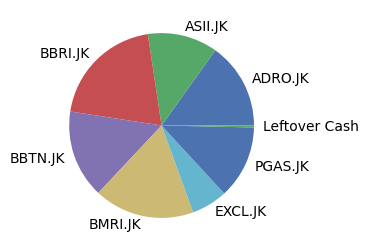

In [ ]:
# Portfolio composition black litterman
fig = plt.figure(figsize =(3, 3))
plt.pie(port3c_end['Total Asset Value'], labels = port3c_end['Asset Name'])
plt.show()

In [ ]:
port3c_end = port3c_end.append({'Asset Name': 'TOTAL', 'Quantity in MBU':"-",
               'Asset Price': "-", 'Total Asset Value': sum(port3c_end['Total Asset Value'])}
              ,ignore_index=True)
port3c_end # Black litterman

Asset Name Quantity in MBU Asset Price  Total Asset Value
0        ADRO.JK             644      247181          159184564
1        ASII.JK             247      522327          129014769
2        BBRI.JK             459      463066          212547294
3        BBTN.JK            1219      133247          162428093
4        BMRI.JK             377      489990          184726230
5        EXCL.JK             301      220128           66258528
6        PGAS.JK             840      160500          134820000
7  Leftover Cash         3578529           1            3578529
8          TOTAL               -           -         1052558007

In [ ]:
networth3c = 0
for i in range (len(np.array(port3c_end))-1):
  if i == len(np.array(port3c_end))-2:
    networth3c += (np.array(port3c_end))[i][3]
  else:
    networth3c += (1-sell_fee)*(np.array(port3c_end))[i][3]

In [ ]:
# If all assets were sold
print (f'Networth (Max Sharpe Ratio + Black Litterman): {np.float(networth3c)}')

Networth (Max Sharpe Ratio + Black Litterman): 1049935558.3050001


In [ ]:
quarter_c.append(np.float(networth3c))

### 4th Quarter

In [ ]:
start_date = "2023-02-10"
finish_date = "2023-05-11"
data_stock_sim = yf.download(asset_stock, start=start_date, end=finish_date)
data_stock_sim.index = pd.to_datetime(data_stock_sim.index).date
data_asset_sim = pd.concat([data_stock_sim],axis=1,sort=False).reset_index()
data_asset_sim.rename(columns={'index':'Date'}, inplace=True)
data_asset_sim.index = data_asset_sim['Date']
price_asset_sim = data_asset_sim['Adj Close']
price_asset_sim = price_asset_sim.dropna()

buy_price3d = price_asset_sim.loc[price_asset_sim.index[0]]
sell_price3d = (pd.DataFrame(price_asset_sim.loc[price_asset_sim.index[len(price_asset_sim)-1]])).T
return_asset_3d = np.log(sell_price3d/buy_price3d)

[*********************100%***********************]  10 of 10 completed


In [ ]:
# Allocation for maximum sharpe ratio with black litterman allocation
dabl3c4 = DiscreteAllocation(weights_bl9, MBU*buy_price3d*(1+buy_fee), total_portfolio_value=np.float(networth3c))
allocbl3c4, leftoverbl3c4 = dabl3c4.greedy_portfolio()
print("Discrete allocation:", allocbl3c4)
print("Funds remaining: IDR{:.2f}".format(leftoverbl3c4))

Discrete allocation: {'BBRI.JK': 1096, 'BMRI.JK': 522, 'TLKM.JK': 508, 'ASII.JK': 176}
Funds remaining: IDR97760.60


In [ ]:
portion3c4 = (pd.DataFrame.from_dict([allocbl3c4]).T).sort_index()
column3c4 = [(portion3c4.T).columns[i] for i in range (len(portion3c4))]
portion_money3c4 = (np.array(portion3c4)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustments3c_name = asset_stock
Adjustments3c_quant = []
initial_3c_name = np.array(portion3c3.index)
ending_3c_name = np.array(portion3c4.index)
for i in range (len(Adjustments3c_name)):
  if Adjustments3c_name[i] in ending_3c_name:
    index = int((np.where(ending_3c_name == Adjustments3c_name[i]))[0])
    Adjustments3c_quant.append(np.array(portion3c4).flatten()[index])
  else:
    Adjustments3c_quant.append(0)
for i in range (len(Adjustments3c_name)):
  if Adjustments3c_name[i] in initial_3c_name:
    index = int((np.where(initial_3c_name == Adjustments3c_name[i]))[0])
    Adjustments3c_quant[i] -= np.array(portion_money3c3).flatten()[index]

In [ ]:
buy_price3d = pd.DataFrame(buy_price3d).T

# Balance after selling assets (adjustments)
for i in range (len(Adjustments3c_name)):
  if Adjustments3c_quant[i] < 0:
    leftoverbl3c -= np.float((1-sell_fee)*MBU*Adjustments3c_quant[i]*(np.array(sell_price3c).reshape(-1,1))[i])
  elif Adjustments3c_quant[i] > 0:
    leftoverbl3c -= np.float((1+buy_fee)*MBU*Adjustments3c_quant[i]*(np.array(buy_price3d).reshape(-1,1))[i])

In [ ]:
networth3c, NAV3c = 0.0, 0.0
for i in range (len(column3c4)):
  NAV3c += MBU*(np.dot(sell_price3d[sell_price3d.columns[sell_price3d.columns.isin([column3c4[i]])]],portion_money3c4[i]))
  networth3c += (1-sell_fee)*MBU*(np.dot(sell_price3d[sell_price3d.columns[sell_price3d.columns.isin([column3c4[i]])]],portion_money3c4[i]))
leftoverbl3c = leftoverbl3c*(1+ir)**(ev_period/360)
NAV3c += leftoverbl3c
networth3c += leftoverbl3c
port3c = pd.DataFrame(portion_money3c4, columns=['Quantity in MBU'])
port3c.insert(0,'Asset Name',column3c4)
port3c = port3c.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':int(leftoverbl3c)}, ignore_index=True)
port3c.index = port3c.index+1

In [ ]:
ending_price3c = MBU*sell_price3d[sell_price3d.columns[sell_price3d.columns.isin(port3c['Asset Name'])]]
ending_price3c.index = ["Asset Price"]
ending_price3c = ending_price3c.T
ending_price3c.insert(0,'Asset Name',(ending_price3c.index).to_numpy())
ending_price3c = ending_price3c.append({'Asset Name':'Leftover Cash', 'Asset Price': 1}, ignore_index=True)
ending_price3c.index = [1+i for i in range (len(ending_price3c))]
port3c_end = []
for i in range (len(np.array(ending_price3c))):
  for j in range (len(np.array(port3c))):
    if (np.array(port3c))[j][0] == (np.array(ending_price3c))[i][0]:
      port3c_end.append(np.array(port3c)[j])
port3c_end = pd.DataFrame(port3c_end)
port3c_end = port3c_end.rename(columns={0:'Asset Name', 1:'Quantity in MBU'})
port3c_end.index = port3c_end.index + 1
port3c_end.insert(2, 'Asset Price', (ending_price3c['Asset Price'].to_numpy()).astype('i'))
port3c_end.insert(3, 'Total Asset Value', (port3c_end['Quantity in MBU']*port3c_end['Asset Price']).astype('i'))

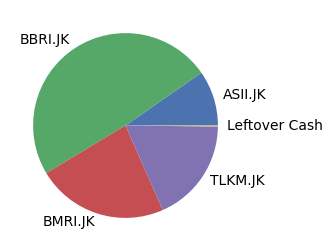

In [ ]:
# Portfolio composition black litterman
fig = plt.figure(figsize =(3, 3))
plt.pie(port3c_end['Total Asset Value'], labels = port3c_end['Asset Name'])
plt.show()

In [ ]:
port3c_end = port3c_end.append({'Asset Name': 'TOTAL', 'Quantity in MBU':"-",
               'Asset Price': "-", 'Total Asset Value': sum(port3c_end['Total Asset Value'])}
              ,ignore_index=True)
port3c_end # Black litterman

Asset Name Quantity in MBU Asset Price  Total Asset Value
0        ASII.JK             176      632500          111320000
1        BBRI.JK            1096      515000          564440000
2        BMRI.JK             522      507500          264915000
3        TLKM.JK             508      413000          209804000
4  Leftover Cash         2076089           1            2076089
5          TOTAL               -           -         1152555089

In [ ]:
networth3c = 0
for i in range (len(np.array(port3c_end))-1):
  if i == len(np.array(port3c_end))-2:
    networth3c += (np.array(port3c_end))[i][3]
  else:
    networth3c += (1-sell_fee)*(np.array(port3c_end))[i][3]

In [ ]:
# If all assets were sold
print (f'Networth (Max Sharpe Ratio + Black Litterman): {np.float(networth3c)}')

Networth (Max Sharpe Ratio + Black Litterman): 1149678891.5


In [ ]:
quarter_c.append(np.float(networth3c))

## Simulation 4 (Monthly)

In [ ]:
ev_period = 30 #days

### 1st Month

In [ ]:
start_date = "2022-05-10"
finish_date = "2022-06-11"
data_stock_sim = yf.download(asset_stock, start=start_date, end=finish_date)
data_stock_sim.index = pd.to_datetime(data_stock_sim.index).date
data_asset_sim = pd.concat([data_stock_sim],axis=1,sort=False).reset_index()
data_asset_sim.rename(columns={'index':'Date'}, inplace=True)
data_asset_sim.index = data_asset_sim['Date']
price_asset_sim = data_asset_sim['Adj Close']
price_asset_sim = price_asset_sim.dropna()

buy_price4a = price_asset_sim.loc[price_asset_sim.index[0]]
sell_price4a = (pd.DataFrame(price_asset_sim.loc[price_asset_sim.index[len(price_asset_sim)-1]])).T
return_asset_4a = np.log(sell_price4a/buy_price4a)

[*********************100%***********************]  10 of 10 completed


In [ ]:
# Allocation for maximum sharpe ratio with black litterman allocation
dabl4c = DiscreteAllocation(weights_bl0, MBU*buy_price4a*(1+buy_fee), total_portfolio_value=IB)
allocbl4c, leftoverbl4c = dabl4c.greedy_portfolio()
print("Discrete allocation:", allocbl4c)
print("Funds remaining: IDR{:.2f}".format(leftoverbl4c))

Discrete allocation: {'PGAS.JK': 1410, 'ADRO.JK': 567, 'BBRI.JK': 311, 'BMRI.JK': 326, 'BBTN.JK': 690, 'ASII.JK': 149, 'EXCL.JK': 298, 'MFIN.JK': 442, 'BUMI.JK': 5315, 'TLKM.JK': 56}
Funds remaining: IDR2277.78


In [ ]:
portion4c = (pd.DataFrame.from_dict([allocbl4c]).T).sort_index()
column4c = [(portion4c.T).columns[i] for i in range (len(portion4c))]
portion_money4c = (np.array(portion4c)).reshape(-1,1)
networth4c, NAV4c = 0, 0
for i in range (len(column4c)):
  NAV4c += MBU*(np.dot(sell_price4a[sell_price4a.columns[sell_price4a.columns.isin([column4c[i]])]],portion_money4c[i]))
  networth4c += (1-sell_fee)*MBU*(np.dot(sell_price4a[sell_price4a.columns[sell_price4a.columns.isin([column4c[i]])]],portion_money4c[i]))
leftoverbl4c = leftoverbl4c*(1+ir)**(ev_period/360)
NAV4c += leftoverbl4c
networth4c += leftoverbl4c
port4c = pd.DataFrame(portion_money4c, columns=['Quantity in MBU'])
port4c.insert(0,'Asset Name',column4c)
port4c = port4c.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':leftoverbl4c}, ignore_index=True)
port4c.index = port4c.index+1

In [ ]:
port4c # Black litterman

Asset Name  Quantity in MBU
1         ADRO.JK       567.000000
2         ASII.JK       149.000000
3         BBRI.JK       311.000000
4         BBTN.JK       690.000000
5         BMRI.JK       326.000000
6         BUMI.JK      5315.000000
7         EXCL.JK       298.000000
8         MFIN.JK       442.000000
9         PGAS.JK      1410.000000
10        TLKM.JK        56.000000
11  Leftover Cash      2285.232822

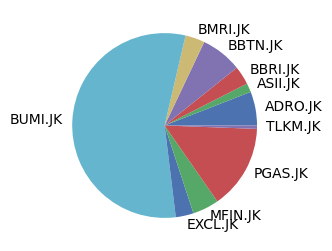

In [ ]:
# Portfolio composition black litterman
fig = plt.figure(figsize =(3, 3))
plt.pie(portion_money4c.flatten(), labels = column4c)
plt.show()

In [ ]:
print (f'Net Asset Value (Max Sharpe Ratio + Black Litterman): {np.float(NAV4c)}')

Net Asset Value (Max Sharpe Ratio + Black Litterman): 1043651798.5629004


In [ ]:
# If all assets were sold
print (f'Networth (Max Sharpe Ratio + Black Litterman): {np.float(networth4c)}')

Networth (Max Sharpe Ratio + Black Litterman): 1041042674.7795752


In [ ]:
month_c = [IB]
month_c.append(np.float(networth4c))

### 2nd Month

In [ ]:
start_date = "2022-06-10"
finish_date = "2022-07-11"
data_stock_sim = yf.download(asset_stock, start=start_date, end=finish_date)
data_stock_sim.index = pd.to_datetime(data_stock_sim.index).date
data_asset_sim = pd.concat([data_stock_sim],axis=1,sort=False).reset_index()
data_asset_sim.rename(columns={'index':'Date'}, inplace=True)
data_asset_sim.index = data_asset_sim['Date']
price_asset_sim = data_asset_sim['Adj Close']
price_asset_sim = price_asset_sim.dropna()

buy_price4b = price_asset_sim.loc[price_asset_sim.index[0]]
sell_price4b = (pd.DataFrame(price_asset_sim.loc[price_asset_sim.index[len(price_asset_sim)-1]])).T
return_asset_4b = np.log(sell_price4b/buy_price4b)

[*********************100%***********************]  10 of 10 completed


In [ ]:
# Allocation for maximum sharpe ratio with black litterman allocation
dabl4c2 = DiscreteAllocation(weights_bl1, MBU*buy_price4b*(1+buy_fee), total_portfolio_value=np.float(networth4c))
allocbl4c2, leftoverbl4c2 = dabl4c2.greedy_portfolio()
print("Discrete allocation:", allocbl4c2)
print("Funds remaining: IDR{:.2f}".format(leftoverbl4c2))

Discrete allocation: {'BBRI.JK': 688, 'BMRI.JK': 605, 'BBTN.JK': 1105, 'PGAS.JK': 843, 'ASII.JK': 186, 'MFIN.JK': 450, 'TLKM.JK': 56, 'EXCL.JK': 36}
Funds remaining: IDR142794.25


In [ ]:
portion4c2 = (pd.DataFrame.from_dict([allocbl4c2]).T).sort_index()
column4c2 = [(portion4c2.T).columns[i] for i in range (len(portion4c2))]
portion_money4c2 = (np.array(portion4c2)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustments4c_name = asset_stock
Adjustments4c_quant = []
initial_4c_name = np.array(portion4c.index)
ending_4c_name = np.array(portion4c2.index)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_name[i] in ending_4c_name:
    index = int((np.where(ending_4c_name == Adjustments4c_name[i]))[0])
    Adjustments4c_quant.append(np.array(portion4c2).flatten()[index])
  else:
    Adjustments4c_quant.append(0)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_name[i] in initial_4c_name:
    index = int((np.where(initial_4c_name == Adjustments4c_name[i]))[0])
    Adjustments4c_quant[i] -= np.array(portion_money4c).flatten()[index]

In [ ]:
buy_price4b = pd.DataFrame(buy_price4b).T

# Balance after selling assets (adjustments)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_quant[i] < 0:
    leftoverbl4c -= np.float((1-sell_fee)*MBU*Adjustments4c_quant[i]*(np.array(sell_price4a).reshape(-1,1))[i])
  elif Adjustments4c_quant[i] > 0:
    leftoverbl4c -= np.float((1+buy_fee)*MBU*Adjustments4c_quant[i]*(np.array(buy_price4b).reshape(-1,1))[i])

In [ ]:
networth4c, NAV4c = 0.0, 0.0
for i in range (len(column4c2)):
  NAV4c += MBU*(np.dot(sell_price4b[sell_price4b.columns[sell_price4b.columns.isin([column4c2[i]])]],portion_money4c2[i]))
  networth4c += (1-sell_fee)*MBU*(np.dot(sell_price4b[sell_price4b.columns[sell_price4b.columns.isin([column4c2[i]])]],portion_money4c2[i]))
leftoverbl4c = leftoverbl4c*(1+ir)**(ev_period/360)
NAV4c += leftoverbl4c
networth4c += leftoverbl4c
port4c = pd.DataFrame(portion_money4c2, columns=['Quantity in MBU'])
port4c.insert(0,'Asset Name',column4c2)
port4c = port4c.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':int(leftoverbl4c)}, ignore_index=True)
port4c.index = port4c.index+1

In [ ]:
ending_price4c = MBU*sell_price4b[sell_price4b.columns[sell_price4b.columns.isin(port4c['Asset Name'])]]
ending_price4c.index = ["Asset Price"]
ending_price4c = ending_price4c.T
ending_price4c.insert(0,'Asset Name',(ending_price4c.index).to_numpy())
ending_price4c = ending_price4c.append({'Asset Name':'Leftover Cash', 'Asset Price': 1}, ignore_index=True)
ending_price4c.index = [1+i for i in range (len(ending_price4c))]
port4c_end = []
for i in range (len(np.array(ending_price4c))):
  for j in range (len(np.array(port4c))):
    if (np.array(port4c))[j][0] == (np.array(ending_price4c))[i][0]:
      port4c_end.append(np.array(port4c)[j])
port4c_end = pd.DataFrame(port4c_end)
port4c_end = port4c_end.rename(columns={0:'Asset Name', 1:'Quantity in MBU'})
port4c_end.index = port4c_end.index + 1
port4c_end.insert(2, 'Asset Price', (ending_price4c['Asset Price'].to_numpy()).astype('i'))
port4c_end.insert(3, 'Total Asset Value', (port4c_end['Quantity in MBU']*port4c_end['Asset Price']).astype('i'))

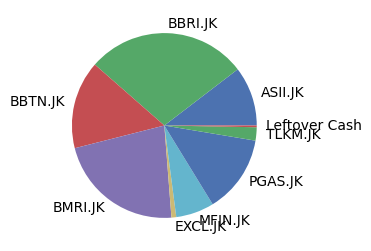

In [ ]:
# Portfolio composition black litterman
fig = plt.figure(figsize =(3, 3))
plt.pie(port4c_end['Total Asset Value'], labels = port4c_end['Asset Name'])
plt.show()

In [ ]:
port4c_end = port4c_end.append({'Asset Name': 'TOTAL', 'Quantity in MBU':"-",
               'Asset Price': "-", 'Total Asset Value': sum(port4c_end['Total Asset Value'])}
              ,ignore_index=True)
port4c_end # Black litterman

Asset Name Quantity in MBU Asset Price  Total Asset Value
0        ASII.JK             186      540143          100466598
1        BBRI.JK             688      395211          271905168
2        BBTN.JK            1105      134695          148837975
3        BMRI.JK             605      355599          215137395
4        EXCL.JK              36      225020            8100720
5        MFIN.JK             450      143690           64660500
6        PGAS.JK             843      156000          131508000
7        TLKM.JK              56      401000           22456000
8  Leftover Cash         2904078           1            2904078
9          TOTAL               -           -          965976434

In [ ]:
# If all assets were sold
print (f'Networth (Max Sharpe Ratio + Black Litterman): {np.float(networth4c)}')

Networth (Max Sharpe Ratio + Black Litterman): 963570473.1607282


In [ ]:
month_c.append(np.float(networth4c))

### 3rd Month

In [ ]:
start_date = "2022-07-10"
finish_date = "2022-08-11"
data_stock_sim = yf.download(asset_stock, start=start_date, end=finish_date)
data_stock_sim.index = pd.to_datetime(data_stock_sim.index).date
data_asset_sim = pd.concat([data_stock_sim],axis=1,sort=False).reset_index()
data_asset_sim.rename(columns={'index':'Date'}, inplace=True)
data_asset_sim.index = data_asset_sim['Date']
price_asset_sim = data_asset_sim['Adj Close']
price_asset_sim = price_asset_sim.dropna()

buy_price4c = price_asset_sim.loc[price_asset_sim.index[0]]
sell_price4c = (pd.DataFrame(price_asset_sim.loc[price_asset_sim.index[len(price_asset_sim)-1]])).T
return_asset_4c = (sell_price4c-buy_price4c) / buy_price4c

[*********************100%***********************]  10 of 10 completed


In [ ]:
# Allocation for maximum sharpe ratio with black litterman allocation
dabl4c3 = DiscreteAllocation(weights_bl2, MBU*buy_price4c*(1+buy_fee), total_portfolio_value=np.float(networth4c))
allocbl4c3, leftoverbl4c3 = dabl4c3.greedy_portfolio()
print("Discrete allocation:", allocbl4c3)
print("Funds remaining: IDR{:.2f}".format(leftoverbl4c3))

Discrete allocation: {'ASII.JK': 865, 'BMRI.JK': 540, 'BBRI.JK': 426, 'BBTN.JK': 820, 'PGAS.JK': 137}
Funds remaining: IDR92958.82


In [ ]:
portion4c3 = (pd.DataFrame.from_dict([allocbl4c3]).T).sort_index()
column4c3 = [(portion4c3.T).columns[i] for i in range (len(portion4c3))]
portion_money4c3 = (np.array(portion4c3)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustments4c_name = asset_stock
Adjustments4c_quant = []
initial_4c_name = np.array(portion4c2.index)
ending_4c_name = np.array(portion4c3.index)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_name[i] in ending_4c_name:
    index = int((np.where(ending_4c_name == Adjustments4c_name[i]))[0])
    Adjustments4c_quant.append(np.array(portion4c3).flatten()[index])
  else:
    Adjustments4c_quant.append(0)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_name[i] in initial_4c_name:
    index = int((np.where(initial_4c_name == Adjustments4c_name[i]))[0])
    Adjustments4c_quant[i] -= np.array(portion_money4c2).flatten()[index]

In [ ]:
buy_price4c = pd.DataFrame(buy_price4c).T

# Balance after selling assets (adjustments)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_quant[i] < 0:
    leftoverbl4c -= np.float((1-sell_fee)*MBU*Adjustments4c_quant[i]*(np.array(sell_price4b).reshape(-1,1))[i])
  elif Adjustments4c_quant[i] > 0:
    leftoverbl4c -= np.float((1+buy_fee)*MBU*Adjustments4c_quant[i]*(np.array(buy_price4c).reshape(-1,1))[i])

In [ ]:
networth4c, NAV4c = 0.0, 0.0
for i in range (len(column4c3)):
  NAV4c += MBU*(np.dot(sell_price4c[sell_price4c.columns[sell_price4c.columns.isin([column4c3[i]])]],portion_money4c3[i]))
  networth4c += (1-sell_fee)*MBU*(np.dot(sell_price4c[sell_price4c.columns[sell_price4c.columns.isin([column4c3[i]])]],portion_money4c3[i]))
leftoverbl4c = leftoverbl4c*(1+ir)**(ev_period/360)
NAV4c += leftoverbl4c
networth4c += leftoverbl4c
port4c = pd.DataFrame(portion_money4c3, columns=['Quantity in MBU'])
port4c.insert(0,'Asset Name',column4c3)
port4c = port4c.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':int(leftoverbl4c)}, ignore_index=True)
port4c.index = port4c.index+1

In [ ]:
ending_price4c = MBU*sell_price4c[sell_price4c.columns[sell_price4c.columns.isin(port4c['Asset Name'])]]
ending_price4c.index = ["Asset Price"]
ending_price4c = ending_price4c.T
ending_price4c.insert(0,'Asset Name',(ending_price4c.index).to_numpy())
ending_price4c = ending_price4c.append({'Asset Name':'Leftover Cash', 'Asset Price': 1}, ignore_index=True)
ending_price4c.index = [1+i for i in range (len(ending_price4c))]
port4c_end = []
for i in range (len(np.array(ending_price4c))):
  for j in range (len(np.array(port4c))):
    if (np.array(port4c))[j][0] == (np.array(ending_price4c))[i][0]:
      port4c_end.append(np.array(port4c)[j])
port4c_end = pd.DataFrame(port4c_end)
port4c_end = port4c_end.rename(columns={0:'Asset Name', 1:'Quantity in MBU'})
port4c_end.index = port4c_end.index + 1
port4c_end.insert(2, 'Asset Price', (ending_price4c['Asset Price'].to_numpy()).astype('i'))
port4c_end.insert(3, 'Total Asset Value', (port4c_end['Quantity in MBU']*port4c_end['Asset Price']).astype('i'))

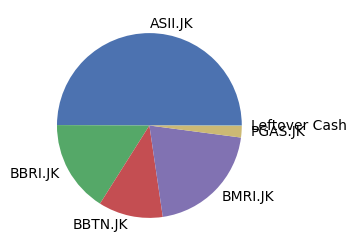

In [ ]:
# Portfolio composition black litterman
fig = plt.figure(figsize =(3, 3))
plt.pie(port4c_end['Total Asset Value'], labels = port4c_end['Asset Name'])
plt.show()

In [ ]:
port4c_end = port4c_end.append({'Asset Name': 'TOTAL', 'Quantity in MBU':"-",
               'Asset Price': "-", 'Total Asset Value': sum(port4c_end['Total Asset Value'])}
              ,ignore_index=True)
port4c_end # Black litterman

Asset Name Quantity in MBU Asset Price  Total Asset Value
0        ASII.JK             865      619243          535645195
1        BBRI.JK             426      405562          172769412
2        BBTN.JK             820      147730          121138600
3        BMRI.JK             540      409117          220923180
4        PGAS.JK             137      160000           21920000
5  Leftover Cash          462994           1             462994
6          TOTAL               -           -         1072859381

In [ ]:
# If all assets were sold
print (f'Networth (Max Sharpe Ratio + Black Litterman): {np.float(networth4c)}')

Networth (Max Sharpe Ratio + Black Litterman): 1070179952.111564


In [ ]:
month_c.append(np.float(networth4c))

### 4th Month

In [ ]:
start_date = "2022-08-10"
finish_date = "2022-09-11"
data_stock_sim = yf.download(asset_stock, start=start_date, end=finish_date)
data_stock_sim.index = pd.to_datetime(data_stock_sim.index).date
data_asset_sim = pd.concat([data_stock_sim],axis=1,sort=False).reset_index()
data_asset_sim.rename(columns={'index':'Date'}, inplace=True)
data_asset_sim.index = data_asset_sim['Date']
price_asset_sim = data_asset_sim['Adj Close']
price_asset_sim = price_asset_sim.dropna()

buy_price4d = price_asset_sim.loc[price_asset_sim.index[0]]
sell_price4d = (pd.DataFrame(price_asset_sim.loc[price_asset_sim.index[len(price_asset_sim)-1]])).T
return_asset_4d = np.log(sell_price4d/buy_price4d)

[*********************100%***********************]  10 of 10 completed


In [ ]:
# Allocation for maximum sharpe ratio with black litterman allocation
dabl4c4 = DiscreteAllocation(weights_bl3, MBU*buy_price4d*(1+buy_fee), total_portfolio_value=np.float(networth4c))
allocbl4c4, leftoverbl4c4 = dabl4c4.greedy_portfolio()
print("Discrete allocation:", allocbl4c4)
print("Funds remaining: IDR{:.2f}".format(leftoverbl4c4))

Discrete allocation: {'BBRI.JK': 576, 'BMRI.JK': 546, 'BBTN.JK': 1052, 'PGAS.JK': 960, 'ASII.JK': 222, 'TLKM.JK': 201, 'EXCL.JK': 276}
Funds remaining: IDR7390.08


In [ ]:
portion4c4 = (pd.DataFrame.from_dict([allocbl4c4]).T).sort_index()
column4c4 = [(portion4c4.T).columns[i] for i in range (len(portion4c4))]
portion_money4c4 = (np.array(portion4c4)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustments4c_name = asset_stock
Adjustments4c_quant = []
initial_4c_name = np.array(portion4c3.index)
ending_4c_name = np.array(portion4c4.index)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_name[i] in ending_4c_name:
    index = int((np.where(ending_4c_name == Adjustments4c_name[i]))[0])
    Adjustments4c_quant.append(np.array(portion4c4).flatten()[index])
  else:
    Adjustments4c_quant.append(0)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_name[i] in initial_4c_name:
    index = int((np.where(initial_4c_name == Adjustments4c_name[i]))[0])
    Adjustments4c_quant[i] -= np.array(portion_money4c3).flatten()[index]

In [ ]:
buy_price4d = pd.DataFrame(buy_price4d).T

# Balance after selling assets (adjustments)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_quant[i] < 0:
    leftoverbl4c -= np.float((1-sell_fee)*MBU*Adjustments4c_quant[i]*(np.array(sell_price4c).reshape(-1,1))[i])
  elif Adjustments4c_quant[i] > 0:
    leftoverbl4c -= np.float((1+buy_fee)*MBU*Adjustments4c_quant[i]*(np.array(buy_price4d).reshape(-1,1))[i])

In [ ]:
networth4c, NAV4c = 0.0, 0.0
for i in range (len(column4c4)):
  NAV4c += MBU*(np.dot(sell_price4d[sell_price4d.columns[sell_price4d.columns.isin([column4c4[i]])]],portion_money4c4[i]))
  networth4c += (1-sell_fee)*MBU*(np.dot(sell_price4d[sell_price4d.columns[sell_price4d.columns.isin([column4c4[i]])]],portion_money4c4[i]))
leftoverbl4c = leftoverbl4c*(1+ir)**(ev_period/360)
NAV4c += leftoverbl4c
networth4c += leftoverbl4c
port4c = pd.DataFrame(portion_money4c4, columns=['Quantity in MBU'])
port4c.insert(0,'Asset Name',column4c4)
port4c = port4c.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':int(leftoverbl4c)}, ignore_index=True)
port4c.index = port4c.index+1

In [ ]:
ending_price4c = MBU*sell_price4d[sell_price4d.columns[sell_price4d.columns.isin(port4c['Asset Name'])]]
ending_price4c.index = ["Asset Price"]
ending_price4c = ending_price4c.T
ending_price4c.insert(0,'Asset Name',(ending_price4c.index).to_numpy())
ending_price4c = ending_price4c.append({'Asset Name':'Leftover Cash', 'Asset Price': 1}, ignore_index=True)
ending_price4c.index = [1+i for i in range (len(ending_price4c))]
port4c_end = []
for i in range (len(np.array(ending_price4c))):
  for j in range (len(np.array(port4c))):
    if (np.array(port4c))[j][0] == (np.array(ending_price4c))[i][0]:
      port4c_end.append(np.array(port4c)[j])
port4c_end = pd.DataFrame(port4c_end)
port4c_end = port4c_end.rename(columns={0:'Asset Name', 1:'Quantity in MBU'})
port4c_end.index = port4c_end.index + 1
port4c_end.insert(2, 'Asset Price', (ending_price4c['Asset Price'].to_numpy()).astype('i'))
port4c_end.insert(3, 'Total Asset Value', (port4c_end['Quantity in MBU']*port4c_end['Asset Price']).astype('i'))

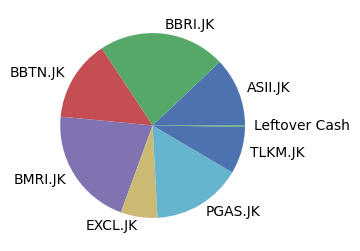

In [ ]:
# Portfolio composition black litterman
fig = plt.figure(figsize =(3, 3))
plt.pie(port4c_end['Total Asset Value'], labels = port4c_end['Asset Name'])
plt.show()

In [ ]:
port4c_end = port4c_end.append({'Asset Name': 'TOTAL', 'Quantity in MBU':"-",
               'Asset Price': "-", 'Total Asset Value': sum(port4c_end['Total Asset Value'])}
              ,ignore_index=True)
port4c_end # Black litterman

Asset Name Quantity in MBU Asset Price  Total Asset Value
0        ASII.JK             222      612463          135966786
1        BBRI.JK             576      433791          249863616
2        BBTN.JK            1052      151592          159474784
3        BMRI.JK             546      431714          235715844
4        EXCL.JK             276      261219           72096444
5        PGAS.JK             960      184000          176640000
6        TLKM.JK             201      460000           92460000
7  Leftover Cash         2713140           1            2713140
8          TOTAL               -           -         1124930614

In [ ]:
# If all assets were sold
print (f'Networth (Max Sharpe Ratio + Black Litterman): {np.float(networth4c)}')

Networth (Max Sharpe Ratio + Black Litterman): 1122126962.1536832


In [ ]:
month_c.append(np.float(networth4c))

### 5th Month

In [ ]:
start_date = "2022-09-10"
finish_date = "2022-10-11"
data_stock_sim = yf.download(asset_stock, start=start_date, end=finish_date)
data_stock_sim.index = pd.to_datetime(data_stock_sim.index).date
data_asset_sim = pd.concat([data_stock_sim],axis=1,sort=False).reset_index()
data_asset_sim.rename(columns={'index':'Date'}, inplace=True)
data_asset_sim.index = data_asset_sim['Date']
price_asset_sim = data_asset_sim['Adj Close']
price_asset_sim = price_asset_sim.dropna()

buy_price4e = price_asset_sim.loc[price_asset_sim.index[0]]
sell_price4e = (pd.DataFrame(price_asset_sim.loc[price_asset_sim.index[len(price_asset_sim)-1]])).T
return_asset_4e = np.log(sell_price4e/buy_price4e)

[*********************100%***********************]  10 of 10 completed


In [ ]:
# Allocation for maximum sharpe ratio with black litterman allocation
dabl4c5 = DiscreteAllocation(weights_bl4, MBU*buy_price4e*(1+buy_fee), total_portfolio_value=np.float(networth4c))
allocbl4c5, leftoverbl4c5 = dabl4c5.greedy_portfolio()
print("Discrete allocation:", allocbl4c5)
print("Funds remaining: IDR{:.2f}".format(leftoverbl4c5))

Discrete allocation: {'TLKM.JK': 459, 'BBRI.JK': 391, 'ASII.JK': 259, 'BMRI.JK': 368, 'BBTN.JK': 838, 'EXCL.JK': 472, 'PGAS.JK': 545, 'ADRO.JK': 215}
Funds remaining: IDR79464.76


In [ ]:
portion4c5 = (pd.DataFrame.from_dict([allocbl4c5]).T).sort_index()
column4c5 = [(portion4c5.T).columns[i] for i in range (len(portion4c5))]
portion_money4c5 = (np.array(portion4c5)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustments4c_name = asset_stock
Adjustments4c_quant = []
initial_4c_name = np.array(portion4c4.index)
ending_4c_name = np.array(portion4c5.index)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_name[i] in ending_4c_name:
    index = int((np.where(ending_4c_name == Adjustments4c_name[i]))[0])
    Adjustments4c_quant.append(np.array(portion4c5).flatten()[index])
  else:
    Adjustments4c_quant.append(0)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_name[i] in initial_4c_name:
    index = int((np.where(initial_4c_name == Adjustments4c_name[i]))[0])
    Adjustments4c_quant[i] -= np.array(portion_money4c4).flatten()[index]

In [ ]:
buy_price4e = pd.DataFrame(buy_price4e).T

# Balance after selling assets (adjustments)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_quant[i] < 0:
    leftoverbl4c -= np.float((1-sell_fee)*MBU*Adjustments4c_quant[i]*(np.array(sell_price4d).reshape(-1,1))[i])
  elif Adjustments4c_quant[i] > 0:
    leftoverbl4c -= np.float((1+buy_fee)*MBU*Adjustments4c_quant[i]*(np.array(buy_price4e).reshape(-1,1))[i])

In [ ]:
networth4c, NAV4c = 0.0, 0.0
for i in range (len(column4c5)):
  NAV4c += MBU*(np.dot(sell_price4e[sell_price4e.columns[sell_price4e.columns.isin([column4c5[i]])]],portion_money4c5[i]))
  networth4c += (1-sell_fee)*MBU*(np.dot(sell_price4e[sell_price4e.columns[sell_price4e.columns.isin([column4c5[i]])]],portion_money4c5[i]))
leftoverbl4c = leftoverbl4c*(1+ir)**(ev_period/360)
NAV4c += leftoverbl4c
networth4c += leftoverbl4c
port4c = pd.DataFrame(portion_money4c5, columns=['Quantity in MBU'])
port4c.insert(0,'Asset Name',column4c5)
port4c = port4c.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':int(leftoverbl4c)}, ignore_index=True)
port4c.index = port4c.index+1

In [ ]:
ending_price4c = MBU*sell_price4e[sell_price4e.columns[sell_price4e.columns.isin(port4c['Asset Name'])]]
ending_price4c.index = ["Asset Price"]
ending_price4c = ending_price4c.T
ending_price4c.insert(0,'Asset Name',(ending_price4c.index).to_numpy())
ending_price4c = ending_price4c.append({'Asset Name':'Leftover Cash', 'Asset Price': 1}, ignore_index=True)
ending_price4c.index = [1+i for i in range (len(ending_price4c))]
port4c_end = []
for i in range (len(np.array(ending_price4c))):
  for j in range (len(np.array(port4c))):
    if (np.array(port4c))[j][0] == (np.array(ending_price4c))[i][0]:
      port4c_end.append(np.array(port4c)[j])
port4c_end = pd.DataFrame(port4c_end)
port4c_end = port4c_end.rename(columns={0:'Asset Name', 1:'Quantity in MBU'})
port4c_end.index = port4c_end.index + 1
port4c_end.insert(2, 'Asset Price', (ending_price4c['Asset Price'].to_numpy()).astype('i'))
port4c_end.insert(3, 'Total Asset Value', (port4c_end['Quantity in MBU']*port4c_end['Asset Price']).astype('i'))

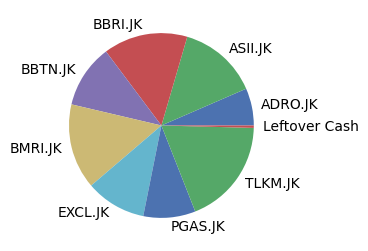

In [ ]:
# Portfolio composition black litterman
fig = plt.figure(figsize =(3, 3))
plt.pie(port4c_end['Total Asset Value'], labels = port4c_end['Asset Name'])
plt.show()

In [ ]:
port4c_end = port4c_end.append({'Asset Name': 'TOTAL', 'Quantity in MBU':"-",
               'Asset Price': "-", 'Total Asset Value': sum(port4c_end['Total Asset Value'])}
              ,ignore_index=True)
port4c_end # Black litterman

Asset Name Quantity in MBU Asset Price  Total Asset Value
0        ADRO.JK             215      330551           71068465
1        ASII.JK             259      587603          152189177
2        BBRI.JK             391      411208          160782328
3        BBTN.JK             838      144351          120966138
4        BMRI.JK             368      442418          162809824
5        EXCL.JK             472      244587          115445064
6        PGAS.JK             545      182500           99462500
7        TLKM.JK             459      442000          202878000
8  Leftover Cash         4505175           1            4505175
9          TOTAL               -           -         1090106671

In [ ]:
# If all assets were sold
print (f'Networth (Max Sharpe Ratio + Black Litterman): {np.float(networth4c)}')

Networth (Max Sharpe Ratio + Black Litterman): 1087393381.139601


In [ ]:
month_c.append(np.float(networth4c))

### 6th Month

In [ ]:
start_date = "2022-10-10"
finish_date = "2022-11-11"
data_stock_sim = yf.download(asset_stock, start=start_date, end=finish_date)
data_stock_sim.index = pd.to_datetime(data_stock_sim.index).date
data_asset_sim = pd.concat([data_stock_sim],axis=1,sort=False).reset_index()
data_asset_sim.rename(columns={'index':'Date'}, inplace=True)
data_asset_sim.index = data_asset_sim['Date']
price_asset_sim = data_asset_sim['Adj Close']
price_asset_sim = price_asset_sim.dropna()

buy_price4f = price_asset_sim.loc[price_asset_sim.index[0]]
sell_price4f = (pd.DataFrame(price_asset_sim.loc[price_asset_sim.index[len(price_asset_sim)-1]])).T
return_asset_4f = np.log(sell_price4f/buy_price4f)

[*********************100%***********************]  10 of 10 completed


In [ ]:
# Allocation for maximum sharpe ratio with black litterman allocation
dabl4c6 = DiscreteAllocation(weights_bl5, MBU*buy_price4f*(1+buy_fee), total_portfolio_value=np.float(networth4c))
allocbl4c6, leftoverbl4c6 = dabl4c6.greedy_portfolio()
print("Discrete allocation:", allocbl4c6)
print("Funds remaining: IDR{:.2f}".format(leftoverbl4c6))

Discrete allocation: {'TLKM.JK': 516, 'BBRI.JK': 352, 'BMRI.JK': 302, 'ASII.JK': 219, 'ADRO.JK': 363, 'BBTN.JK': 794, 'EXCL.JK': 466, 'PGAS.JK': 559}
Funds remaining: IDR51863.67


In [ ]:
portion4c6 = (pd.DataFrame.from_dict([allocbl4c6]).T).sort_index()
column4c6 = [(portion4c6.T).columns[i] for i in range (len(portion4c6))]
portion_money4c6 = (np.array(portion4c6)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustments4c_name = asset_stock
Adjustments4c_quant = []
initial_4c_name = np.array(portion4c5.index)
ending_4c_name = np.array(portion4c6.index)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_name[i] in ending_4c_name:
    index = int((np.where(ending_4c_name == Adjustments4c_name[i]))[0])
    Adjustments4c_quant.append(np.array(portion4c6).flatten()[index])
  else:
    Adjustments4c_quant.append(0)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_name[i] in initial_4c_name:
    index = int((np.where(initial_4c_name == Adjustments4c_name[i]))[0])
    Adjustments4c_quant[i] -= np.array(portion_money4c5).flatten()[index]

In [ ]:
buy_price4f = pd.DataFrame(buy_price4f).T

# Balance after selling assets (adjustments)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_quant[i] < 0:
    leftoverbl4c -= np.float((1-sell_fee)*MBU*Adjustments4c_quant[i]*(np.array(sell_price4e).reshape(-1,1))[i])
  elif Adjustments4c_quant[i] > 0:
    leftoverbl4c -= np.float((1+buy_fee)*MBU*Adjustments4c_quant[i]*(np.array(buy_price4f).reshape(-1,1))[i])

In [ ]:
networth4c, NAV4c = 0.0, 0.0
for i in range (len(column4c6)):
  NAV4c += MBU*(np.dot(sell_price4f[sell_price4f.columns[sell_price4f.columns.isin([column4c6[i]])]],portion_money4c6[i]))
  networth4c += (1-sell_fee)*MBU*(np.dot(sell_price4f[sell_price4f.columns[sell_price4f.columns.isin([column4c6[i]])]],portion_money4c6[i]))
leftoverbl4c = leftoverbl4c*(1+ir)**(ev_period/360)
NAV4c += leftoverbl4c
networth4c += leftoverbl4c
port4c = pd.DataFrame(portion_money4c6, columns=['Quantity in MBU'])
port4c.insert(0,'Asset Name',column4c6)
port4c = port4c.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':int(leftoverbl4c)}, ignore_index=True)
port4c.index = port4c.index+1

In [ ]:
ending_price4c = MBU*sell_price4f[sell_price4f.columns[sell_price4f.columns.isin(port4c['Asset Name'])]]
ending_price4c.index = ["Asset Price"]
ending_price4c = ending_price4c.T
ending_price4c.insert(0,'Asset Name',(ending_price4c.index).to_numpy())
ending_price4c = ending_price4c.append({'Asset Name':'Leftover Cash', 'Asset Price': 1}, ignore_index=True)
ending_price4c.index = [1+i for i in range (len(ending_price4c))]
port4c_end = []
for i in range (len(np.array(ending_price4c))):
  for j in range (len(np.array(port4c))):
    if (np.array(port4c))[j][0] == (np.array(ending_price4c))[i][0]:
      port4c_end.append(np.array(port4c)[j])
port4c_end = pd.DataFrame(port4c_end)
port4c_end = port4c_end.rename(columns={0:'Asset Name', 1:'Quantity in MBU'})
port4c_end.index = port4c_end.index + 1
port4c_end.insert(2, 'Asset Price', (ending_price4c['Asset Price'].to_numpy()).astype('i'))
port4c_end.insert(3, 'Total Asset Value', (port4c_end['Quantity in MBU']*port4c_end['Asset Price']).astype('i'))

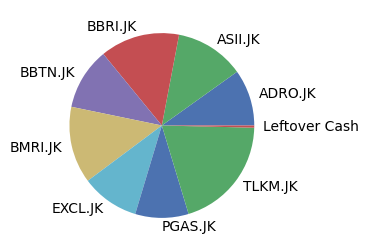

In [ ]:
# Portfolio composition black litterman
fig = plt.figure(figsize =(3, 3))
plt.pie(port4c_end['Total Asset Value'], labels = port4c_end['Asset Name'])
plt.show()

In [ ]:
port4c_end = port4c_end.append({'Asset Name': 'TOTAL', 'Quantity in MBU':"-",
               'Asset Price': "-", 'Total Asset Value': sum(port4c_end['Total Asset Value'])}
              ,ignore_index=True)
port4c_end # Black litterman

Asset Name Quantity in MBU Asset Price  Total Asset Value
0        ADRO.JK             363      293448          106521624
1        ASII.JK             219      597927          130946013
2        BBRI.JK             352      426263          150044576
3        BBTN.JK             794      147247          116914118
4        BMRI.JK             302      480475          145103450
5        EXCL.JK             466      234804          109418664
6        PGAS.JK             559      180000          100620000
7        TLKM.JK             516      417000          215172000
8  Leftover Cash         4101416           1            4101416
9          TOTAL               -           -         1078841861

In [ ]:
# If all assets were sold
print (f'Networth (Max Sharpe Ratio + Black Litterman): {np.float(networth4c)}')

Networth (Max Sharpe Ratio + Black Litterman): 1076156509.0689611


In [ ]:
month_c.append(np.float(networth4c))

### 7th Month

In [ ]:
start_date = "2022-11-10"
finish_date = "2022-12-11"
data_stock_sim = yf.download(asset_stock, start=start_date, end=finish_date)
data_stock_sim.index = pd.to_datetime(data_stock_sim.index).date
data_asset_sim = pd.concat([data_stock_sim],axis=1,sort=False).reset_index()
data_asset_sim.rename(columns={'index':'Date'}, inplace=True)
data_asset_sim.index = data_asset_sim['Date']
price_asset_sim = data_asset_sim['Adj Close']
price_asset_sim = price_asset_sim.dropna()

buy_price4g = price_asset_sim.loc[price_asset_sim.index[0]]
sell_price4g = (pd.DataFrame(price_asset_sim.loc[price_asset_sim.index[len(price_asset_sim)-1]])).T
return_asset_4g = np.log(sell_price4g/buy_price4g)

[*********************100%***********************]  10 of 10 completed


In [ ]:
# Allocation for maximum sharpe ratio with black litterman allocation
dabl4c7 = DiscreteAllocation(weights_bl6, MBU*buy_price4g*(1+buy_fee), total_portfolio_value=np.float(networth4c))
allocbl4c7, leftoverbl4c7 = dabl4c7.greedy_portfolio()
print("Discrete allocation:", allocbl4c7)
print("Funds remaining: IDR{:.2f}".format(leftoverbl4c7))

Discrete allocation: {'BBRI.JK': 442, 'ADRO.JK': 620, 'BMRI.JK': 364, 'BBTN.JK': 1174, 'PGAS.JK': 810, 'ASII.JK': 238, 'EXCL.JK': 291}
Funds remaining: IDR1151.84


In [ ]:
portion4c7 = (pd.DataFrame.from_dict([allocbl4c7]).T).sort_index()
column4c7 = [(portion4c7.T).columns[i] for i in range (len(portion4c7))]
portion_money4c7 = (np.array(portion4c7)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustments4c_name = asset_stock
Adjustments4c_quant = []
initial_4c_name = np.array(portion4c6.index)
ending_4c_name = np.array(portion4c7.index)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_name[i] in ending_4c_name:
    index = int((np.where(ending_4c_name == Adjustments4c_name[i]))[0])
    Adjustments4c_quant.append(np.array(portion4c7).flatten()[index])
  else:
    Adjustments4c_quant.append(0)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_name[i] in initial_4c_name:
    index = int((np.where(initial_4c_name == Adjustments4c_name[i]))[0])
    Adjustments4c_quant[i] -= np.array(portion_money4c6).flatten()[index]

In [ ]:
buy_price4g = pd.DataFrame(buy_price4g).T

# Balance after selling assets (adjustments)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_quant[i] < 0:
    leftoverbl4c -= np.float((1-sell_fee)*MBU*Adjustments4c_quant[i]*(np.array(sell_price4f).reshape(-1,1))[i])
  elif Adjustments4c_quant[i] > 0:
    leftoverbl4c -= np.float((1+buy_fee)*MBU*Adjustments4c_quant[i]*(np.array(buy_price4g).reshape(-1,1))[i])

In [ ]:
networth4c, NAV4c = 0.0, 0.0
for i in range (len(column4c7)):
  NAV4c += MBU*(np.dot(sell_price4g[sell_price4g.columns[sell_price4g.columns.isin([column4c7[i]])]],portion_money4c7[i]))
  networth4c += (1-sell_fee)*MBU*(np.dot(sell_price4g[sell_price4g.columns[sell_price4g.columns.isin([column4c7[i]])]],portion_money4c7[i]))
leftoverbl4c = leftoverbl4c*(1+ir)**(ev_period/360)
NAV4c += leftoverbl4c
networth4c += leftoverbl4c
port4c = pd.DataFrame(portion_money4c7, columns=['Quantity in MBU'])
port4c.insert(0,'Asset Name',column4c7)
port4c = port4c.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':int(leftoverbl4c)}, ignore_index=True)
port4c.index = port4c.index+1

In [ ]:
ending_price4c = MBU*sell_price4g[sell_price4g.columns[sell_price4g.columns.isin(port4c['Asset Name'])]]
ending_price4c.index = ["Asset Price"]
ending_price4c = ending_price4c.T
ending_price4c.insert(0,'Asset Name',(ending_price4c.index).to_numpy())
ending_price4c = ending_price4c.append({'Asset Name':'Leftover Cash', 'Asset Price': 1}, ignore_index=True)
ending_price4c.index = [1+i for i in range (len(ending_price4c))]
port4c_end = []
for i in range (len(np.array(ending_price4c))):
  for j in range (len(np.array(port4c))):
    if (np.array(port4c))[j][0] == (np.array(ending_price4c))[i][0]:
      port4c_end.append(np.array(port4c)[j])
port4c_end = pd.DataFrame(port4c_end)
port4c_end = port4c_end.rename(columns={0:'Asset Name', 1:'Quantity in MBU'})
port4c_end.index = port4c_end.index + 1
port4c_end.insert(2, 'Asset Price', (ending_price4c['Asset Price'].to_numpy()).astype('i'))
port4c_end.insert(3, 'Total Asset Value', (port4c_end['Quantity in MBU']*port4c_end['Asset Price']).astype('i'))

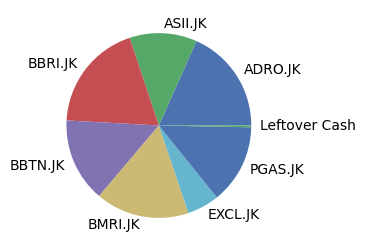

In [ ]:
# Portfolio composition black litterman
fig = plt.figure(figsize =(3, 3))
plt.pie(port4c_end['Total Asset Value'], labels = port4c_end['Asset Name'])
plt.show()

In [ ]:
port4c_end = port4c_end.append({'Asset Name': 'TOTAL', 'Quantity in MBU':"-",
               'Asset Price': "-", 'Total Asset Value': sum(port4c_end['Total Asset Value'])}
              ,ignore_index=True)
port4c_end # Black litterman

Asset Name Quantity in MBU Asset Price  Total Asset Value
0        ADRO.JK             620      310313          192394060
1        ASII.JK             238      520036          123768568
2        BBRI.JK             442      451670          199638140
3        BBTN.JK            1174      131316          154164984
4        BMRI.JK             364      472150          171862600
5        EXCL.JK             291      202518           58932738
6        PGAS.JK             810      180000          145800000
7  Leftover Cash         3285790           1            3285790
8          TOTAL               -           -         1049846880

In [ ]:
# If all assets were sold
print (f'Networth (Max Sharpe Ratio + Black Litterman): {np.float(networth4c)}')

Networth (Max Sharpe Ratio + Black Litterman): 1047231428.8835547


In [ ]:
month_c.append(np.float(networth4c))

### 8th Month

In [ ]:
start_date = "2022-12-10"
finish_date = "2023-01-11"
data_stock_sim = yf.download(asset_stock, start=start_date, end=finish_date)
data_stock_sim.index = pd.to_datetime(data_stock_sim.index).date
data_asset_sim = pd.concat([data_stock_sim],axis=1,sort=False).reset_index()
data_asset_sim.rename(columns={'index':'Date'}, inplace=True)
data_asset_sim.index = data_asset_sim['Date']
price_asset_sim = data_asset_sim['Adj Close']
price_asset_sim = price_asset_sim.dropna()

buy_price4h = price_asset_sim.loc[price_asset_sim.index[0]]
sell_price4h = (pd.DataFrame(price_asset_sim.loc[price_asset_sim.index[len(price_asset_sim)-1]])).T
return_asset_4h = np.log(sell_price4h/buy_price4h)

[*********************100%***********************]  10 of 10 completed


In [ ]:
# Allocation for maximum sharpe ratio with black litterman allocation
dabl4c8 = DiscreteAllocation(weights_bl7, MBU*buy_price4h*(1+buy_fee), total_portfolio_value=np.float(networth4c))
allocbl4c8, leftoverbl4c8 = dabl4c8.greedy_portfolio()
print("Discrete allocation:", allocbl4c8)
print("Funds remaining: IDR{:.2f}".format(leftoverbl4c8))

Discrete allocation: {'BBRI.JK': 1132, 'BMRI.JK': 531, 'TLKM.JK': 375, 'ASII.JK': 241, 'ADRO.JK': 41, 'PGAS.JK': 2}
Funds remaining: IDR121535.87


In [ ]:
portion4c8 = (pd.DataFrame.from_dict([allocbl4c8]).T).sort_index()
column4c8 = [(portion4c8.T).columns[i] for i in range (len(portion4c8))]
portion_money4c8 = (np.array(portion4c8)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustments4c_name = asset_stock
Adjustments4c_quant = []
initial_4c_name = np.array(portion4c7.index)
ending_4c_name = np.array(portion4c8.index)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_name[i] in ending_4c_name:
    index = int((np.where(ending_4c_name == Adjustments4c_name[i]))[0])
    Adjustments4c_quant.append(np.array(portion4c8).flatten()[index])
  else:
    Adjustments4c_quant.append(0)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_name[i] in initial_4c_name:
    index = int((np.where(initial_4c_name == Adjustments4c_name[i]))[0])
    Adjustments4c_quant[i] -= np.array(portion_money4c7).flatten()[index]

In [ ]:
buy_price4h = pd.DataFrame(buy_price4h).T

# Balance after selling assets (adjustments)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_quant[i] < 0:
    leftoverbl4c -= np.float((1-sell_fee)*MBU*Adjustments4c_quant[i]*(np.array(sell_price4g).reshape(-1,1))[i])
  elif Adjustments4c_quant[i] > 0:
    leftoverbl4c -= np.float((1+buy_fee)*MBU*Adjustments4c_quant[i]*(np.array(buy_price4h).reshape(-1,1))[i])

In [ ]:
networth4c, NAV4c = 0.0, 0.0
for i in range (len(column4c8)):
  NAV4c += MBU*(np.dot(sell_price4h[sell_price4h.columns[sell_price4h.columns.isin([column4c8[i]])]],portion_money4c8[i]))
  networth4c += (1-sell_fee)*MBU*(np.dot(sell_price4h[sell_price4h.columns[sell_price4h.columns.isin([column4c8[i]])]],portion_money4c8[i]))
leftoverbl4c = leftoverbl4c*(1+ir)**(ev_period/360)
NAV4c += leftoverbl4c
networth4c += leftoverbl4c
port4c = pd.DataFrame(portion_money4c8, columns=['Quantity in MBU'])
port4c.insert(0,'Asset Name',column4c8)
port4c = port4c.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':int(leftoverbl4c)}, ignore_index=True)
port4c.index = port4c.index+1

In [ ]:
ending_price4c = MBU*sell_price4h[sell_price4h.columns[sell_price4h.columns.isin(port4c['Asset Name'])]]
ending_price4c.index = ["Asset Price"]
ending_price4c = ending_price4c.T
ending_price4c.insert(0,'Asset Name',(ending_price4c.index).to_numpy())
ending_price4c = ending_price4c.append({'Asset Name':'Leftover Cash', 'Asset Price': 1}, ignore_index=True)
ending_price4c.index = [1+i for i in range (len(ending_price4c))]
port4c_end = []
for i in range (len(np.array(ending_price4c))):
  for j in range (len(np.array(port4c))):
    if (np.array(port4c))[j][0] == (np.array(ending_price4c))[i][0]:
      port4c_end.append(np.array(port4c)[j])
port4c_end = pd.DataFrame(port4c_end)
port4c_end = port4c_end.rename(columns={0:'Asset Name', 1:'Quantity in MBU'})
port4c_end.index = port4c_end.index + 1
port4c_end.insert(2, 'Asset Price', (ending_price4c['Asset Price'].to_numpy()).astype('i'))
port4c_end.insert(3, 'Total Asset Value', (port4c_end['Quantity in MBU']*port4c_end['Asset Price']).astype('i'))

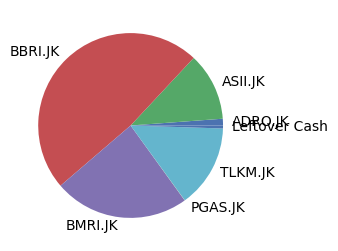

In [ ]:
# Portfolio composition black litterman
fig = plt.figure(figsize =(3, 3))
plt.pie(port4c_end['Total Asset Value'], labels = port4c_end['Asset Name'])
plt.show()

In [ ]:
port4c_end = port4c_end.append({'Asset Name': 'TOTAL', 'Quantity in MBU':"-",
               'Asset Price': "-", 'Total Asset Value': sum(port4c_end['Total Asset Value'])}
              ,ignore_index=True)
port4c_end # Black litterman

Asset Name Quantity in MBU Asset Price  Total Asset Value
0        ADRO.JK              41      283266           11613906
1        ASII.JK             241      487963          117599083
2        BBRI.JK            1132      422095          477811540
3        BMRI.JK             531      441228          234292068
4        PGAS.JK               2      157000             314000
5        TLKM.JK             375      383000          143625000
6  Leftover Cash         5108354           1            5108354
7          TOTAL               -           -          990363951

In [ ]:
# If all assets were sold
print (f'Networth (Max Sharpe Ratio + Black Litterman): {np.float(networth4c)}')

Networth (Max Sharpe Ratio + Black Litterman): 987902247.3902354


In [ ]:
month_c.append(np.float(networth4c))

### 9th Month

In [ ]:
start_date = "2023-01-10"
finish_date = "2023-02-11"
data_stock_sim = yf.download(asset_stock, start=start_date, end=finish_date)
data_stock_sim.index = pd.to_datetime(data_stock_sim.index).date
data_asset_sim = pd.concat([data_stock_sim],axis=1,sort=False).reset_index()
data_asset_sim.rename(columns={'index':'Date'}, inplace=True)
data_asset_sim.index = data_asset_sim['Date']
price_asset_sim = data_asset_sim['Adj Close']
price_asset_sim = price_asset_sim.dropna()

buy_price4i = price_asset_sim.loc[price_asset_sim.index[0]]
sell_price4i = (pd.DataFrame(price_asset_sim.loc[price_asset_sim.index[len(price_asset_sim)-1]])).T
return_asset_4i = np.log(sell_price4i/buy_price4i)

[*********************100%***********************]  10 of 10 completed


In [ ]:
# Allocation for maximum sharpe ratio with black litterman allocation
dabl4c9 = DiscreteAllocation(weights_bl8, MBU*buy_price4i*(1+buy_fee), total_portfolio_value=np.float(networth4c))
allocbl4c9, leftoverbl4c9 = dabl4c9.greedy_portfolio()
print("Discrete allocation:", allocbl4c9)
print("Funds remaining: IDR{:.2f}".format(leftoverbl4c9))

Discrete allocation: {'BBRI.JK': 1279, 'TLKM.JK': 639, 'BMRI.JK': 457}
Funds remaining: IDR183874.42


In [ ]:
portion4c9 = (pd.DataFrame.from_dict([allocbl4c9]).T).sort_index()
column4c9 = [(portion4c9.T).columns[i] for i in range (len(portion4c9))]
portion_money4c9 = (np.array(portion4c9)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustments4c_name = asset_stock
Adjustments4c_quant = []
initial_4c_name = np.array(portion4c8.index)
ending_4c_name = np.array(portion4c9.index)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_name[i] in ending_4c_name:
    index = int((np.where(ending_4c_name == Adjustments4c_name[i]))[0])
    Adjustments4c_quant.append(np.array(portion4c9).flatten()[index])
  else:
    Adjustments4c_quant.append(0)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_name[i] in initial_4c_name:
    index = int((np.where(initial_4c_name == Adjustments4c_name[i]))[0])
    Adjustments4c_quant[i] -= np.array(portion_money4c8).flatten()[index]

In [ ]:
buy_price4i = pd.DataFrame(buy_price4i).T

# Balance after selling assets (adjustments)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_quant[i] < 0:
    leftoverbl4c -= np.float((1-sell_fee)*MBU*Adjustments4c_quant[i]*(np.array(sell_price4h).reshape(-1,1))[i])
  elif Adjustments4c_quant[i] > 0:
    leftoverbl4c -= np.float((1+buy_fee)*MBU*Adjustments4c_quant[i]*(np.array(buy_price4i).reshape(-1,1))[i])

In [ ]:
networth4c, NAV4c = 0.0, 0.0
for i in range (len(column4c9)):
  NAV4c += MBU*(np.dot(sell_price4i[sell_price4i.columns[sell_price4i.columns.isin([column4c9[i]])]],portion_money4c9[i]))
  networth4c += (1-sell_fee)*MBU*(np.dot(sell_price4i[sell_price4i.columns[sell_price4i.columns.isin([column4c9[i]])]],portion_money4c9[i]))
leftoverbl4c = leftoverbl4c*(1+ir)**(ev_period/360)
NAV4c += leftoverbl4c
networth4c += leftoverbl4c
port4c = pd.DataFrame(portion_money4c9, columns=['Quantity in MBU'])
port4c.insert(0,'Asset Name',column4c9)
port4c = port4c.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':int(leftoverbl4c)}, ignore_index=True)
port4c.index = port4c.index+1

In [ ]:
ending_price4c = MBU*sell_price4i[sell_price4i.columns[sell_price4i.columns.isin(port4c['Asset Name'])]]
ending_price4c.index = ["Asset Price"]
ending_price4c = ending_price4c.T
ending_price4c.insert(0,'Asset Name',(ending_price4c.index).to_numpy())
ending_price4c = ending_price4c.append({'Asset Name':'Leftover Cash', 'Asset Price': 1}, ignore_index=True)
ending_price4c.index = [1+i for i in range (len(ending_price4c))]
port4c_end = []
for i in range (len(np.array(ending_price4c))):
  for j in range (len(np.array(port4c))):
    if (np.array(port4c))[j][0] == (np.array(ending_price4c))[i][0]:
      port4c_end.append(np.array(port4c)[j])
port4c_end = pd.DataFrame(port4c_end)
port4c_end = port4c_end.rename(columns={0:'Asset Name', 1:'Quantity in MBU'})
port4c_end.index = port4c_end.index + 1
port4c_end.insert(2, 'Asset Price', (ending_price4c['Asset Price'].to_numpy()).astype('i'))
port4c_end.insert(3, 'Total Asset Value', (port4c_end['Quantity in MBU']*port4c_end['Asset Price']).astype('i'))

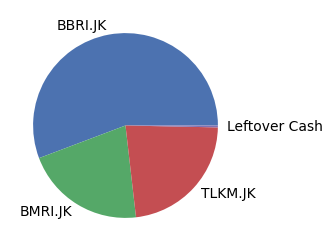

In [ ]:
# Portfolio composition black litterman
fig = plt.figure(figsize =(3, 3))
plt.pie(port4c_end['Total Asset Value'], labels = port4c_end['Asset Name'])
plt.show()

In [ ]:
port4c_end = port4c_end.append({'Asset Name': 'TOTAL', 'Quantity in MBU':"-",
               'Asset Price': "-", 'Total Asset Value': sum(port4c_end['Total Asset Value'])}
              ,ignore_index=True)
port4c_end # Black litterman

Asset Name Quantity in MBU Asset Price  Total Asset Value
0        BBRI.JK            1279      463066          592261414
1        BMRI.JK             457      489990          223925430
2        TLKM.JK             639      380000          242820000
3  Leftover Cash         3487570           1            3487570
4          TOTAL               -           -         1062494414

In [ ]:
# If all assets were sold
print (f'Networth (Max Sharpe Ratio + Black Litterman): {np.float(networth4c)}')

Networth (Max Sharpe Ratio + Black Litterman): 1059847682.5138284


In [ ]:
month_c.append(np.float(networth4c))

### 10th Month

In [ ]:
start_date = "2023-02-10"
finish_date = "2023-03-11"
data_stock_sim = yf.download(asset_stock, start=start_date, end=finish_date)
data_stock_sim.index = pd.to_datetime(data_stock_sim.index).date
data_asset_sim = pd.concat([data_stock_sim],axis=1,sort=False).reset_index()
data_asset_sim.rename(columns={'index':'Date'}, inplace=True)
data_asset_sim.index = data_asset_sim['Date']
price_asset_sim = data_asset_sim['Adj Close']
price_asset_sim = price_asset_sim.dropna()

buy_price4j = price_asset_sim.loc[price_asset_sim.index[0]]
sell_price4j = (pd.DataFrame(price_asset_sim.loc[price_asset_sim.index[len(price_asset_sim)-1]])).T
return_asset_4j = np.log(sell_price4j/buy_price4j)

[*********************100%***********************]  10 of 10 completed


In [ ]:
# Allocation for maximum sharpe ratio with black litterman allocation
dabl4c10 = DiscreteAllocation(weights_bl9, MBU*buy_price4j*(1+buy_fee), total_portfolio_value=np.float(networth4c))
allocbl4c10, leftoverbl4c10 = dabl4c10.greedy_portfolio()
print("Discrete allocation:", allocbl4c10)
print("Funds remaining: IDR{:.2f}".format(leftoverbl4c10))

Discrete allocation: {'BBRI.JK': 1106, 'BMRI.JK': 527, 'TLKM.JK': 513, 'ASII.JK': 177}
Funds remaining: IDR492686.88


In [ ]:
portion4c10 = (pd.DataFrame.from_dict([allocbl4c10]).T).sort_index()
column4c10 = [(portion4c10.T).columns[i] for i in range (len(portion4c10))]
portion_money4c10 = (np.array(portion4c10)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustments4c_name = asset_stock
Adjustments4c_quant = []
initial_4c_name = np.array(portion4c9.index)
ending_4c_name = np.array(portion4c10.index)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_name[i] in ending_4c_name:
    index = int((np.where(ending_4c_name == Adjustments4c_name[i]))[0])
    Adjustments4c_quant.append(np.array(portion4c10).flatten()[index])
  else:
    Adjustments4c_quant.append(0)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_name[i] in initial_4c_name:
    index = int((np.where(initial_4c_name == Adjustments4c_name[i]))[0])
    Adjustments4c_quant[i] -= np.array(portion_money4c9).flatten()[index]

In [ ]:
buy_price4j = pd.DataFrame(buy_price4j).T

# Balance after selling assets (adjustments)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_quant[i] < 0:
    leftoverbl4c -= np.float((1-sell_fee)*MBU*Adjustments4c_quant[i]*(np.array(sell_price4i).reshape(-1,1))[i])
  elif Adjustments4c_quant[i] > 0:
    leftoverbl4c -= np.float((1+buy_fee)*MBU*Adjustments4c_quant[i]*(np.array(buy_price4j).reshape(-1,1))[i])

In [ ]:
networth4c, NAV4c = 0.0, 0.0
for i in range (len(column4c10)):
  NAV4c += MBU*(np.dot(sell_price4j[sell_price4j.columns[sell_price4j.columns.isin([column4c10[i]])]],portion_money4c10[i]))
  networth4c += (1-sell_fee)*MBU*(np.dot(sell_price4j[sell_price4j.columns[sell_price4j.columns.isin([column4c10[i]])]],portion_money4c10[i]))
leftoverbl4c = leftoverbl4c*(1+ir)**(ev_period/360)
NAV4c += leftoverbl4c
networth4c += leftoverbl4c
port4c = pd.DataFrame(portion_money4c10, columns=['Quantity in MBU'])
port4c.insert(0,'Asset Name',column4c10)
port4c = port4c.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':int(leftoverbl4c)}, ignore_index=True)
port4c.index = port4c.index+1

In [ ]:
ending_price4c = MBU*sell_price4j[sell_price4j.columns[sell_price4j.columns.isin(port4c['Asset Name'])]]
ending_price4c.index = ["Asset Price"]
ending_price4c = ending_price4c.T
ending_price4c.insert(0,'Asset Name',(ending_price4c.index).to_numpy())
ending_price4c = ending_price4c.append({'Asset Name':'Leftover Cash', 'Asset Price': 1}, ignore_index=True)
ending_price4c.index = [1+i for i in range (len(ending_price4c))]
port4c_end = []
for i in range (len(np.array(ending_price4c))):
  for j in range (len(np.array(port4c))):
    if (np.array(port4c))[j][0] == (np.array(ending_price4c))[i][0]:
      port4c_end.append(np.array(port4c)[j])
port4c_end = pd.DataFrame(port4c_end)
port4c_end = port4c_end.rename(columns={0:'Asset Name', 1:'Quantity in MBU'})
port4c_end.index = port4c_end.index + 1
port4c_end.insert(2, 'Asset Price', (ending_price4c['Asset Price'].to_numpy()).astype('i'))
port4c_end.insert(3, 'Total Asset Value', (port4c_end['Quantity in MBU']*port4c_end['Asset Price']).astype('i'))

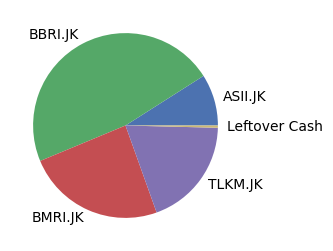

In [ ]:
# Portfolio composition black litterman
fig = plt.figure(figsize =(3, 3))
plt.pie(port4c_end['Total Asset Value'], labels = port4c_end['Asset Name'])
plt.show()

In [ ]:
port4c_end = port4c_end.append({'Asset Name': 'TOTAL', 'Quantity in MBU':"-",
               'Asset Price': "-", 'Total Asset Value': sum(port4c_end['Total Asset Value'])}
              ,ignore_index=True)
port4c_end # Black litterman

Asset Name Quantity in MBU Asset Price  Total Asset Value
0        ASII.JK             177      547527           96912279
1        BBRI.JK            1106      459255          507936030
2        BMRI.JK             527      493557          260104539
3        TLKM.JK             513      401000          205713000
4  Leftover Cash         4230559           1            4230559
5          TOTAL               -           -         1074896407

In [ ]:
# If all assets were sold
print (f'Networth (Max Sharpe Ratio + Black Litterman): {np.float(networth4c)}')

Networth (Max Sharpe Ratio + Black Litterman): 1072220708.8558708


In [ ]:
month_c.append(np.float(networth4c))

### 11th Month

In [ ]:
start_date = "2023-03-10"
finish_date = "2023-04-11"
data_stock_sim = yf.download(asset_stock, start=start_date, end=finish_date)
data_stock_sim.index = pd.to_datetime(data_stock_sim.index).date
data_asset_sim = pd.concat([data_stock_sim],axis=1,sort=False).reset_index()
data_asset_sim.rename(columns={'index':'Date'}, inplace=True)
data_asset_sim.index = data_asset_sim['Date']
price_asset_sim = data_asset_sim['Adj Close']
price_asset_sim = price_asset_sim.dropna()

buy_price4k = price_asset_sim.loc[price_asset_sim.index[0]]
sell_price4k = (pd.DataFrame(price_asset_sim.loc[price_asset_sim.index[len(price_asset_sim)-1]])).T
return_asset_4k = np.log(sell_price4k/buy_price4k)

[*********************100%***********************]  10 of 10 completed


In [ ]:
# Allocation for maximum sharpe ratio with black litterman allocation
dabl4c11 = DiscreteAllocation(weights_bl10, MBU*buy_price4k*(1+buy_fee), total_portfolio_value=np.float(networth4c))
allocbl4c11, leftoverbl4c11 = dabl4c11.greedy_portfolio()
print("Discrete allocation:", allocbl4c11)
print("Funds remaining: IDR{:.2f}".format(leftoverbl4c11))

Discrete allocation: {'BBRI.JK': 910, 'TLKM.JK': 745, 'BMRI.JK': 452, 'ASII.JK': 239}
Funds remaining: IDR178.30


In [ ]:
portion4c11 = (pd.DataFrame.from_dict([allocbl4c11]).T).sort_index()
column4c11 = [(portion4c11.T).columns[i] for i in range (len(portion4c11))]
portion_money4c11 = (np.array(portion4c11)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustments4c_name = asset_stock
Adjustments4c_quant = []
initial_4c_name = np.array(portion4c10.index)
ending_4c_name = np.array(portion4c11.index)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_name[i] in ending_4c_name:
    index = int((np.where(ending_4c_name == Adjustments4c_name[i]))[0])
    Adjustments4c_quant.append(np.array(portion4c11).flatten()[index])
  else:
    Adjustments4c_quant.append(0)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_name[i] in initial_4c_name:
    index = int((np.where(initial_4c_name == Adjustments4c_name[i]))[0])
    Adjustments4c_quant[i] -= np.array(portion_money4c10).flatten()[index]

In [ ]:
buy_price4k = pd.DataFrame(buy_price4k).T

# Balance after selling assets (adjustments)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_quant[i] < 0:
    leftoverbl4c -= np.float((1-sell_fee)*MBU*Adjustments4c_quant[i]*(np.array(sell_price4j).reshape(-1,1))[i])
  elif Adjustments4c_quant[i] > 0:
    leftoverbl4c -= np.float((1+buy_fee)*MBU*Adjustments4c_quant[i]*(np.array(buy_price4k).reshape(-1,1))[i])

In [ ]:
networth4c, NAV4c = 0.0, 0.0
for i in range (len(column4c11)):
  NAV4c += MBU*(np.dot(sell_price4k[sell_price4k.columns[sell_price4k.columns.isin([column4c11[i]])]],portion_money4c11[i]))
  networth4c += (1-sell_fee)*MBU*(np.dot(sell_price4k[sell_price4k.columns[sell_price4k.columns.isin([column4c11[i]])]],portion_money4c11[i]))
leftoverbl4c = leftoverbl4c*(1+ir)**(ev_period/360)
NAV4c += leftoverbl4c
networth4c += leftoverbl4c
port4c = pd.DataFrame(portion_money4c11, columns=['Quantity in MBU'])
port4c.insert(0,'Asset Name',column4c11)
port4c = port4c.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':int(leftoverbl4c)}, ignore_index=True)
port4c.index = port4c.index+1

In [ ]:
ending_price4c = MBU*sell_price4k[sell_price4k.columns[sell_price4k.columns.isin(port4c['Asset Name'])]]
ending_price4c.index = ["Asset Price"]
ending_price4c = ending_price4c.T
ending_price4c.insert(0,'Asset Name',(ending_price4c.index).to_numpy())
ending_price4c = ending_price4c.append({'Asset Name':'Leftover Cash', 'Asset Price': 1}, ignore_index=True)
ending_price4c.index = [1+i for i in range (len(ending_price4c))]
port4c_end = []
for i in range (len(np.array(ending_price4c))):
  for j in range (len(np.array(port4c))):
    if (np.array(port4c))[j][0] == (np.array(ending_price4c))[i][0]:
      port4c_end.append(np.array(port4c)[j])
port4c_end = pd.DataFrame(port4c_end)
port4c_end = port4c_end.rename(columns={0:'Asset Name', 1:'Quantity in MBU'})
port4c_end.index = port4c_end.index + 1
port4c_end.insert(2, 'Asset Price', (ending_price4c['Asset Price'].to_numpy()).astype('i'))
port4c_end.insert(3, 'Total Asset Value', (port4c_end['Quantity in MBU']*port4c_end['Asset Price']).astype('i'))

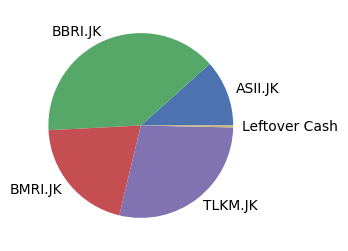

In [ ]:
# Portfolio composition black litterman
fig = plt.figure(figsize =(3, 3))
plt.pie(port4c_end['Total Asset Value'], labels = port4c_end['Asset Name'])
plt.show()

In [ ]:
port4c_end = port4c_end.append({'Asset Name': 'TOTAL', 'Quantity in MBU':"-",
               'Asset Price': "-", 'Total Asset Value': sum(port4c_end['Total Asset Value'])}
              ,ignore_index=True)
port4c_end # Black litterman

Asset Name Quantity in MBU Asset Price  Total Asset Value
0        ASII.JK             239      547527          130858953
1        BBRI.JK             910      486000          442260000
2        BMRI.JK             452      510000          230520000
3        TLKM.JK             745      430000          320350000
4  Leftover Cash         3787079           1            3787079
5          TOTAL               -           -         1127776032

In [ ]:
# If all assets were sold
print (f'Networth (Max Sharpe Ratio + Black Litterman): {np.float(networth4c)}')

Networth (Max Sharpe Ratio + Black Litterman): 1124966130.3508368


In [ ]:
month_c.append(np.float(networth4c))

### 12th Month

In [ ]:
start_date = "2023-04-10"
finish_date = "2023-05-11"
data_stock_sim = yf.download(asset_stock, start=start_date, end=finish_date)
data_stock_sim.index = pd.to_datetime(data_stock_sim.index).date
data_asset_sim = pd.concat([data_stock_sim],axis=1,sort=False).reset_index()
data_asset_sim.rename(columns={'index':'Date'}, inplace=True)
data_asset_sim.index = data_asset_sim['Date']
price_asset_sim = data_asset_sim['Adj Close']
price_asset_sim = price_asset_sim.dropna()

buy_price4l = price_asset_sim.loc[price_asset_sim.index[0]]
sell_price4l = (pd.DataFrame(price_asset_sim.loc[price_asset_sim.index[len(price_asset_sim)-1]])).T
return_asset_4l = np.log(sell_price4l/buy_price4l)

[*********************100%***********************]  10 of 10 completed


In [ ]:
# Allocation for maximum sharpe ratio with black litterman allocation
dabl4c12 = DiscreteAllocation(weights_bl11, MBU*buy_price4l*(1+buy_fee), total_portfolio_value=np.float(networth4c))
allocbl4c12, leftoverbl4c12 = dabl4c12.greedy_portfolio()
print("Discrete allocation:", allocbl4c12)
print("Funds remaining: IDR{:.2f}".format(leftoverbl4c12))

Discrete allocation: {'BBRI.JK': 1149, 'BMRI.JK': 512, 'TLKM.JK': 441, 'ASII.JK': 208}
Funds remaining: IDR231878.49


In [ ]:
portion4c12 = (pd.DataFrame.from_dict([allocbl4c12]).T).sort_index()
column4c12 = [(portion4c12.T).columns[i] for i in range (len(portion4c12))]
portion_money4c12 = (np.array(portion4c12)).reshape(-1,1)

In [ ]:
# Adjustments
Adjustments4c_name = asset_stock
Adjustments4c_quant = []
initial_4c_name = np.array(portion4c11.index)
ending_4c_name = np.array(portion4c12.index)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_name[i] in ending_4c_name:
    index = int((np.where(ending_4c_name == Adjustments4c_name[i]))[0])
    Adjustments4c_quant.append(np.array(portion4c12).flatten()[index])
  else:
    Adjustments4c_quant.append(0)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_name[i] in initial_4c_name:
    index = int((np.where(initial_4c_name == Adjustments4c_name[i]))[0])
    Adjustments4c_quant[i] -= np.array(portion_money4c11).flatten()[index]

In [ ]:
buy_price4l = pd.DataFrame(buy_price4l).T

# Balance after selling assets (adjustments)
for i in range (len(Adjustments4c_name)):
  if Adjustments4c_quant[i] < 0:
    leftoverbl4c -= np.float((1-sell_fee)*MBU*Adjustments4c_quant[i]*(np.array(sell_price4k).reshape(-1,1))[i])
  elif Adjustments4c_quant[i] > 0:
    leftoverbl4c -= np.float((1+buy_fee)*MBU*Adjustments4c_quant[i]*(np.array(buy_price4l).reshape(-1,1))[i])

In [ ]:
networth4c, NAV4c = 0.0, 0.0
for i in range (len(column4c12)):
  NAV4c += MBU*(np.dot(sell_price4l[sell_price4l.columns[sell_price4l.columns.isin([column4c12[i]])]],portion_money4c12[i]))
  networth4c += (1-sell_fee)*MBU*(np.dot(sell_price4l[sell_price4l.columns[sell_price4l.columns.isin([column4c12[i]])]],portion_money4c12[i]))
leftoverbl4c = leftoverbl4c*(1+ir)**(ev_period/360)
NAV4c += leftoverbl4c
networth4c += leftoverbl4c
port4c = pd.DataFrame(portion_money4c12, columns=['Quantity in MBU'])
port4c.insert(0,'Asset Name',column4c12)
port4c = port4c.append({'Asset Name':'Leftover Cash', 'Quantity in MBU':int(leftoverbl4c)}, ignore_index=True)
port4c.index = port4c.index+1

In [ ]:
ending_price4c = MBU*sell_price4l[sell_price4l.columns[sell_price4l.columns.isin(port4c['Asset Name'])]]
ending_price4c.index = ["Asset Price"]
ending_price4c = ending_price4c.T
ending_price4c.insert(0,'Asset Name',(ending_price4c.index).to_numpy())
ending_price4c = ending_price4c.append({'Asset Name':'Leftover Cash', 'Asset Price': 1}, ignore_index=True)
ending_price4c.index = [1+i for i in range (len(ending_price4c))]
port4c_end = []
for i in range (len(np.array(ending_price4c))):
  for j in range (len(np.array(port4c))):
    if (np.array(port4c))[j][0] == (np.array(ending_price4c))[i][0]:
      port4c_end.append(np.array(port4c)[j])
port4c_end = pd.DataFrame(port4c_end)
port4c_end = port4c_end.rename(columns={0:'Asset Name', 1:'Quantity in MBU'})
port4c_end.index = port4c_end.index + 1
port4c_end.insert(2, 'Asset Price', (ending_price4c['Asset Price'].to_numpy()).astype('i'))
port4c_end.insert(3, 'Total Asset Value', (port4c_end['Quantity in MBU']*port4c_end['Asset Price']).astype('i'))

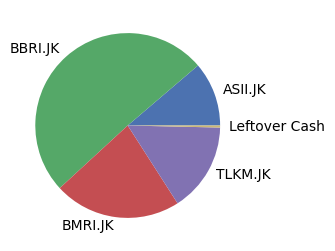

In [ ]:
# Portfolio composition black litterman
fig = plt.figure(figsize =(3, 3))
plt.pie(port4c_end['Total Asset Value'], labels = port4c_end['Asset Name'])
plt.show()

In [ ]:
port4c_end = port4c_end.append({'Asset Name': 'TOTAL', 'Quantity in MBU':"-",
               'Asset Price': "-", 'Total Asset Value': sum(port4c_end['Total Asset Value'])}
              ,ignore_index=True)
port4c_end # Black litterman

Asset Name Quantity in MBU Asset Price  Total Asset Value
0        ASII.JK             208      632500          131560000
1        BBRI.JK            1149      515000          591735000
2        BMRI.JK             512      507500          259840000
3        TLKM.JK             441      413000          182133000
4  Leftover Cash         4150604           1            4150604
5          TOTAL               -           -         1169418604

In [ ]:
# If all assets were sold
print (f'Networth (Max Sharpe Ratio + Black Litterman): {np.float(networth4c)}')

Networth (Max Sharpe Ratio + Black Litterman): 1166505434.8622794


In [ ]:
month_c.append(np.float(networth4c))

## Stocks Results

In [ ]:
annual_period = [0,12]
semiannual_period = [0,6,12]
quarter_period = [0,3,6,9,12]
month_period = [0,1,2,3,4,5,6,7,8,9,10,11,12]

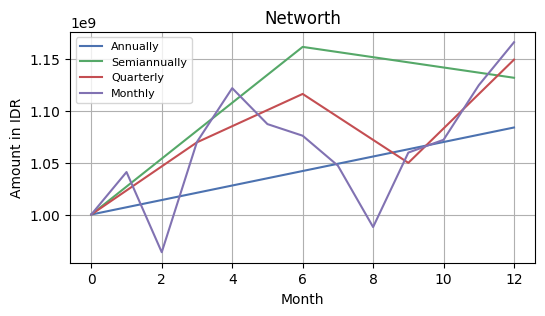

In [ ]:
# Plot annually
plt.figure(figsize=(6,3))
plt.plot(annual_period, annual_c, label='Annually')
plt.plot(semiannual_period, semiannual_c, label='Semiannually')
plt.plot(quarter_period, quarter_c, label='Quarterly')
plt.plot(month_period, month_c, label='Monthly')
plt.title('Networth', fontsize=12)
plt.xlabel('Month',fontsize=10)
plt.ylabel('Amount in IDR',fontsize=10)
plt.legend(loc='upper left', fontsize=8)
plt.grid()
plt.show()

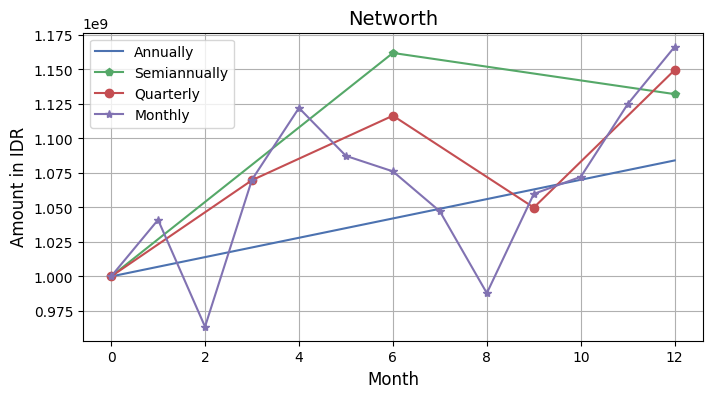

In [ ]:
# Plot annually
plt.figure(figsize=(8,4))
plt.plot(annual_period, annual_c, label='Annually')
plt.plot(semiannual_period, semiannual_c, '-p', label='Semiannually')
plt.plot(quarter_period, quarter_c, '-o', label='Quarterly')
plt.plot(month_period, month_c, '-*',label='Monthly')
plt.title('Networth', fontsize=14)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Amount in IDR',fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid()
plt.show()

In [ ]:
pd.DataFrame(annual_c)

0
0  1.000000e+09
1  1.084102e+09

In [ ]:
pd.DataFrame(semiannual_c)

0
0  1.000000e+09
1  1.161990e+09
2  1.132147e+09

In [ ]:
pd.DataFrame(quarter_c)

0
0  1.000000e+09
1  1.069775e+09
2  1.116527e+09
3  1.049936e+09
4  1.149679e+09

In [ ]:
pd.DataFrame(month_c)

0
0   1.000000e+09
1   1.041043e+09
2   9.635705e+08
3   1.070180e+09
4   1.122127e+09
5   1.087393e+09
6   1.076157e+09
7   1.047231e+09
8   9.879022e+08
9   1.059848e+09
10  1.072221e+09
11  1.124966e+09
12  1.166505e+09